In [1]:
# notebooks/create_scenarios.ipynb

from scripts.create_data import create_data_scenario
from scripts.logger import log_scenario_folder, mark_log_as_finished
import random
from datetime import datetime
from scripts.logger import create_new_id
import os

# Initialize logging ID
logs_id = create_new_id("scenario")

# Define logging inputs
logging_inputs = {
    "num_scenarios": 100,
    "aircraft_range": (3, 3),
    "amount_aircraft_disrupted": 1,
    "amount_aircraft_uncertain": 1,
    "average_flights_per_aircraft": 12,
    "std_dev_flights_per_aircraft": 1,
    "min_delta_start_unavailability": 120,
    "max_delta_start_unavailability": 150,
    "min_period_unavailability": 120,
    "max_period_unavailability": 1020,
    "probability_range": (0.0, 0.5),
    "probability_distribution": 'uniform',
    "clear_one_random_aircraft": True,
    "clear_random_flights": True,
    "first_flight_dep_time_range": (6, 8),
    "flight_length_range": (2, 5),
    "time_between_flights_range": (0, 1),
}

# Fixed inputs
template_folder = "../data/Template"
data_root_folder = "../data/Training/3ac-100/"
airports = [
    'AMS', 'CDG', 'FRA', 'LHR', 'MAD', 'MUC', 'ORY', 'TXL', 'VIE', 'ZRH', 
    'BCN', 'BRU', 'CPH', 'DUB', 'IST'
]
aircraft_types = [
    {'Model': 'A320', 'Family': 'Airbus', 'Config': '0/0/123', 'Dist': 5000, 'Cost/h': 1800.0, 
     'TurnRound': 30, 'Transit': 30, 'Orig': ['CFE'], 'Maint': ['NULL']}
    # Add more aircraft types if needed
]
config_dict = {
    'DelayCosts': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 100.0}],
    'CancellationCostsOutbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 500.0}],
    'CancellationCostsInbound': [{'Cabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 600.0}],
    'DowngradingCosts': [{'FromCabin': 'Business', 'ToCabin': 'Economy', 'Type': 'ShortHaul', 'Cost': 200.0}],
    'PenaltyCosts': [200, 300, 400],
    'Weights': [1.0, 0.5, 0.2],
}

# Initialize outputs dictionary
logging_outputs = {}

# Function to generate scenarios
for i in range(1, logging_inputs["num_scenarios"] + 1):
    scenario_name = f'Scenario_{i:02d}'  # Dynamically generate scenario names
    recovery_start_date = datetime(2024, 9, random.randint(1, 30)).strftime('%d/%m/%y')
    recovery_start_time = f'{random.randint(5, 7)}:00'
    recovery_end_date = recovery_start_date
    recovery_end_time = f'{random.randint(20, 23)}:{random.choice(["00", "30"])}'

    # Call the function for each scenario
    data_folder, inputs, outputs = create_data_scenario(
        scenario_name=scenario_name,
        template_folder=template_folder,
        data_root_folder=data_root_folder,
        aircraft_types=aircraft_types,
        total_aircraft_range=logging_inputs["aircraft_range"],
        amount_aircraft_disrupted=logging_inputs["amount_aircraft_disrupted"],
        amount_aircraft_uncertain=logging_inputs["amount_aircraft_uncertain"],
        min_delta_start_unavailability=logging_inputs["min_delta_start_unavailability"],
        max_delta_start_unavailability=logging_inputs["max_delta_start_unavailability"],
        min_period_unavailability=logging_inputs["min_period_unavailability"],
        max_period_unavailability=logging_inputs["max_period_unavailability"],
        average_flights_per_aircraft=logging_inputs["average_flights_per_aircraft"],
        std_dev_flights_per_aircraft=logging_inputs["std_dev_flights_per_aircraft"],
        airports=airports,
        config_dict=config_dict,
        recovery_start_date=recovery_start_date,
        recovery_start_time=recovery_start_time,
        recovery_end_date=recovery_end_date,
        recovery_end_time=recovery_end_time,
        clear_one_random_aircraft=logging_inputs["clear_one_random_aircraft"],
        clear_random_flights=logging_inputs["clear_random_flights"],
        probability_range=logging_inputs["probability_range"],
        probability_distribution=logging_inputs["probability_distribution"],
        first_flight_dep_time_range=logging_inputs["first_flight_dep_time_range"],
        flight_length_range=logging_inputs["flight_length_range"],
        time_between_flights_range=logging_inputs["time_between_flights_range"],
    )

    # Add scenario outputs to logging_outputs
    logging_outputs[scenario_name] = outputs

# Define the full data_folder path (assuming all scenarios are in the same folder)
# If scenarios are in separate folders, adjust accordingly
# Here, since num_scenarios=1, it's straightforward
scenario_folder_path = os.path.join(data_root_folder, scenario_name)

# Log the scenarios
log_scenario_folder(
    logs_id=logs_id,
    scenario_folder_path=data_root_folder,
    inputs=logging_inputs,
    outputs=logging_outputs
)

# Mark the log as finished
mark_log_as_finished(logs_id, additional_info=data_root_folder)



Data creation for scenario Scenario_01 completed with 3 aircraft and 10 flights.
Data creation for scenario Scenario_02 completed with 3 aircraft and 10 flights.
Data creation for scenario Scenario_03 completed with 3 aircraft and 8 flights.
Data creation for scenario Scenario_04 completed with 3 aircraft and 8 flights.
Data creation for scenario Scenario_05 completed with 3 aircraft and 9 flights.
Data creation for scenario Scenario_06 completed with 3 aircraft and 13 flights.
Data creation for scenario Scenario_07 completed with 3 aircraft and 12 flights.
Data creation for scenario Scenario_08 completed with 3 aircraft and 11 flights.
Data creation for scenario Scenario_09 completed with 3 aircraft and 12 flights.
Data creation for scenario Scenario_10 completed with 3 aircraft and 11 flights.
Data creation for scenario Scenario_11 completed with 3 aircraft and 10 flights.
Data creation for scenario Scenario_12 completed with 3 aircraft and 8 flights.
Data creation for scenario Scena

### Visualize them

Processing scenario: Scenario_01
{'A320#1': {'StartDate': '19/09/24', 'StartTime': '09:21', 'EndDate': '19/09/24', 'EndTime': '16:27', 'Probability': 1.0}, 'A320#3': {'StartDate': '19/09/24', 'StartTime': '09:11', 'EndDate': '19/09/24', 'EndTime': '19:54', 'Probability': 0.19}}
│ Current Time       │ Time Until End     │   
│          0         │         960        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    141   567 |     1    45   325 |     2   361   577 |     3   609   760 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     - 

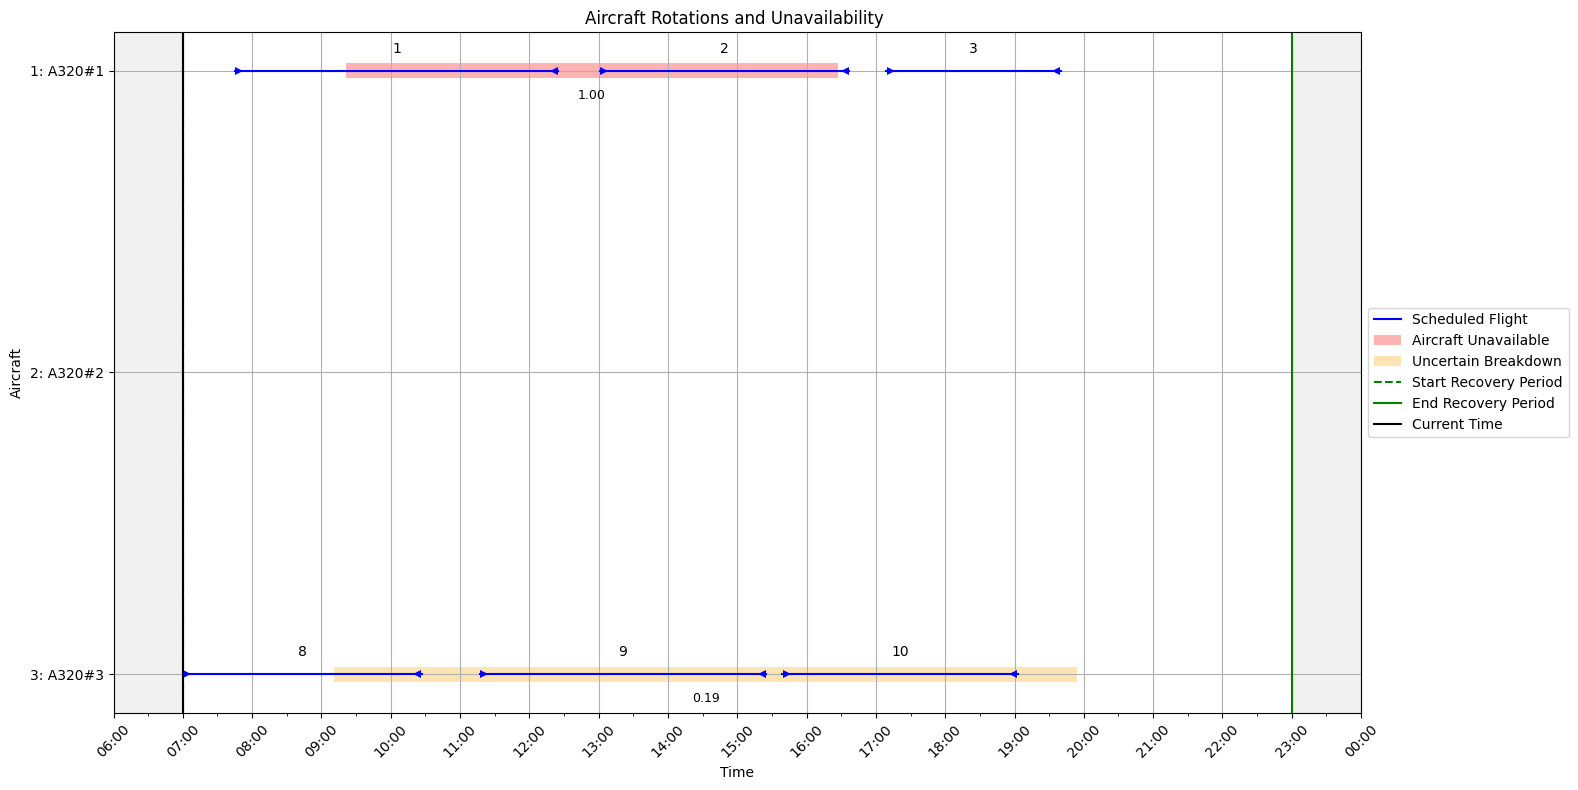

Processing scenario: Scenario_02
{'A320#2': {'StartDate': '01/09/24', 'StartTime': '07:16', 'EndDate': '01/09/24', 'EndTime': '18:11', 'Probability': 1.0}, 'A320#3': {'StartDate': '01/09/24', 'StartTime': '07:07', 'EndDate': '01/09/24', 'EndTime': '21:45', 'Probability': 0.0}}
│ Current Time       │ Time Until End     │   
│          0         │         960        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    136   791 |     4   210   416 |     5   430   723 |     6   765   940 |     -     -  

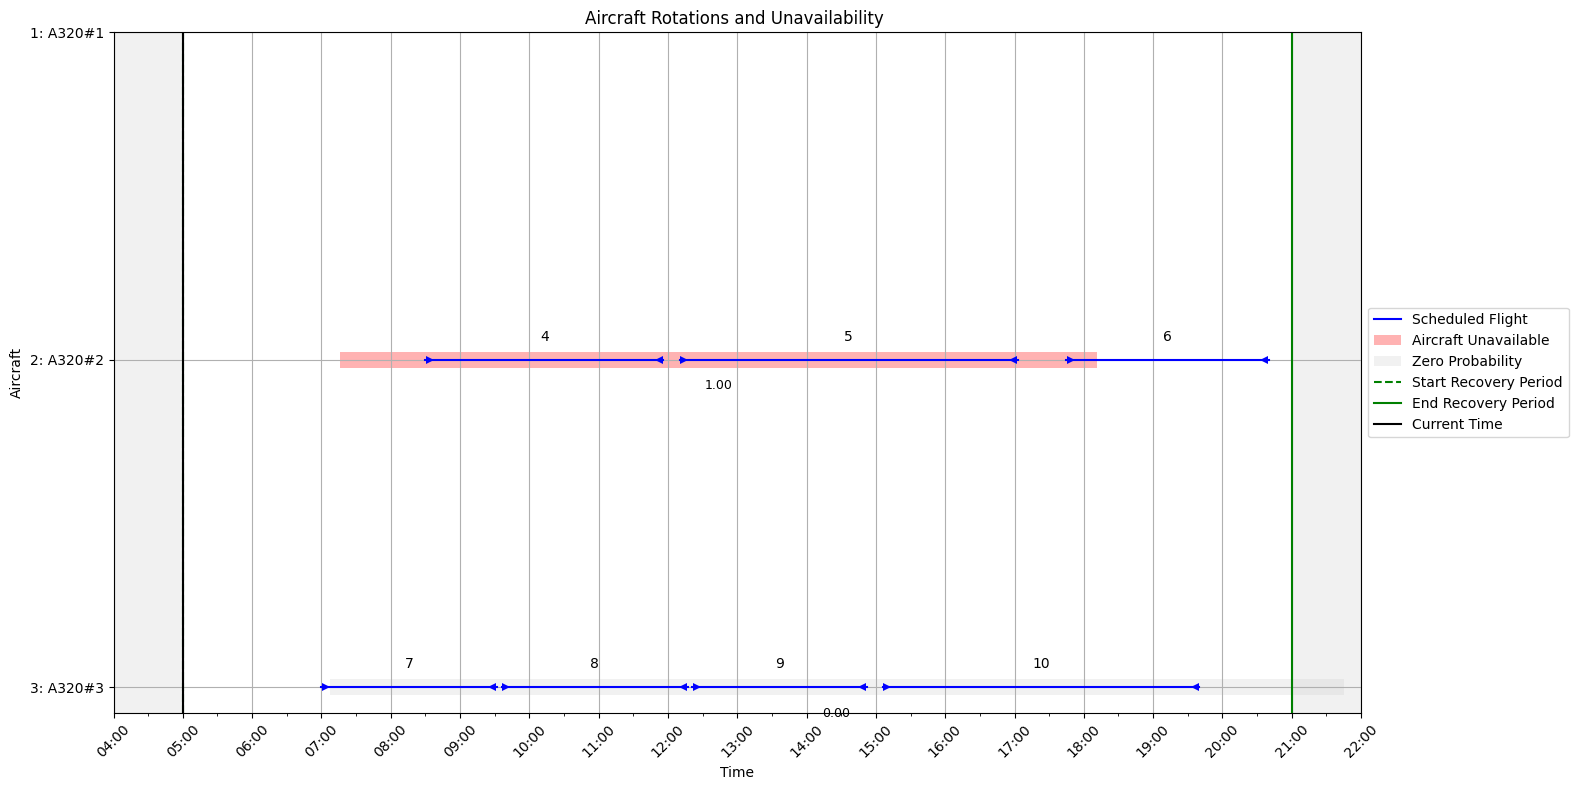

Processing scenario: Scenario_03
{'A320#2': {'StartDate': '13/09/24', 'StartTime': '08:06', 'EndDate': '13/09/24', 'EndTime': '11:11', 'Probability': 1.0}, 'A320#1': {'StartDate': '13/09/24', 'StartTime': '08:06', 'EndDate': '14/09/24', 'EndTime': '00:57', 'Probability': 0.17}}
│ Current Time       │ Time Until End     │   
│          0         │         900        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.17    126  1137 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    126   311 |     4   165   391 |     5   409   550 |     6   564   735 |     -     - 

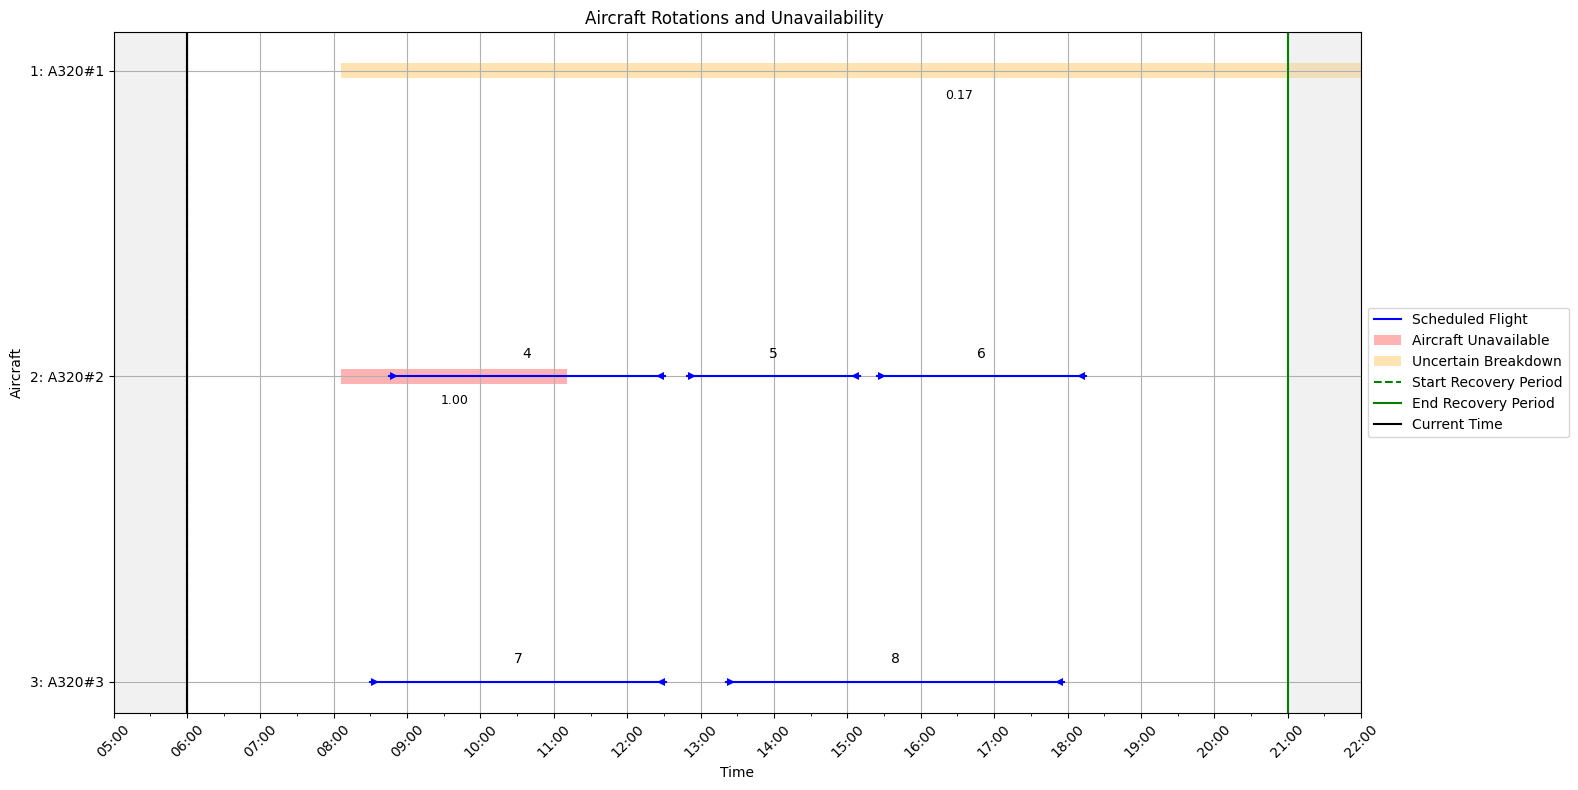

Processing scenario: Scenario_04
{'A320#1': {'StartDate': '07/09/24', 'StartTime': '08:10', 'EndDate': '07/09/24', 'EndTime': '22:09', 'Probability': 1.0}, 'A320#2': {'StartDate': '07/09/24', 'StartTime': '08:02', 'EndDate': '07/09/24', 'EndTime': '23:22', 'Probability': 0.06}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    130   969 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.06    122  1042 |     3   135   429 |     4   439   703 |     5   729   871 |     -     - 

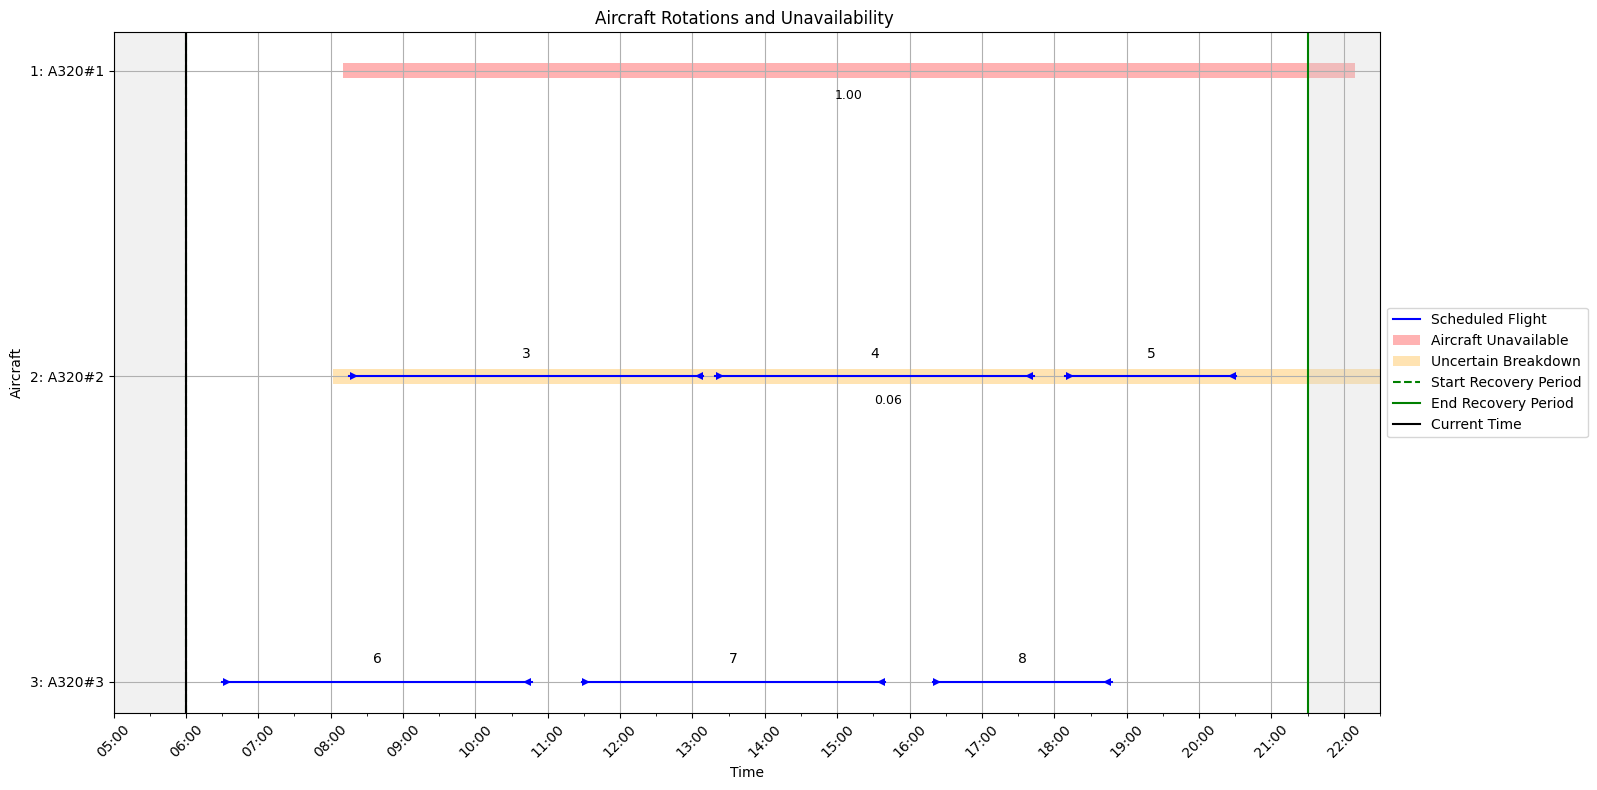

Processing scenario: Scenario_05
{'A320#1': {'StartDate': '16/09/24', 'StartTime': '09:18', 'EndDate': '16/09/24', 'EndTime': '12:38', 'Probability': 1.0}, 'A320#2': {'StartDate': '16/09/24', 'StartTime': '09:17', 'EndDate': '17/09/24', 'EndTime': '00:22', 'Probability': 0.03}}
│ Current Time       │ Time Until End     │   
│          0         │         960        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    138   338 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.03    137  1042 |     4    90   218 |     5   232   441 |     6   446   688 |     -     - 

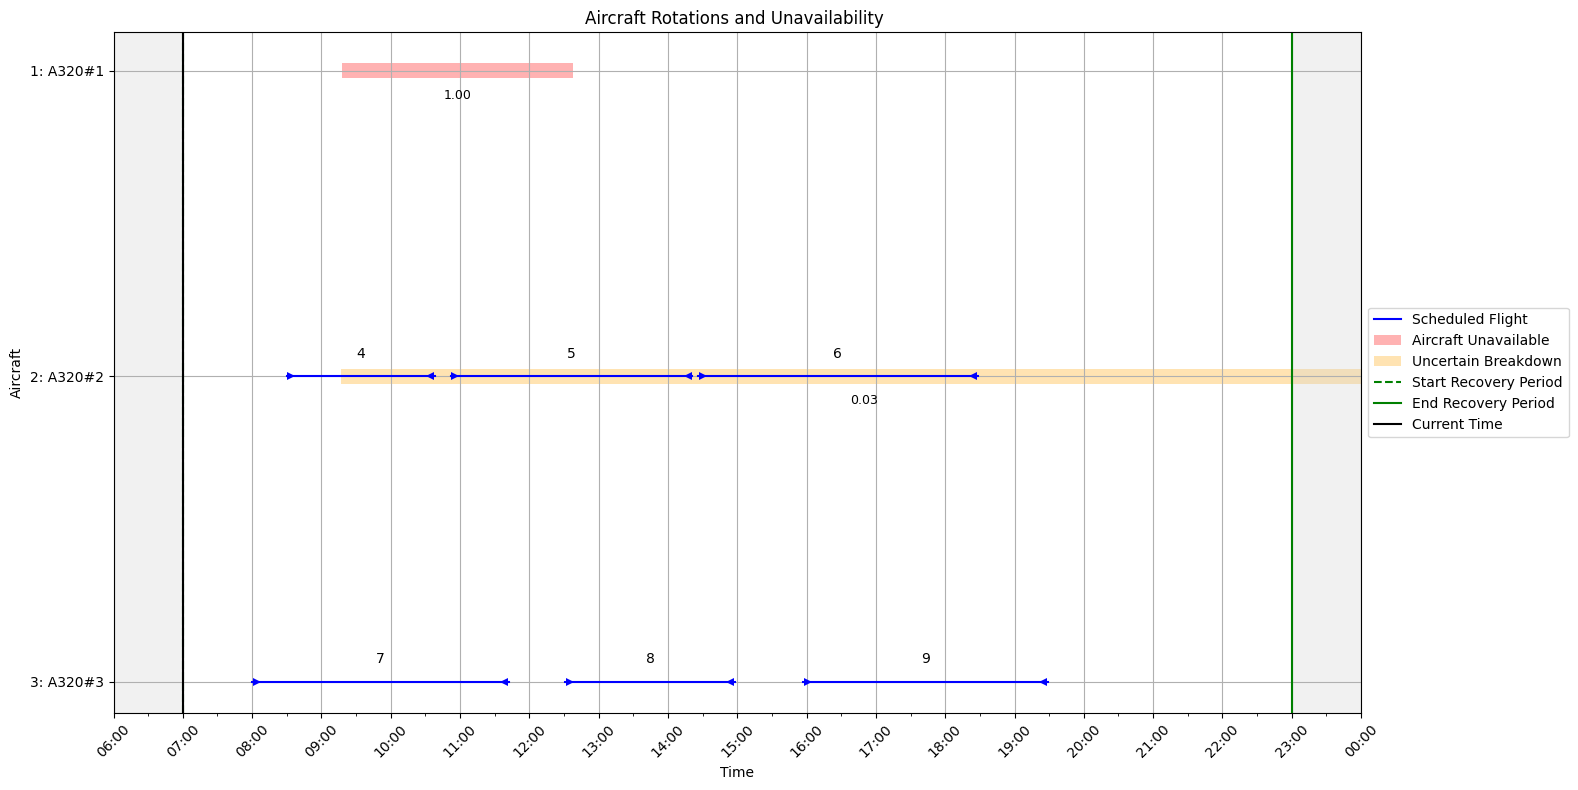

Processing scenario: Scenario_06
{'A320#3': {'StartDate': '05/09/24', 'StartTime': '08:20', 'EndDate': '05/09/24', 'EndTime': '20:14', 'Probability': 1.0}, 'A320#1': {'StartDate': '05/09/24', 'StartTime': '08:04', 'EndDate': '05/09/24', 'EndTime': '10:29', 'Probability': 0.28}}
│ Current Time       │ Time Until End     │   
│          0         │        1050        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.28    124   269 |     1    30   270 |     2   281   532 |     3   562   759 |     4   783   964 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     - 

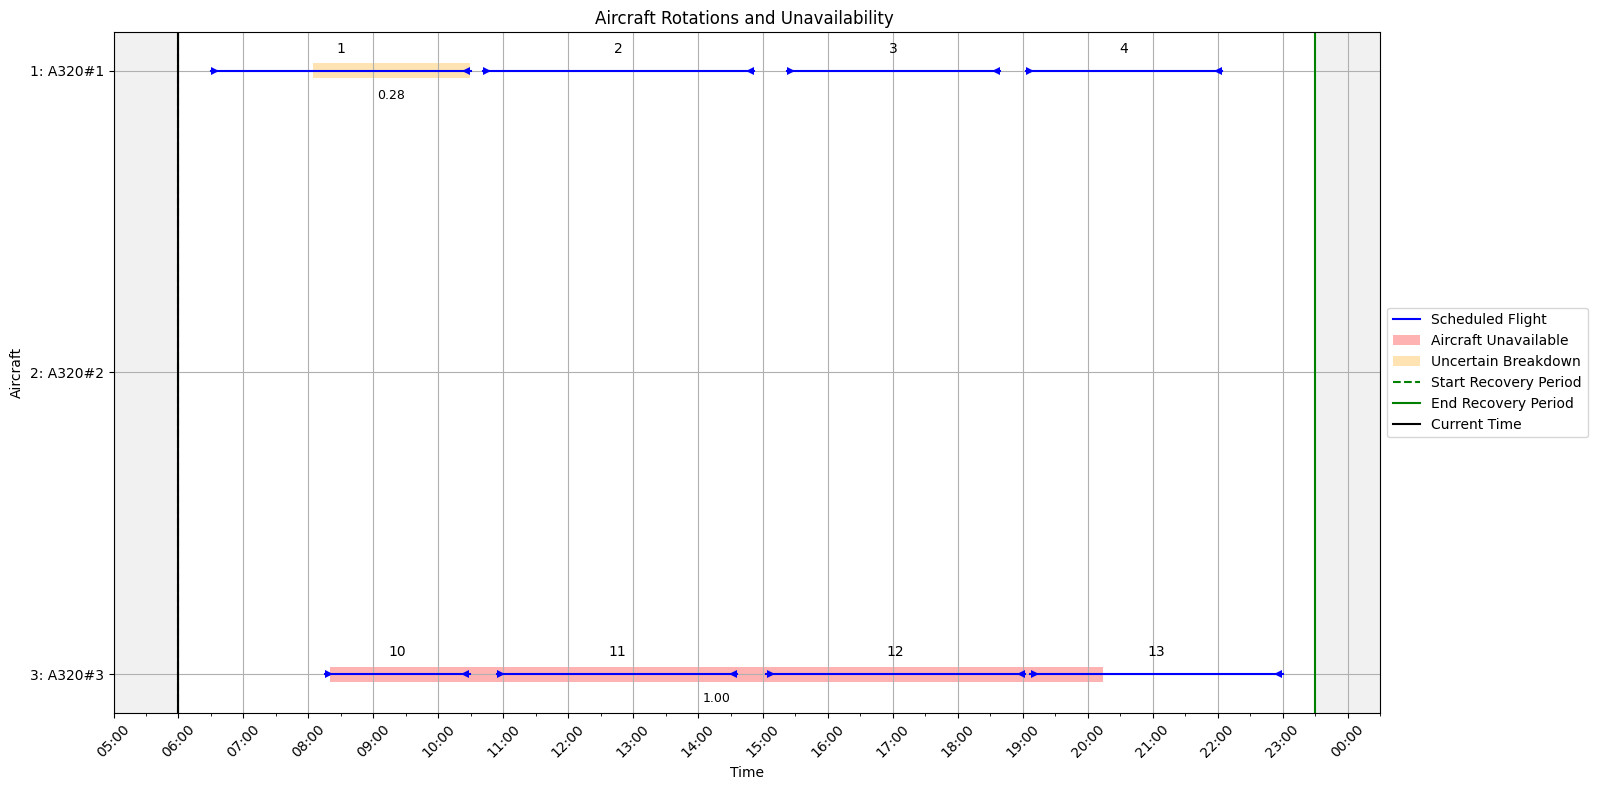

Processing scenario: Scenario_07
{'A320#3': {'StartDate': '09/09/24', 'StartTime': '09:05', 'EndDate': '09/09/24', 'EndTime': '22:14', 'Probability': 1.0}, 'A320#2': {'StartDate': '09/09/24', 'StartTime': '09:15', 'EndDate': '09/09/24', 'EndTime': '21:41', 'Probability': 0.18}}
│ Current Time       │ Time Until End     │   
│          0         │         990        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.18    135   881 |     4    30   158 |     5   178   440 |     6   464   585 |     7   590 

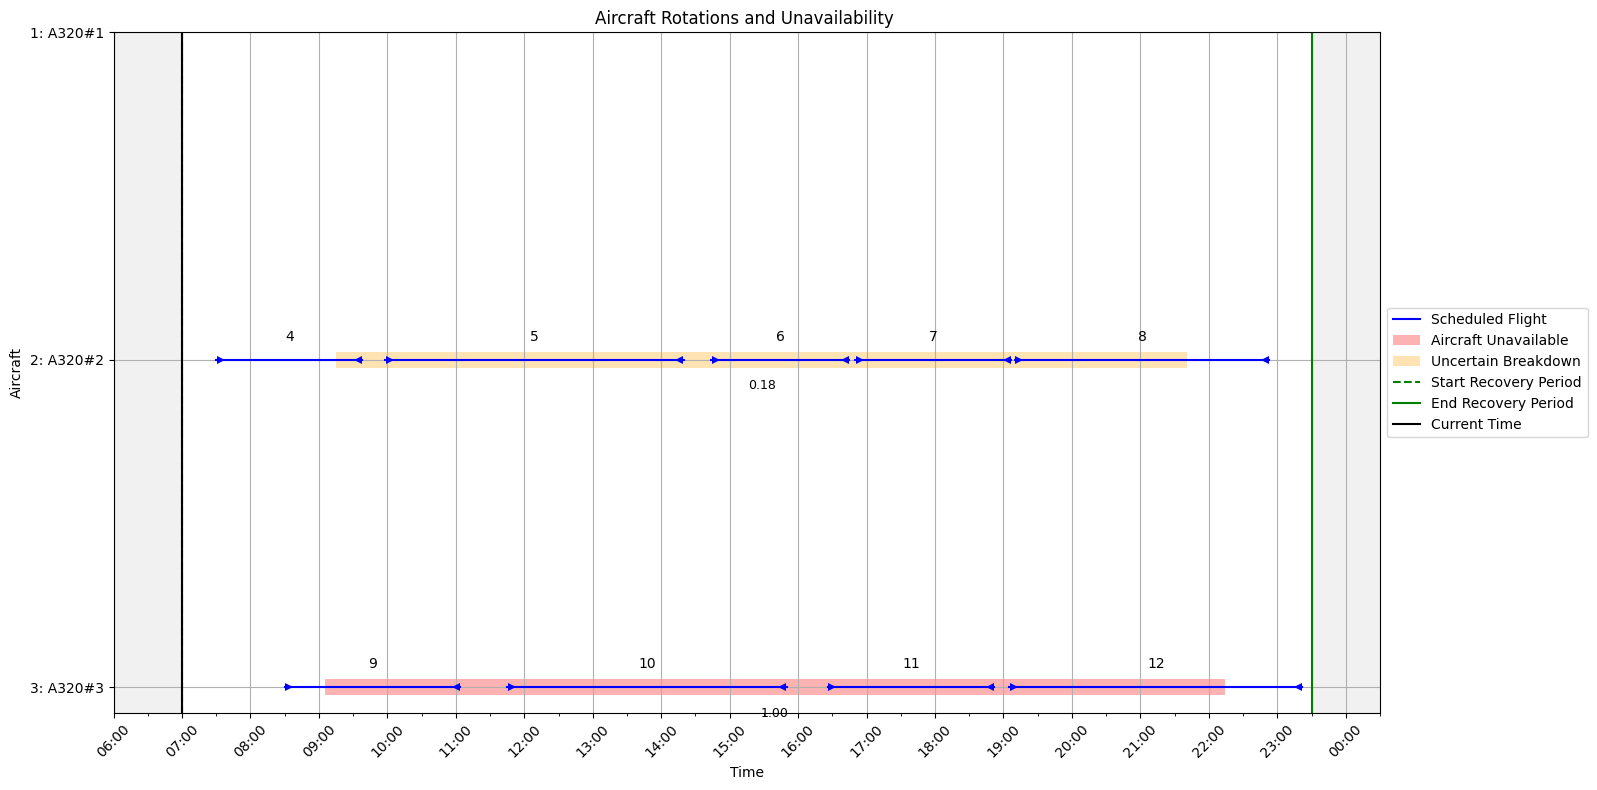

Processing scenario: Scenario_08
{'A320#3': {'StartDate': '10/09/24', 'StartTime': '07:16', 'EndDate': '10/09/24', 'EndTime': '10:48', 'Probability': 1.0}, 'A320#1': {'StartDate': '10/09/24', 'StartTime': '07:17', 'EndDate': '10/09/24', 'EndTime': '15:29', 'Probability': 0.05}}
│ Current Time       │ Time Until End     │   
│          0         │         960        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.05    137   629 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     5   150   311 |     6   316   575 |     7   625   820 |     -     - 

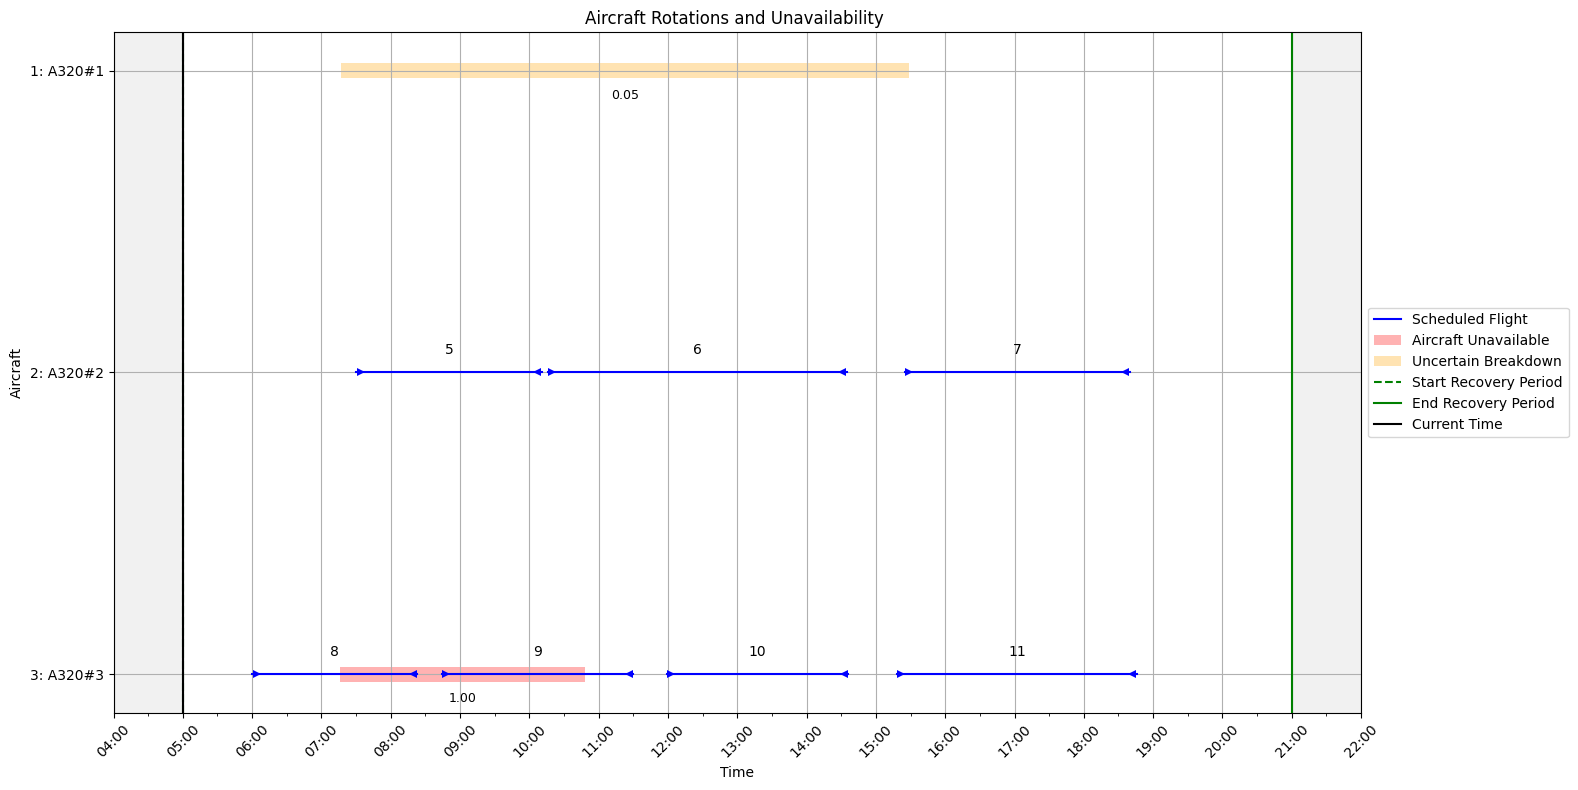

Processing scenario: Scenario_09
{'A320#1': {'StartDate': '18/09/24', 'StartTime': '07:06', 'EndDate': '18/09/24', 'EndTime': '12:45', 'Probability': 1.0}, 'A320#3': {'StartDate': '18/09/24', 'StartTime': '07:19', 'EndDate': '18/09/24', 'EndTime': '20:00', 'Probability': 0.49}}
│ Current Time       │ Time Until End     │   
│          0         │        1020        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    126   465 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     5   135   295 |     6   346   494 |     7   504   624 |     8   647 

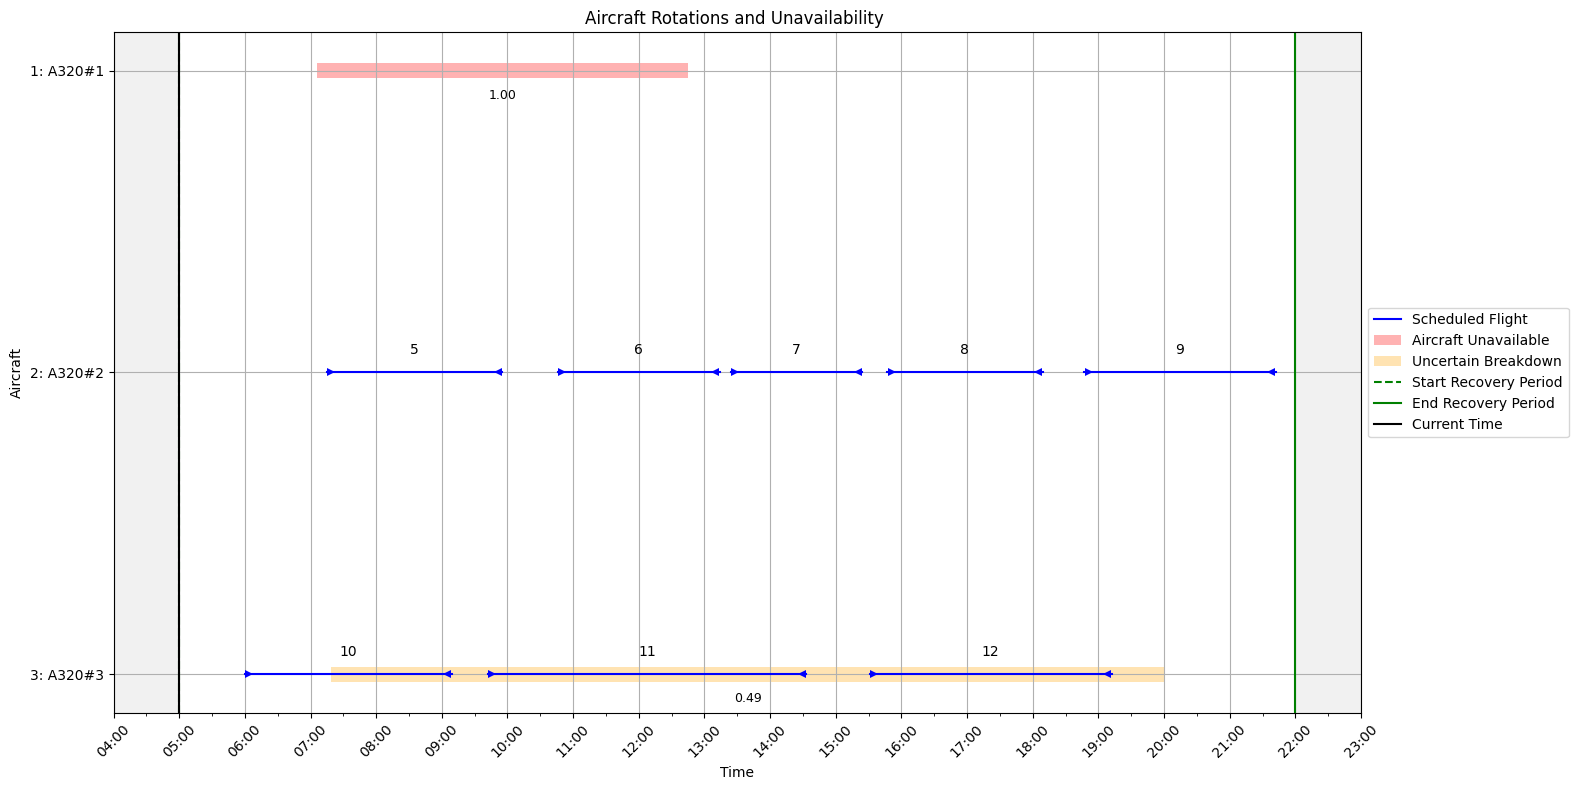

Processing scenario: Scenario_10
{'A320#3': {'StartDate': '18/09/24', 'StartTime': '07:18', 'EndDate': '18/09/24', 'EndTime': '14:52', 'Probability': 1.0}, 'A320#1': {'StartDate': '18/09/24', 'StartTime': '07:11', 'EndDate': '18/09/24', 'EndTime': '11:02', 'Probability': 0.08}}
│ Current Time       │ Time Until End     │   
│          0         │        1110        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.08    131   362 |     1   105   288 |     2   316   590 |     3   608   860 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     4   135   310 |     5   330   489 |     6   497   651 |     7   707 

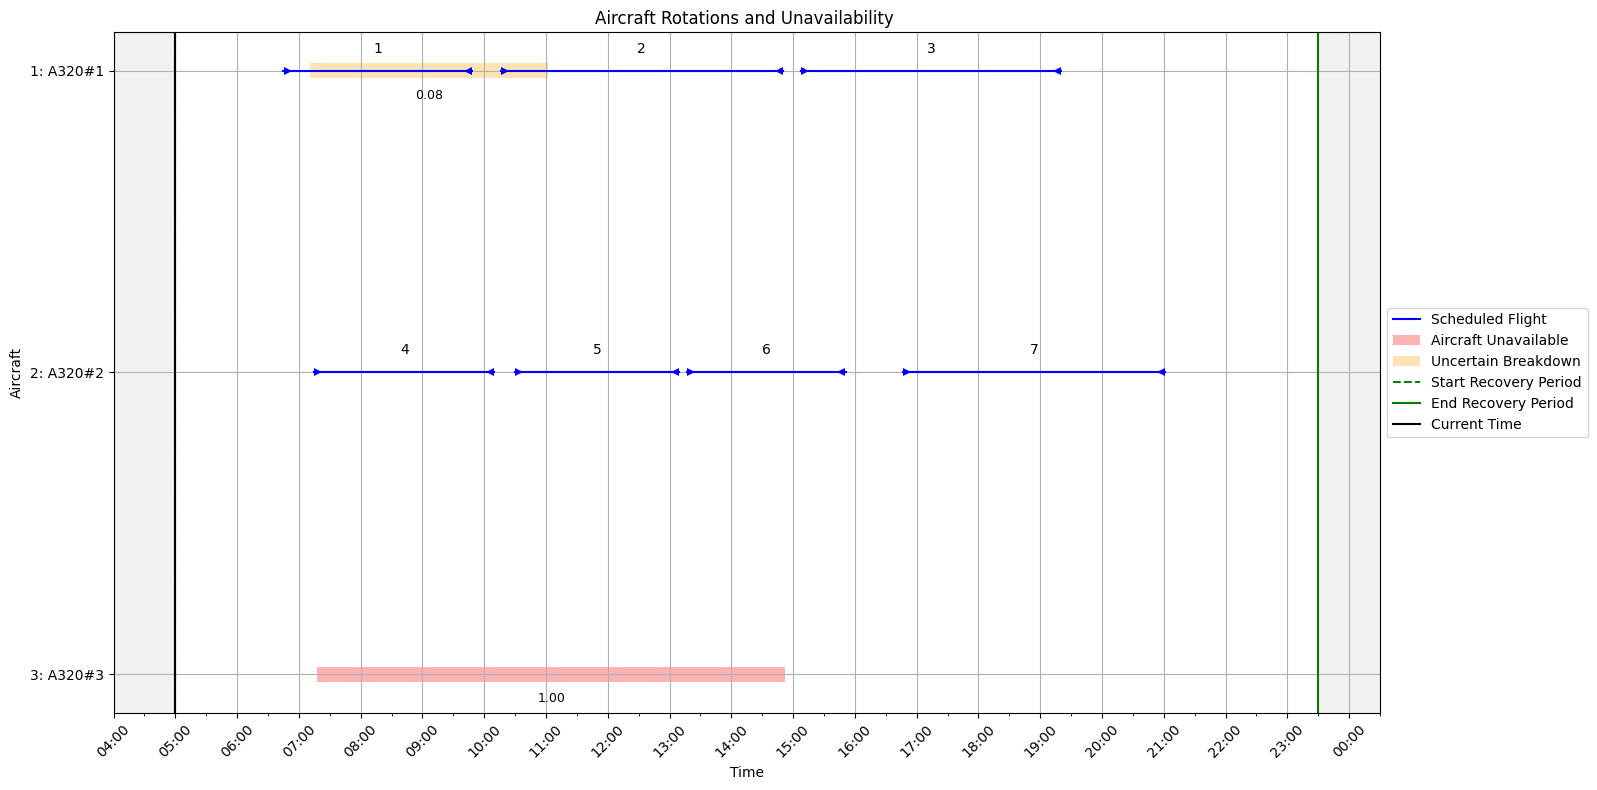

Processing scenario: Scenario_100
{'A320#3': {'StartDate': '05/09/24', 'StartTime': '08:10', 'EndDate': '05/09/24', 'EndTime': '14:16', 'Probability': 1.0}, 'A320#2': {'StartDate': '05/09/24', 'StartTime': '08:07', 'EndDate': '06/09/24', 'EndTime': '00:28', 'Probability': 0.09}}
│ Current Time       │ Time Until End     │   
│          0         │        1050        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1    30   225 |     2   275   401 |     3   427   649 |     4   680   846 |     5   873   997 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.09    127  1108 |     -     -     - |     -     -     - |     -     -     - |     -     -

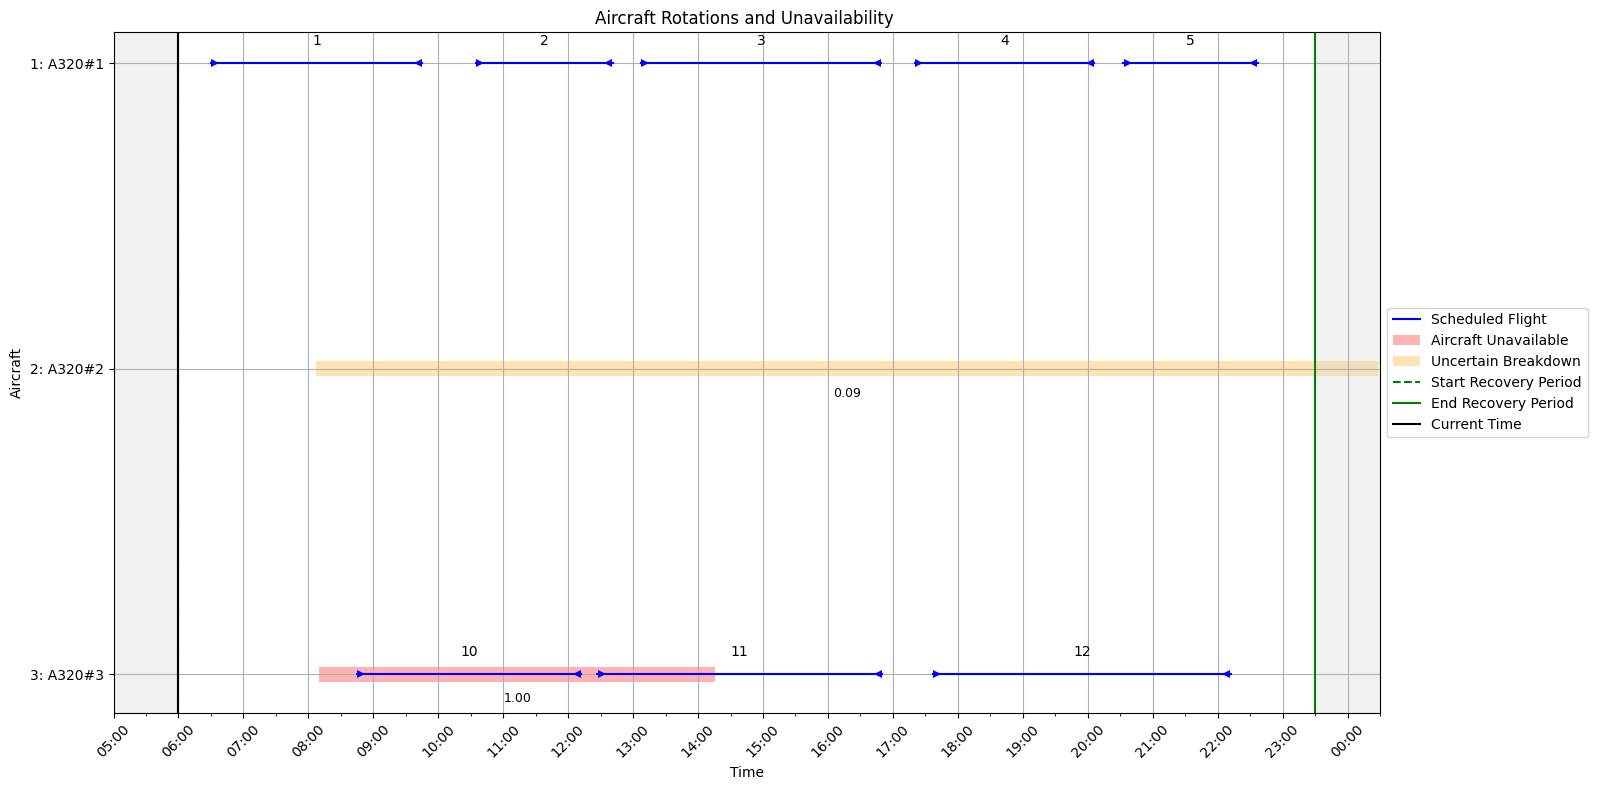

Processing scenario: Scenario_11
{'A320#3': {'StartDate': '22/09/24', 'StartTime': '08:22', 'EndDate': '22/09/24', 'EndTime': '21:11', 'Probability': 1.0}, 'A320#1': {'StartDate': '22/09/24', 'StartTime': '08:28', 'EndDate': '22/09/24', 'EndTime': '13:52', 'Probability': 0.27}}
│ Current Time       │ Time Until End     │   
│          0         │        1020        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.27    148   472 |     1    60   243 |     2   259   496 |     3   498   731 |     4   731   912 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     5    60   332 |     6   351   610 |     7   612   824 |     -     - 

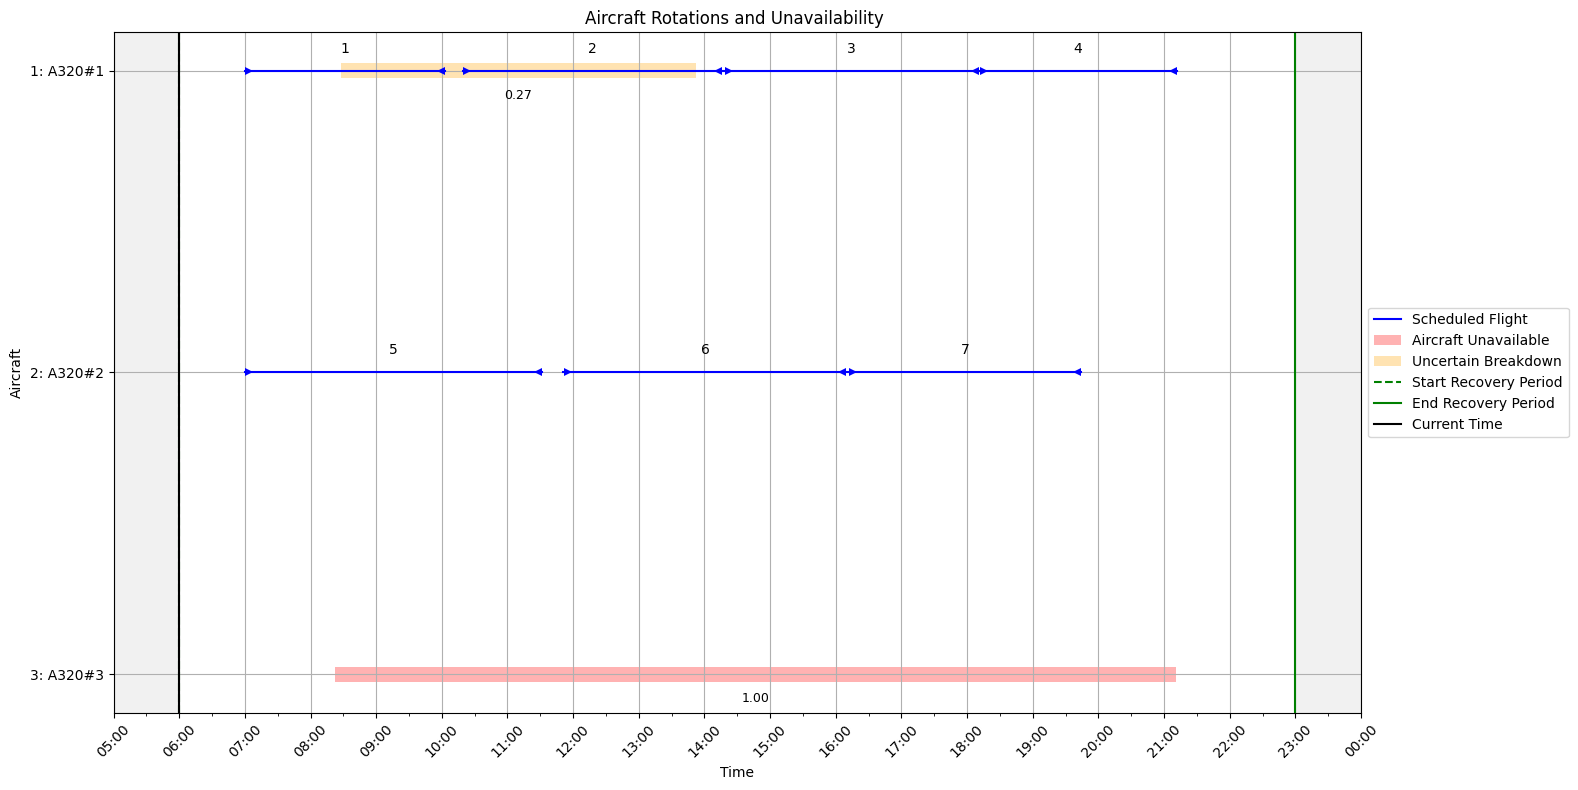

Processing scenario: Scenario_12
{'A320#1': {'StartDate': '08/09/24', 'StartTime': '08:17', 'EndDate': '08/09/24', 'EndTime': '13:01', 'Probability': 1.0}, 'A320#2': {'StartDate': '08/09/24', 'StartTime': '08:07', 'EndDate': '08/09/24', 'EndTime': '18:08', 'Probability': 0.49}}
│ Current Time       │ Time Until End     │   
│          0         │         870        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    137   421 |     1   165   444 |     2   477   662 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.49    127   728 |     -     -     - |     -     -     - |     -     -     - |     -     - 

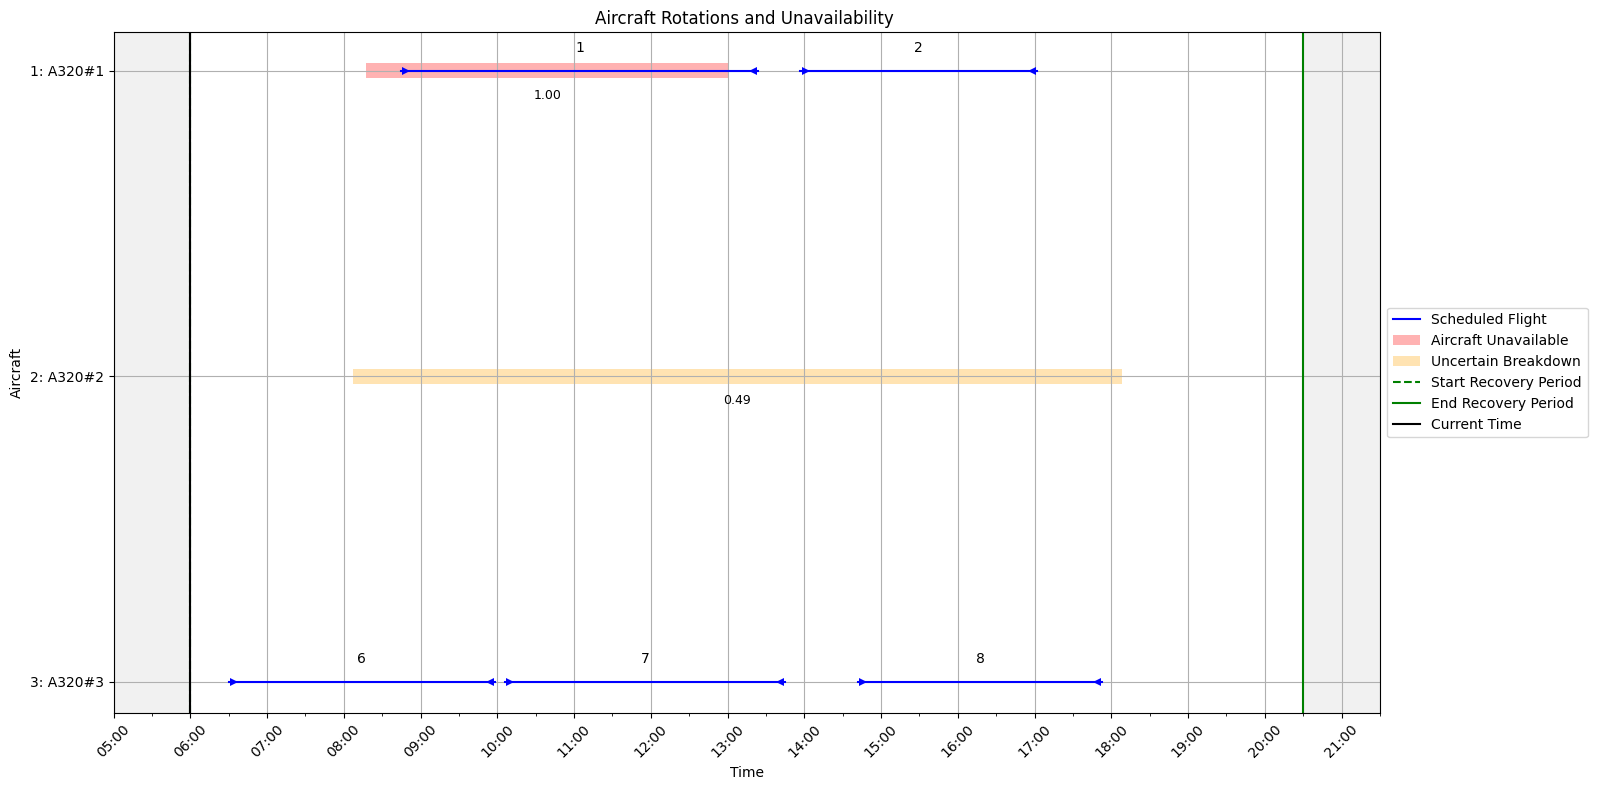

Processing scenario: Scenario_13
{'A320#1': {'StartDate': '17/09/24', 'StartTime': '09:06', 'EndDate': '18/09/24', 'EndTime': '00:40', 'Probability': 1.0}, 'A320#2': {'StartDate': '17/09/24', 'StartTime': '09:14', 'EndDate': '17/09/24', 'EndTime': '22:34', 'Probability': 0.23}}
│ Current Time       │ Time Until End     │   
│          0         │         870        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    126  1060 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.23    134   934 |     4    30   235 |     5   282   405 |     6   411   553 |     7   570 

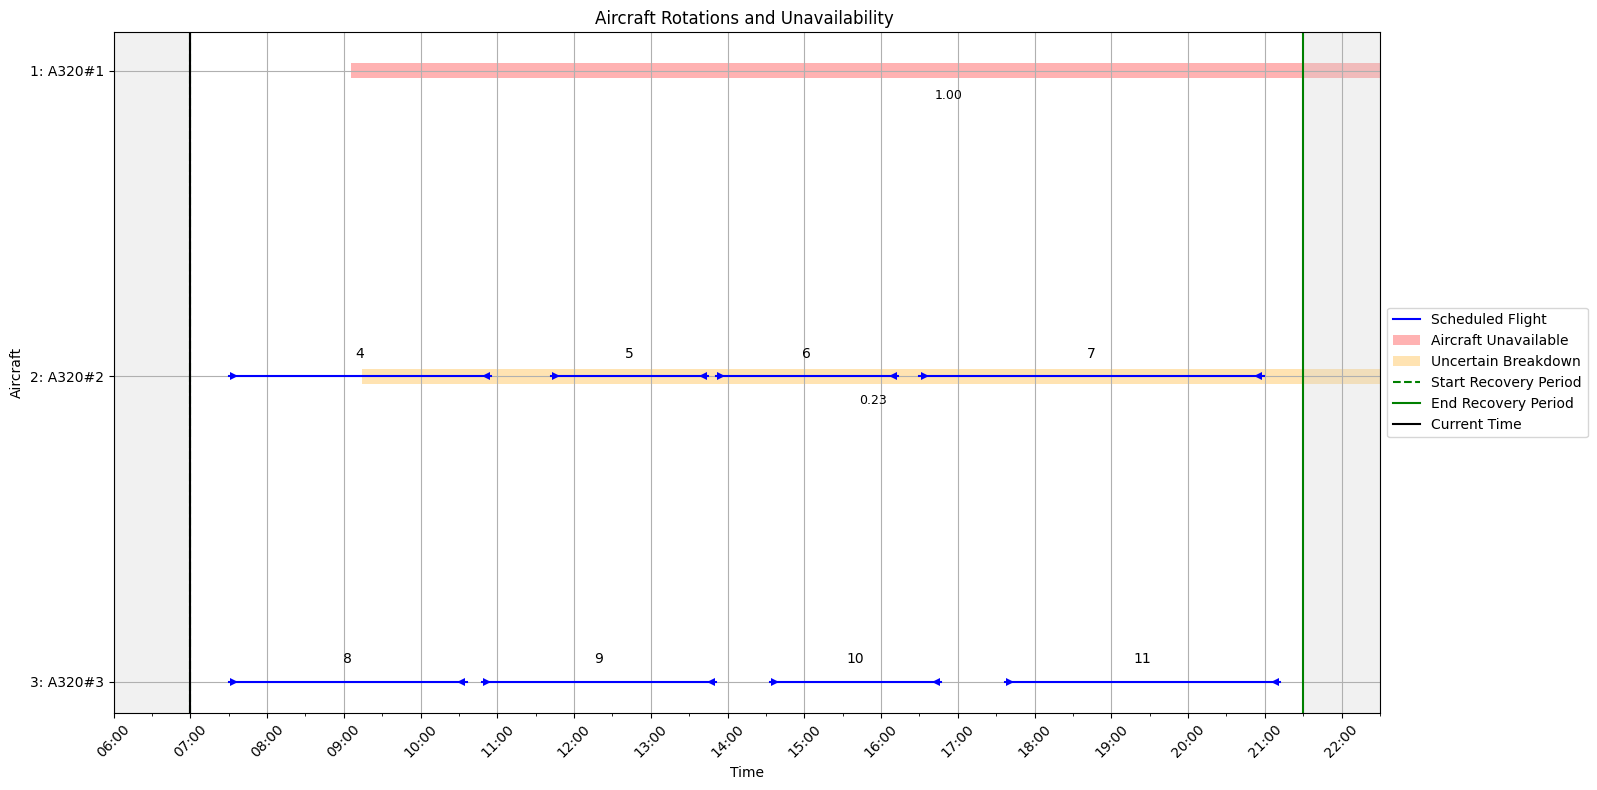

Processing scenario: Scenario_14
{'A320#1': {'StartDate': '17/09/24', 'StartTime': '09:16', 'EndDate': '18/09/24', 'EndTime': '01:29', 'Probability': 1.0}, 'A320#3': {'StartDate': '17/09/24', 'StartTime': '09:17', 'EndDate': '17/09/24', 'EndTime': '19:15', 'Probability': 0.23}}
│ Current Time       │ Time Until End     │   
│          0         │         990        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    136  1109 |     1    45   325 |     2   377   557 |     3   588   708 |     4   756   936 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     - 

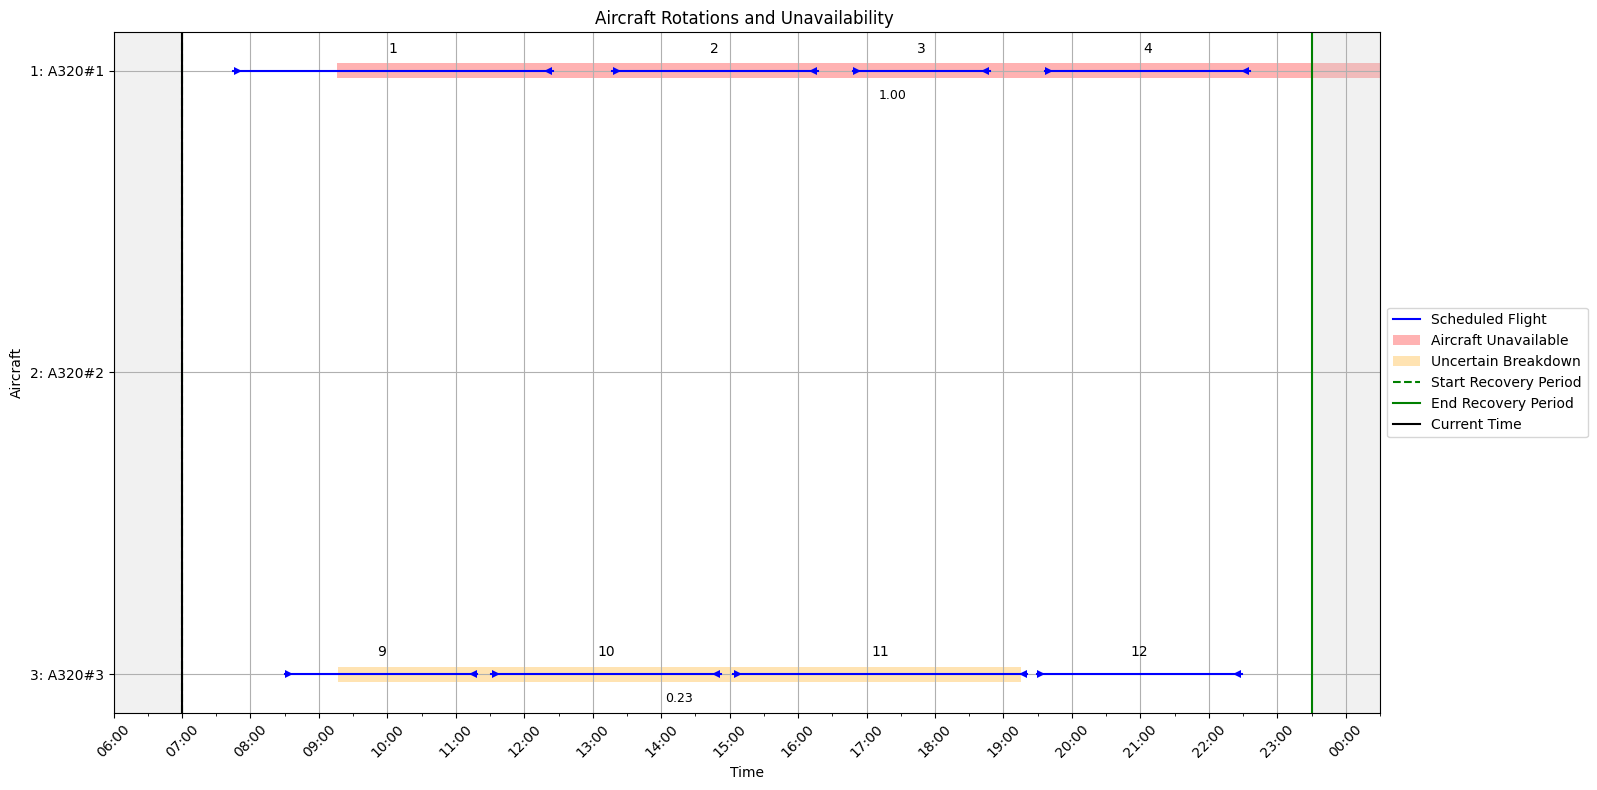

Processing scenario: Scenario_15
{'A320#1': {'StartDate': '04/09/24', 'StartTime': '09:28', 'EndDate': '04/09/24', 'EndTime': '16:55', 'Probability': 1.0}, 'A320#3': {'StartDate': '04/09/24', 'StartTime': '09:06', 'EndDate': '04/09/24', 'EndTime': '20:21', 'Probability': 0.41}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    148   595 |     1   105   372 |     2   406   692 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     - 

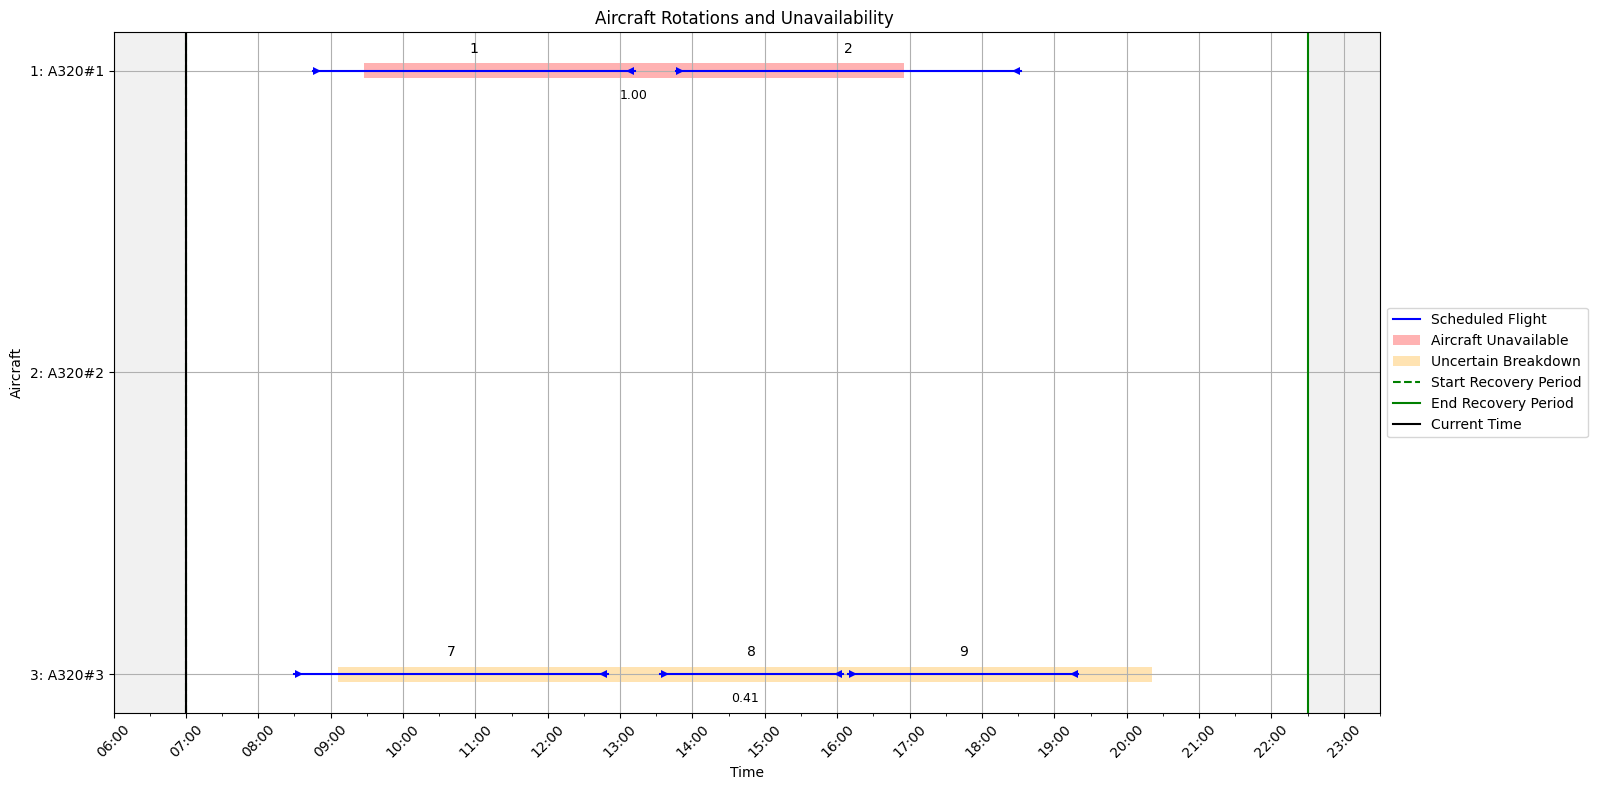

Processing scenario: Scenario_16
{'A320#3': {'StartDate': '08/09/24', 'StartTime': '09:16', 'EndDate': '08/09/24', 'EndTime': '12:16', 'Probability': 1.0}, 'A320#1': {'StartDate': '08/09/24', 'StartTime': '09:15', 'EndDate': '08/09/24', 'EndTime': '20:57', 'Probability': 0.01}}
│ Current Time       │ Time Until End     │   
│          0         │         840        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.01    135   837 |     1   105   327 |     2   359   642 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     - 

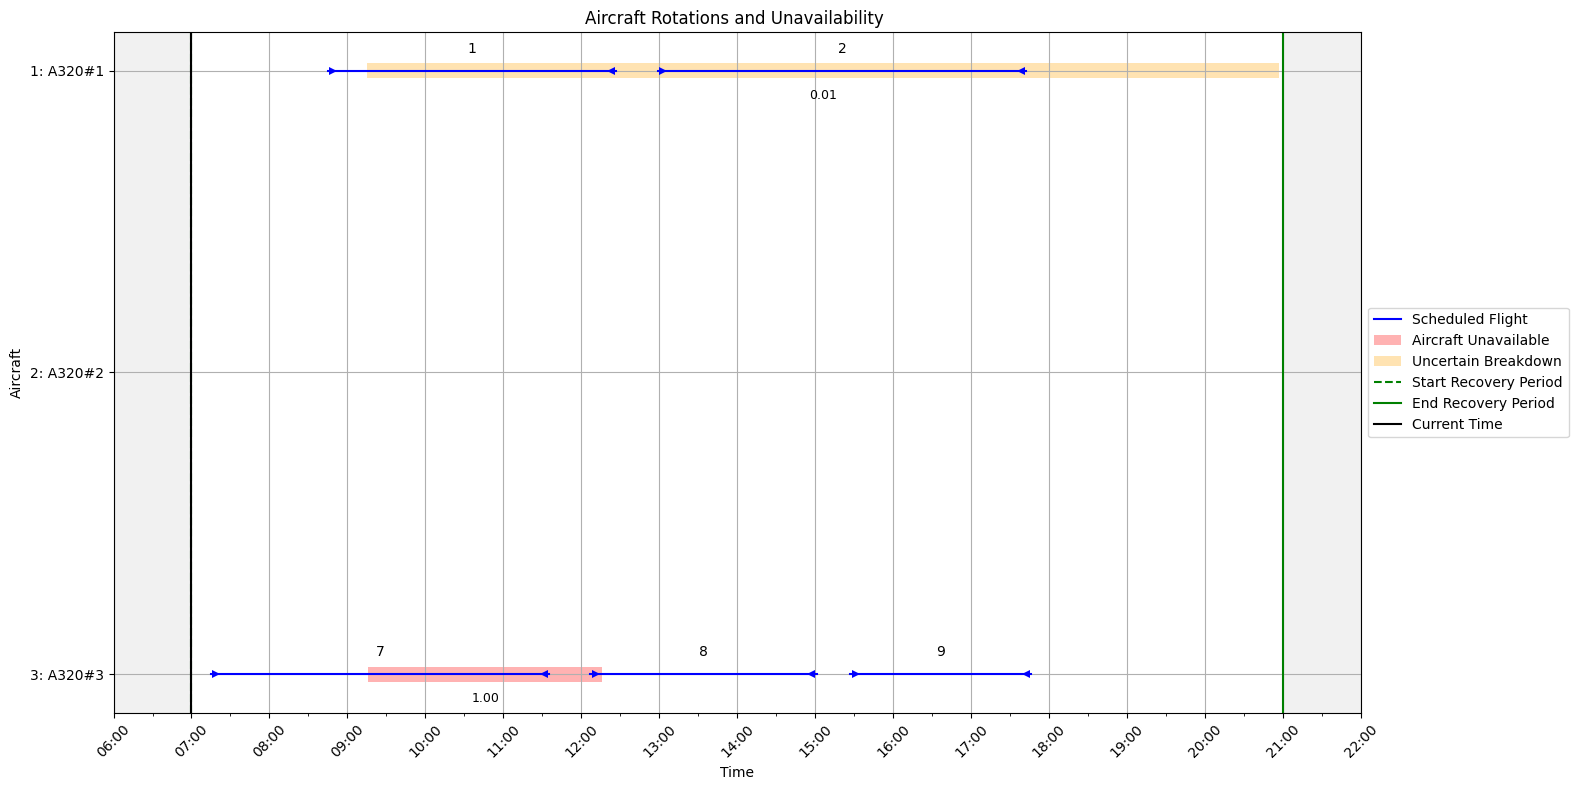

Processing scenario: Scenario_17
{'A320#2': {'StartDate': '09/09/24', 'StartTime': '08:28', 'EndDate': '09/09/24', 'EndTime': '11:57', 'Probability': 1.0}, 'A320#3': {'StartDate': '09/09/24', 'StartTime': '08:14', 'EndDate': '09/09/24', 'EndTime': '15:34', 'Probability': 0.02}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1    45   304 |     2   341   518 |     3   530   652 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    148   357 |     4   165   343 |     5   377   500 |     6   511   678 |     -     - 

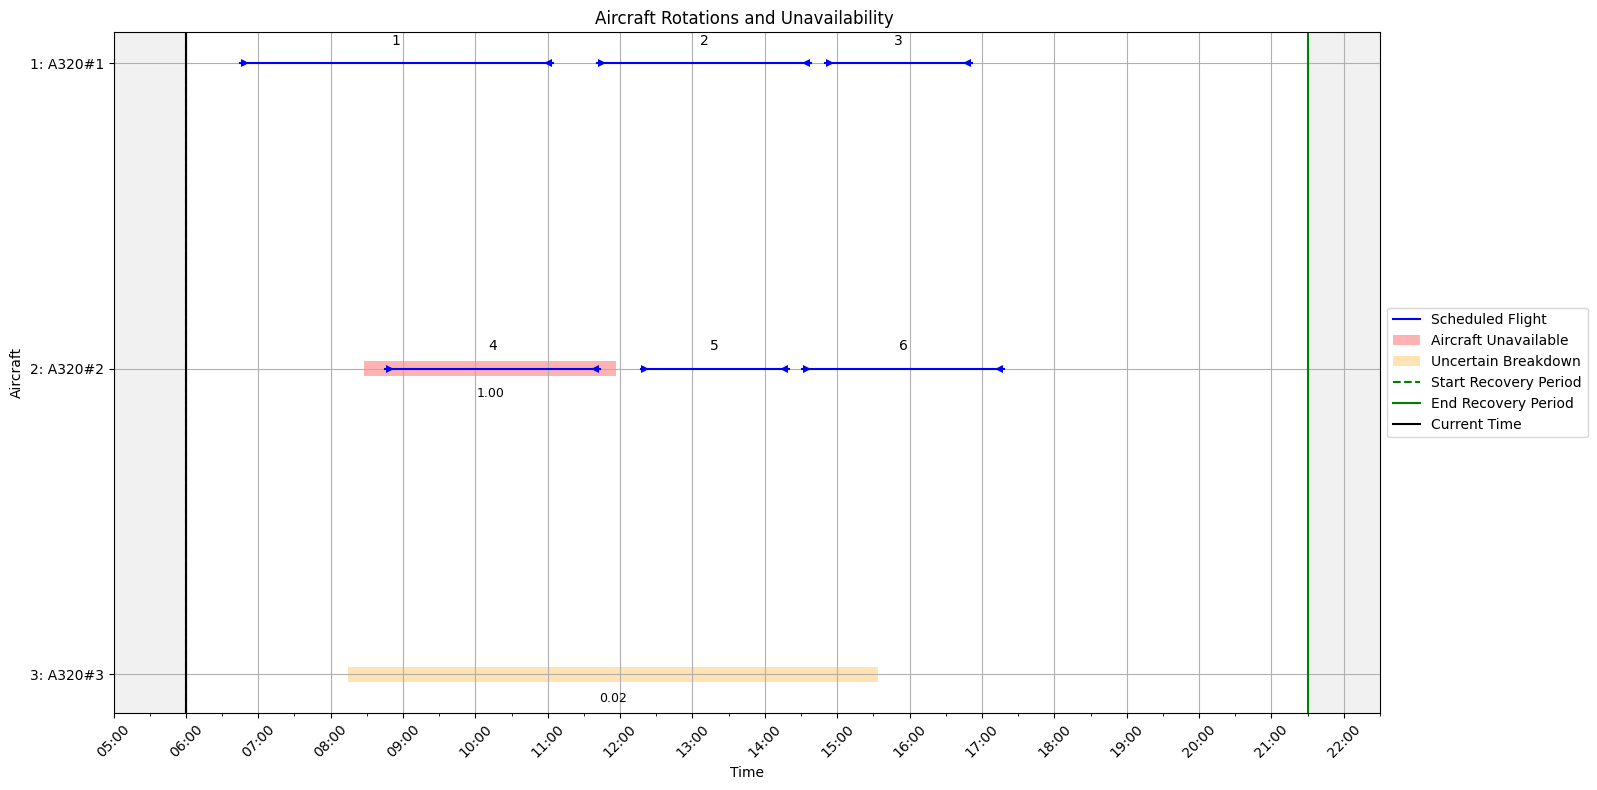

Processing scenario: Scenario_18
{'A320#3': {'StartDate': '19/09/24', 'StartTime': '09:19', 'EndDate': '19/09/24', 'EndTime': '17:21', 'Probability': 1.0}, 'A320#2': {'StartDate': '19/09/24', 'StartTime': '09:25', 'EndDate': '19/09/24', 'EndTime': '17:17', 'Probability': 0.2}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.20    145   617 |     5    45   317 |     6   327   623 |     7   641   887 |     -     -  

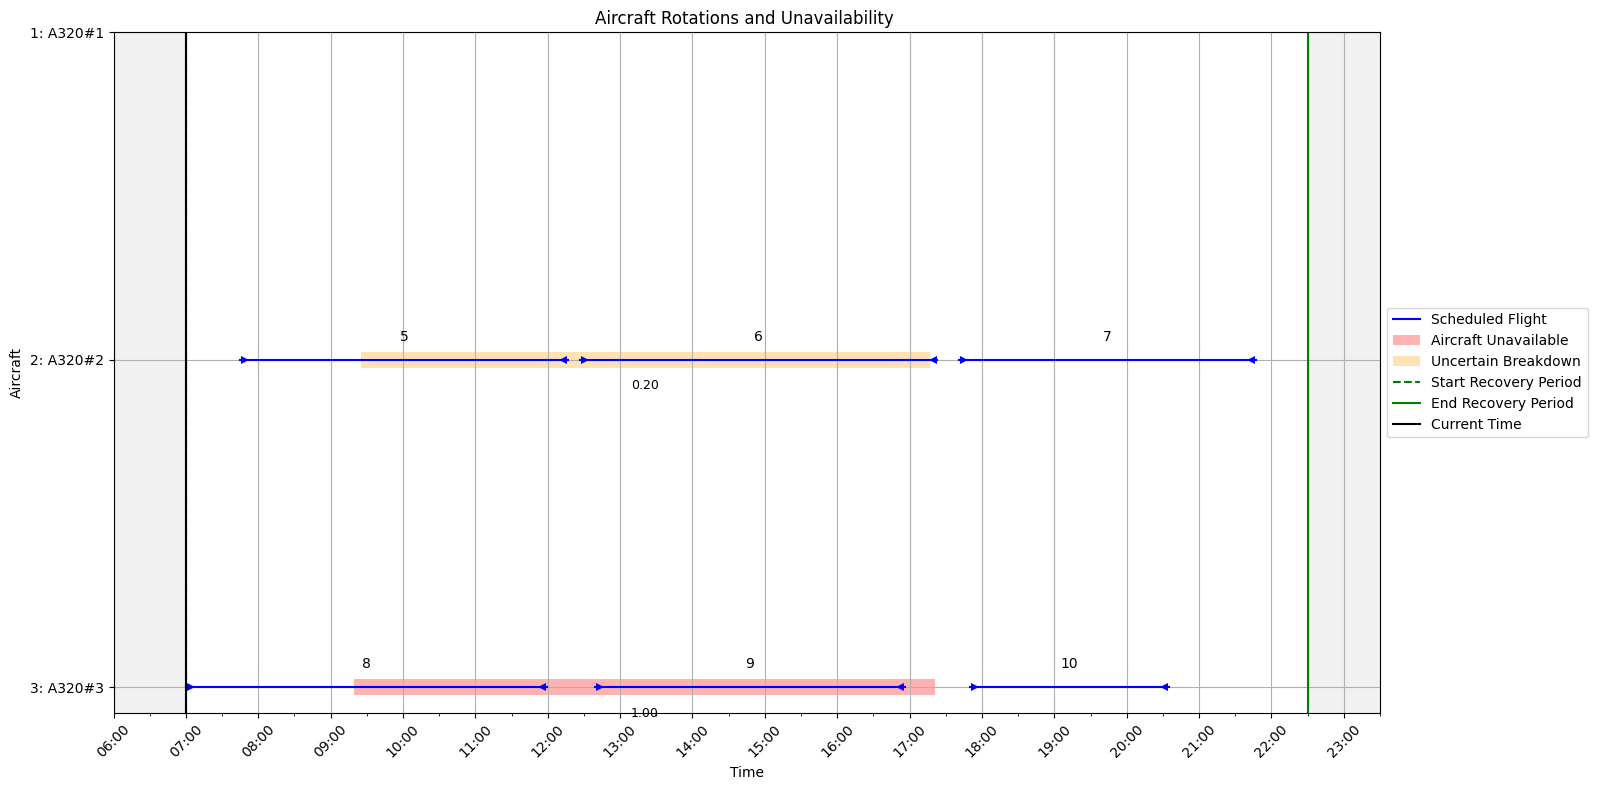

Processing scenario: Scenario_19
{'A320#2': {'StartDate': '15/09/24', 'StartTime': '08:24', 'EndDate': '16/09/24', 'EndTime': '00:57', 'Probability': 1.0}, 'A320#3': {'StartDate': '15/09/24', 'StartTime': '08:13', 'EndDate': '15/09/24', 'EndTime': '21:42', 'Probability': 0.02}}
│ Current Time       │ Time Until End     │   
│          0         │        1050        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1    60   224 |     2   270   525 |     3   533   817 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    144  1137 |     4   165   342 |     5   391   518 |     6   575   838 |     -     - 

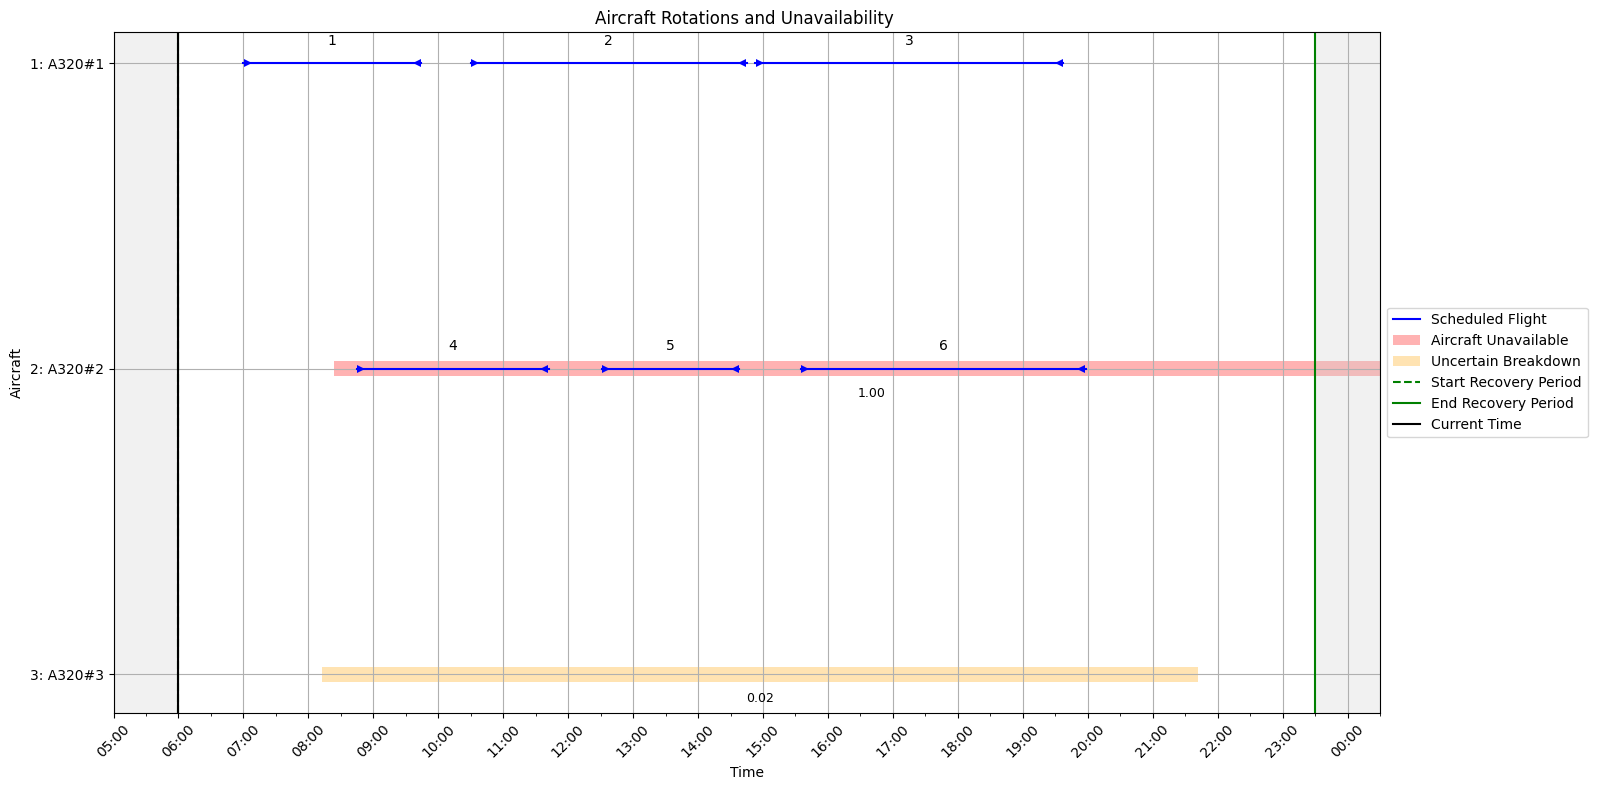

Processing scenario: Scenario_20
{'A320#1': {'StartDate': '27/09/24', 'StartTime': '08:28', 'EndDate': '27/09/24', 'EndTime': '12:44', 'Probability': 1.0}, 'A320#3': {'StartDate': '27/09/24', 'StartTime': '08:02', 'EndDate': '27/09/24', 'EndTime': '12:47', 'Probability': 0.31}}
│ Current Time       │ Time Until End     │   
│          0         │        1050        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    148   404 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     5    90   275 |     6   307   541 |     7   548   689 |     8   724 

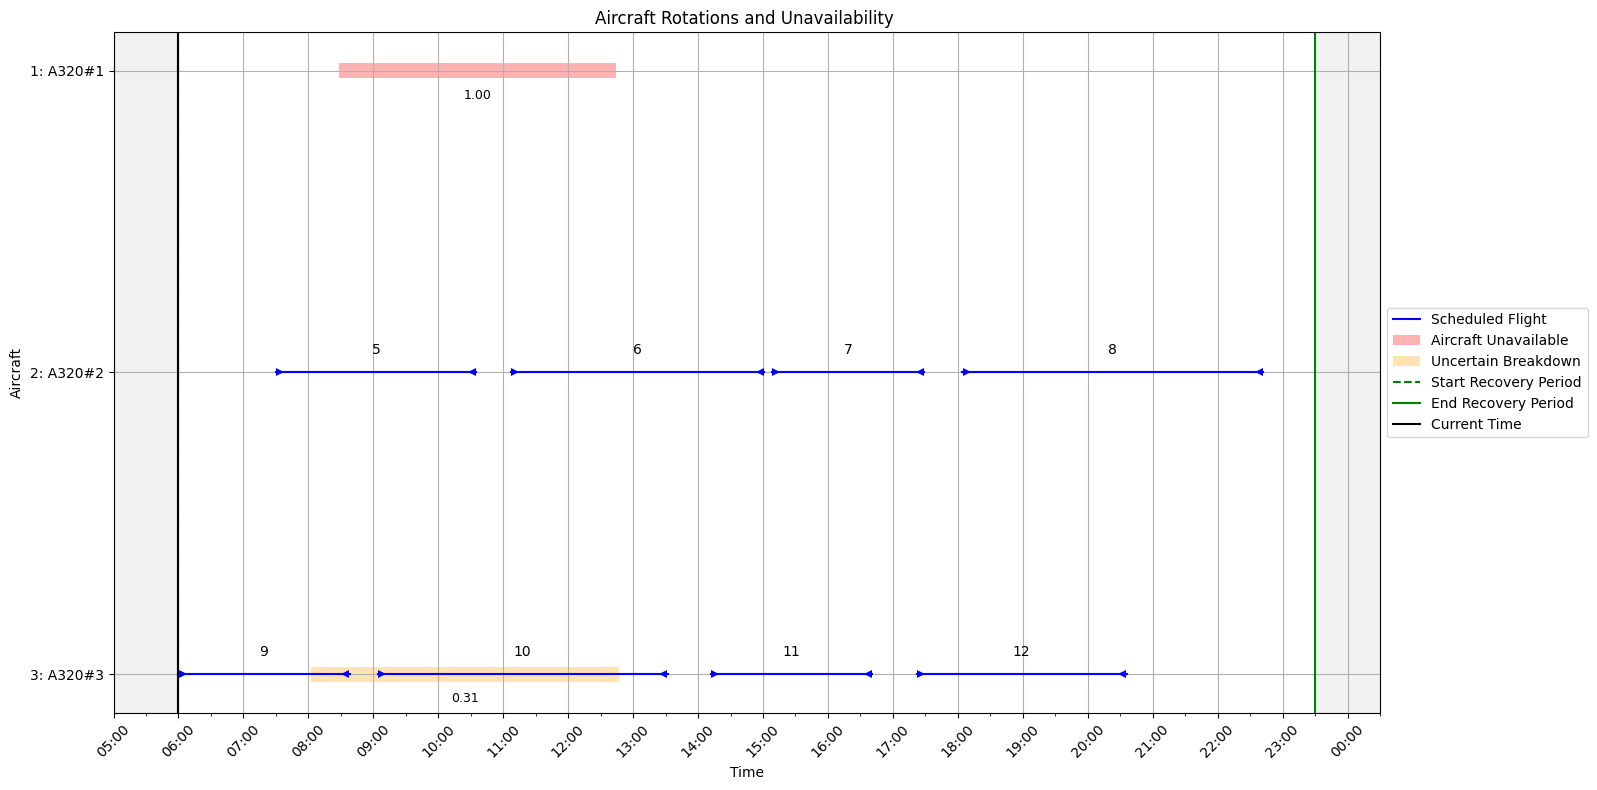

Processing scenario: Scenario_21
{'A320#1': {'StartDate': '06/09/24', 'StartTime': '08:23', 'EndDate': '06/09/24', 'EndTime': '20:50', 'Probability': 1.0}, 'A320#3': {'StartDate': '06/09/24', 'StartTime': '08:00', 'EndDate': '06/09/24', 'EndTime': '21:08', 'Probability': 0.41}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    143   890 |     1    15   242 |     2   278   425 |     3   425   609 |     4   664   889 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     - 

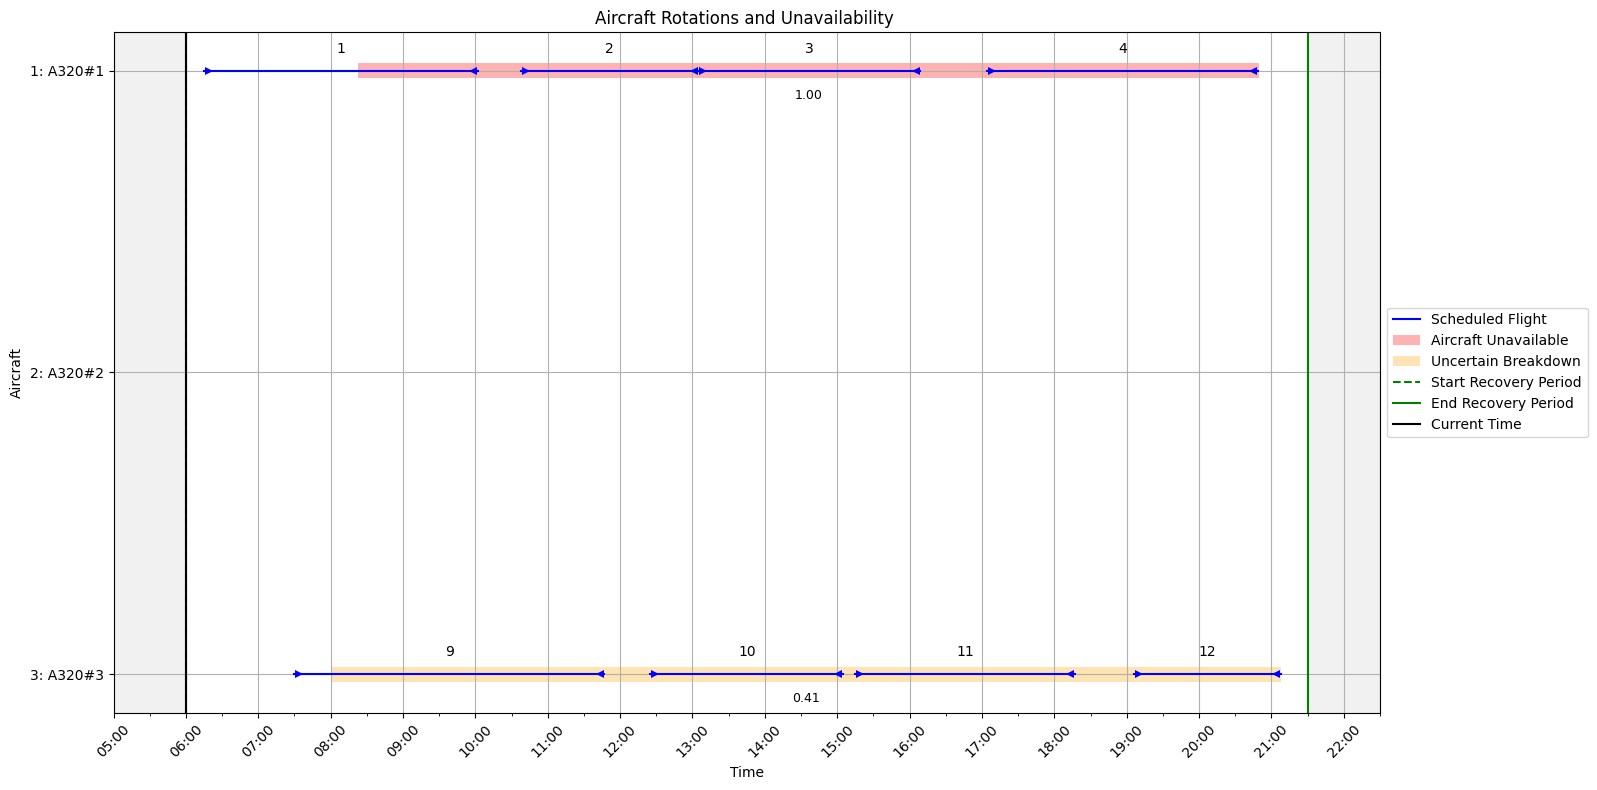

Processing scenario: Scenario_22
{'A320#1': {'StartDate': '11/09/24', 'StartTime': '09:29', 'EndDate': '11/09/24', 'EndTime': '23:01', 'Probability': 1.0}, 'A320#2': {'StartDate': '11/09/24', 'StartTime': '09:25', 'EndDate': '12/09/24', 'EndTime': '01:47', 'Probability': 0.19}}
│ Current Time       │ Time Until End     │   
│          0         │         780        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    149   961 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.19    145  1127 |     4    15   210 |     5   230   495 |     6   546   681 |     -     - 

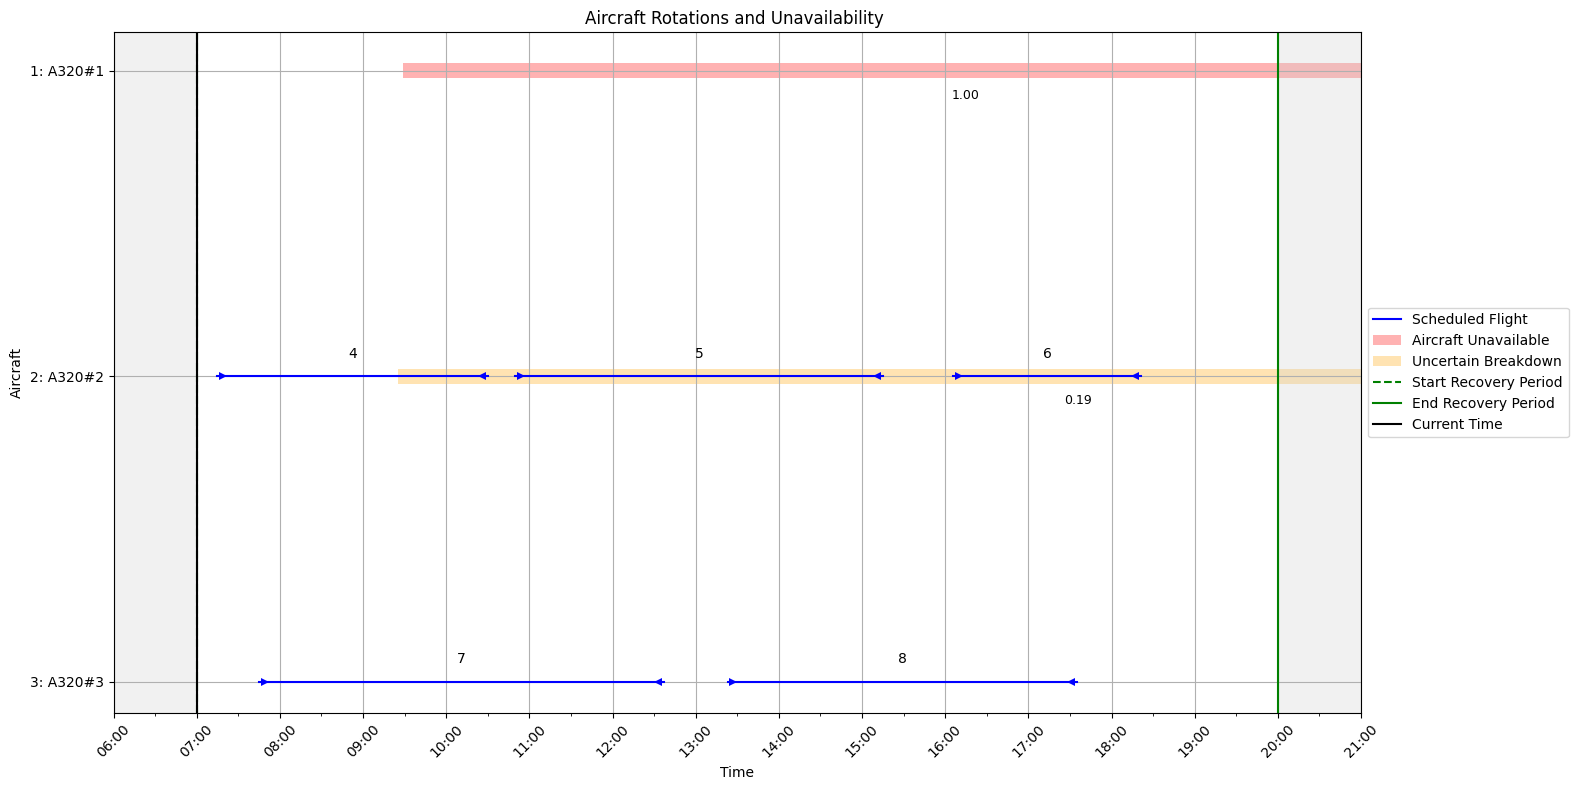

Processing scenario: Scenario_23
{'A320#2': {'StartDate': '03/09/24', 'StartTime': '09:08', 'EndDate': '03/09/24', 'EndTime': '16:22', 'Probability': 1.0}, 'A320#3': {'StartDate': '03/09/24', 'StartTime': '09:20', 'EndDate': '03/09/24', 'EndTime': '11:31', 'Probability': 0.48}}
│ Current Time       │ Time Until End     │   
│          0         │         990        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1    45   165 |     2   221   388 |     3   389   663 |     4   693   893 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    128   562 |     -     -     - |     -     -     - |     -     -     - |     -     - 

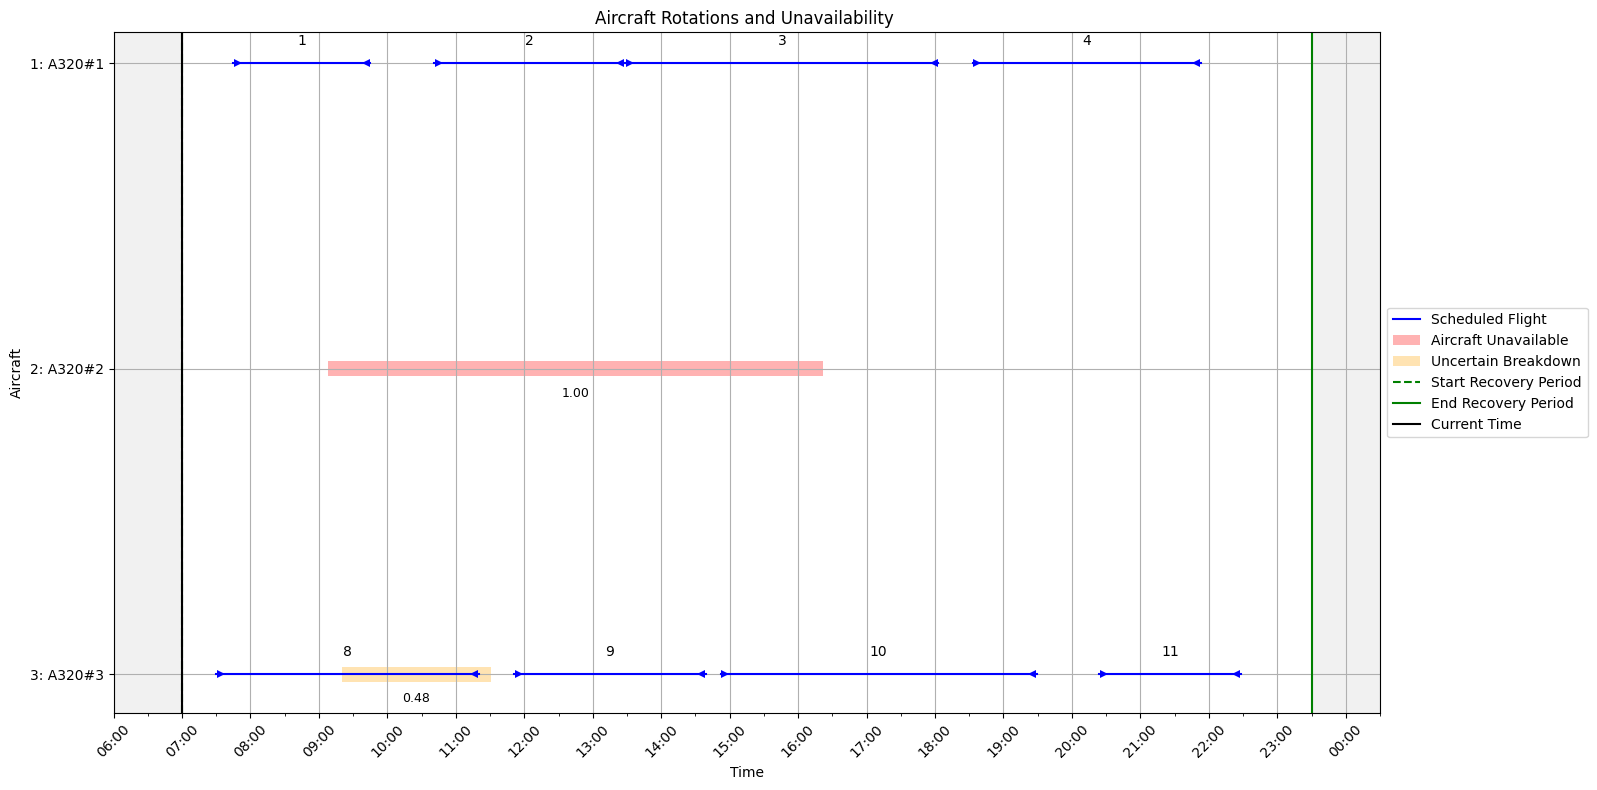

Processing scenario: Scenario_24
{'A320#2': {'StartDate': '23/09/24', 'StartTime': '08:16', 'EndDate': '24/09/24', 'EndTime': '00:13', 'Probability': 1.0}, 'A320#3': {'StartDate': '23/09/24', 'StartTime': '08:30', 'EndDate': '23/09/24', 'EndTime': '13:53', 'Probability': 0.18}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1   165   319 |     2   335   488 |     3   538   797 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    136  1093 |     -     -     - |     -     -     - |     -     -     - |     -     - 

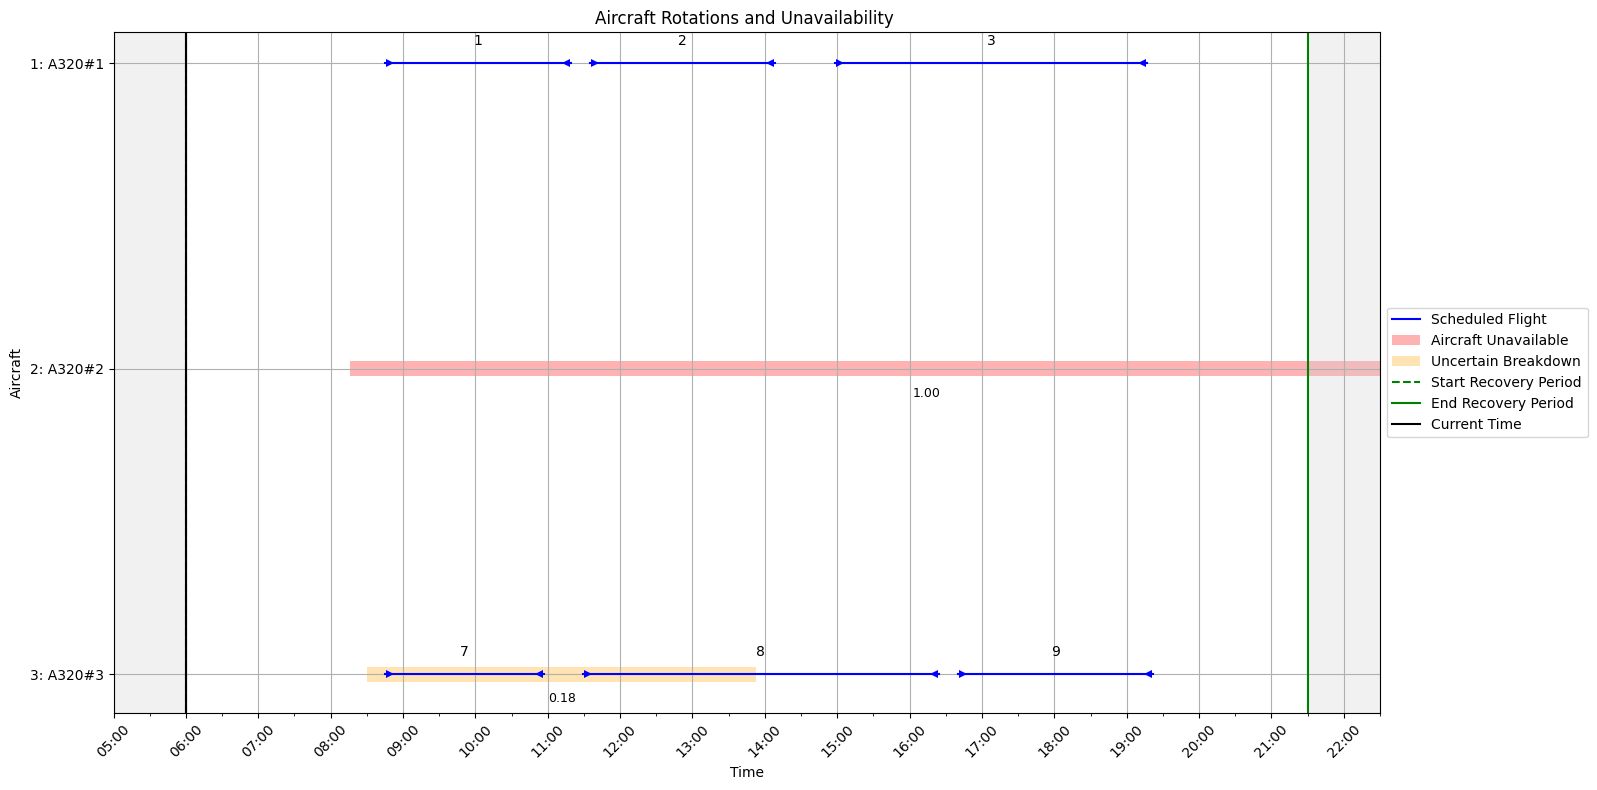

Processing scenario: Scenario_25
{'A320#1': {'StartDate': '02/09/24', 'StartTime': '08:09', 'EndDate': '02/09/24', 'EndTime': '17:15', 'Probability': 1.0}, 'A320#3': {'StartDate': '02/09/24', 'StartTime': '08:22', 'EndDate': '02/09/24', 'EndTime': '23:53', 'Probability': 0.09}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    129   675 |     1    90   289 |     2   294   542 |     3   596   736 |     4   767   919 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     - 

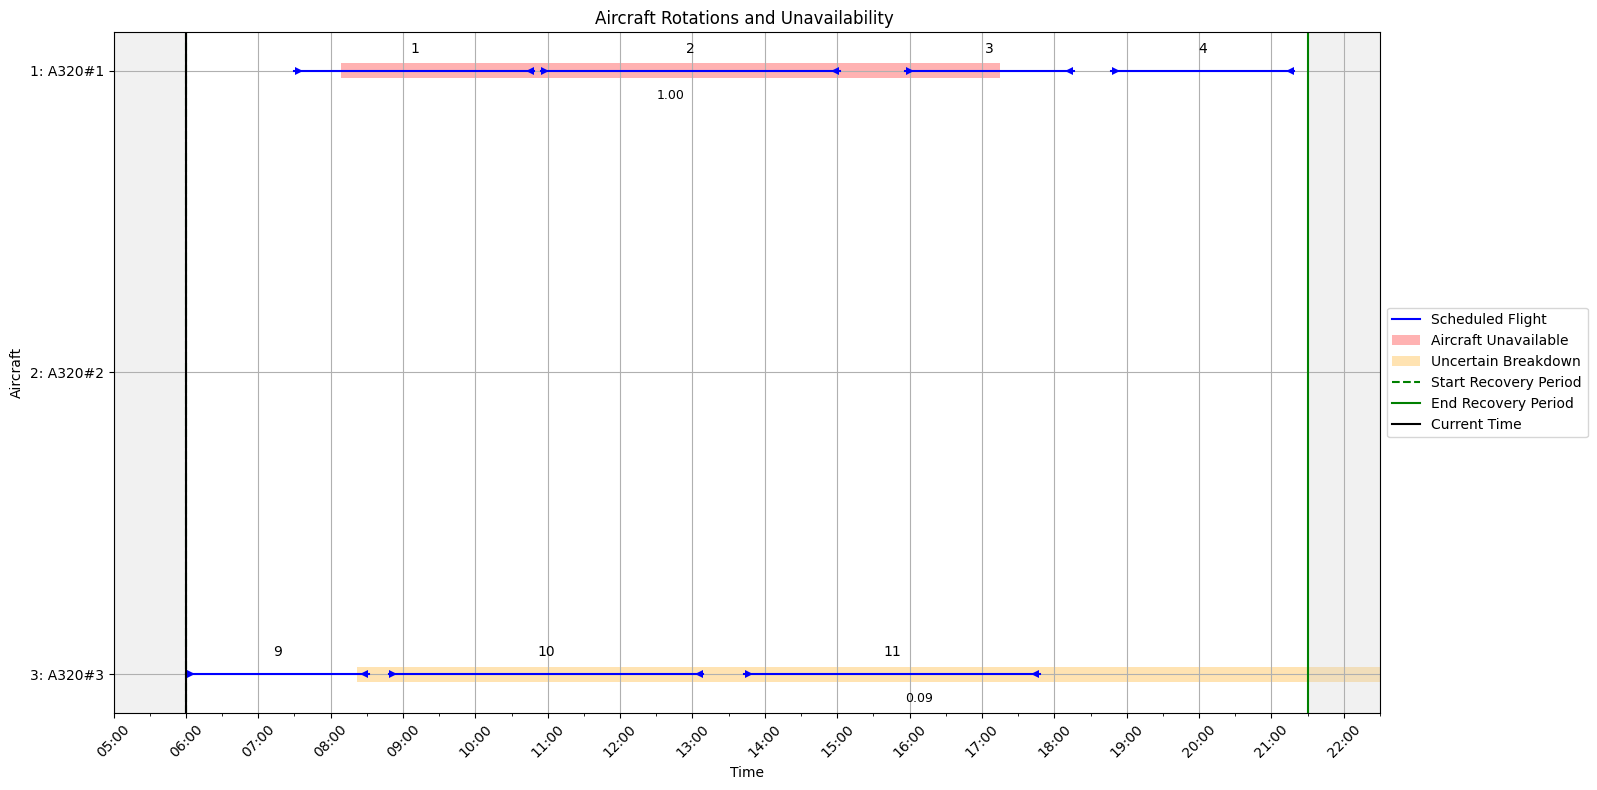

Processing scenario: Scenario_26
{'A320#3': {'StartDate': '22/09/24', 'StartTime': '09:17', 'EndDate': '22/09/24', 'EndTime': '18:55', 'Probability': 1.0}, 'A320#2': {'StartDate': '22/09/24', 'StartTime': '09:16', 'EndDate': '22/09/24', 'EndTime': '22:44', 'Probability': 0.25}}
│ Current Time       │ Time Until End     │   
│          0         │         810        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1     0   224 |     2   274   445 |     3   481   770 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.25    136   944 |     -     -     - |     -     -     - |     -     -     - |     -     - 

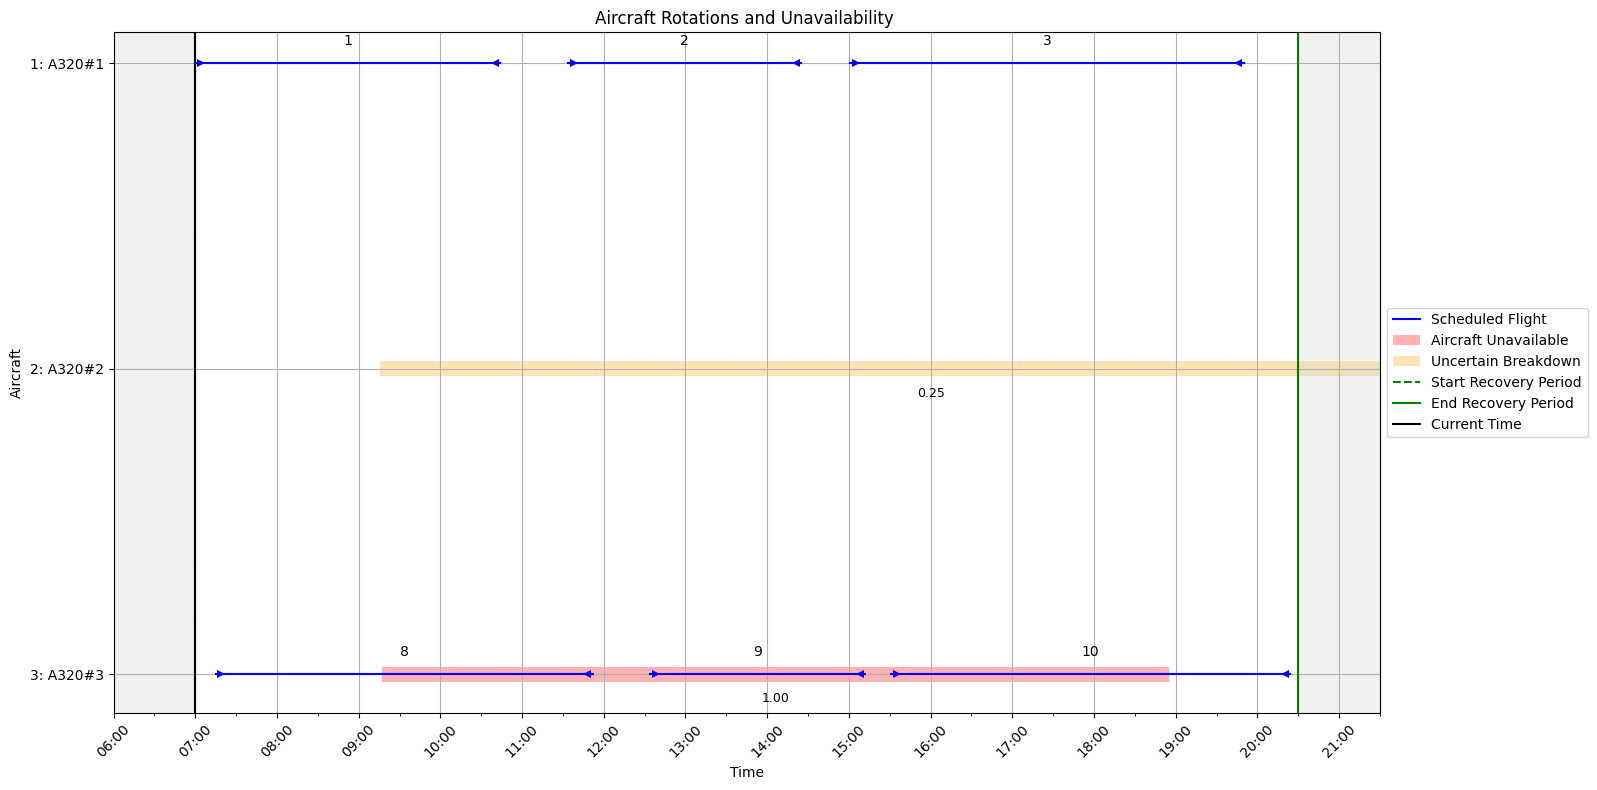

Processing scenario: Scenario_27
{'A320#2': {'StartDate': '10/09/24', 'StartTime': '08:24', 'EndDate': '10/09/24', 'EndTime': '14:06', 'Probability': 1.0}, 'A320#3': {'StartDate': '10/09/24', 'StartTime': '08:02', 'EndDate': '10/09/24', 'EndTime': '18:01', 'Probability': 0.12}}
│ Current Time       │ Time Until End     │   
│          0         │         990        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    144   486 |     5    45   280 |     6   297   580 |     7   587   739 |     8   793 

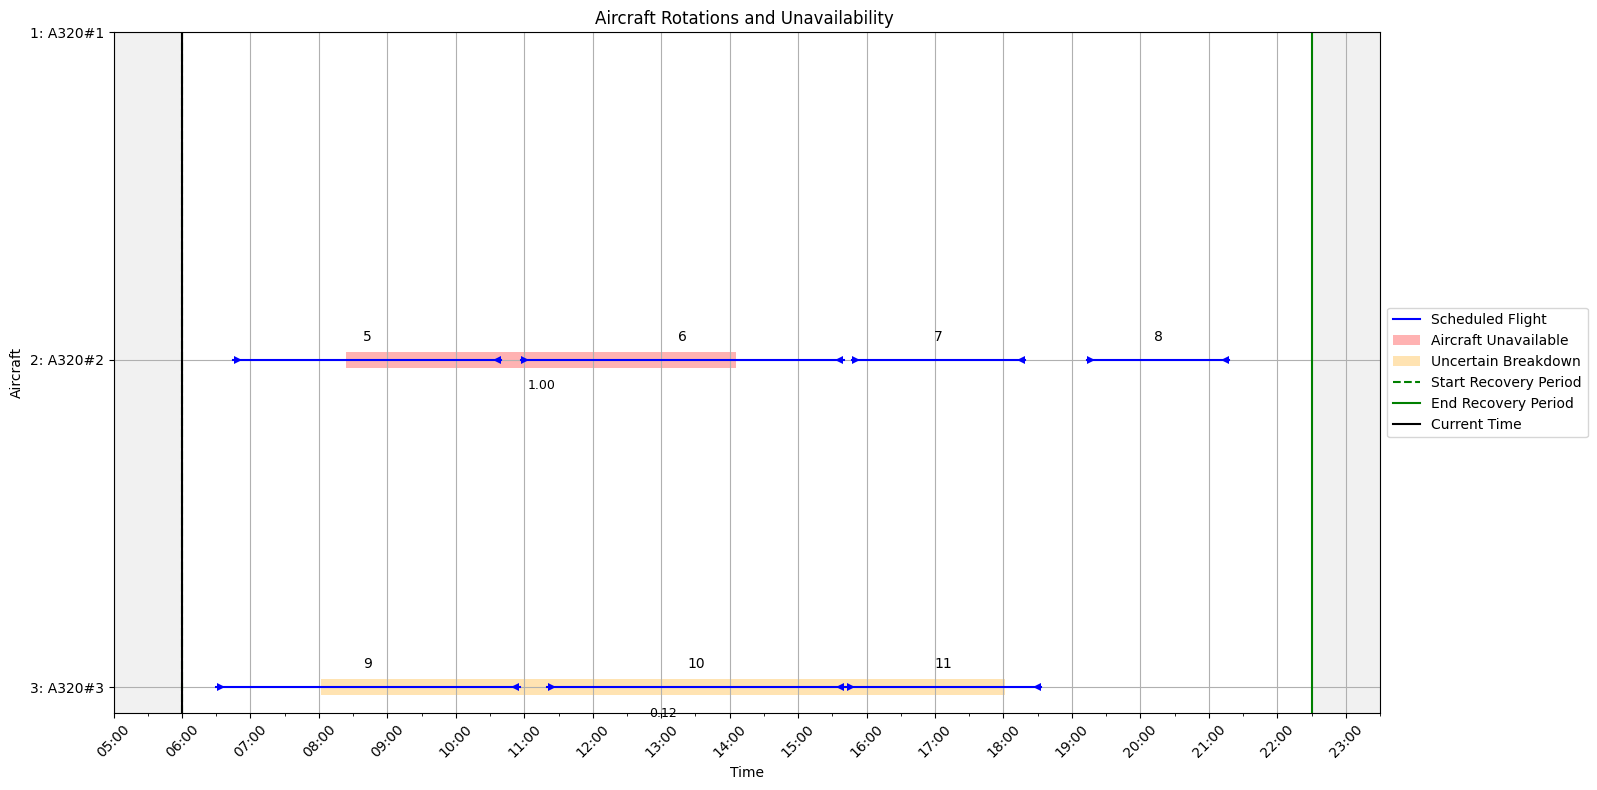

Processing scenario: Scenario_28
{'A320#1': {'StartDate': '23/09/24', 'StartTime': '09:26', 'EndDate': '23/09/24', 'EndTime': '22:47', 'Probability': 1.0}, 'A320#2': {'StartDate': '23/09/24', 'StartTime': '09:07', 'EndDate': '23/09/24', 'EndTime': '15:52', 'Probability': 0.33}}
│ Current Time       │ Time Until End     │   
│          0         │         900        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    146   947 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.33    127   532 |     4    60   282 |     5   333   590 |     6   594   763 |     -     - 

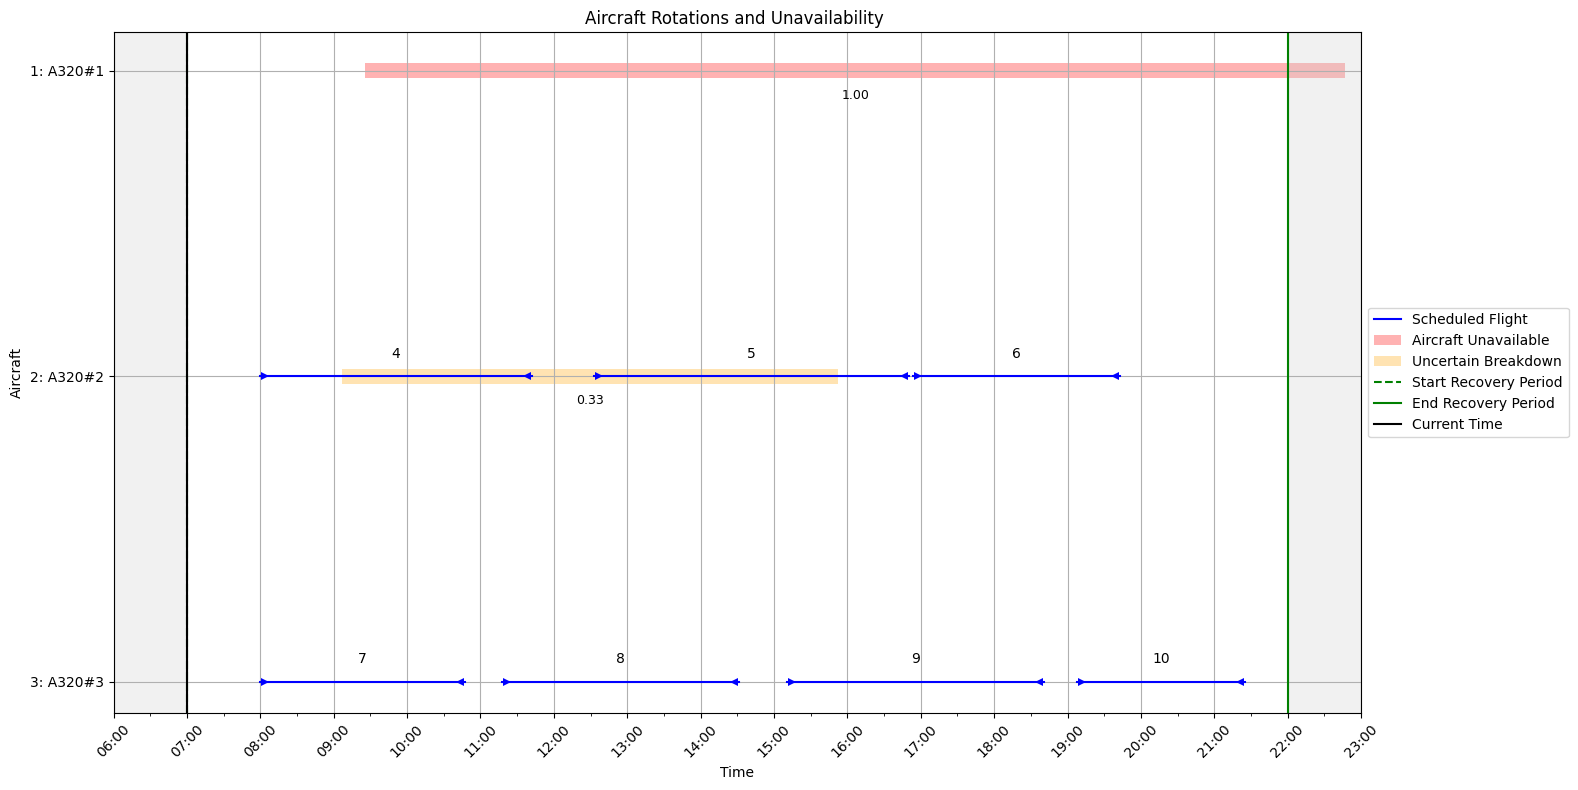

Processing scenario: Scenario_29
{'A320#3': {'StartDate': '18/09/24', 'StartTime': '09:03', 'EndDate': '18/09/24', 'EndTime': '13:00', 'Probability': 1.0}, 'A320#2': {'StartDate': '18/09/24', 'StartTime': '09:28', 'EndDate': '18/09/24', 'EndTime': '14:44', 'Probability': 0.1}}
│ Current Time       │ Time Until End     │   
│          0         │         990        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1    15   303 |     2   350   647 |     3   669   805 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.10    148   464 |     -     -     - |     -     -     - |     -     -     - |     -     -  

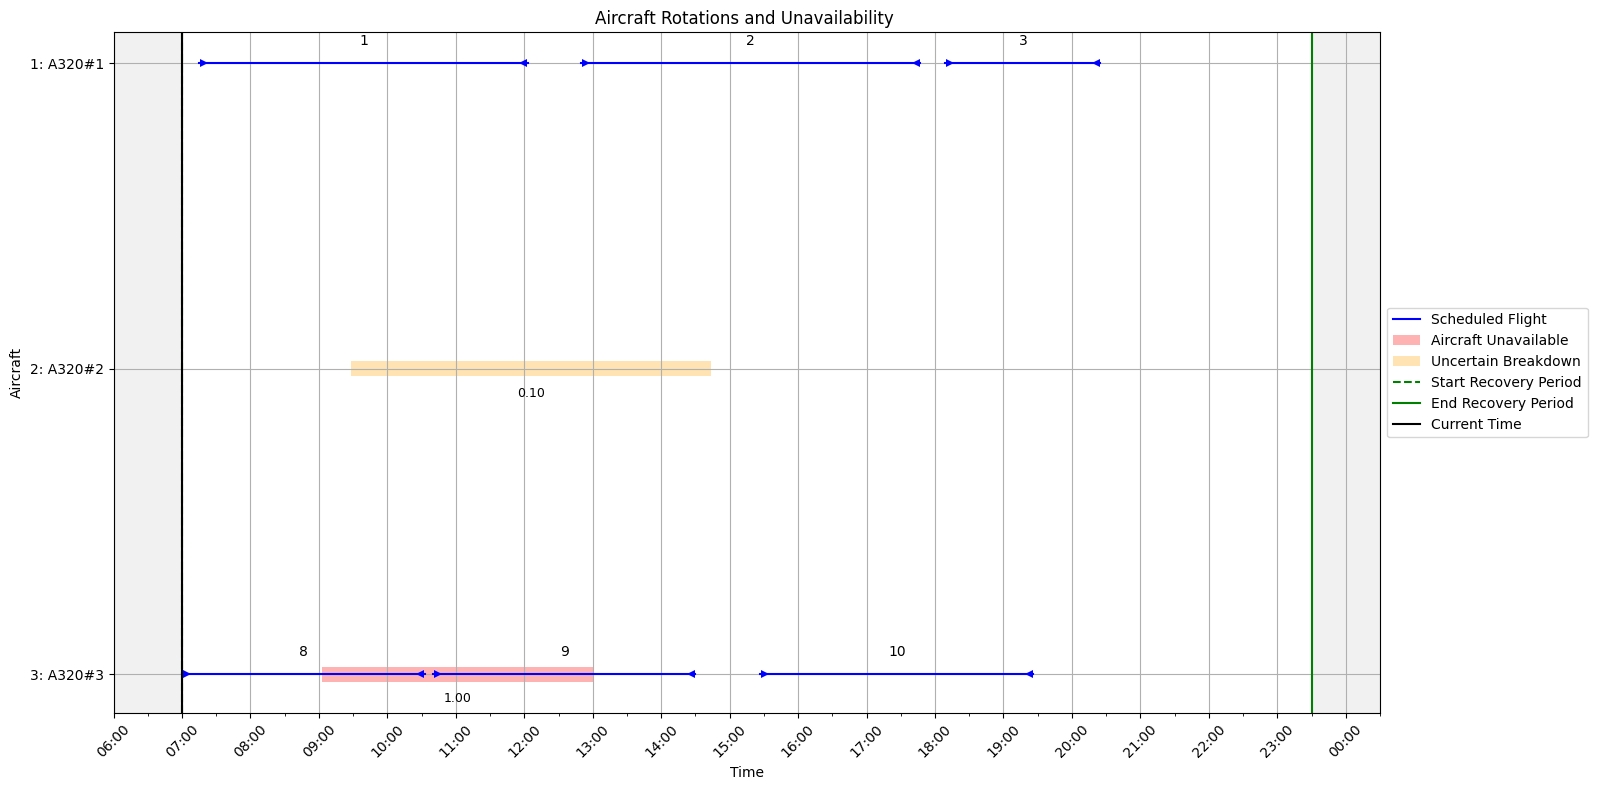

Processing scenario: Scenario_30
{'A320#2': {'StartDate': '09/09/24', 'StartTime': '08:28', 'EndDate': '09/09/24', 'EndTime': '16:02', 'Probability': 1.0}, 'A320#3': {'StartDate': '09/09/24', 'StartTime': '08:12', 'EndDate': '09/09/24', 'EndTime': '12:02', 'Probability': 0.33}}
│ Current Time       │ Time Until End     │   
│          0         │        1020        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1   165   355 |     2   361   578 |     3   604   798 |     4   800   931 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    148   602 |     5    75   231 |     6   254   385 |     7   409   536 |     8   536 

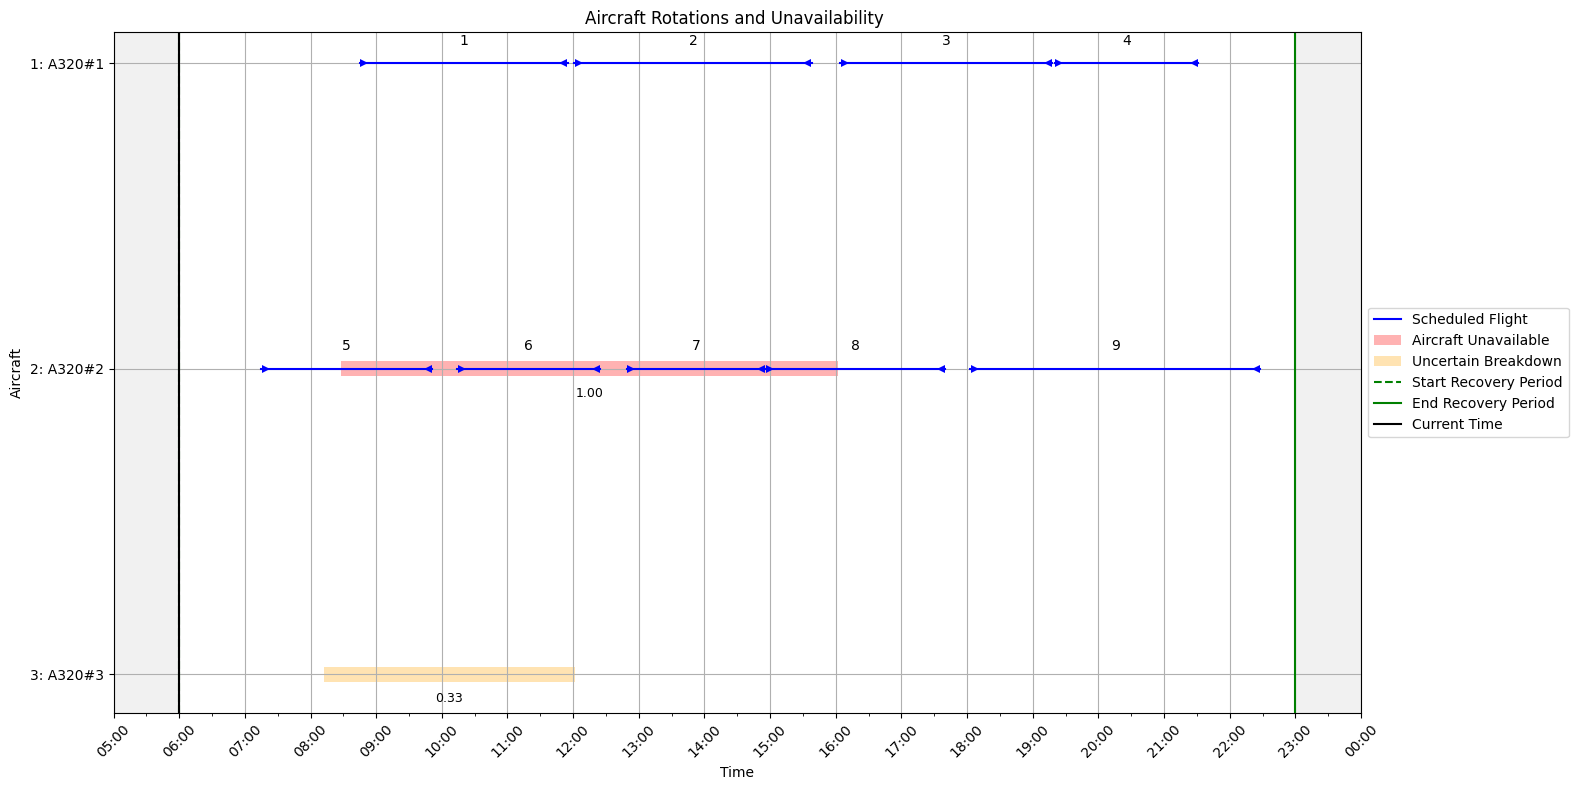

Processing scenario: Scenario_31
{'A320#3': {'StartDate': '21/09/24', 'StartTime': '07:17', 'EndDate': '21/09/24', 'EndTime': '20:04', 'Probability': 1.0}, 'A320#2': {'StartDate': '21/09/24', 'StartTime': '07:00', 'EndDate': '21/09/24', 'EndTime': '20:18', 'Probability': 0.2}}
│ Current Time       │ Time Until End     │   
│          0         │        1020        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1   135   288 |     2   306   560 |     3   596   883 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.20    120   918 |     4    60   342 |     5   348   509 |     6   549   735 |     7   752  

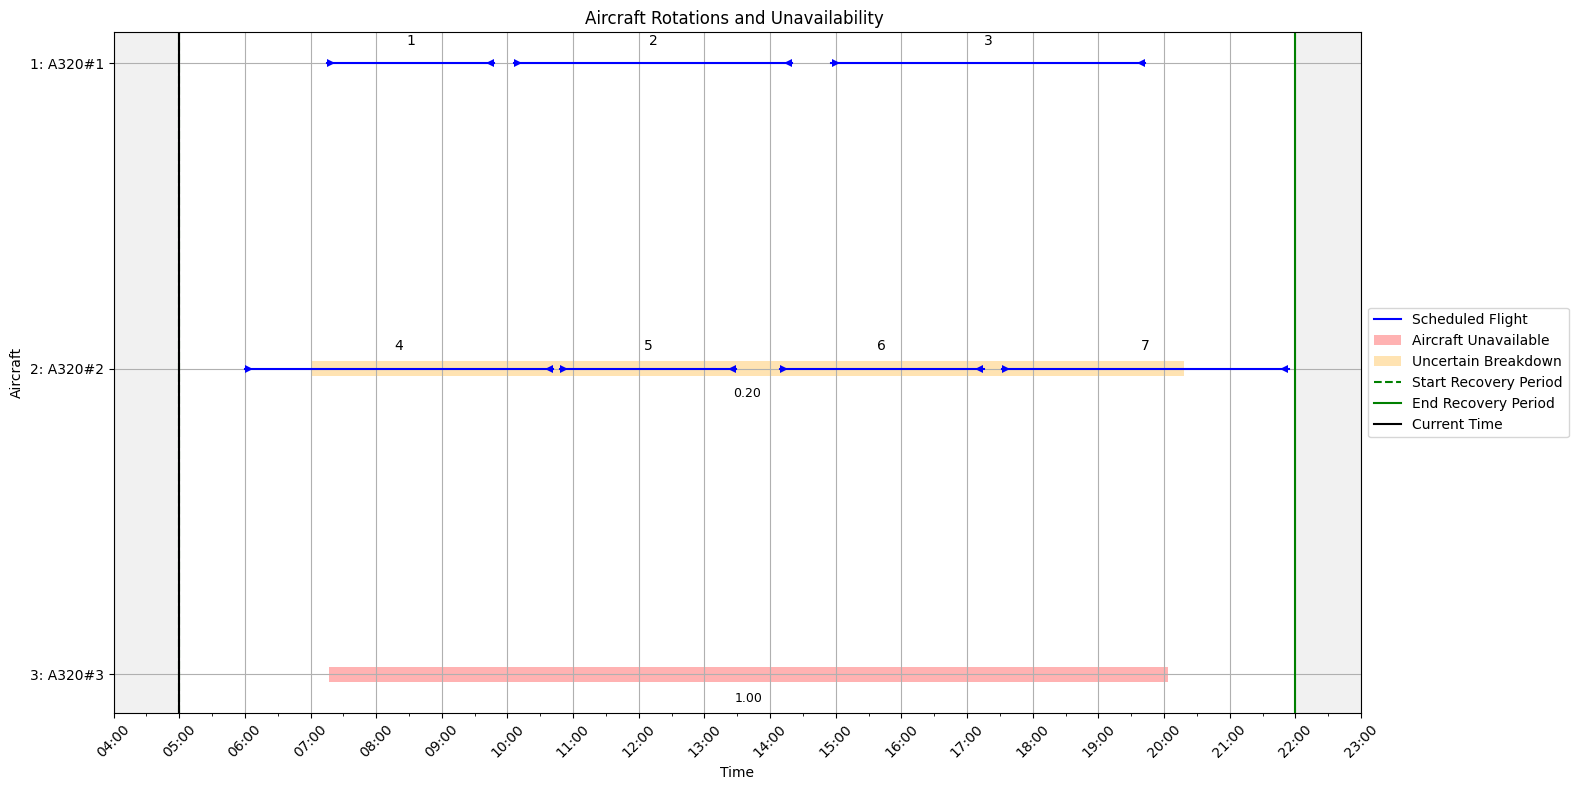

Processing scenario: Scenario_32
{'A320#2': {'StartDate': '20/09/24', 'StartTime': '08:30', 'EndDate': '20/09/24', 'EndTime': '14:25', 'Probability': 1.0}, 'A320#1': {'StartDate': '20/09/24', 'StartTime': '08:03', 'EndDate': '20/09/24', 'EndTime': '20:37', 'Probability': 0.14}}
│ Current Time       │ Time Until End     │   
│          0         │        1020        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.14    123   877 |     1    30   306 |     2   357   562 |     3   567   723 |     4   756   921 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    150   505 |     -     -     - |     -     -     - |     -     -     - |     -     - 

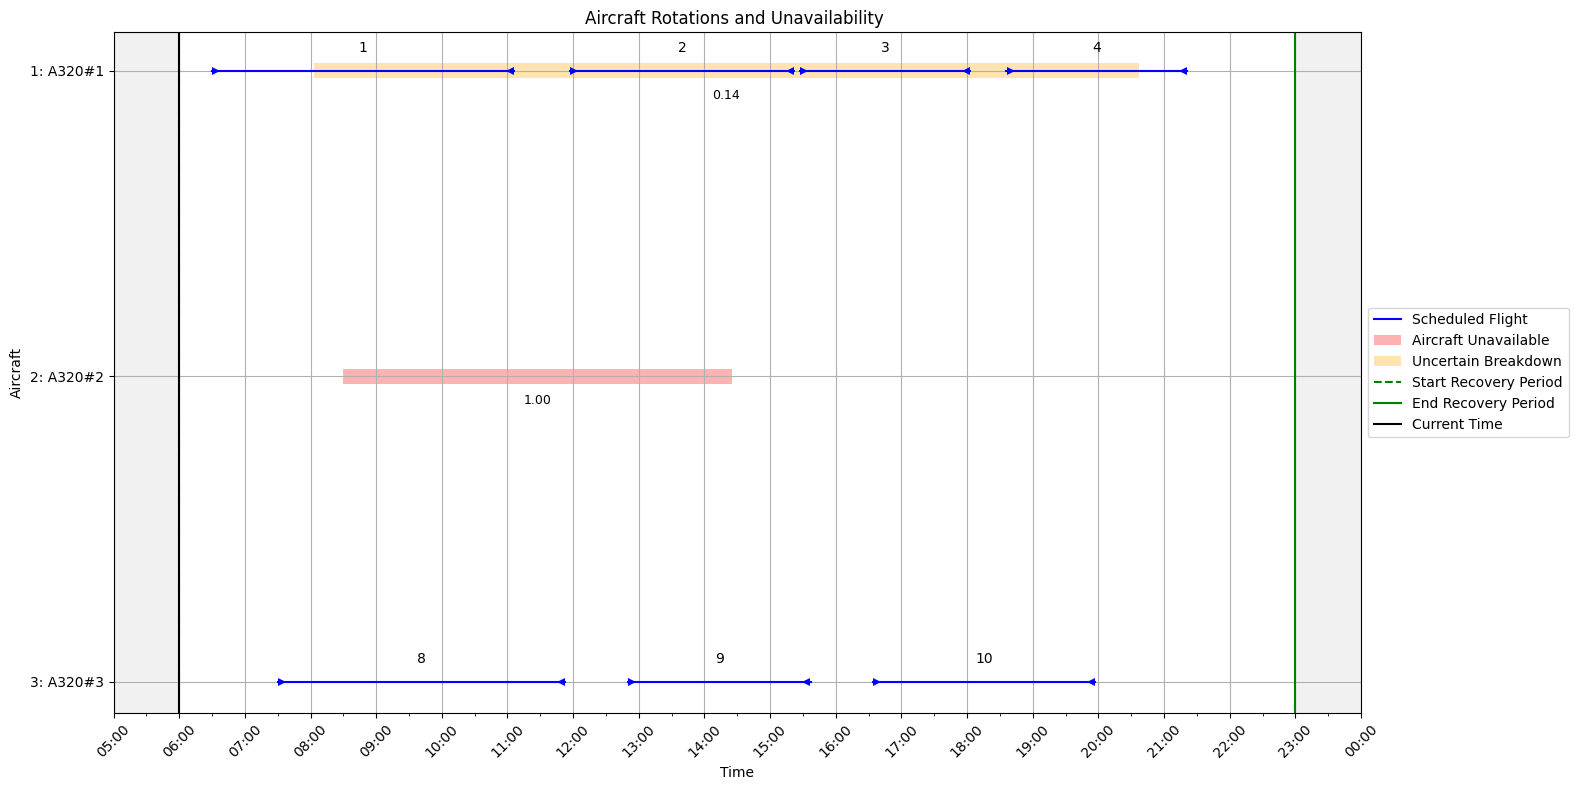

Processing scenario: Scenario_33
{'A320#2': {'StartDate': '04/09/24', 'StartTime': '09:16', 'EndDate': '04/09/24', 'EndTime': '11:50', 'Probability': 1.0}, 'A320#1': {'StartDate': '04/09/24', 'StartTime': '09:13', 'EndDate': '04/09/24', 'EndTime': '13:15', 'Probability': 0.36}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.36    133   375 |     1    30   279 |     2   311   527 |     3   559   719 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    136   290 |     4    15   176 |     5   210   361 |     6   368   574 |     7   601 

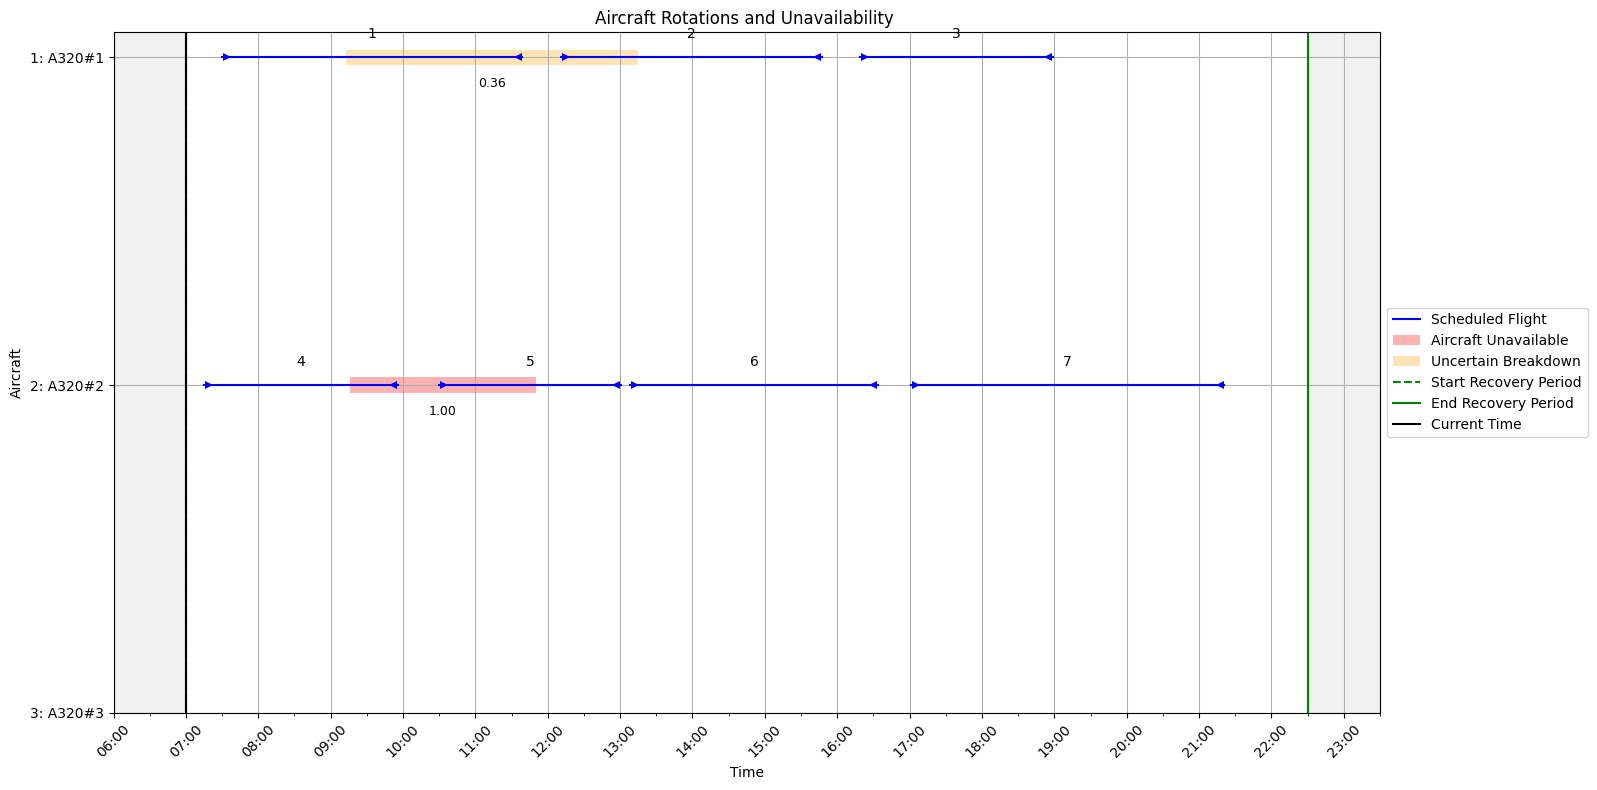

Processing scenario: Scenario_34
{'A320#1': {'StartDate': '20/09/24', 'StartTime': '09:06', 'EndDate': '20/09/24', 'EndTime': '13:56', 'Probability': 1.0}, 'A320#3': {'StartDate': '20/09/24', 'StartTime': '09:30', 'EndDate': '20/09/24', 'EndTime': '22:01', 'Probability': 0.15}}
│ Current Time       │ Time Until End     │   
│          0         │         840        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    126   416 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     4    15   251 |     5   280   401 |     6   407   617 |     -     - 

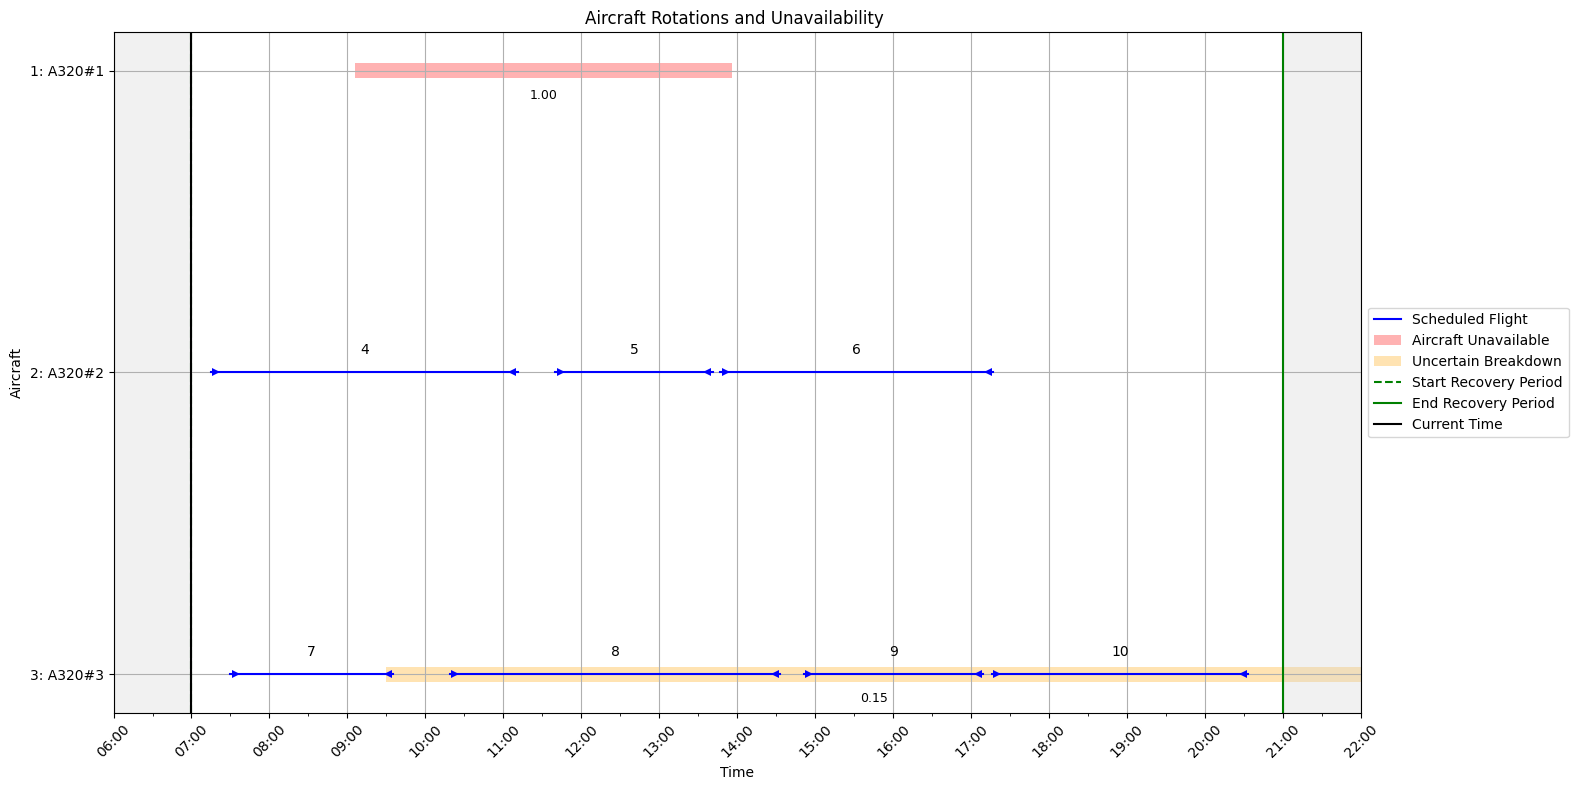

Processing scenario: Scenario_35
{'A320#1': {'StartDate': '01/09/24', 'StartTime': '09:11', 'EndDate': '01/09/24', 'EndTime': '17:22', 'Probability': 1.0}, 'A320#2': {'StartDate': '01/09/24', 'StartTime': '09:03', 'EndDate': '01/09/24', 'EndTime': '15:14', 'Probability': 0.45}}
│ Current Time       │ Time Until End     │   
│          0         │         810        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    131   622 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.45    123   494 |     4    60   341 |     5   390   575 |     6   578   806 |     -     - 

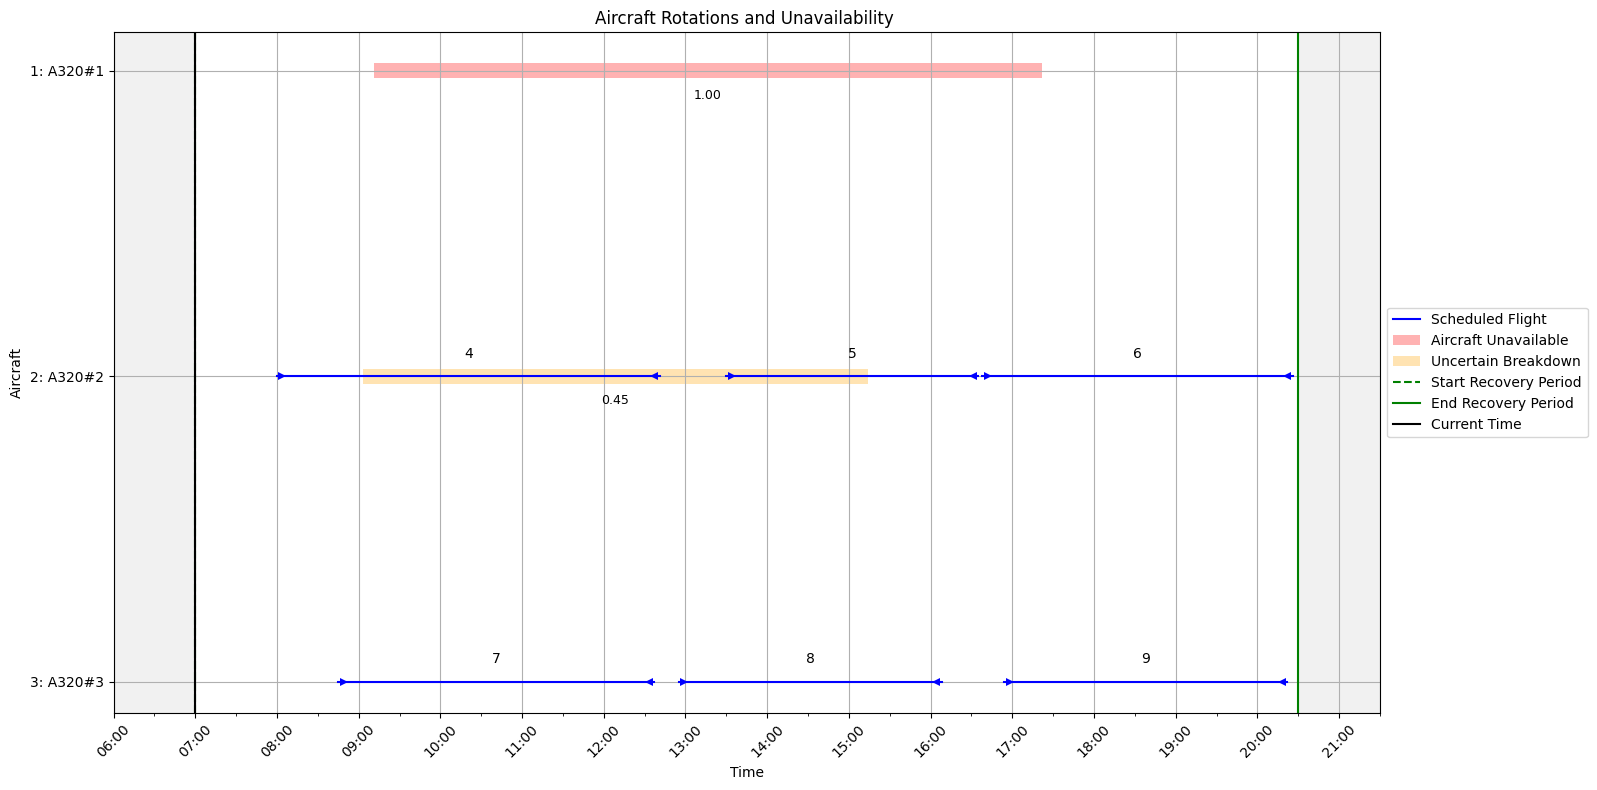

Processing scenario: Scenario_36
{'A320#3': {'StartDate': '01/09/24', 'StartTime': '08:19', 'EndDate': '01/09/24', 'EndTime': '14:38', 'Probability': 1.0}, 'A320#2': {'StartDate': '01/09/24', 'StartTime': '08:08', 'EndDate': '01/09/24', 'EndTime': '21:48', 'Probability': 0.43}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.43    128   948 |     4     0   196 |     5   226   434 |     6   468   682 |     -     - 

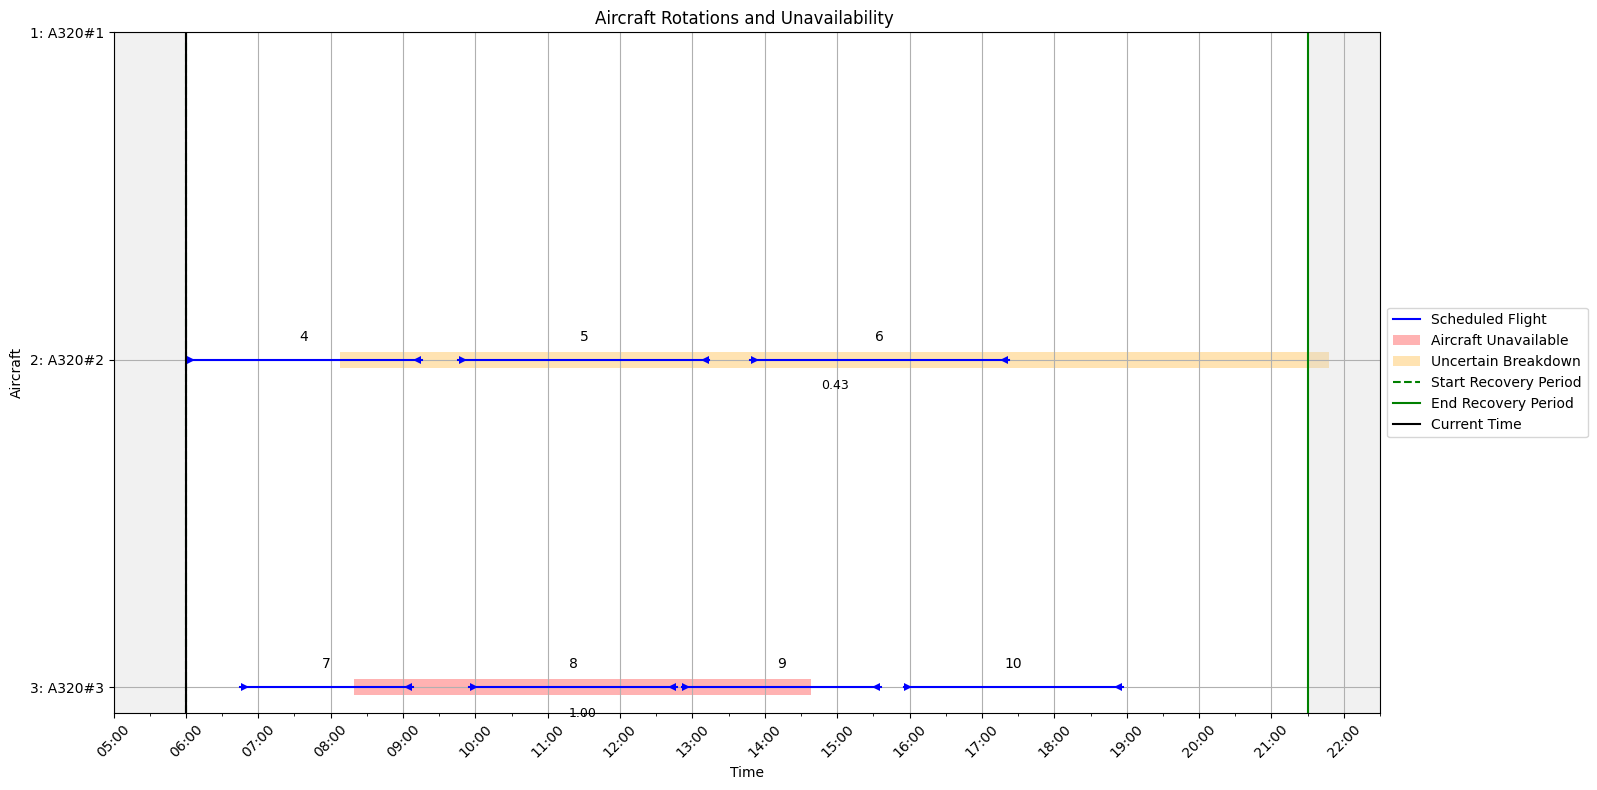

Processing scenario: Scenario_37
{'A320#1': {'StartDate': '20/09/24', 'StartTime': '08:09', 'EndDate': '20/09/24', 'EndTime': '18:37', 'Probability': 1.0}, 'A320#2': {'StartDate': '20/09/24', 'StartTime': '08:04', 'EndDate': '20/09/24', 'EndTime': '17:41', 'Probability': 0.1}}
│ Current Time       │ Time Until End     │   
│          0         │         990        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    129   757 |     1   120   380 |     2   423   687 |     3   706   979 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.10    124   701 |     4   150   349 |     5   393   605 |     6   608   740 |     7   759  

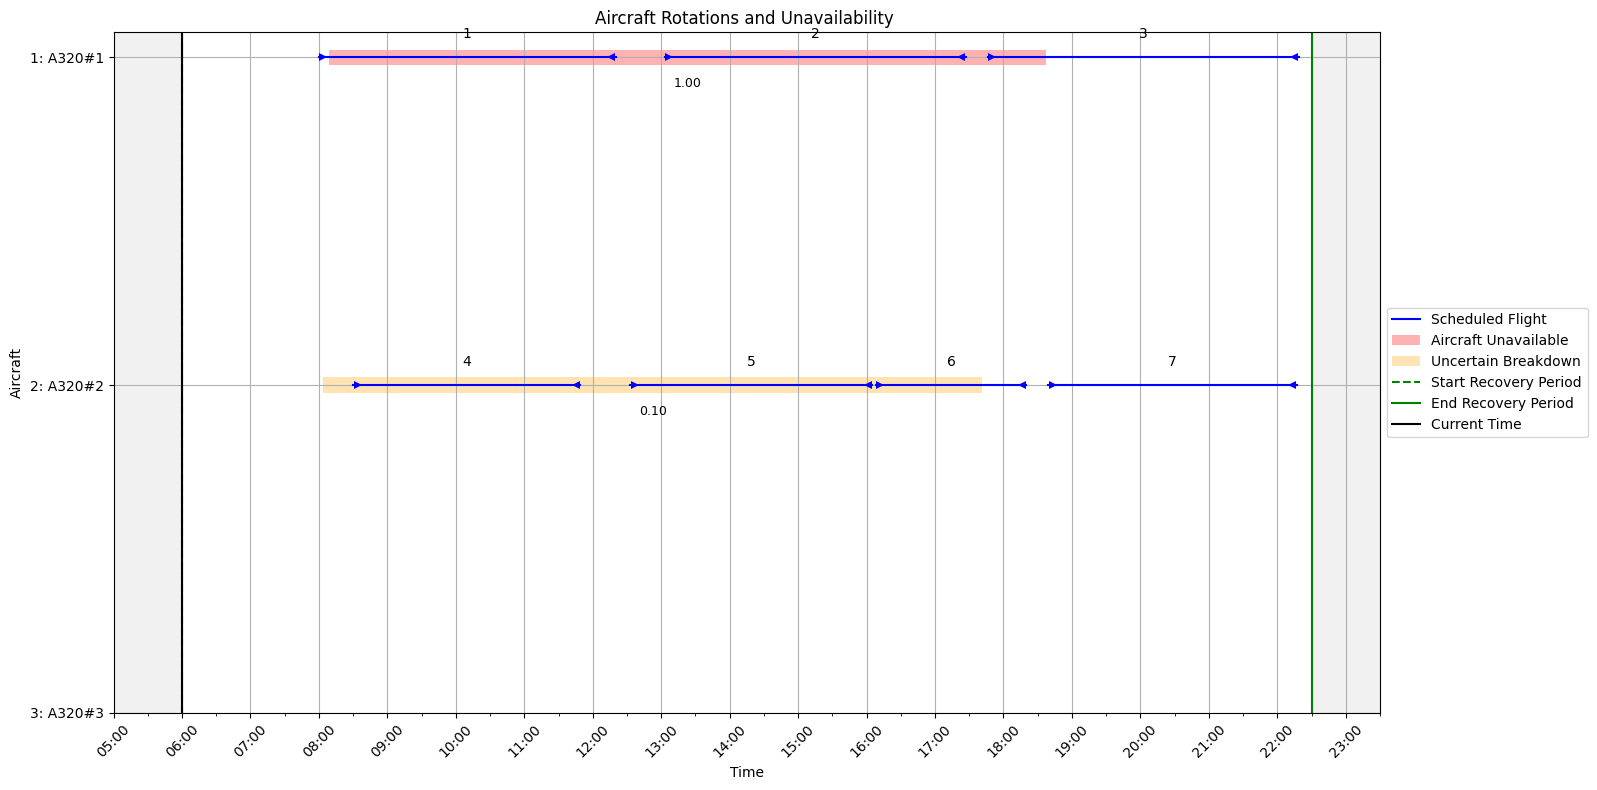

Processing scenario: Scenario_38
{'A320#3': {'StartDate': '14/09/24', 'StartTime': '08:09', 'EndDate': '14/09/24', 'EndTime': '16:26', 'Probability': 1.0}, 'A320#1': {'StartDate': '14/09/24', 'StartTime': '08:13', 'EndDate': '14/09/24', 'EndTime': '15:54', 'Probability': 0.43}}
│ Current Time       │ Time Until End     │   
│          0         │         900        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.43    133   594 |     1   120   417 |     2   457   651 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     3    75   217 |     4   271   497 |     5   506   692 |     6   735 

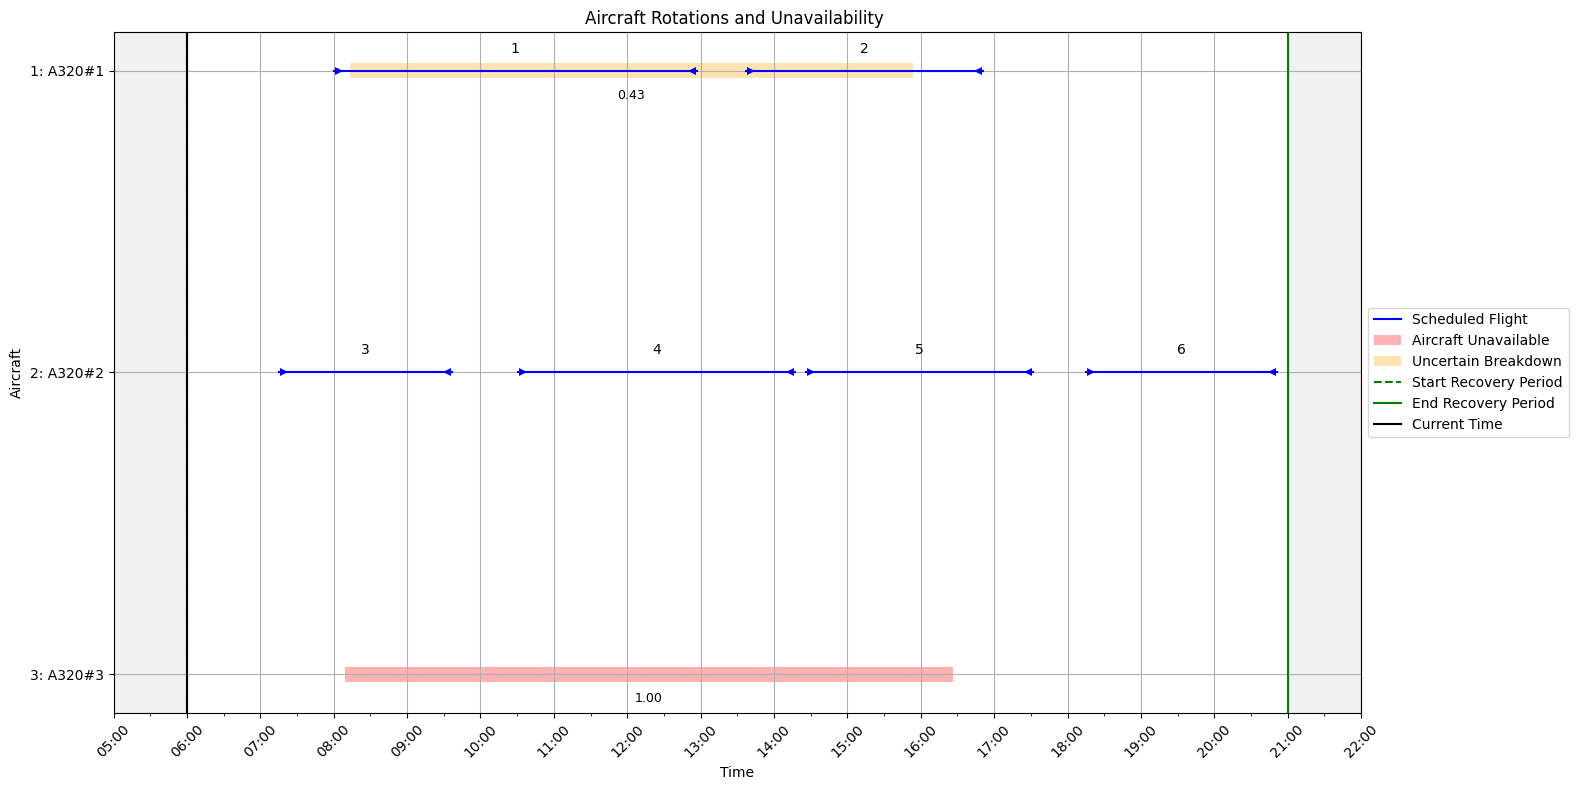

Processing scenario: Scenario_39
{'A320#2': {'StartDate': '21/09/24', 'StartTime': '09:01', 'EndDate': '21/09/24', 'EndTime': '17:04', 'Probability': 1.0}, 'A320#1': {'StartDate': '21/09/24', 'StartTime': '09:28', 'EndDate': '22/09/24', 'EndTime': '00:51', 'Probability': 0.16}}
│ Current Time       │ Time Until End     │   
│          0         │         840        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.16    148  1071 |     1     0   182 |     2   219   358 |     3   382   513 |     4   560   823 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    121   604 |     5    45   231 |     6   238   507 |     7   553   736 |     -     - 

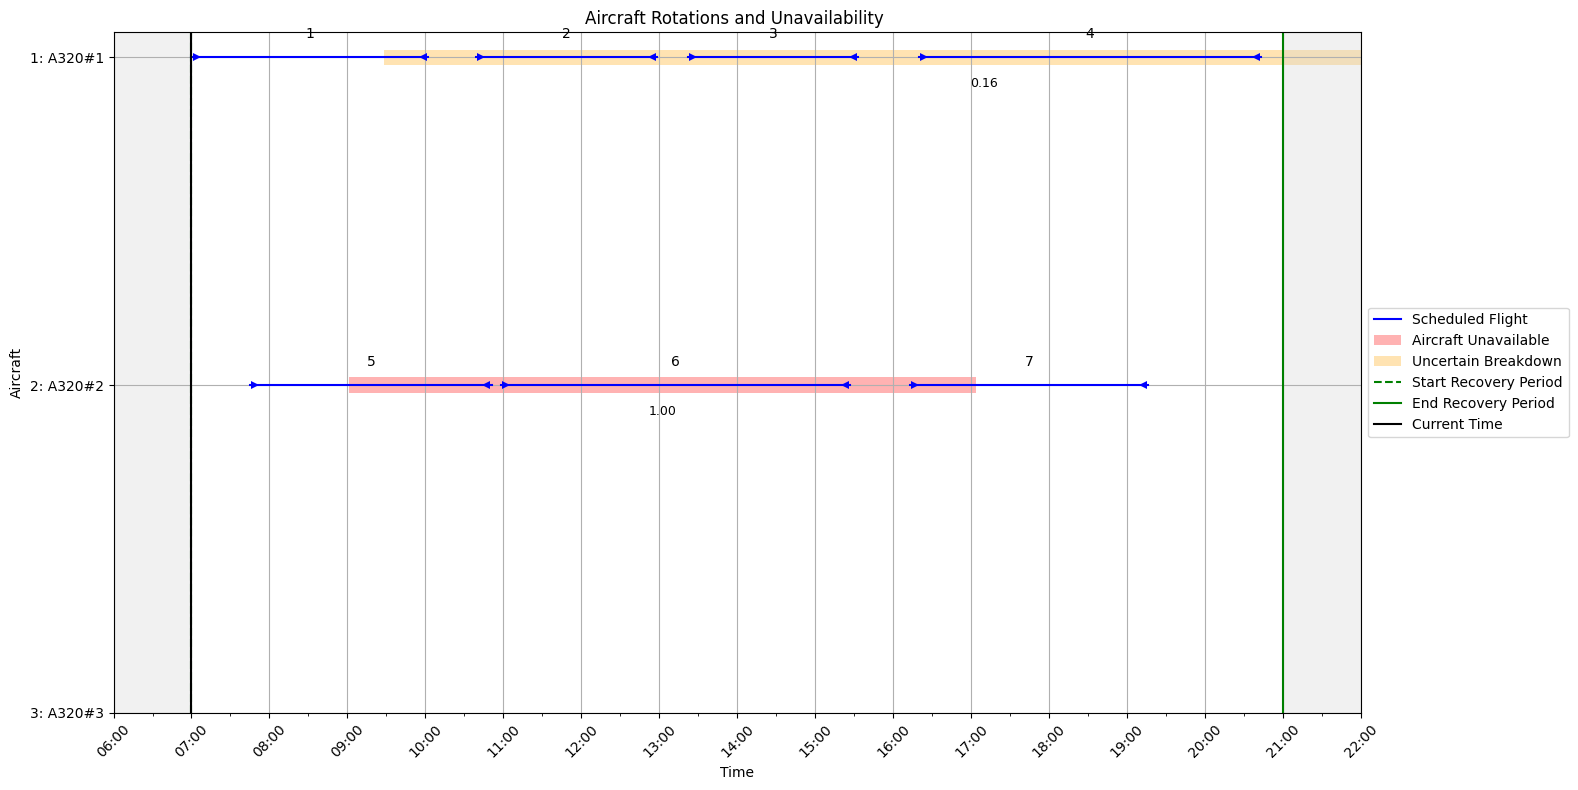

Processing scenario: Scenario_40
{'A320#2': {'StartDate': '25/09/24', 'StartTime': '07:28', 'EndDate': '25/09/24', 'EndTime': '14:23', 'Probability': 1.0}, 'A320#3': {'StartDate': '25/09/24', 'StartTime': '07:29', 'EndDate': '25/09/24', 'EndTime': '16:42', 'Probability': 0.44}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1   225   411 |     2   415   591 |     3   638   848 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    148   563 |     -     -     - |     -     -     - |     -     -     - |     -     - 

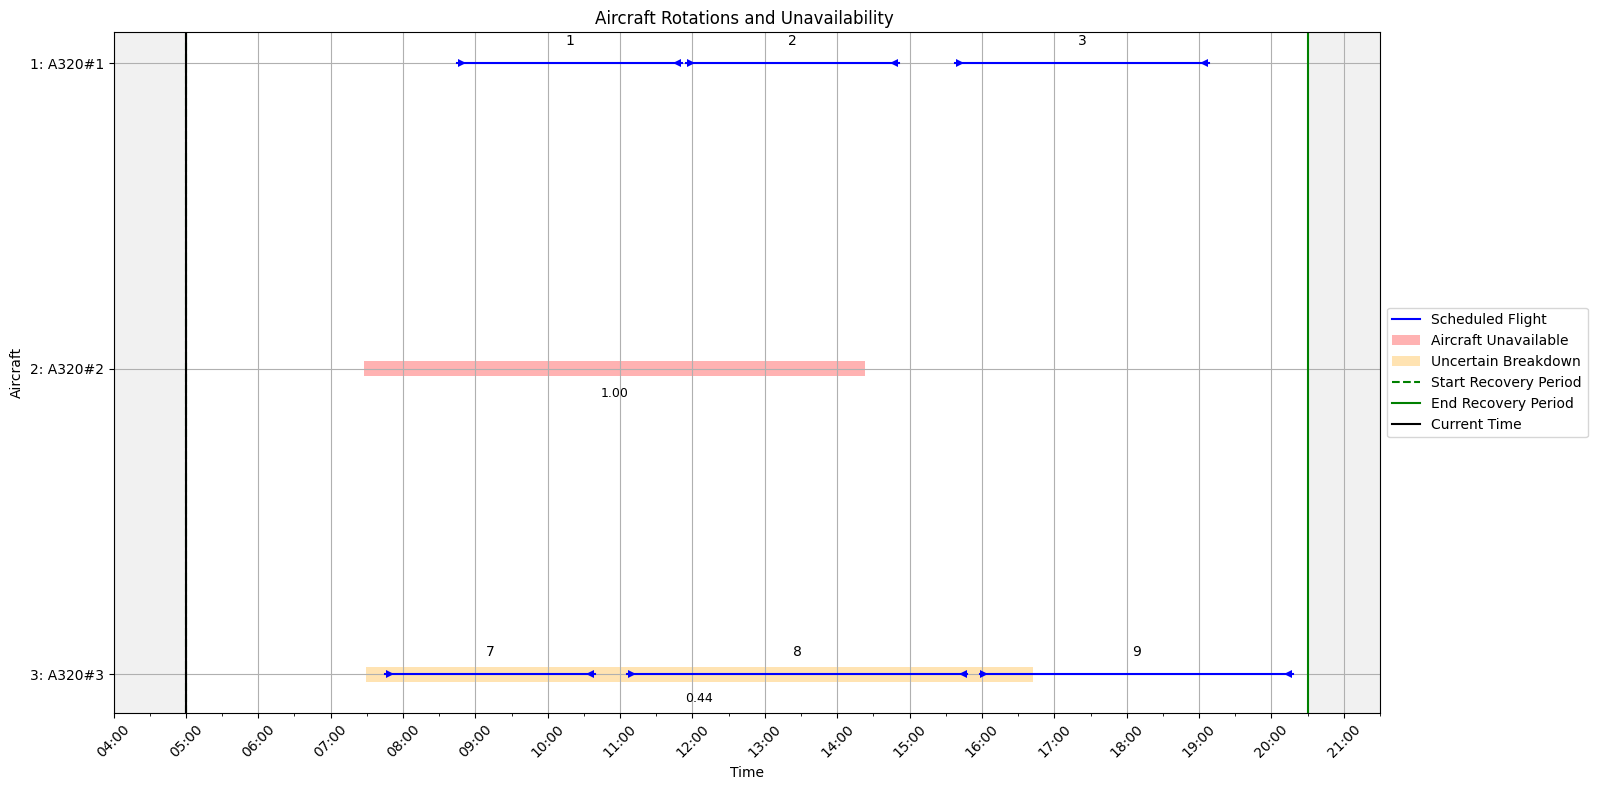

Processing scenario: Scenario_41
{'A320#3': {'StartDate': '07/09/24', 'StartTime': '07:21', 'EndDate': '07/09/24', 'EndTime': '18:07', 'Probability': 1.0}, 'A320#2': {'StartDate': '07/09/24', 'StartTime': '07:09', 'EndDate': '07/09/24', 'EndTime': '17:51', 'Probability': 0.3}}
│ Current Time       │ Time Until End     │   
│          0         │         900        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.30    129   771 |     4   165   310 |     5   357   581 |     6   599   869 |     -     -  

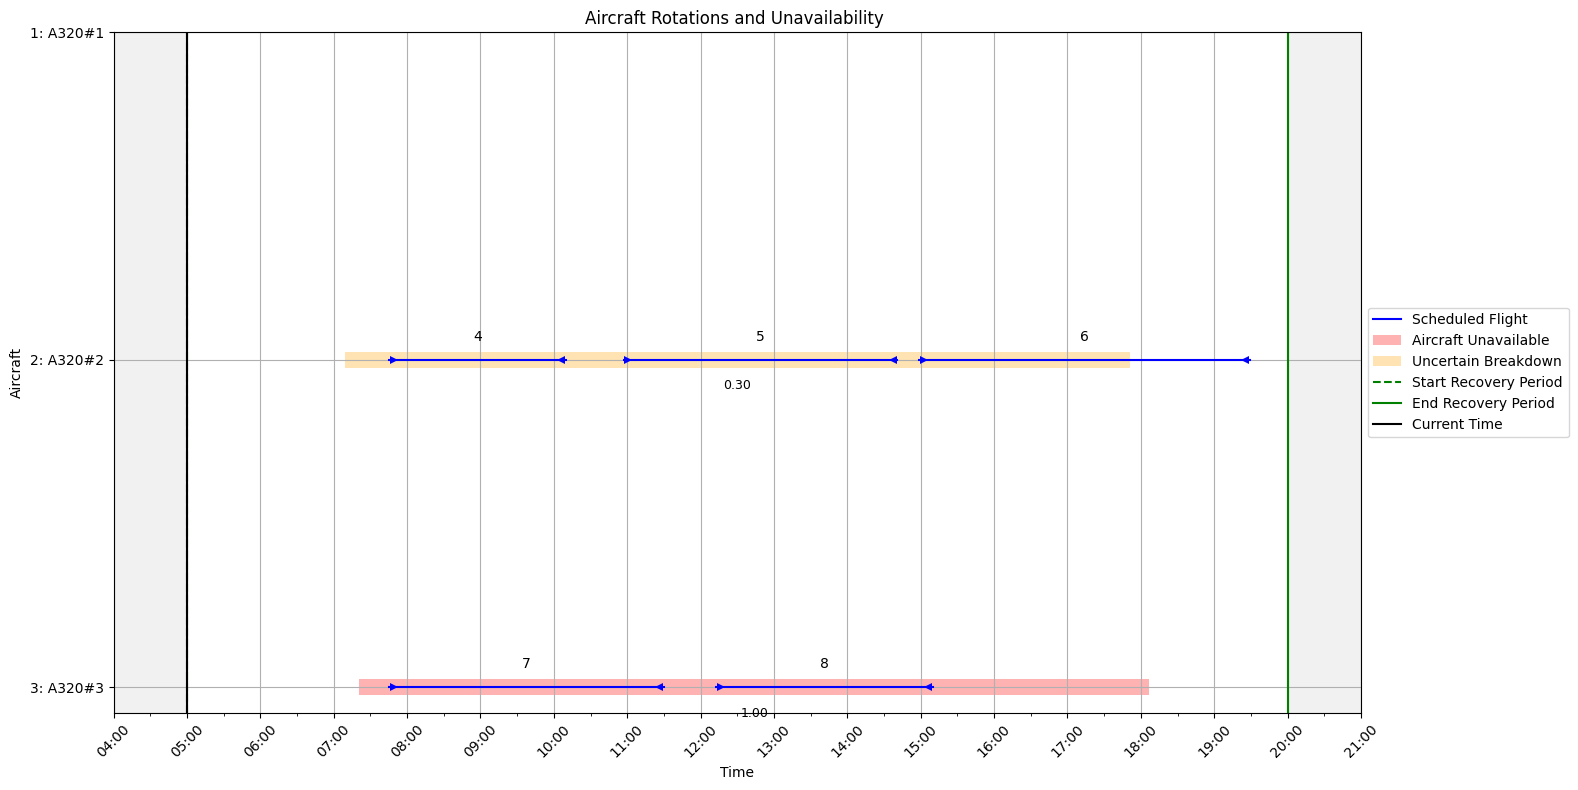

Processing scenario: Scenario_42
{'A320#2': {'StartDate': '08/09/24', 'StartTime': '08:00', 'EndDate': '08/09/24', 'EndTime': '19:03', 'Probability': 1.0}, 'A320#3': {'StartDate': '08/09/24', 'StartTime': '08:13', 'EndDate': '08/09/24', 'EndTime': '12:53', 'Probability': 0.17}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    120   783 |     4    75   346 |     5   380   622 |     6   626   786 |     -     - 

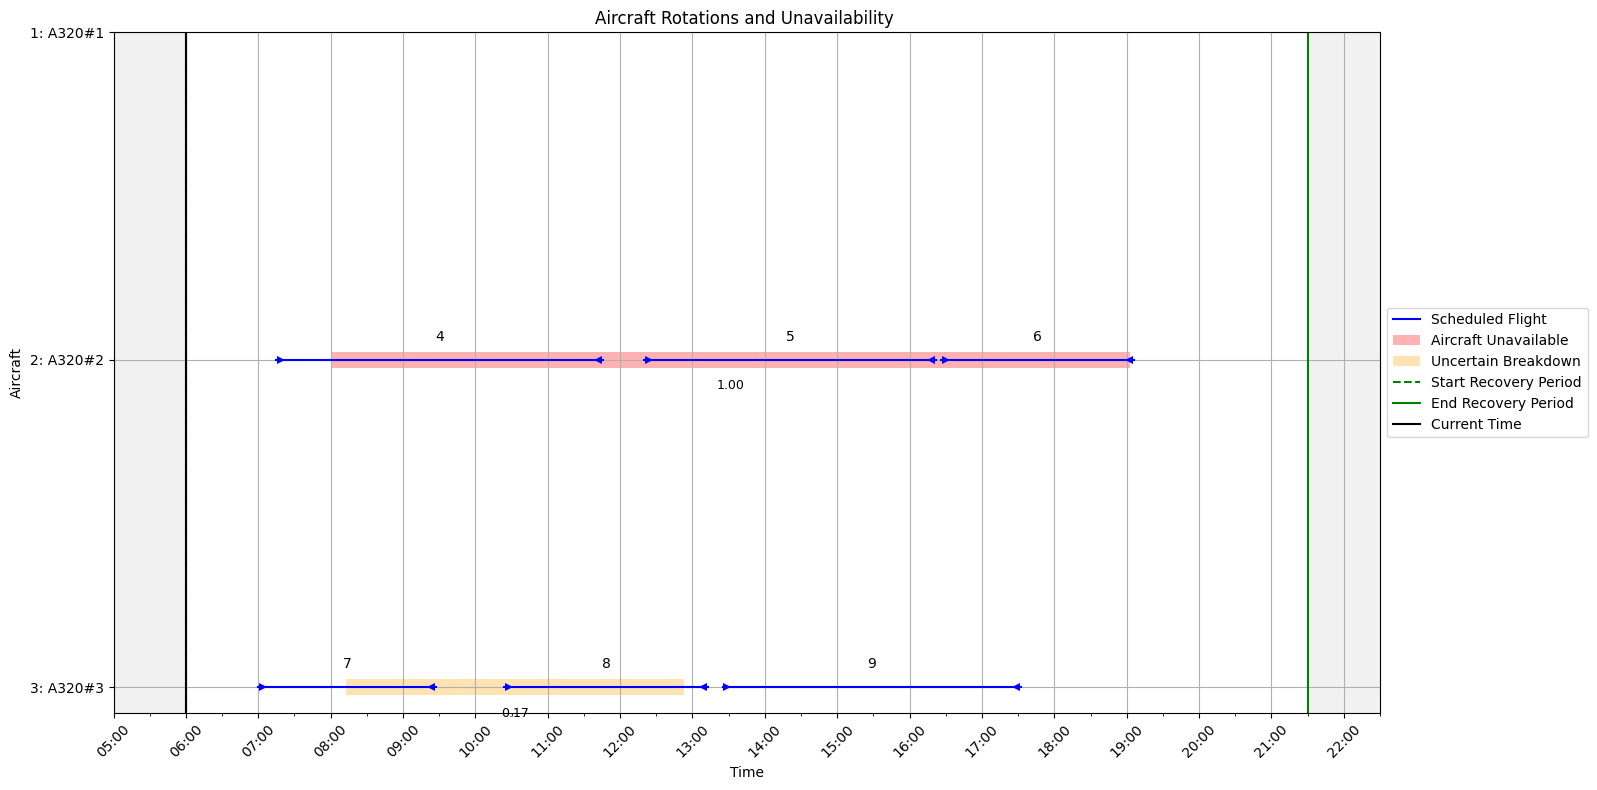

Processing scenario: Scenario_43
{'A320#3': {'StartDate': '24/09/24', 'StartTime': '07:14', 'EndDate': '24/09/24', 'EndTime': '20:00', 'Probability': 1.0}, 'A320#2': {'StartDate': '24/09/24', 'StartTime': '07:13', 'EndDate': '24/09/24', 'EndTime': '21:41', 'Probability': 0.43}}
│ Current Time       │ Time Until End     │   
│          0         │         900        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1   195   479 |     2   487   752 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.43    133  1001 |     -     -     - |     -     -     - |     -     -     - |     -     - 

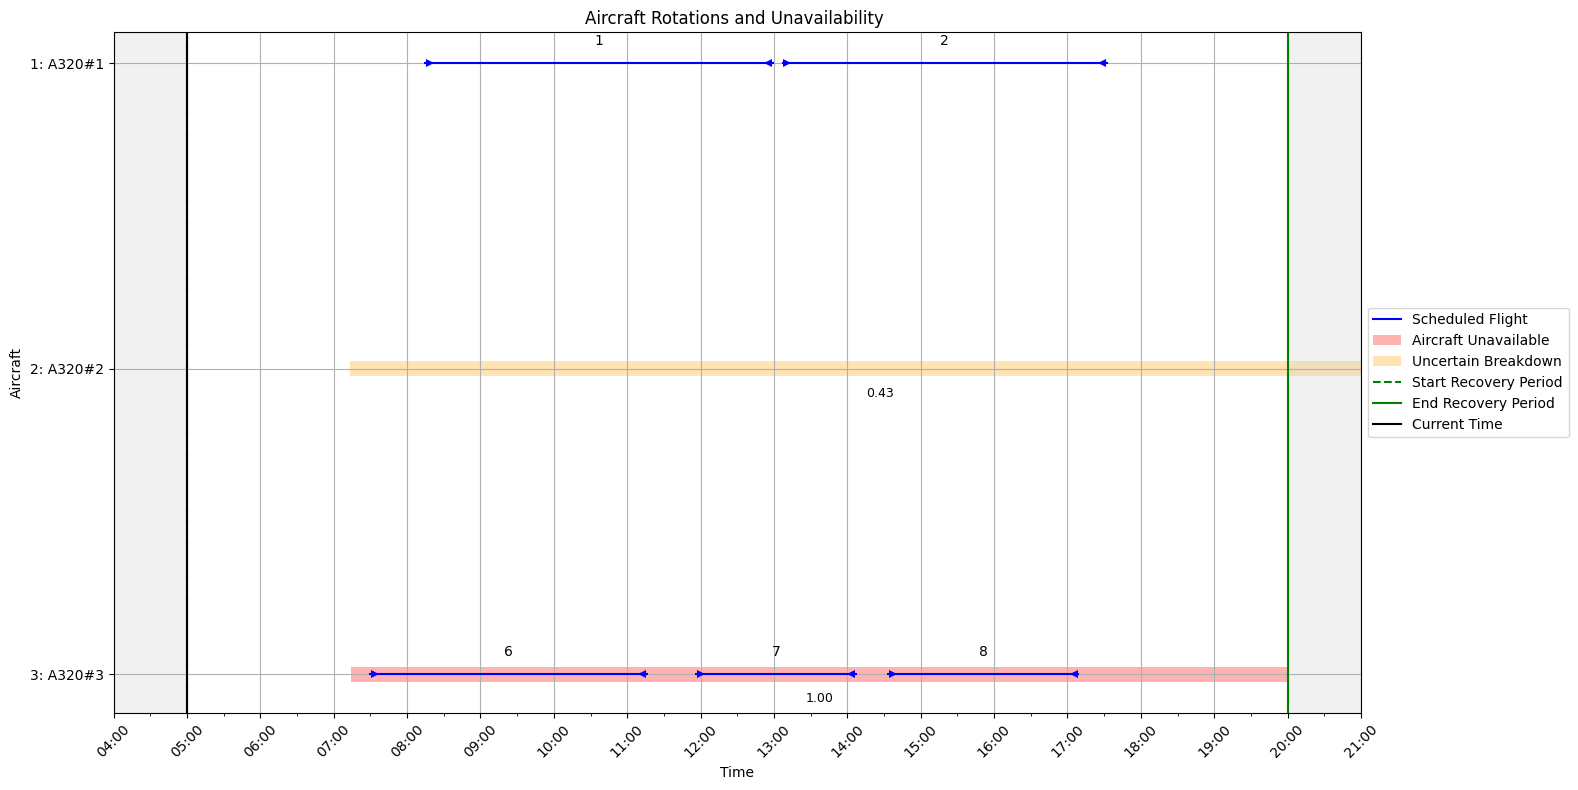

Processing scenario: Scenario_44
{'A320#1': {'StartDate': '04/09/24', 'StartTime': '08:16', 'EndDate': '05/09/24', 'EndTime': '00:38', 'Probability': 1.0}, 'A320#3': {'StartDate': '04/09/24', 'StartTime': '08:21', 'EndDate': '04/09/24', 'EndTime': '19:07', 'Probability': 0.5}}
│ Current Time       │ Time Until End     │   
│          0         │         840        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    136  1118 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     3   120   395 |     4   440   666 |     -     -     - |     -     -  

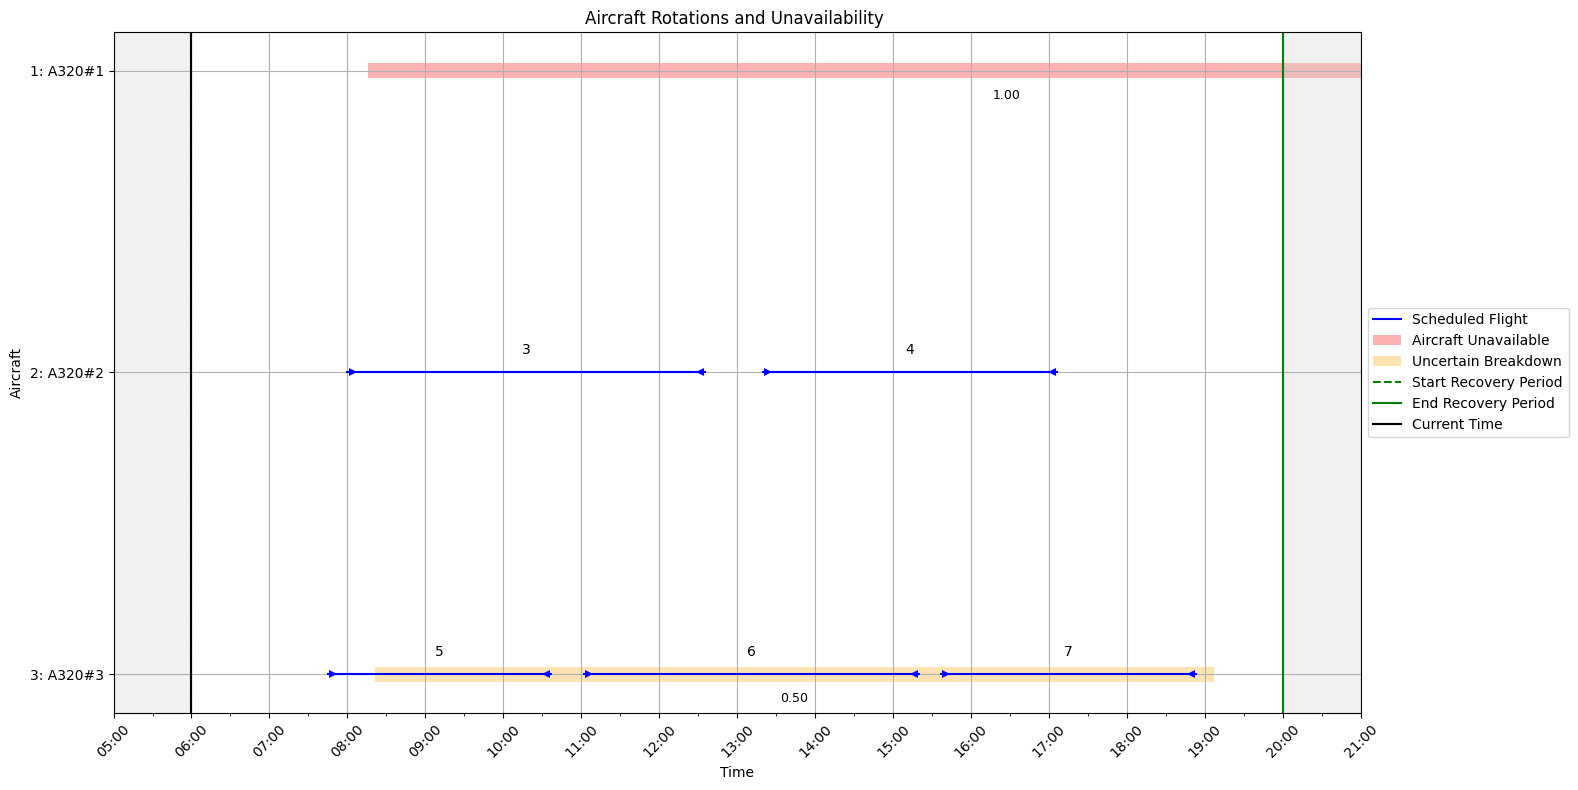

Processing scenario: Scenario_45
{'A320#1': {'StartDate': '25/09/24', 'StartTime': '08:21', 'EndDate': '25/09/24', 'EndTime': '18:00', 'Probability': 1.0}, 'A320#2': {'StartDate': '25/09/24', 'StartTime': '08:20', 'EndDate': '26/09/24', 'EndTime': '00:58', 'Probability': 0.02}}
│ Current Time       │ Time Until End     │   
│          0         │         960        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    141   720 |     1    75   370 |     2   376   532 |     3   579   764 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.02    140  1138 |     -     -     - |     -     -     - |     -     -     - |     -     - 

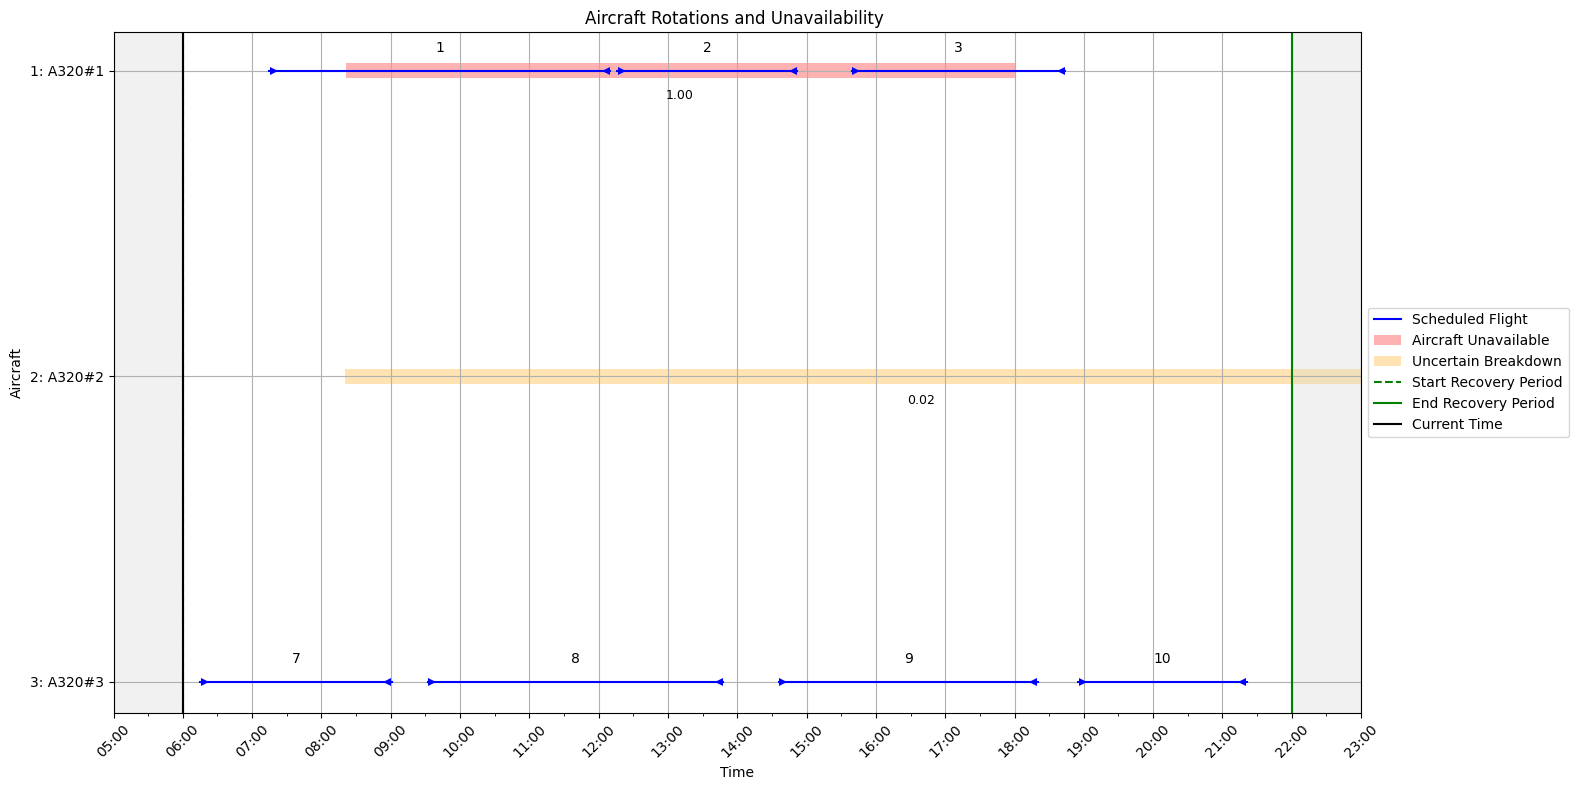

Processing scenario: Scenario_46
{'A320#3': {'StartDate': '26/09/24', 'StartTime': '08:12', 'EndDate': '26/09/24', 'EndTime': '14:38', 'Probability': 1.0}, 'A320#1': {'StartDate': '26/09/24', 'StartTime': '08:28', 'EndDate': '26/09/24', 'EndTime': '16:16', 'Probability': 0.24}}
│ Current Time       │ Time Until End     │   
│          0         │        1050        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.24    148   616 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     4   135   308 |     5   345   603 |     6   618   917 |     -     - 

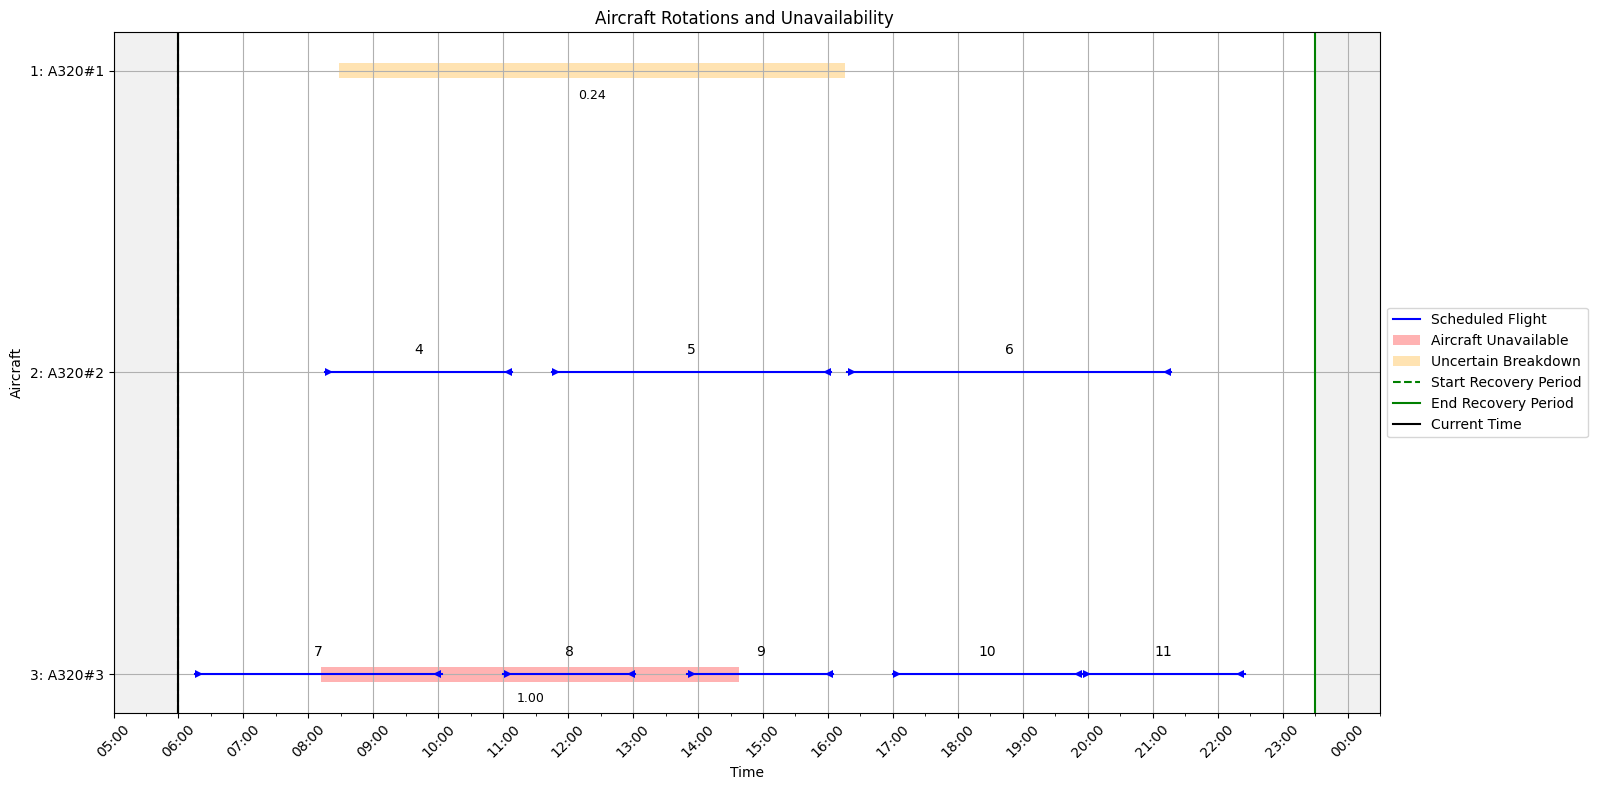

Processing scenario: Scenario_47
{'A320#3': {'StartDate': '11/09/24', 'StartTime': '08:22', 'EndDate': '11/09/24', 'EndTime': '23:50', 'Probability': 1.0}, 'A320#2': {'StartDate': '11/09/24', 'StartTime': '08:14', 'EndDate': '11/09/24', 'EndTime': '18:24', 'Probability': 0.28}}
│ Current Time       │ Time Until End     │   
│          0         │        1020        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1    90   272 |     2   294   441 |     3   496   741 |     4   788   920 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.28    134   744 |     -     -     - |     -     -     - |     -     -     - |     -     - 

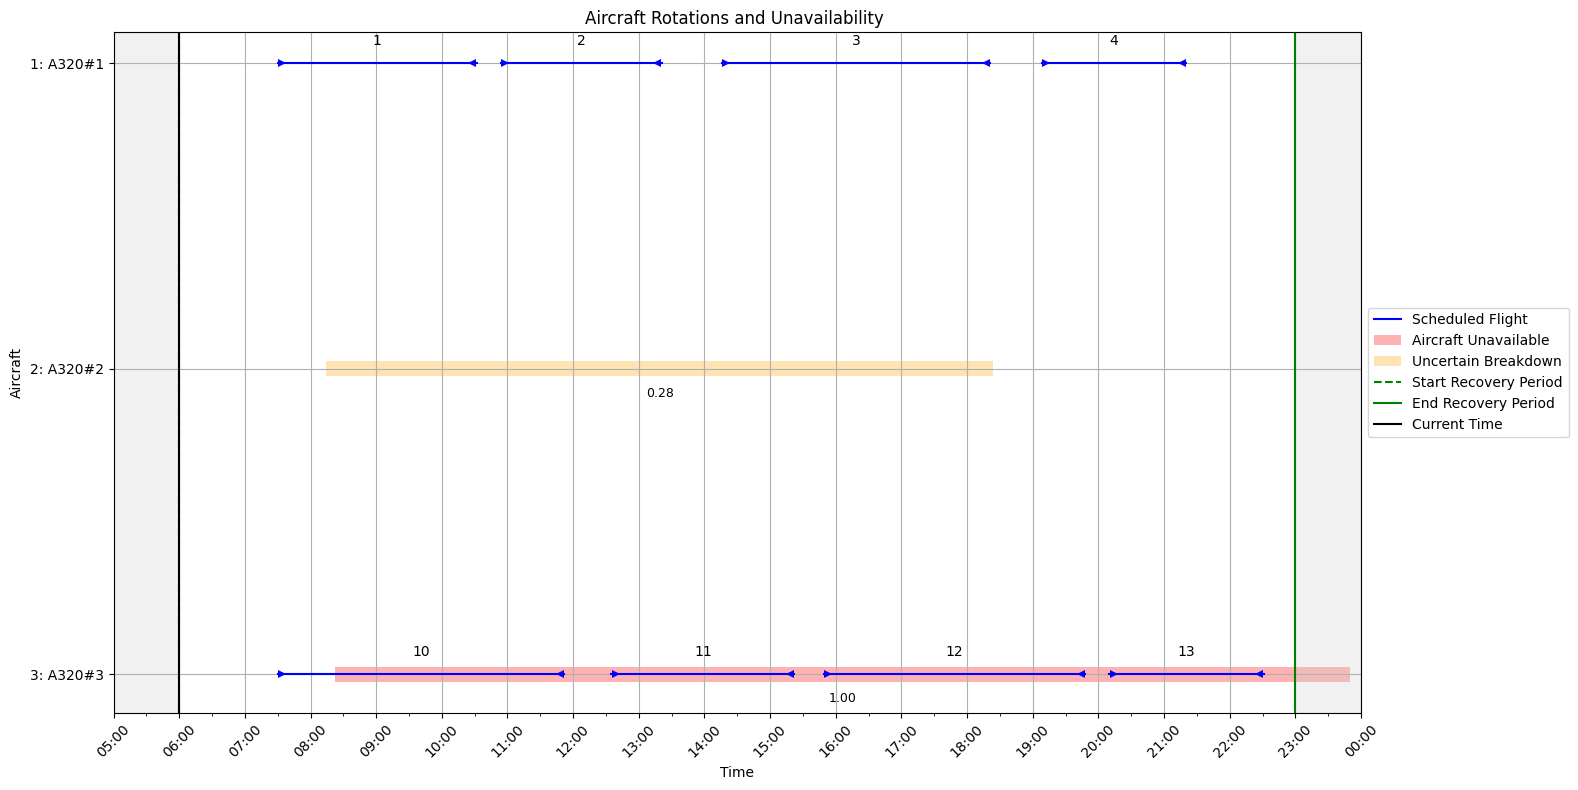

Processing scenario: Scenario_48
{'A320#3': {'StartDate': '01/09/24', 'StartTime': '08:10', 'EndDate': '01/09/24', 'EndTime': '22:11', 'Probability': 1.0}, 'A320#1': {'StartDate': '01/09/24', 'StartTime': '08:28', 'EndDate': '01/09/24', 'EndTime': '19:57', 'Probability': 0.36}}
│ Current Time       │ Time Until End     │   
│          0         │         960        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.36    148   837 |     1   135   273 |     2   297   463 |     3   482   645 |     4   647   884 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     - 

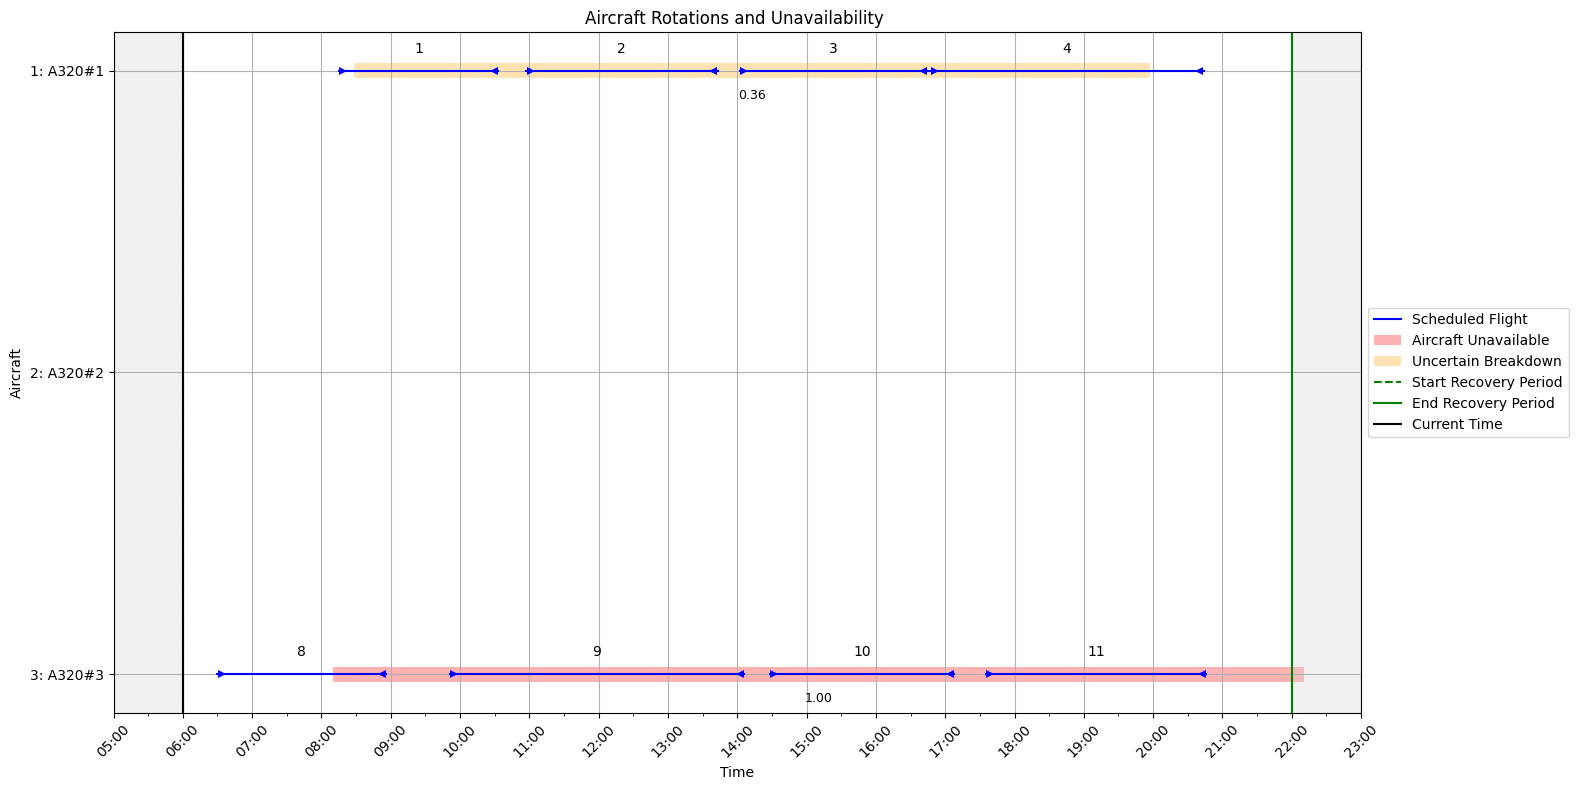

Processing scenario: Scenario_49
{'A320#2': {'StartDate': '15/09/24', 'StartTime': '07:20', 'EndDate': '15/09/24', 'EndTime': '19:58', 'Probability': 1.0}, 'A320#1': {'StartDate': '15/09/24', 'StartTime': '07:14', 'EndDate': '15/09/24', 'EndTime': '10:44', 'Probability': 0.48}}
│ Current Time       │ Time Until End     │   
│          0         │         900        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.48    134   344 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    140   898 |     3   195   473 |     4   501   624 |     -     -     - |     -     - 

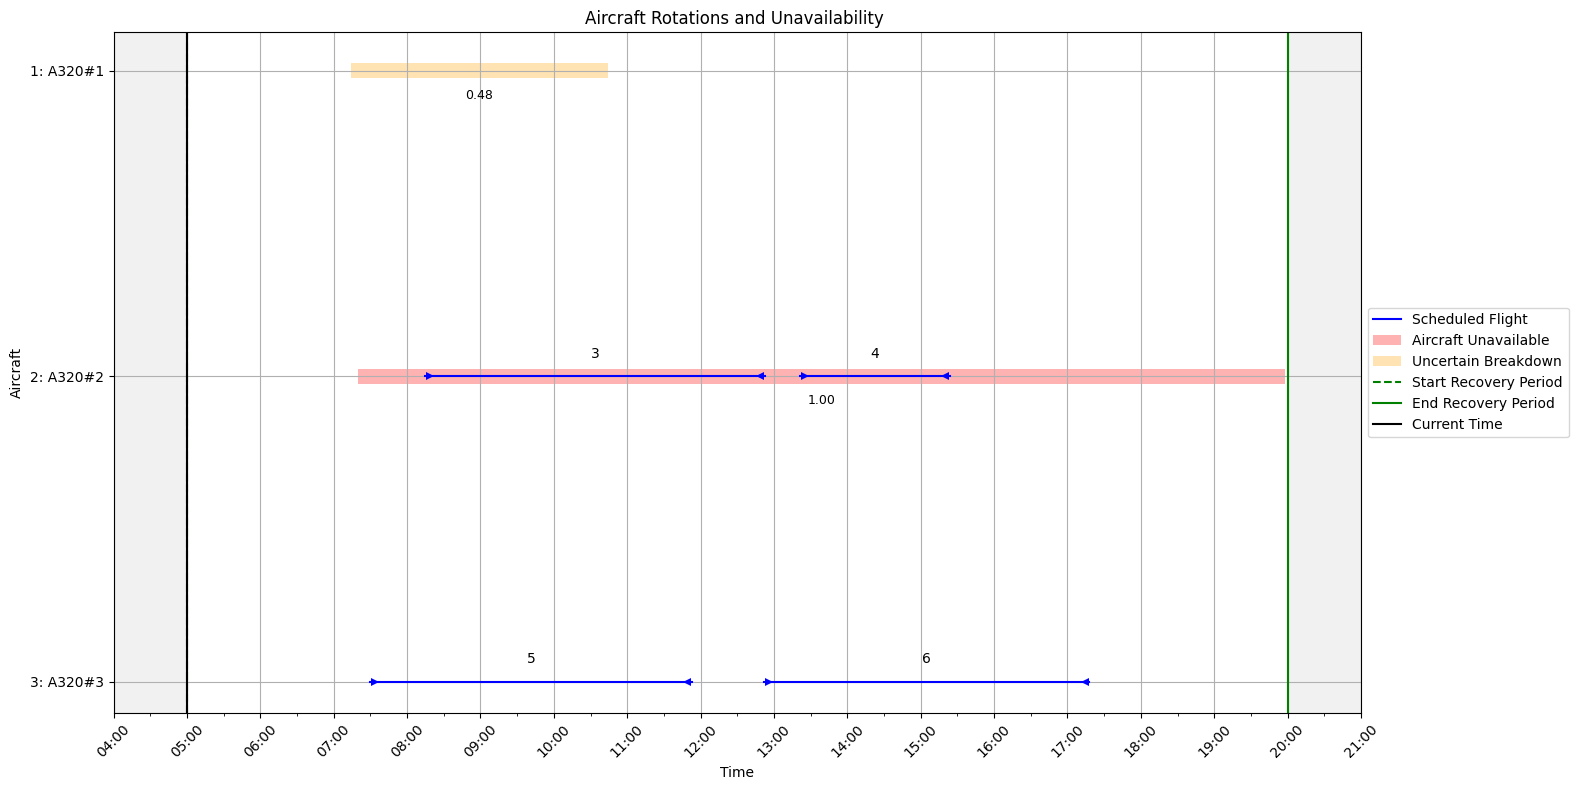

Processing scenario: Scenario_50
{'A320#3': {'StartDate': '20/09/24', 'StartTime': '07:22', 'EndDate': '20/09/24', 'EndTime': '11:39', 'Probability': 1.0}, 'A320#1': {'StartDate': '20/09/24', 'StartTime': '07:07', 'EndDate': '20/09/24', 'EndTime': '17:19', 'Probability': 0.49}}
│ Current Time       │ Time Until End     │   
│          0         │         900        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.49    127   739 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     4   225   504 |     5   520   687 |     6   691   831 |     -     - 

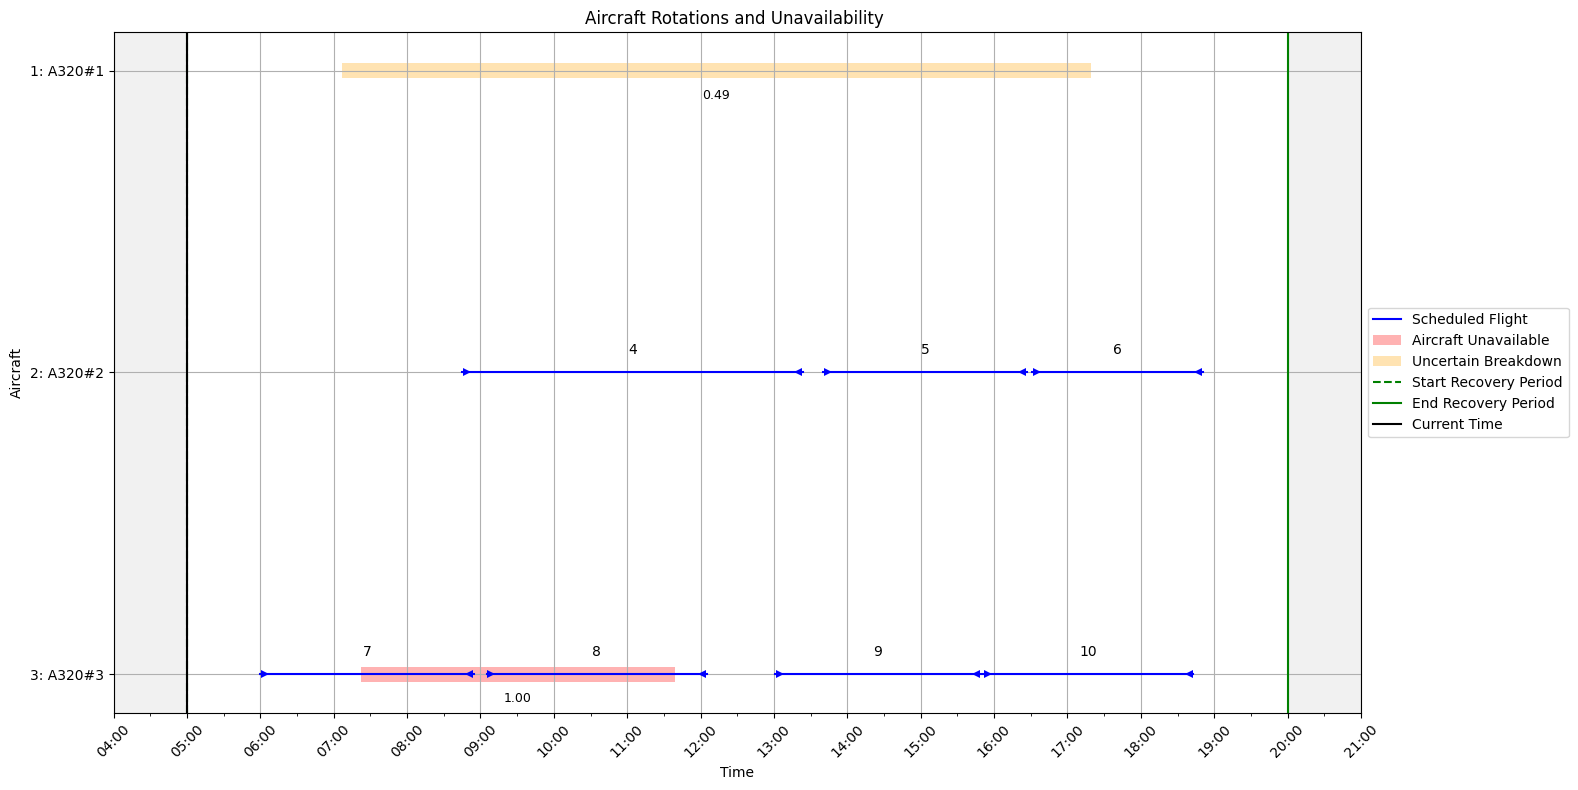

Processing scenario: Scenario_51
{'A320#1': {'StartDate': '16/09/24', 'StartTime': '08:16', 'EndDate': '16/09/24', 'EndTime': '11:15', 'Probability': 1.0}, 'A320#2': {'StartDate': '16/09/24', 'StartTime': '08:01', 'EndDate': '16/09/24', 'EndTime': '19:20', 'Probability': 0.4}}
│ Current Time       │ Time Until End     │   
│          0         │         960        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    136   315 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.40    121   800 |     4   105   353 |     5   371   583 |     6   634   856 |     -     -  

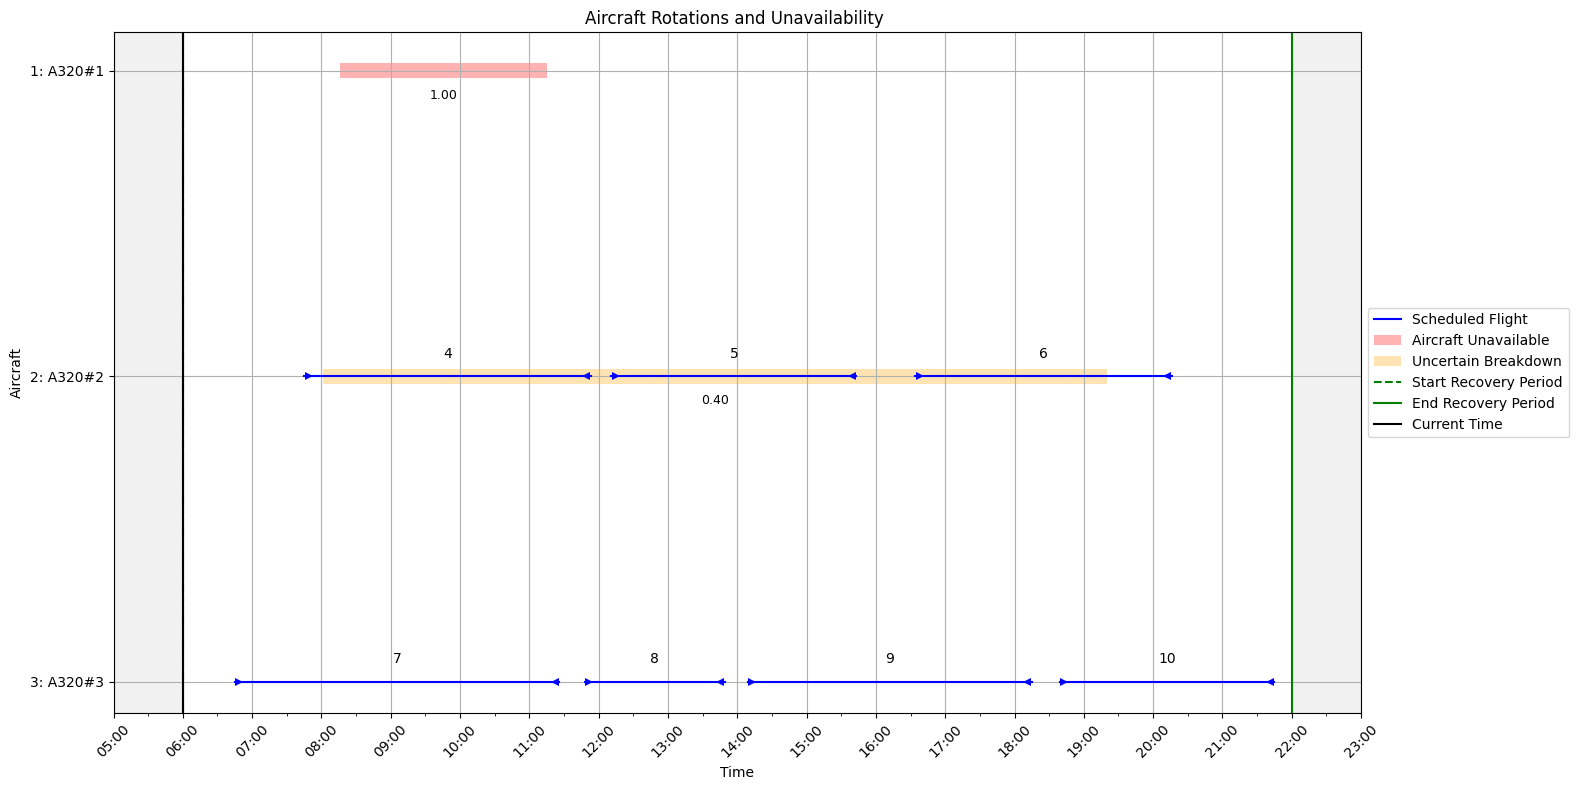

Processing scenario: Scenario_52
{'A320#1': {'StartDate': '02/09/24', 'StartTime': '07:18', 'EndDate': '02/09/24', 'EndTime': '14:33', 'Probability': 1.0}, 'A320#3': {'StartDate': '02/09/24', 'StartTime': '07:16', 'EndDate': '02/09/24', 'EndTime': '21:04', 'Probability': 0.24}}
│ Current Time       │ Time Until End     │   
│          0         │        1110        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    138   573 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     4    90   249 |     5   285   445 |     6   453   576 |     7   590 

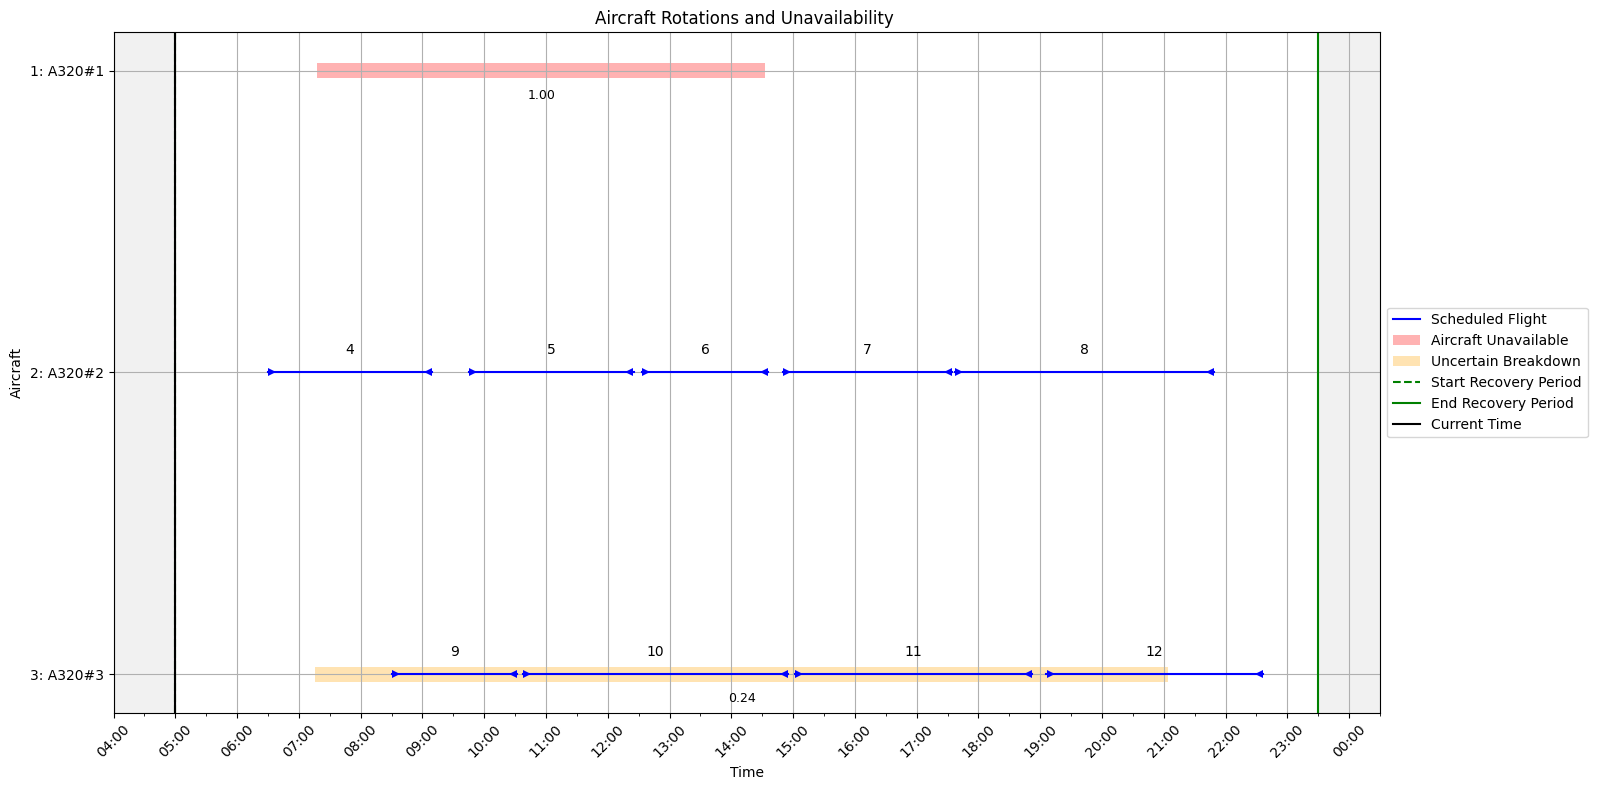

Processing scenario: Scenario_53
{'A320#2': {'StartDate': '07/09/24', 'StartTime': '07:23', 'EndDate': '07/09/24', 'EndTime': '16:58', 'Probability': 1.0}, 'A320#3': {'StartDate': '07/09/24', 'StartTime': '07:06', 'EndDate': '07/09/24', 'EndTime': '20:33', 'Probability': 0.02}}
│ Current Time       │ Time Until End     │   
│          0         │        1050        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1   195   467 |     2   490   777 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    143   718 |     3   150   435 |     4   486   607 |     5   612   891 |     -     - 

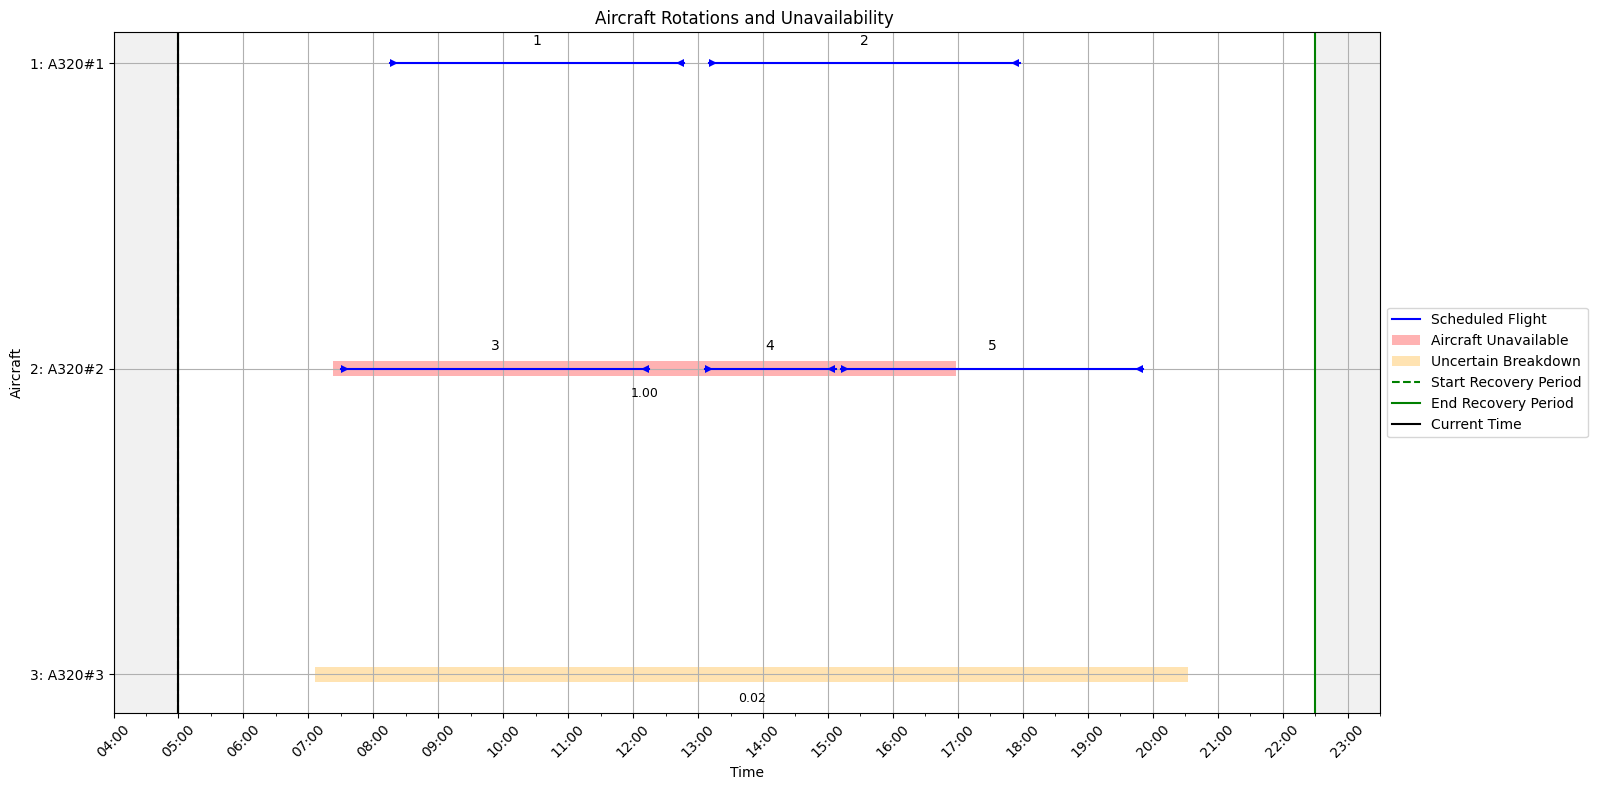

Processing scenario: Scenario_54
{'A320#1': {'StartDate': '02/09/24', 'StartTime': '09:11', 'EndDate': '02/09/24', 'EndTime': '20:37', 'Probability': 1.0}, 'A320#3': {'StartDate': '02/09/24', 'StartTime': '09:26', 'EndDate': '02/09/24', 'EndTime': '14:00', 'Probability': 0.19}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    131   817 |     1    90   346 |     2   349   600 |     3   615   822 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     4     0   125 |     5   132   374 |     6   433   727 |     7   745 

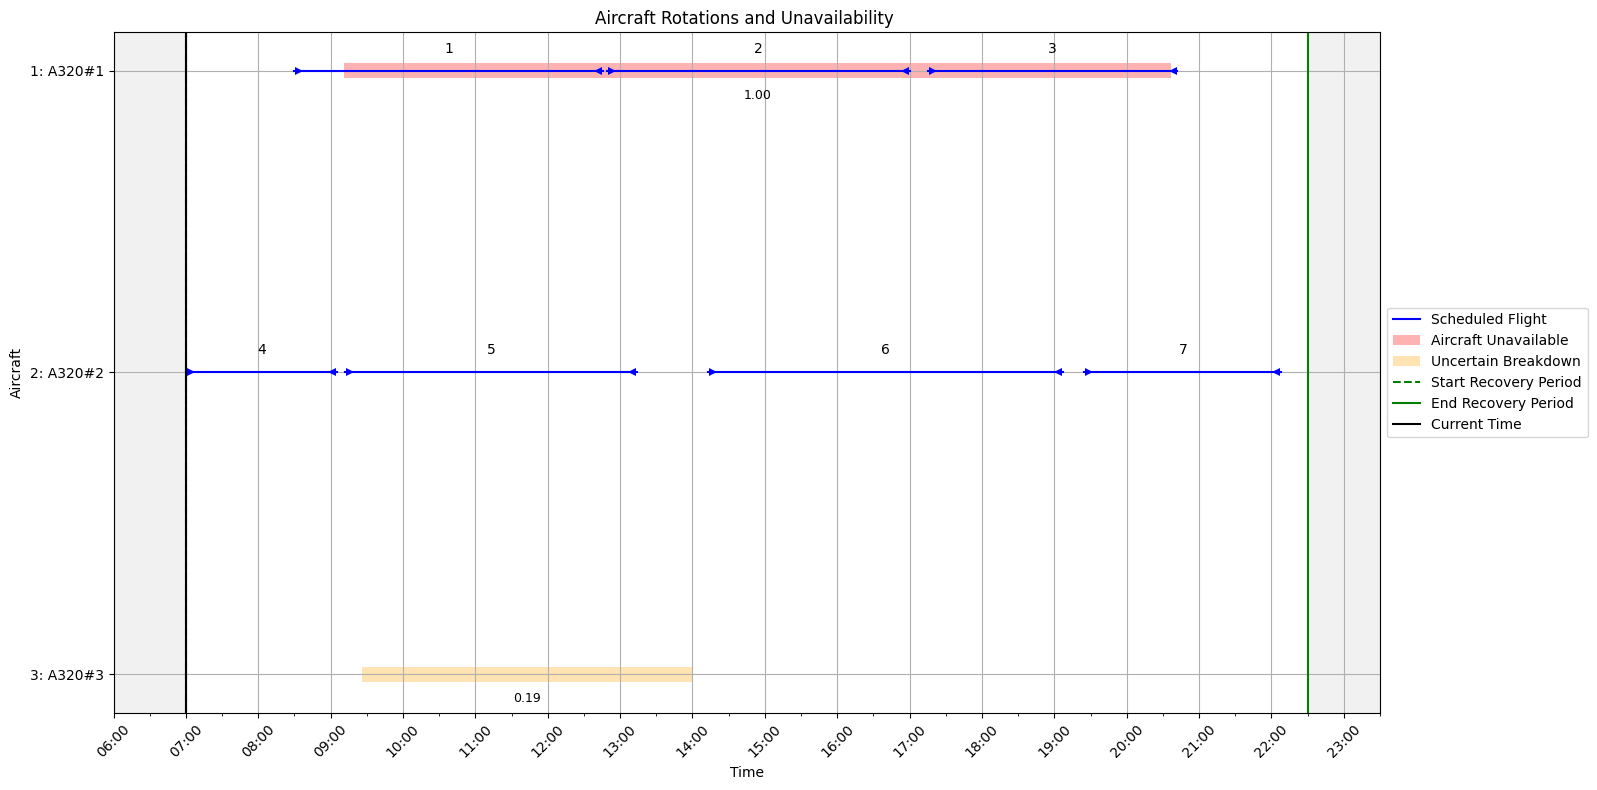

Processing scenario: Scenario_55
{'A320#3': {'StartDate': '26/09/24', 'StartTime': '08:01', 'EndDate': '26/09/24', 'EndTime': '14:56', 'Probability': 1.0}, 'A320#2': {'StartDate': '26/09/24', 'StartTime': '08:18', 'EndDate': '26/09/24', 'EndTime': '22:46', 'Probability': 0.19}}
│ Current Time       │ Time Until End     │   
│          0         │         900        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1   150   301 |     2   318   478 |     3   527   677 |     4   722   896 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.19    138  1006 |     -     -     - |     -     -     - |     -     -     - |     -     - 

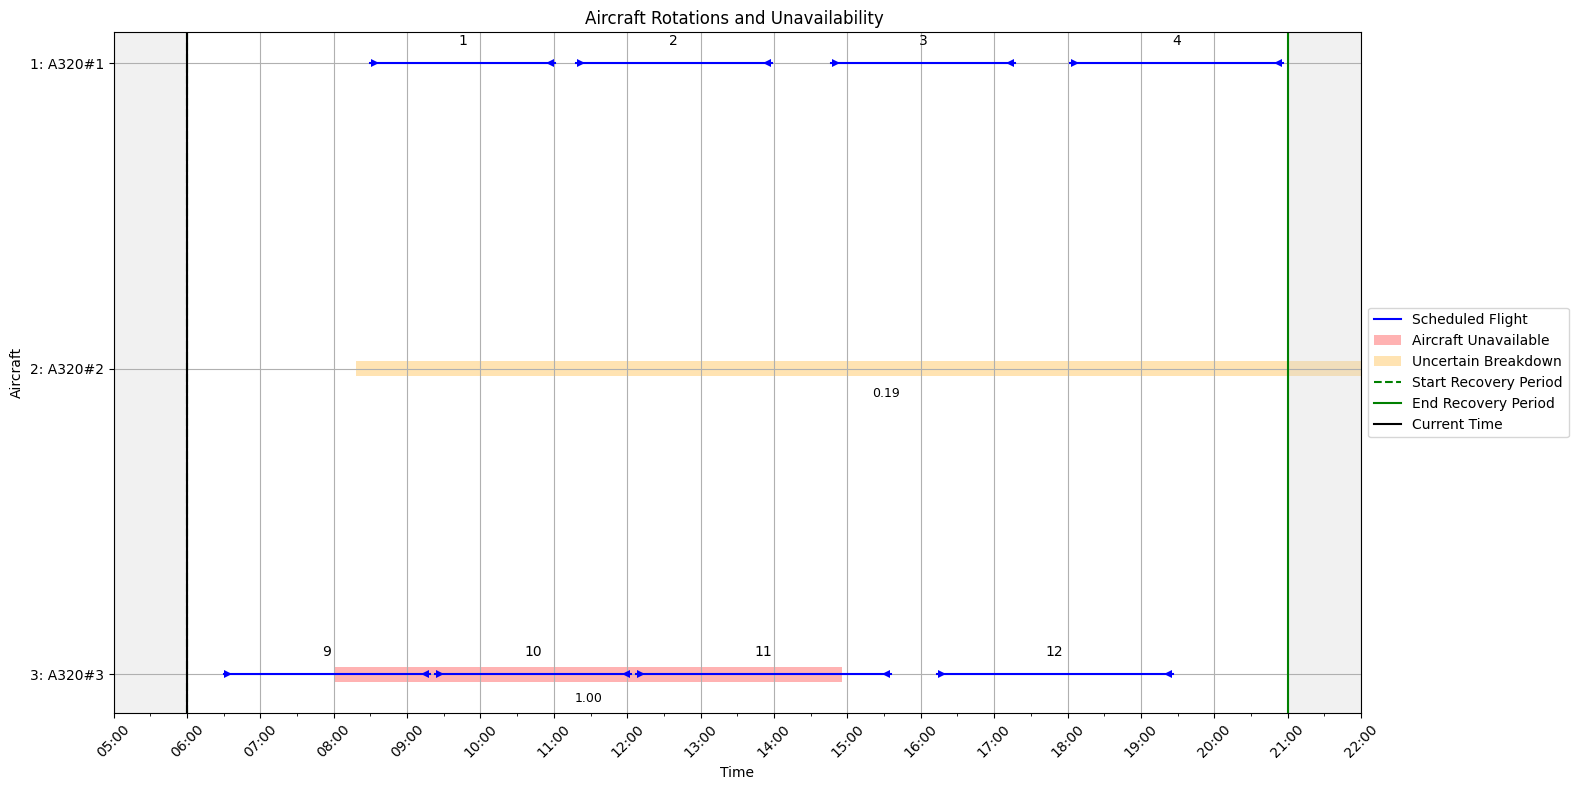

Processing scenario: Scenario_56
{'A320#1': {'StartDate': '30/09/24', 'StartTime': '09:21', 'EndDate': '01/10/24', 'EndTime': '01:52', 'Probability': 1.0}, 'A320#2': {'StartDate': '30/09/24', 'StartTime': '09:10', 'EndDate': '30/09/24', 'EndTime': '13:47', 'Probability': 0.35}}
│ Current Time       │ Time Until End     │   
│          0         │         780        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    141  1132 |     1    75   339 |     2   377   527 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.35    130   407 |     3    90   292 |     4   302   563 |     5   588   753 |     -     - 

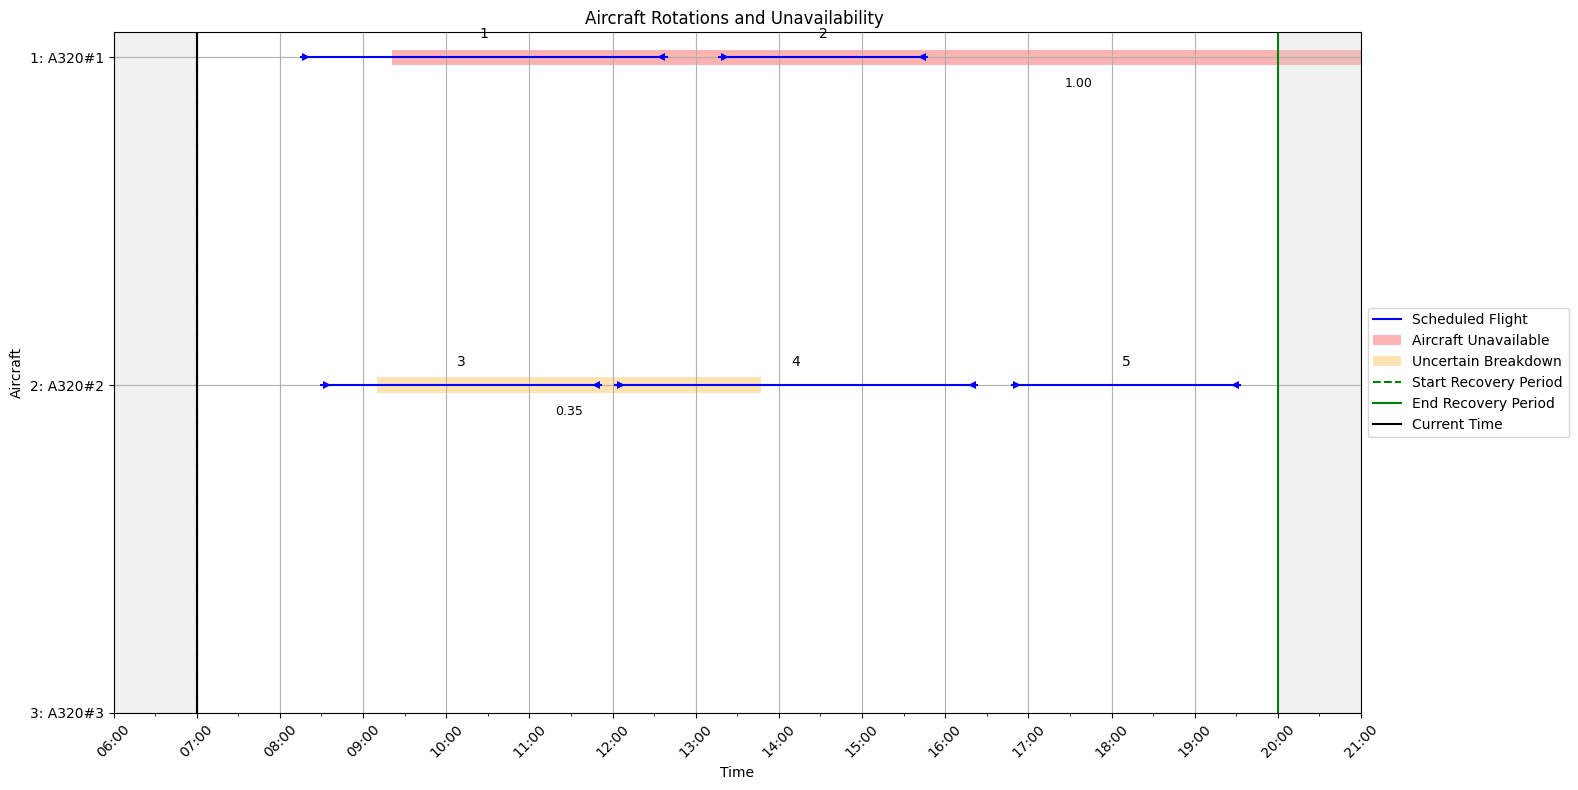

Processing scenario: Scenario_57
{'A320#1': {'StartDate': '21/09/24', 'StartTime': '09:20', 'EndDate': '21/09/24', 'EndTime': '22:18', 'Probability': 1.0}, 'A320#3': {'StartDate': '21/09/24', 'StartTime': '09:06', 'EndDate': '21/09/24', 'EndTime': '17:24', 'Probability': 0.36}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    140   918 |     1    15   307 |     2   340   618 |     3   645   928 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     - 

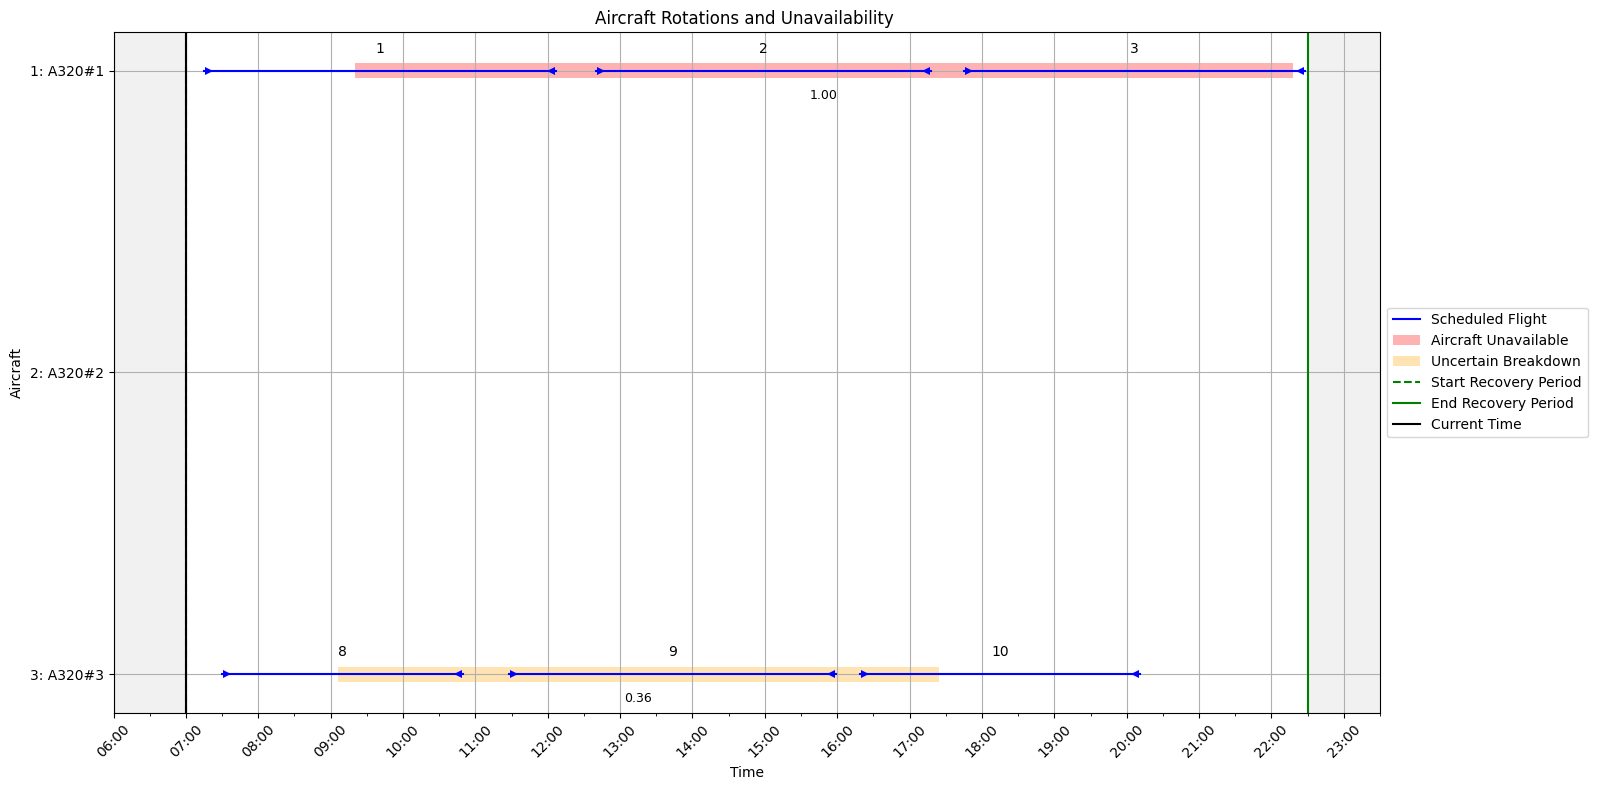

Processing scenario: Scenario_58
{'A320#2': {'StartDate': '28/09/24', 'StartTime': '08:01', 'EndDate': '28/09/24', 'EndTime': '14:09', 'Probability': 1.0}, 'A320#1': {'StartDate': '28/09/24', 'StartTime': '08:17', 'EndDate': '29/09/24', 'EndTime': '01:06', 'Probability': 0.43}}
│ Current Time       │ Time Until End     │   
│          0         │         900        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.43    137  1146 |     1     0   255 |     2   292   528 |     3   561   818 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    121   489 |     -     -     - |     -     -     - |     -     -     - |     -     - 

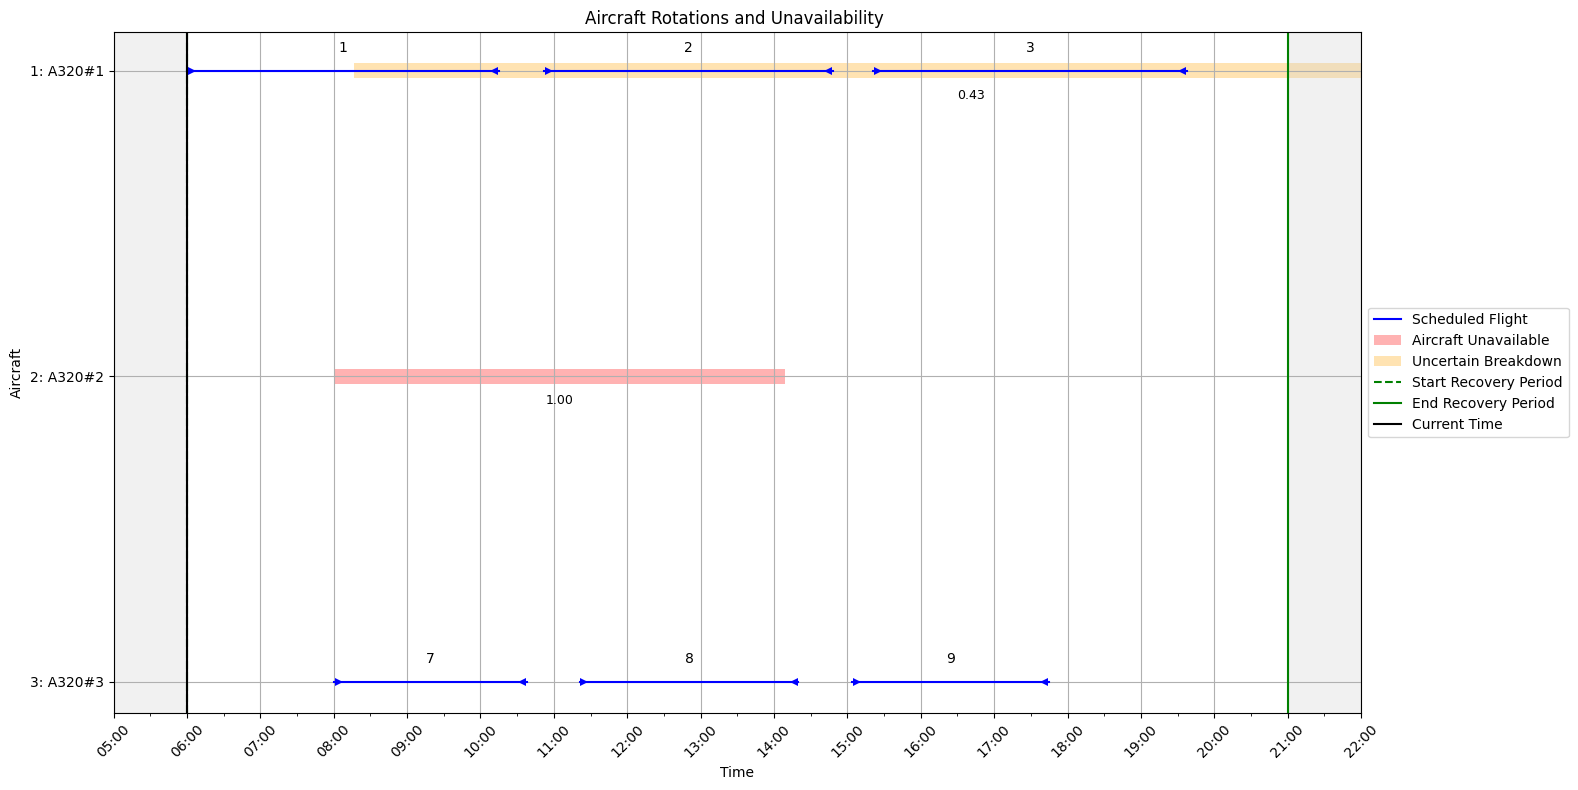

Processing scenario: Scenario_59
{'A320#1': {'StartDate': '29/09/24', 'StartTime': '09:22', 'EndDate': '29/09/24', 'EndTime': '21:40', 'Probability': 1.0}, 'A320#3': {'StartDate': '29/09/24', 'StartTime': '09:18', 'EndDate': '30/09/24', 'EndTime': '00:34', 'Probability': 0.1}}
│ Current Time       │ Time Until End     │   
│          0         │         990        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    142   880 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     4    30   253 |     5   283   406 |     6   447   699 |     7   712  

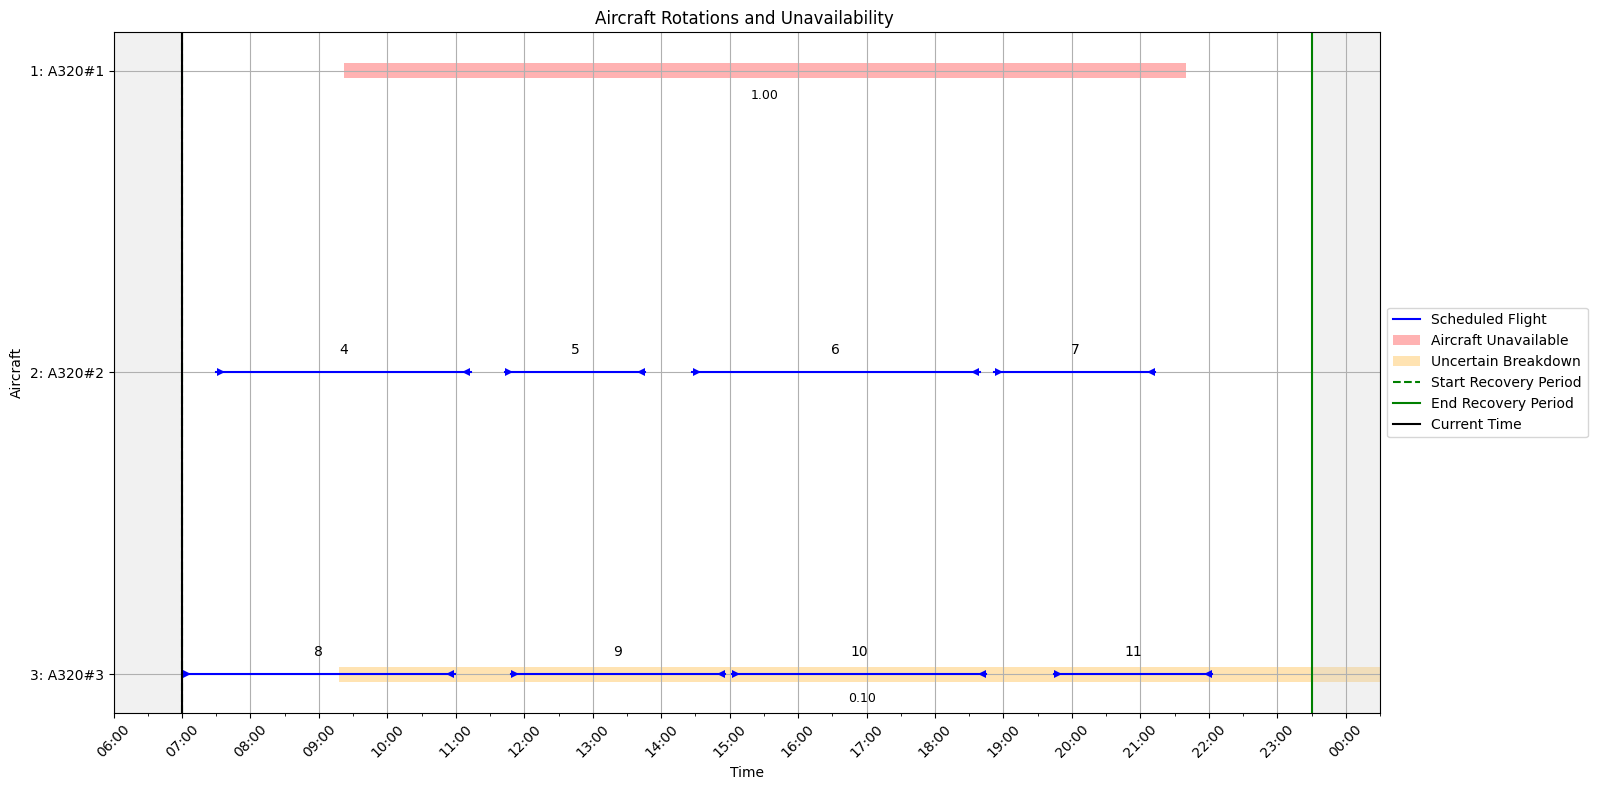

Processing scenario: Scenario_60
{'A320#3': {'StartDate': '20/09/24', 'StartTime': '08:10', 'EndDate': '20/09/24', 'EndTime': '17:47', 'Probability': 1.0}, 'A320#1': {'StartDate': '20/09/24', 'StartTime': '08:05', 'EndDate': '20/09/24', 'EndTime': '22:51', 'Probability': 0.49}}
│ Current Time       │ Time Until End     │   
│          0         │         900        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.49    125  1011 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     4   120   404 |     5   434   605 |     6   635   767 |     -     - 

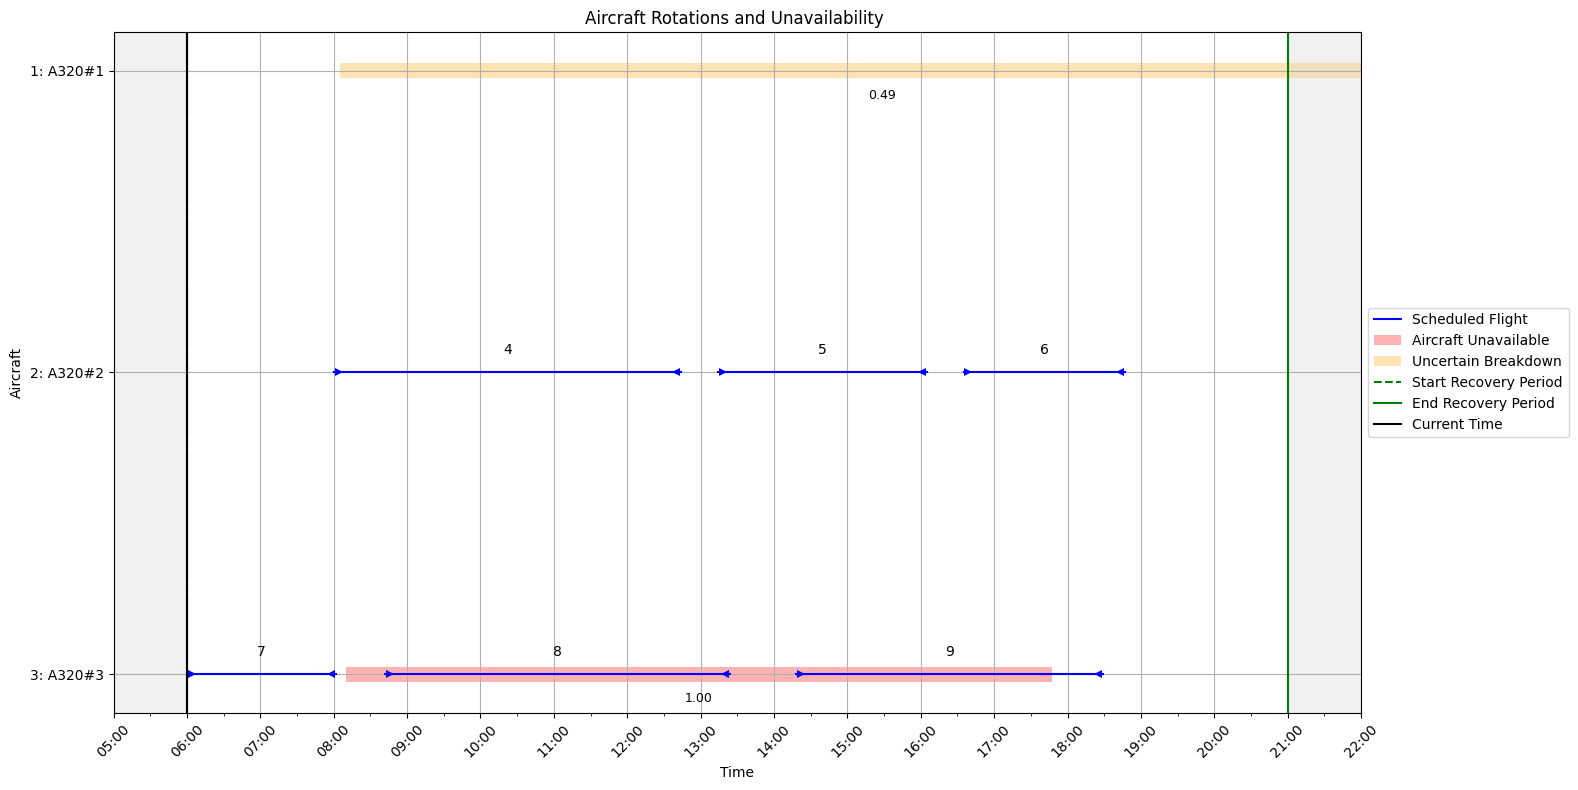

Processing scenario: Scenario_61
{'A320#3': {'StartDate': '13/09/24', 'StartTime': '08:24', 'EndDate': '13/09/24', 'EndTime': '22:55', 'Probability': 1.0}, 'A320#2': {'StartDate': '13/09/24', 'StartTime': '08:03', 'EndDate': '13/09/24', 'EndTime': '15:16', 'Probability': 0.16}}
│ Current Time       │ Time Until End     │   
│          0         │         960        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1    45   249 |     2   289   479 |     3   526   738 |     4   746   889 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.16    123   556 |     -     -     - |     -     -     - |     -     -     - |     -     - 

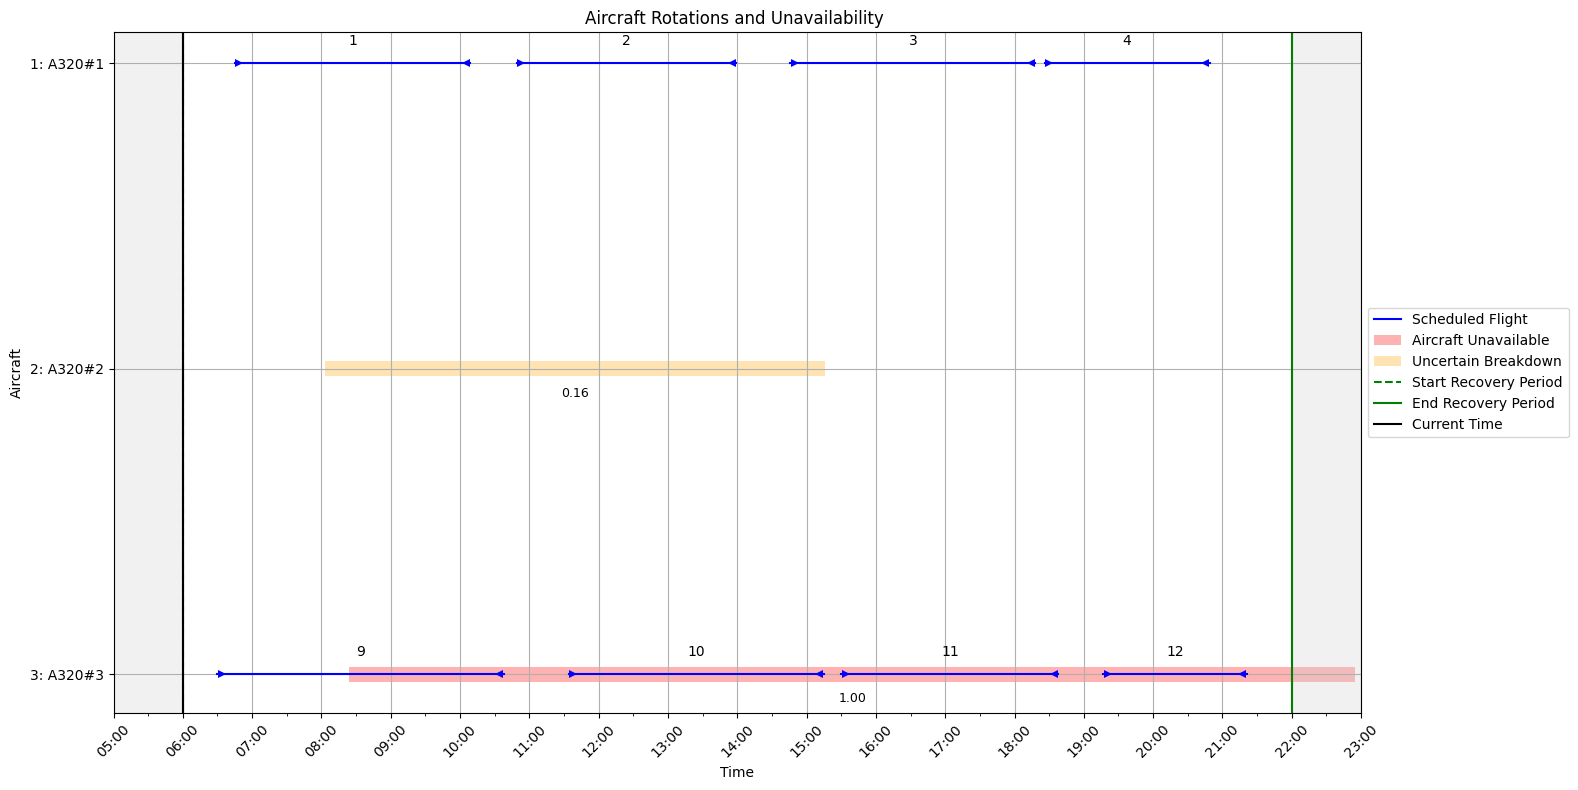

Processing scenario: Scenario_62
{'A320#2': {'StartDate': '22/09/24', 'StartTime': '07:02', 'EndDate': '22/09/24', 'EndTime': '23:16', 'Probability': 1.0}, 'A320#1': {'StartDate': '22/09/24', 'StartTime': '07:27', 'EndDate': '22/09/24', 'EndTime': '10:10', 'Probability': 0.44}}
│ Current Time       │ Time Until End     │   
│          0         │         990        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.44    147   310 |     1   150   386 |     2   431   708 |     3   764   915 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    122  1096 |     -     -     - |     -     -     - |     -     -     - |     -     - 

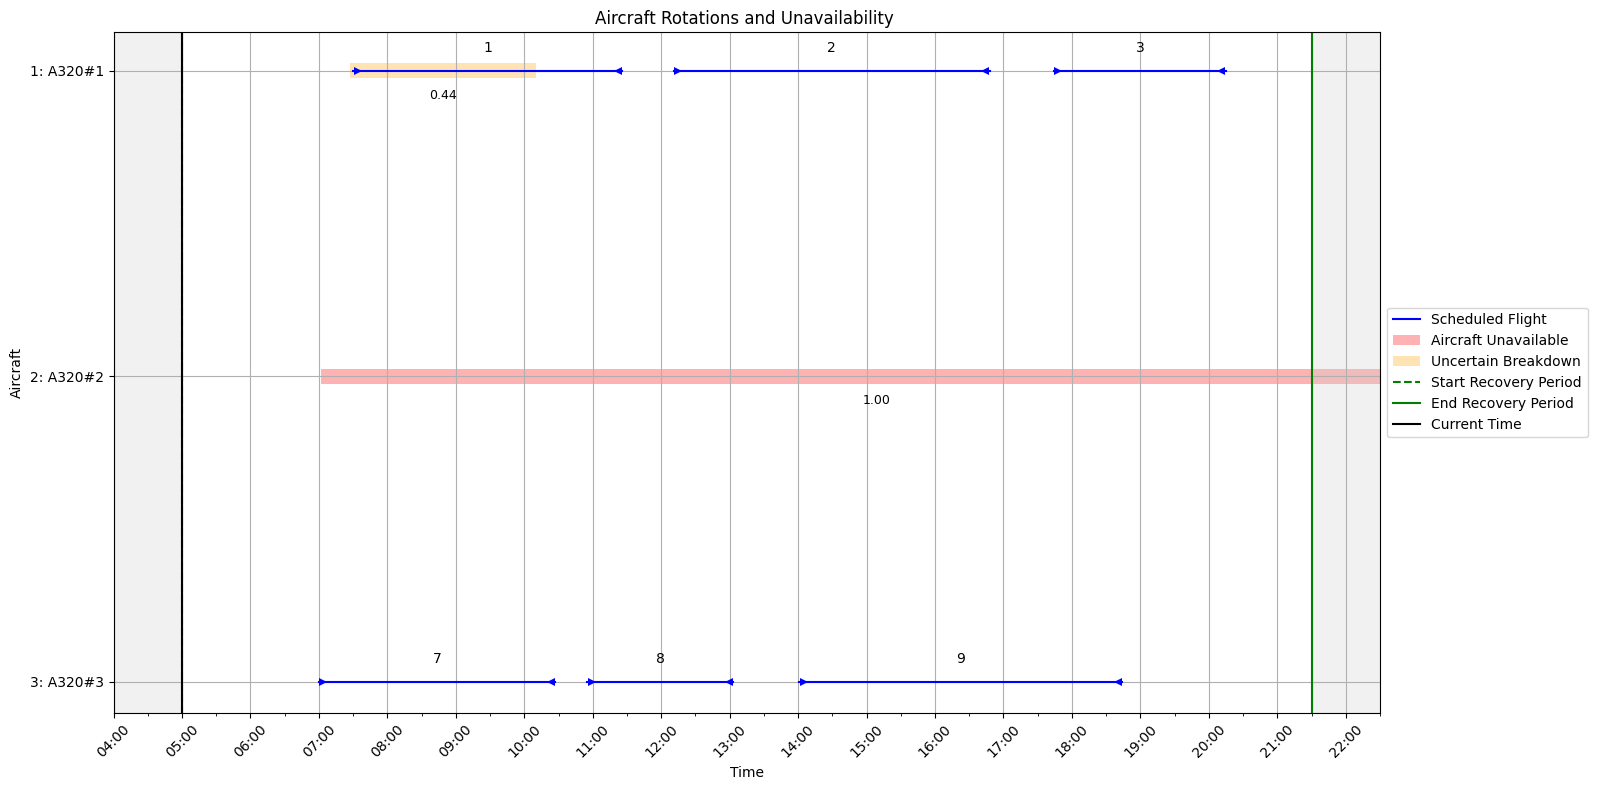

Processing scenario: Scenario_63
{'A320#3': {'StartDate': '29/09/24', 'StartTime': '08:16', 'EndDate': '29/09/24', 'EndTime': '20:57', 'Probability': 1.0}, 'A320#2': {'StartDate': '29/09/24', 'StartTime': '08:13', 'EndDate': '29/09/24', 'EndTime': '16:37', 'Probability': 0.1}}
│ Current Time       │ Time Until End     │   
│          0         │         990        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1    30   246 |     2   304   549 |     3   550   758 |     4   782   975 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.10    133   637 |     5    90   217 |     6   241   534 |     7   593   766 |     -     -  

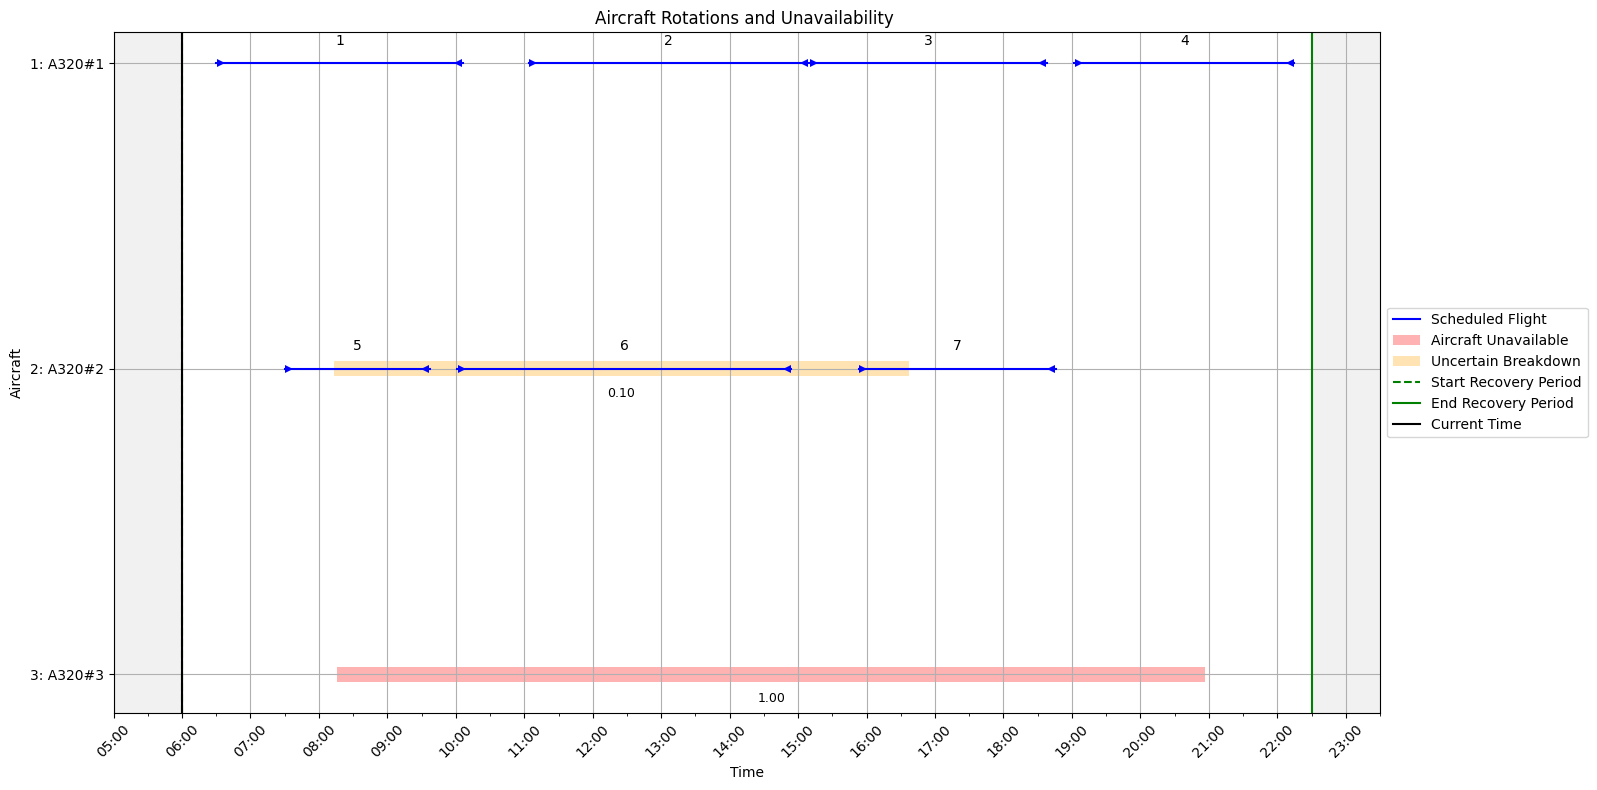

Processing scenario: Scenario_64
{'A320#2': {'StartDate': '14/09/24', 'StartTime': '09:30', 'EndDate': '14/09/24', 'EndTime': '13:42', 'Probability': 1.0}, 'A320#1': {'StartDate': '14/09/24', 'StartTime': '09:02', 'EndDate': '14/09/24', 'EndTime': '21:46', 'Probability': 0.16}}
│ Current Time       │ Time Until End     │   
│          0         │         990        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.16    122   886 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    150   402 |     5    60   212 |     6   234   513 |     7   565   806 |     -     - 

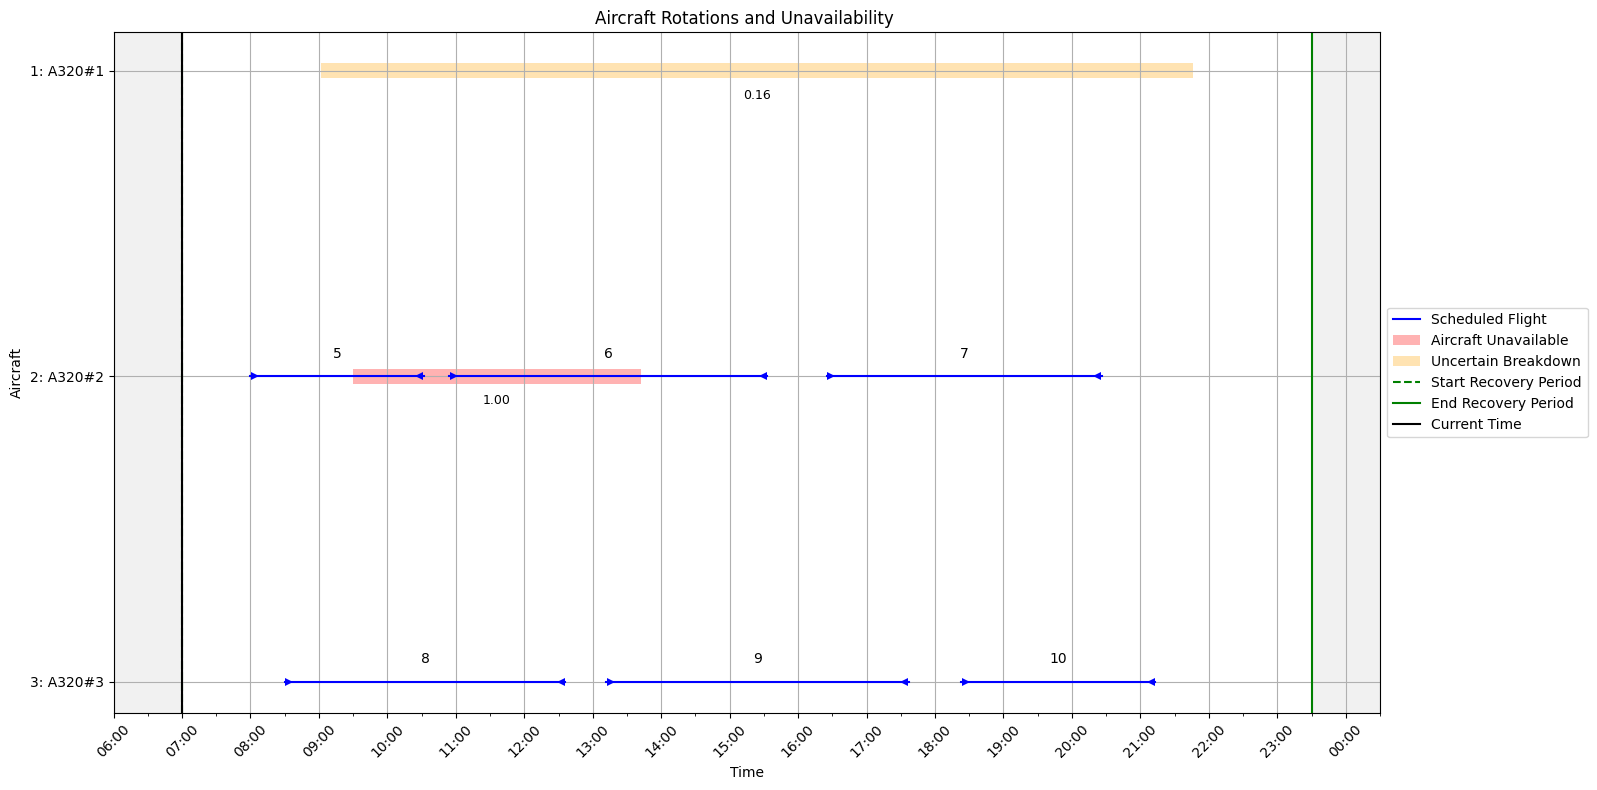

Processing scenario: Scenario_65
{'A320#2': {'StartDate': '14/09/24', 'StartTime': '09:17', 'EndDate': '14/09/24', 'EndTime': '16:18', 'Probability': 1.0}, 'A320#1': {'StartDate': '14/09/24', 'StartTime': '09:11', 'EndDate': '14/09/24', 'EndTime': '11:20', 'Probability': 0.11}}
│ Current Time       │ Time Until End     │   
│          0         │         960        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.11    131   260 |     1    45   296 |     2   303   582 |     3   640   792 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    137   558 |     4    75   261 |     5   302   531 |     6   548   703 |     -     - 

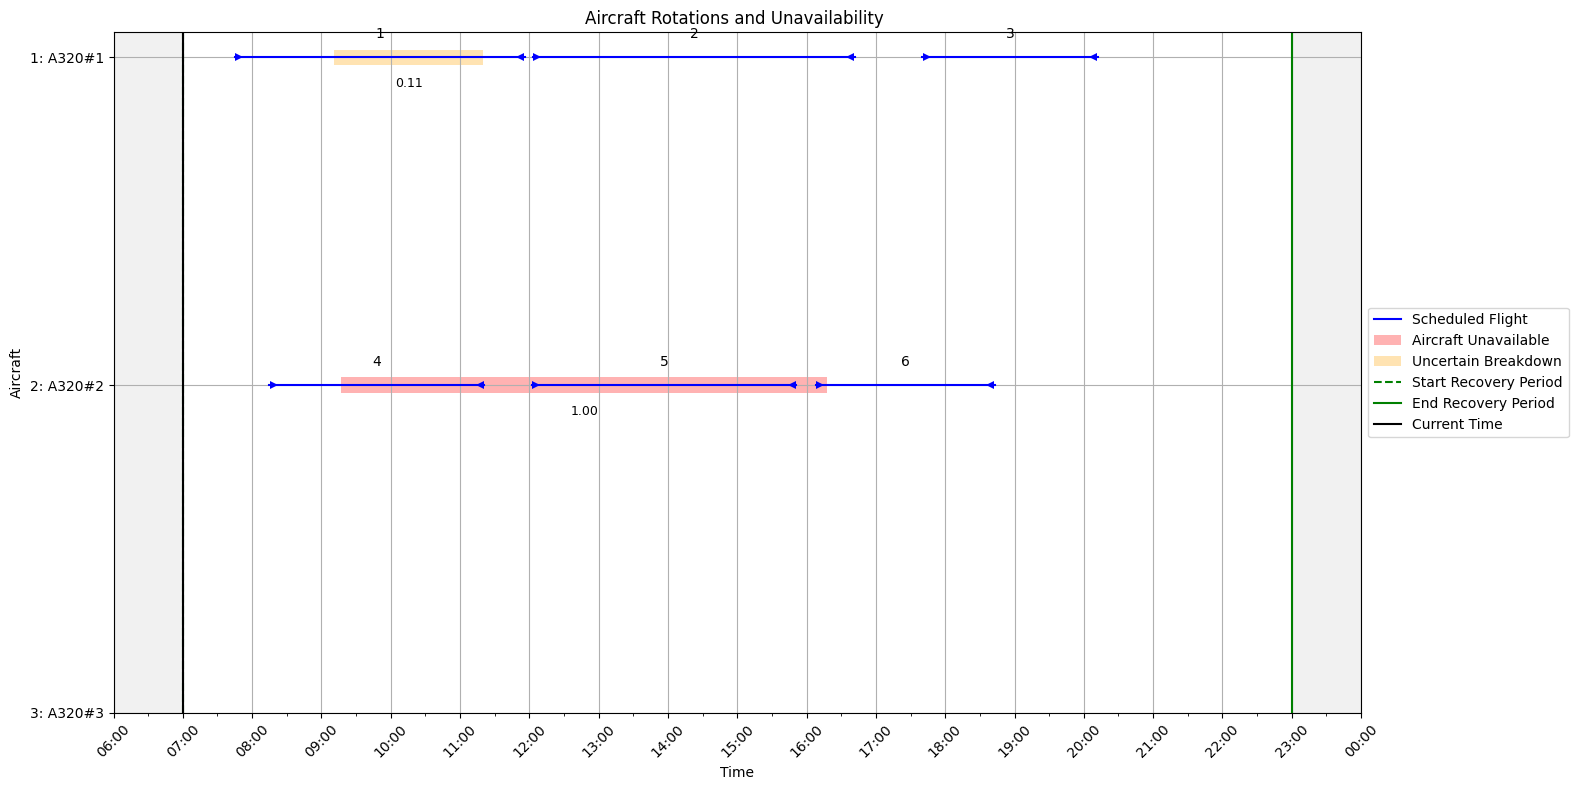

Processing scenario: Scenario_66
{'A320#3': {'StartDate': '06/09/24', 'StartTime': '09:19', 'EndDate': '06/09/24', 'EndTime': '19:56', 'Probability': 1.0}, 'A320#1': {'StartDate': '06/09/24', 'StartTime': '09:21', 'EndDate': '06/09/24', 'EndTime': '15:42', 'Probability': 0.47}}
│ Current Time       │ Time Until End     │   
│          0         │         960        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.47    141   522 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     5    30   308 |     6   347   573 |     7   613   753 |     8   761 

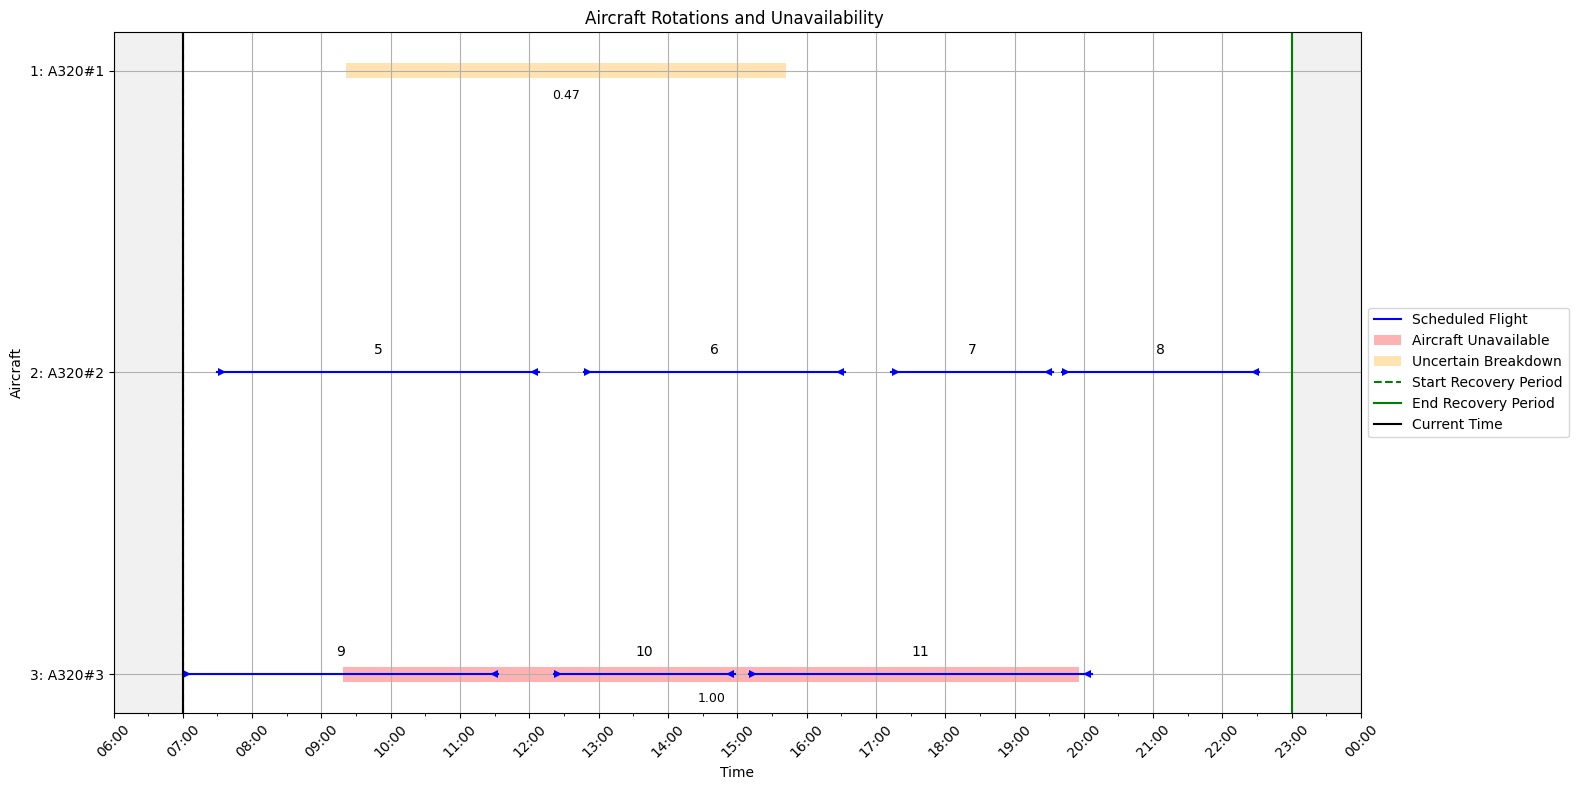

Processing scenario: Scenario_67
{'A320#1': {'StartDate': '06/09/24', 'StartTime': '08:17', 'EndDate': '06/09/24', 'EndTime': '17:40', 'Probability': 1.0}, 'A320#3': {'StartDate': '06/09/24', 'StartTime': '08:09', 'EndDate': '06/09/24', 'EndTime': '21:43', 'Probability': 0.17}}
│ Current Time       │ Time Until End     │   
│          0         │         960        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    137   700 |     1     0   129 |     2   182   348 |     3   394   608 |     4   658   905 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     5   105   288 |     6   343   490 |     7   511   660 |     8   701 

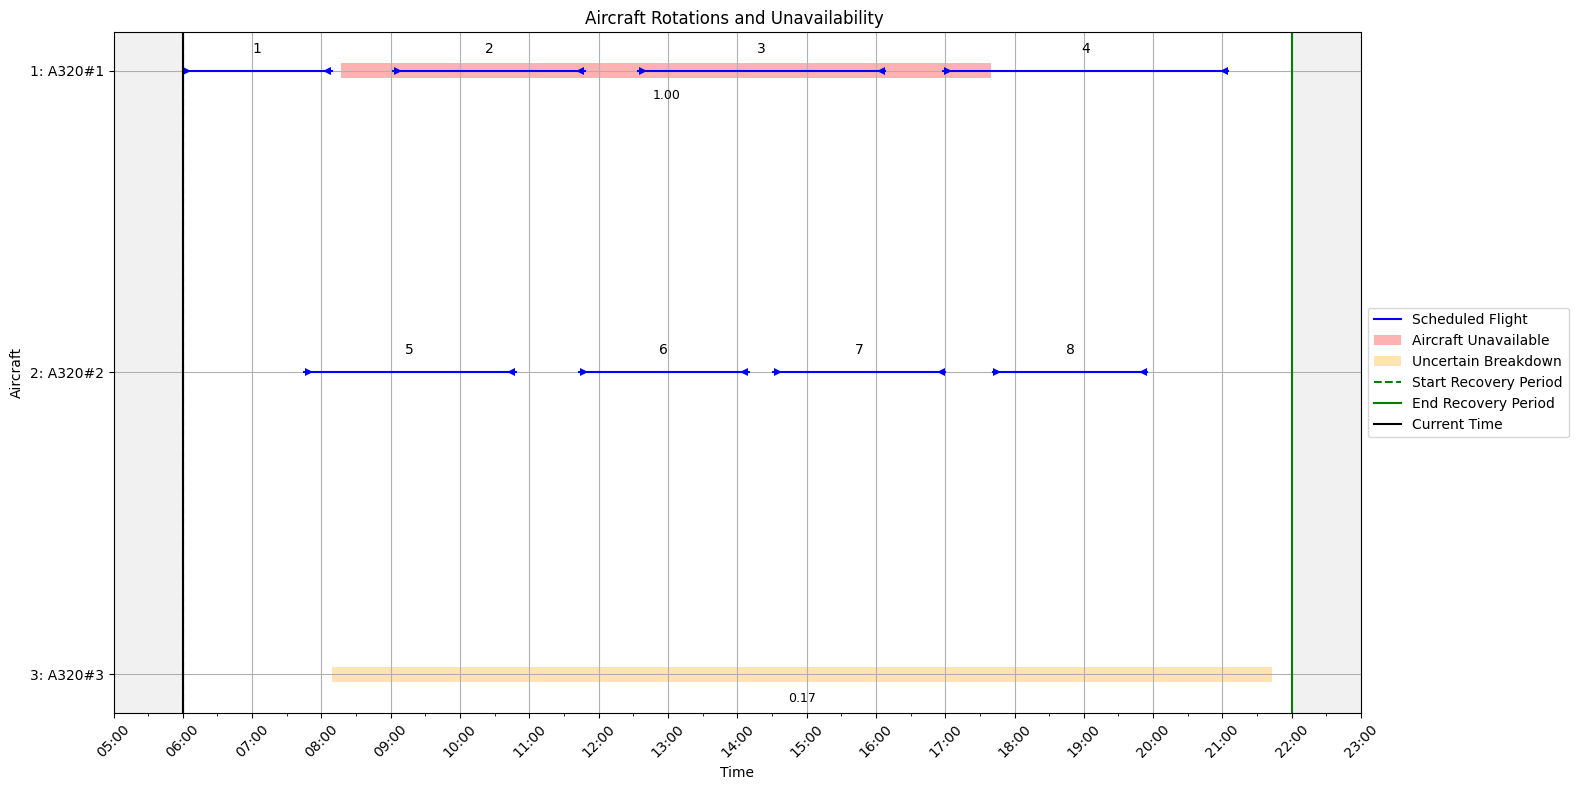

Processing scenario: Scenario_68
{'A320#3': {'StartDate': '18/09/24', 'StartTime': '08:08', 'EndDate': '18/09/24', 'EndTime': '15:28', 'Probability': 1.0}, 'A320#2': {'StartDate': '18/09/24', 'StartTime': '08:29', 'EndDate': '18/09/24', 'EndTime': '17:23', 'Probability': 0.14}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.14    149   683 |     4    75   317 |     5   369   633 |     6   644   918 |     -     - 

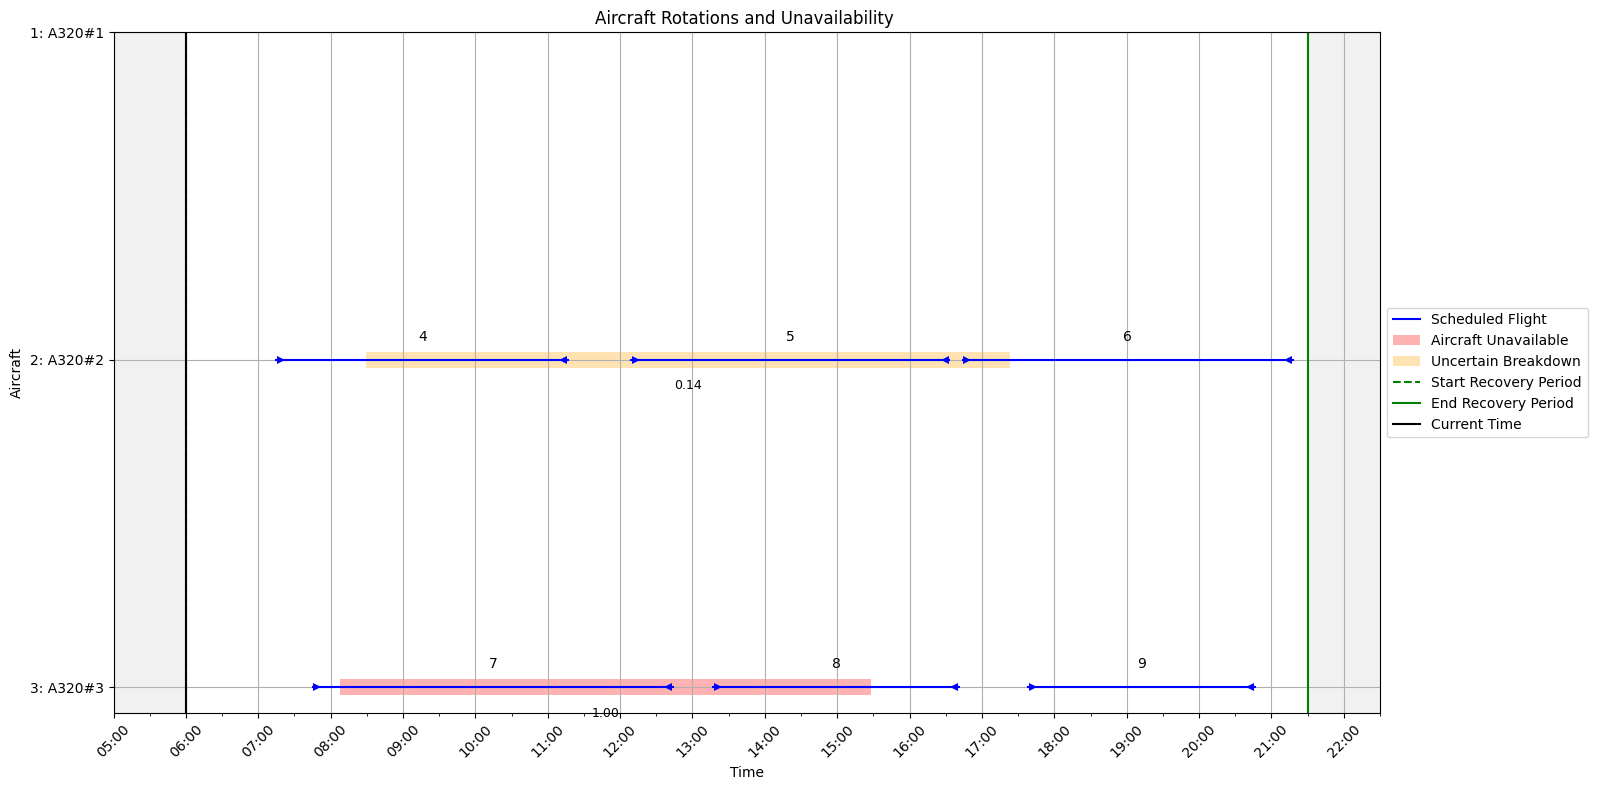

Processing scenario: Scenario_69
{'A320#3': {'StartDate': '17/09/24', 'StartTime': '09:11', 'EndDate': '17/09/24', 'EndTime': '22:52', 'Probability': 1.0}, 'A320#1': {'StartDate': '17/09/24', 'StartTime': '09:05', 'EndDate': '17/09/24', 'EndTime': '15:02', 'Probability': 0.04}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.04    125   482 |     1    60   286 |     2   321   466 |     3   476   710 |     4   715   896 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     5    75   220 |     6   273   449 |     7   463   759 |     -     - 

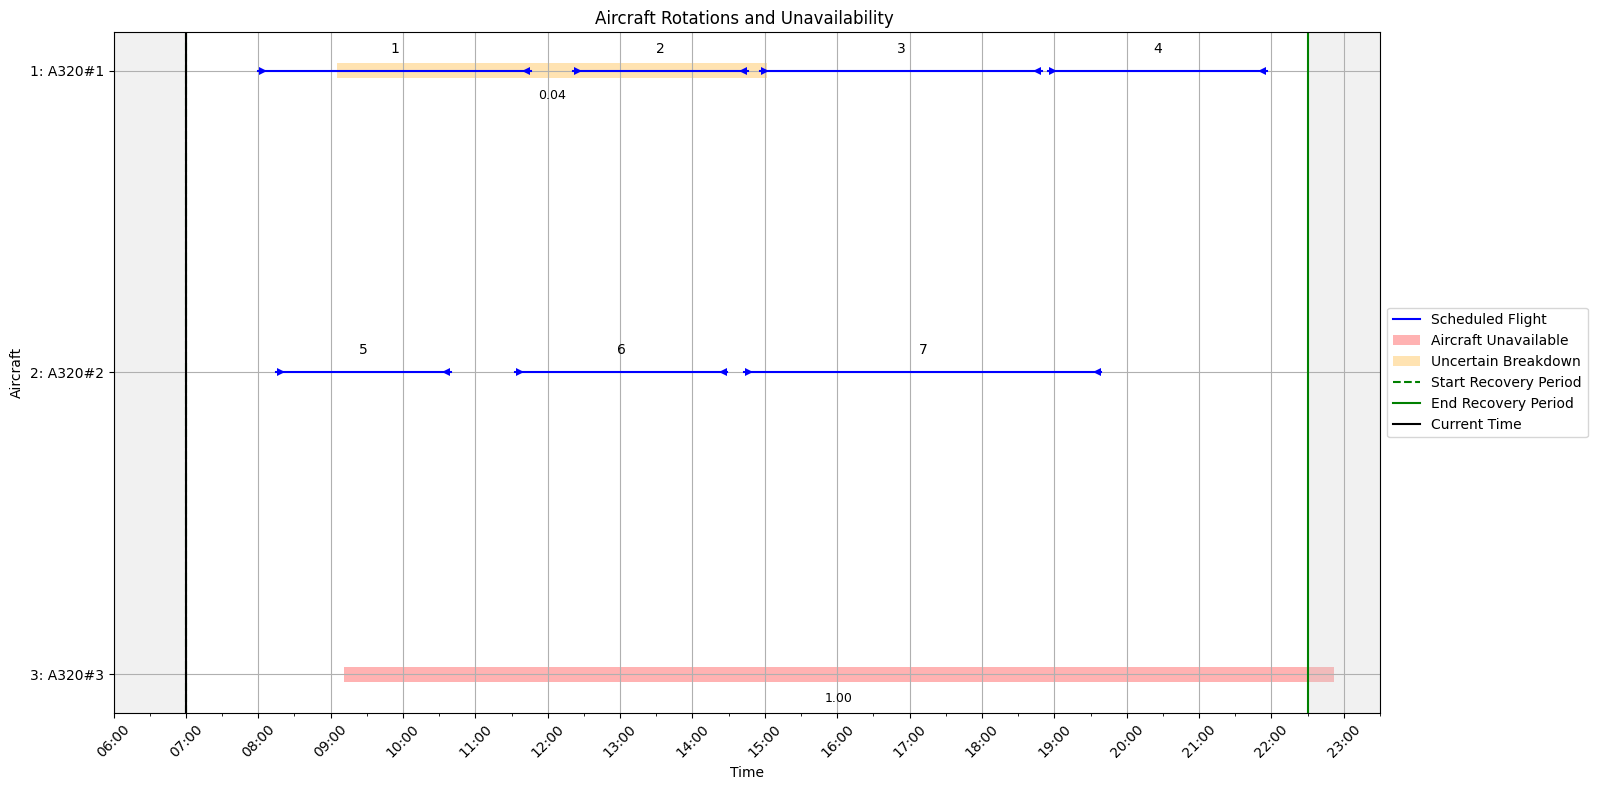

Processing scenario: Scenario_70
{'A320#2': {'StartDate': '27/09/24', 'StartTime': '07:21', 'EndDate': '27/09/24', 'EndTime': '22:14', 'Probability': 1.0}, 'A320#3': {'StartDate': '27/09/24', 'StartTime': '07:23', 'EndDate': '27/09/24', 'EndTime': '12:02', 'Probability': 0.3}}
│ Current Time       │ Time Until End     │   
│          0         │         960        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    141  1034 |     4    75   344 |     5   347   554 |     6   607   884 |     -     -  

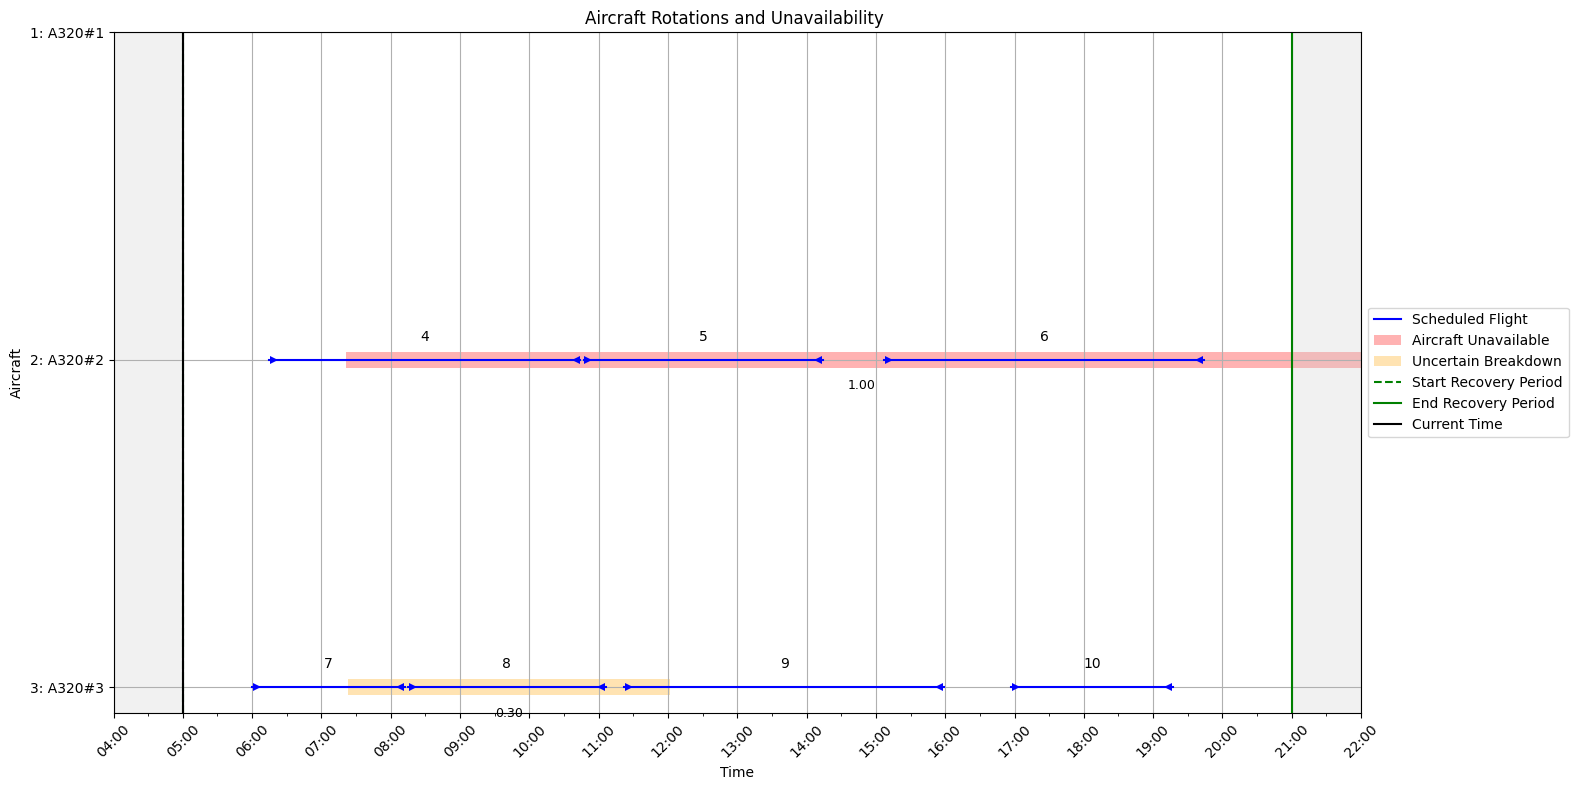

Processing scenario: Scenario_71
{'A320#3': {'StartDate': '01/09/24', 'StartTime': '07:03', 'EndDate': '01/09/24', 'EndTime': '19:50', 'Probability': 1.0}, 'A320#1': {'StartDate': '01/09/24', 'StartTime': '07:14', 'EndDate': '01/09/24', 'EndTime': '14:43', 'Probability': 0.26}}
│ Current Time       │ Time Until End     │   
│          0         │        1080        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.26    134   583 |     1   225   419 |     2   444   731 |     3   785  1047 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     4    60   341 |     5   394   682 |     6   736   893 |     -     - 

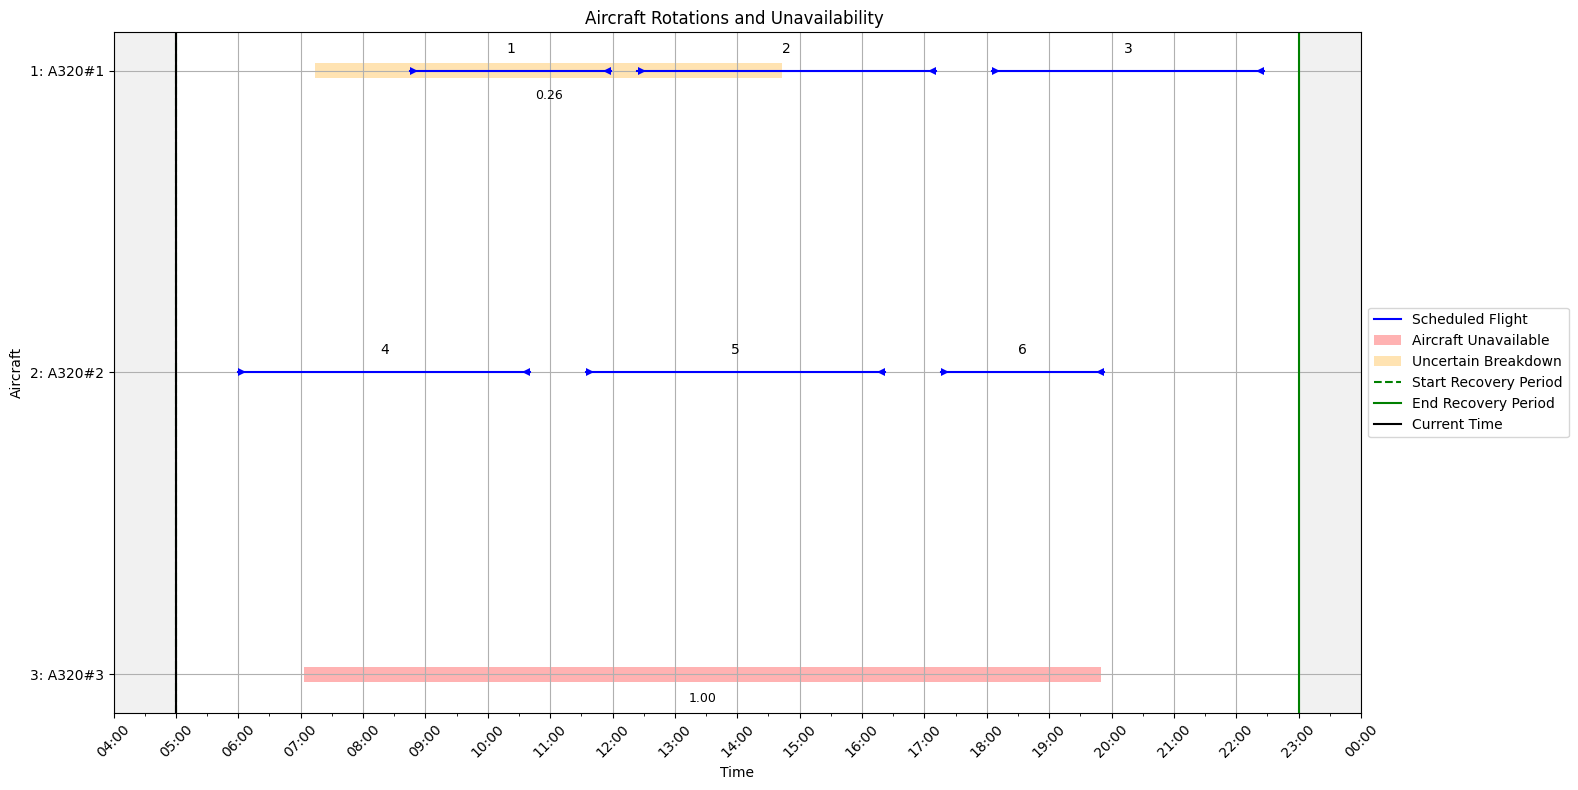

Processing scenario: Scenario_72
{'A320#2': {'StartDate': '16/09/24', 'StartTime': '08:01', 'EndDate': '16/09/24', 'EndTime': '19:26', 'Probability': 1.0}, 'A320#3': {'StartDate': '16/09/24', 'StartTime': '08:10', 'EndDate': '16/09/24', 'EndTime': '12:03', 'Probability': 0.42}}
│ Current Time       │ Time Until End     │   
│          0         │        1050        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    121   806 |     4    45   187 |     5   211   437 |     6   483   767 |     7   769 

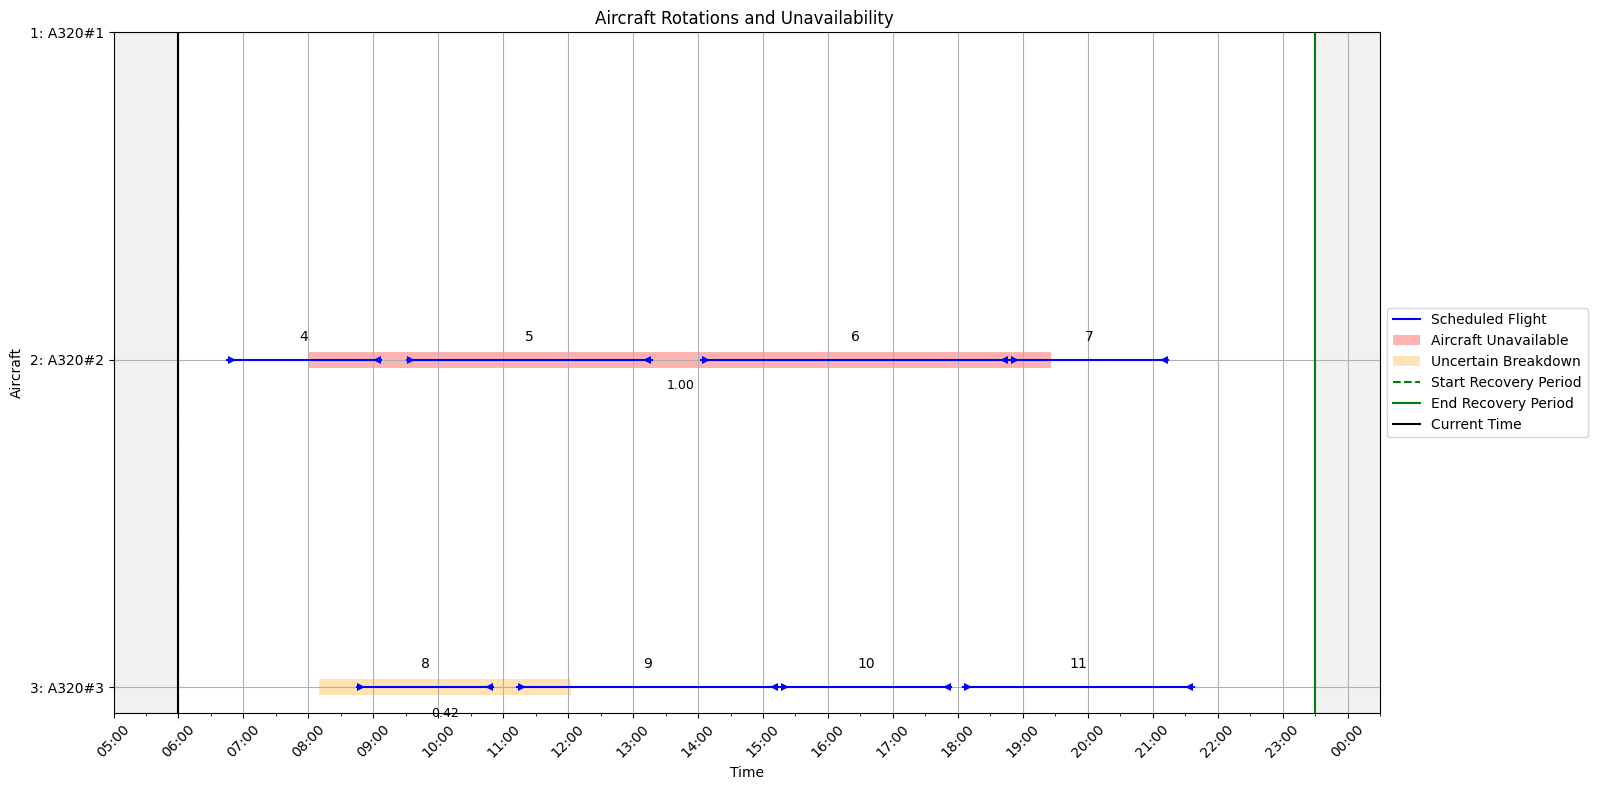

Processing scenario: Scenario_73
{'A320#3': {'StartDate': '07/09/24', 'StartTime': '07:25', 'EndDate': '07/09/24', 'EndTime': '22:32', 'Probability': 1.0}, 'A320#2': {'StartDate': '07/09/24', 'StartTime': '07:30', 'EndDate': '07/09/24', 'EndTime': '14:20', 'Probability': 0.1}}
│ Current Time       │ Time Until End     │   
│          0         │         990        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.10    150   560 |     4   225   363 |     5   372   571 |     6   574   764 |     -     -  

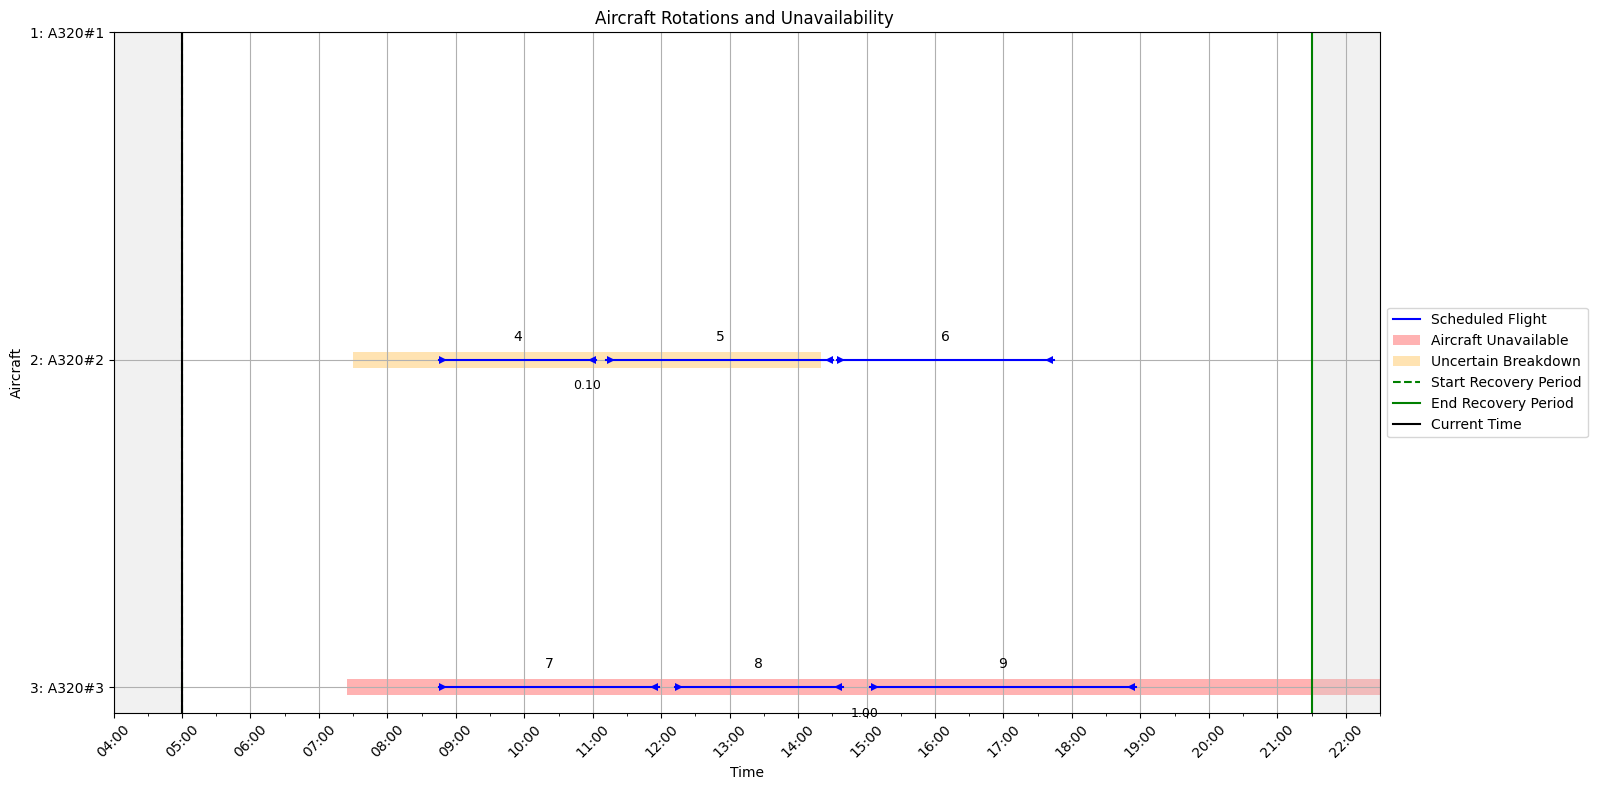

Processing scenario: Scenario_74
{'A320#1': {'StartDate': '10/09/24', 'StartTime': '07:21', 'EndDate': '10/09/24', 'EndTime': '13:10', 'Probability': 1.0}, 'A320#2': {'StartDate': '10/09/24', 'StartTime': '07:02', 'EndDate': '10/09/24', 'EndTime': '19:41', 'Probability': 0.48}}
│ Current Time       │ Time Until End     │   
│          0         │        1110        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    141   490 |     1   180   335 |     2   345   640 |     3   649   930 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.48    122   881 |     4   210   352 |     5   366   661 |     6   692   826 |     -     - 

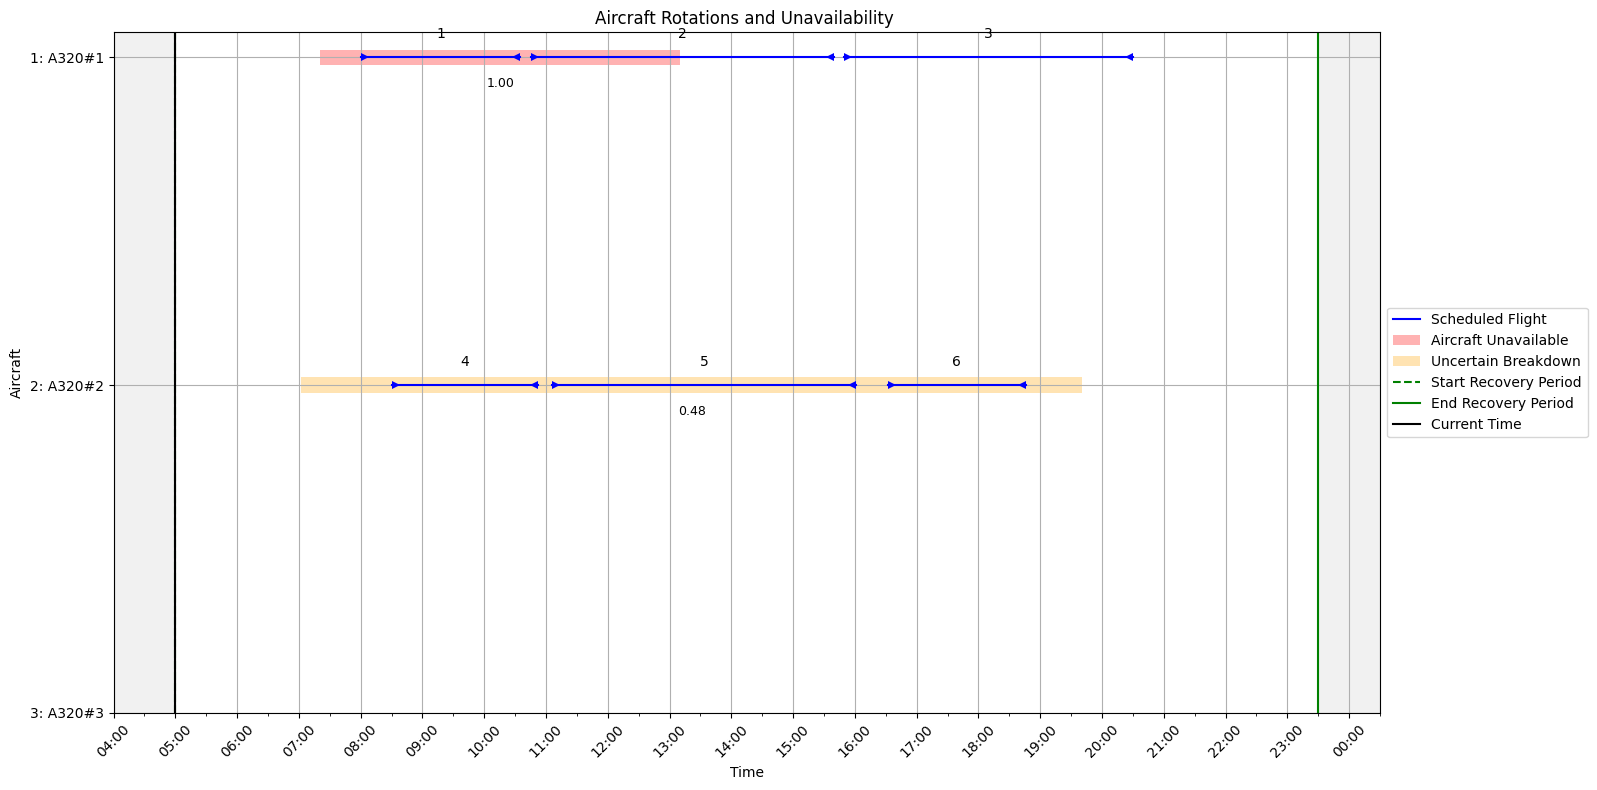

Processing scenario: Scenario_75
{'A320#1': {'StartDate': '11/09/24', 'StartTime': '07:10', 'EndDate': '11/09/24', 'EndTime': '22:19', 'Probability': 1.0}, 'A320#2': {'StartDate': '11/09/24', 'StartTime': '07:16', 'EndDate': '12/09/24', 'EndTime': '00:03', 'Probability': 0.3}}
│ Current Time       │ Time Until End     │   
│          0         │         990        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    130  1039 |     1   150   365 |     2   367   549 |     3   562   682 |     4   703   885 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.30    136  1143 |     5   165   434 |     6   485   753 |     7   771   901 |     -     -  

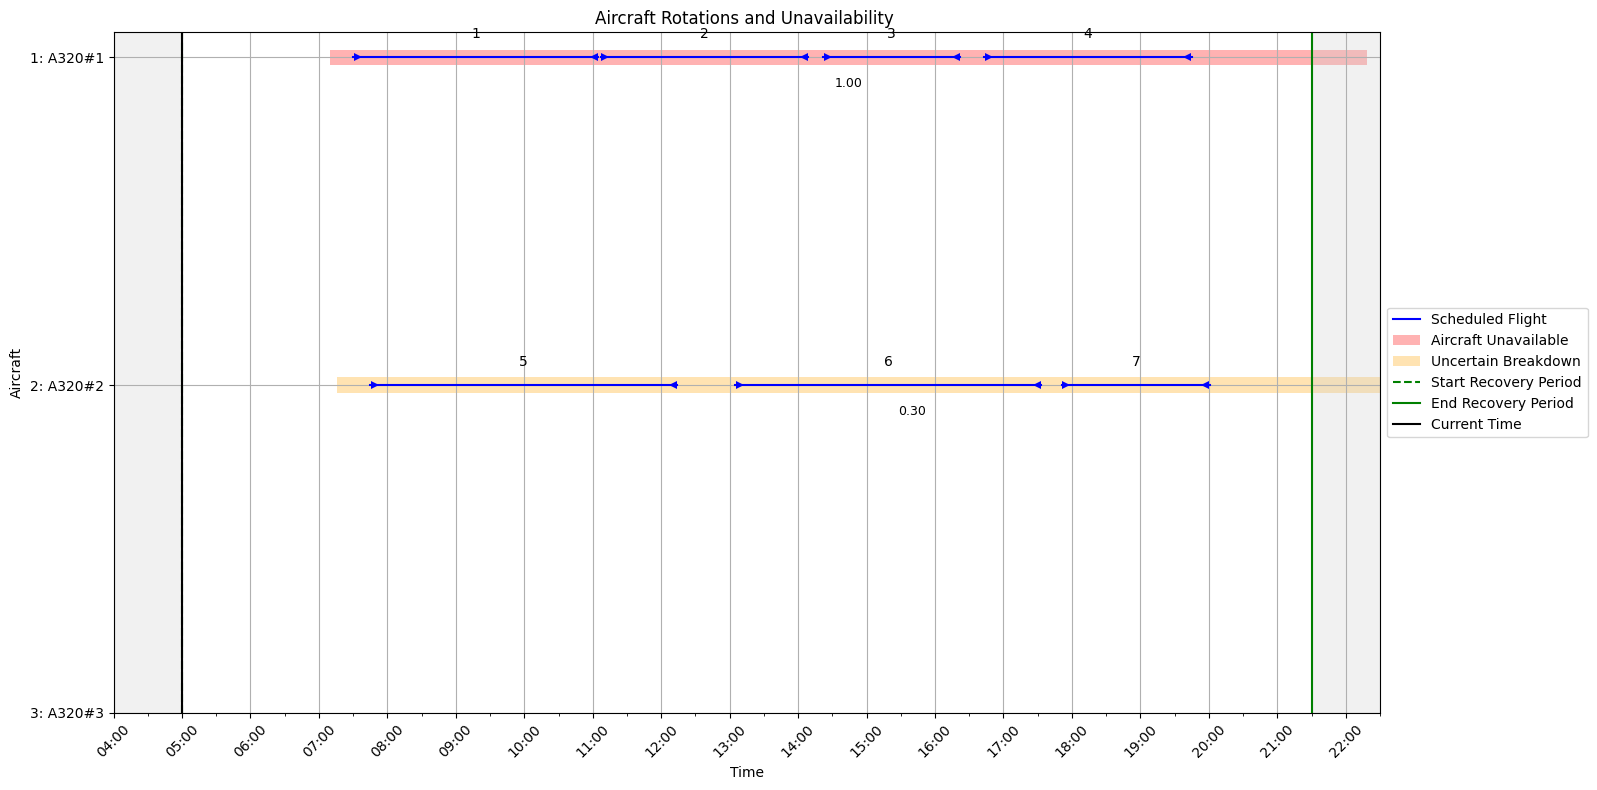

Processing scenario: Scenario_76
{'A320#3': {'StartDate': '11/09/24', 'StartTime': '07:00', 'EndDate': '11/09/24', 'EndTime': '21:20', 'Probability': 1.0}, 'A320#2': {'StartDate': '11/09/24', 'StartTime': '07:17', 'EndDate': '11/09/24', 'EndTime': '13:23', 'Probability': 0.0}}
│ Current Time       │ Time Until End     │   
│          0         │        1110        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1   105   348 |     2   404   612 |     3   636   858 |     4   884  1089 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     -  

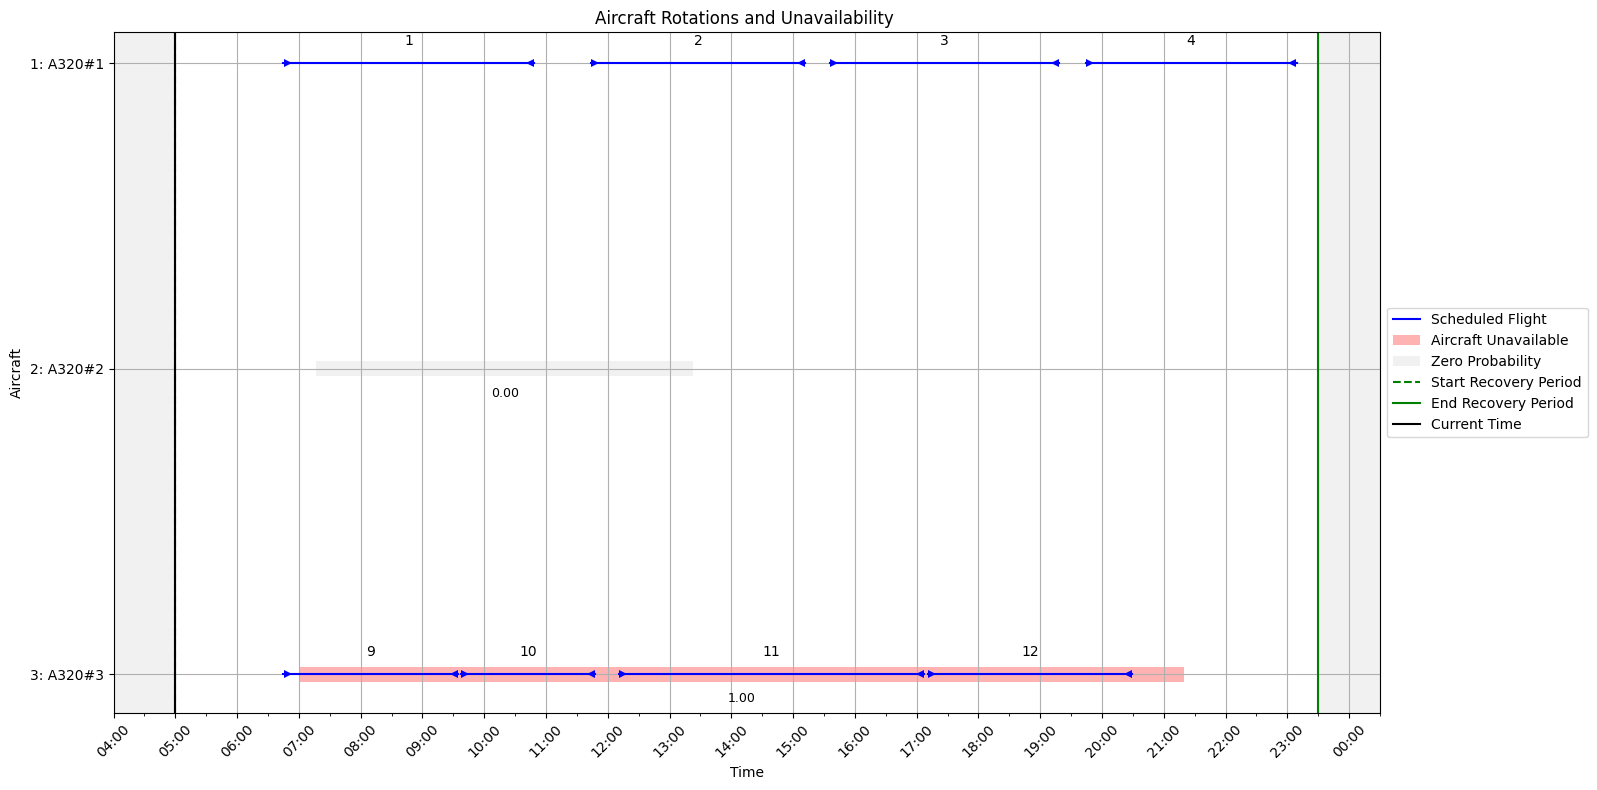

Processing scenario: Scenario_77
{'A320#2': {'StartDate': '29/09/24', 'StartTime': '09:29', 'EndDate': '29/09/24', 'EndTime': '18:21', 'Probability': 1.0}, 'A320#3': {'StartDate': '29/09/24', 'StartTime': '09:04', 'EndDate': '29/09/24', 'EndTime': '16:35', 'Probability': 0.43}}
│ Current Time       │ Time Until End     │   
│          0         │         960        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1    15   203 |     2   217   473 |     3   508   688 |     4   689   880 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    149   681 |     5    90   221 |     6   225   500 |     7   543   671 |     -     - 

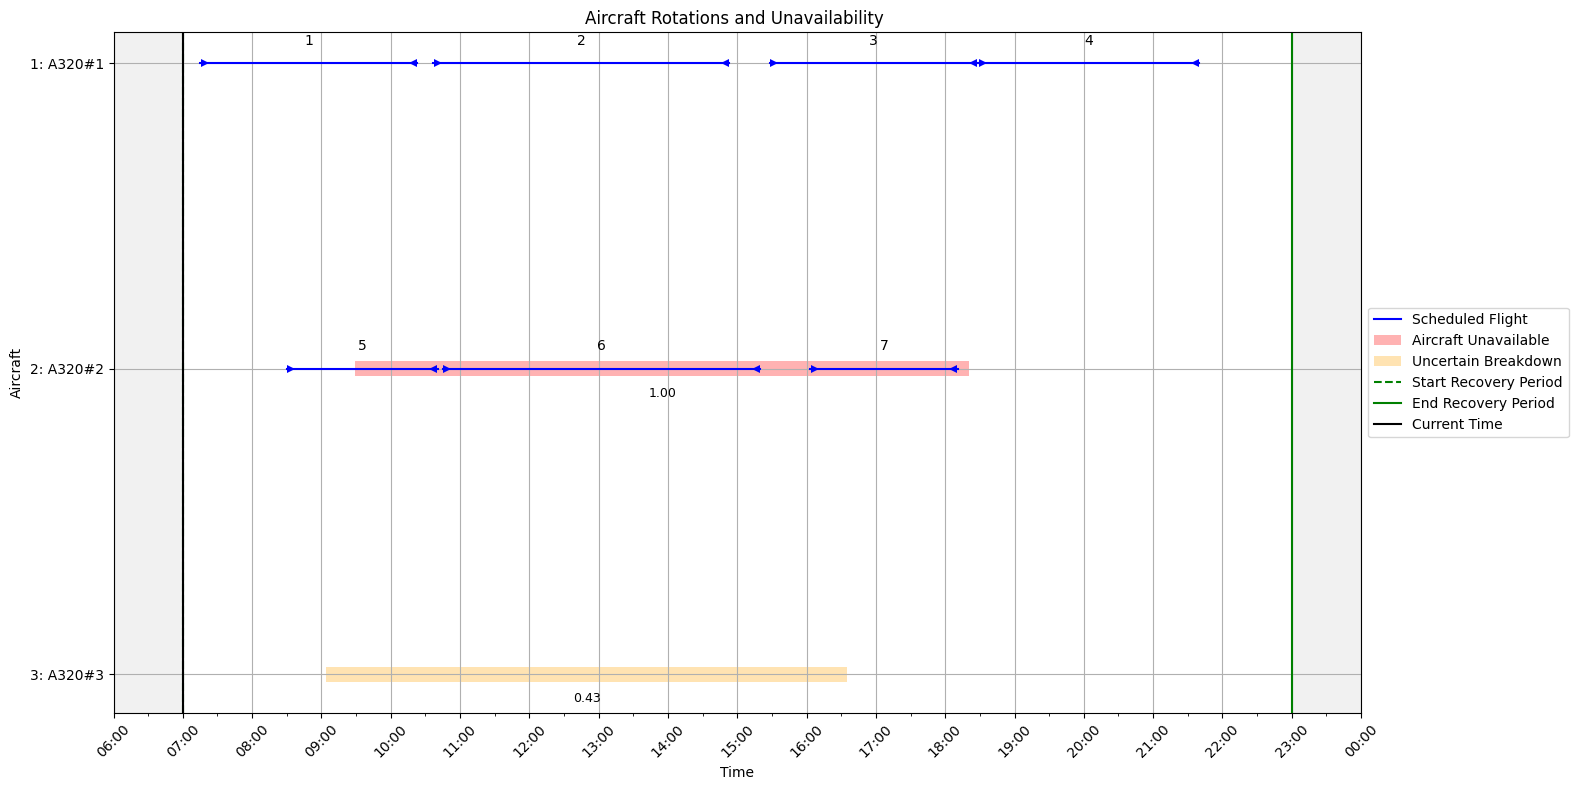

Processing scenario: Scenario_78
{'A320#3': {'StartDate': '15/09/24', 'StartTime': '07:12', 'EndDate': '15/09/24', 'EndTime': '21:39', 'Probability': 1.0}, 'A320#1': {'StartDate': '15/09/24', 'StartTime': '07:26', 'EndDate': '15/09/24', 'EndTime': '14:58', 'Probability': 0.33}}
│ Current Time       │ Time Until End     │   
│          0         │        1050        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.33    146   598 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     5   165   432 |     6   453   724 |     7   735   855 |     -     - 

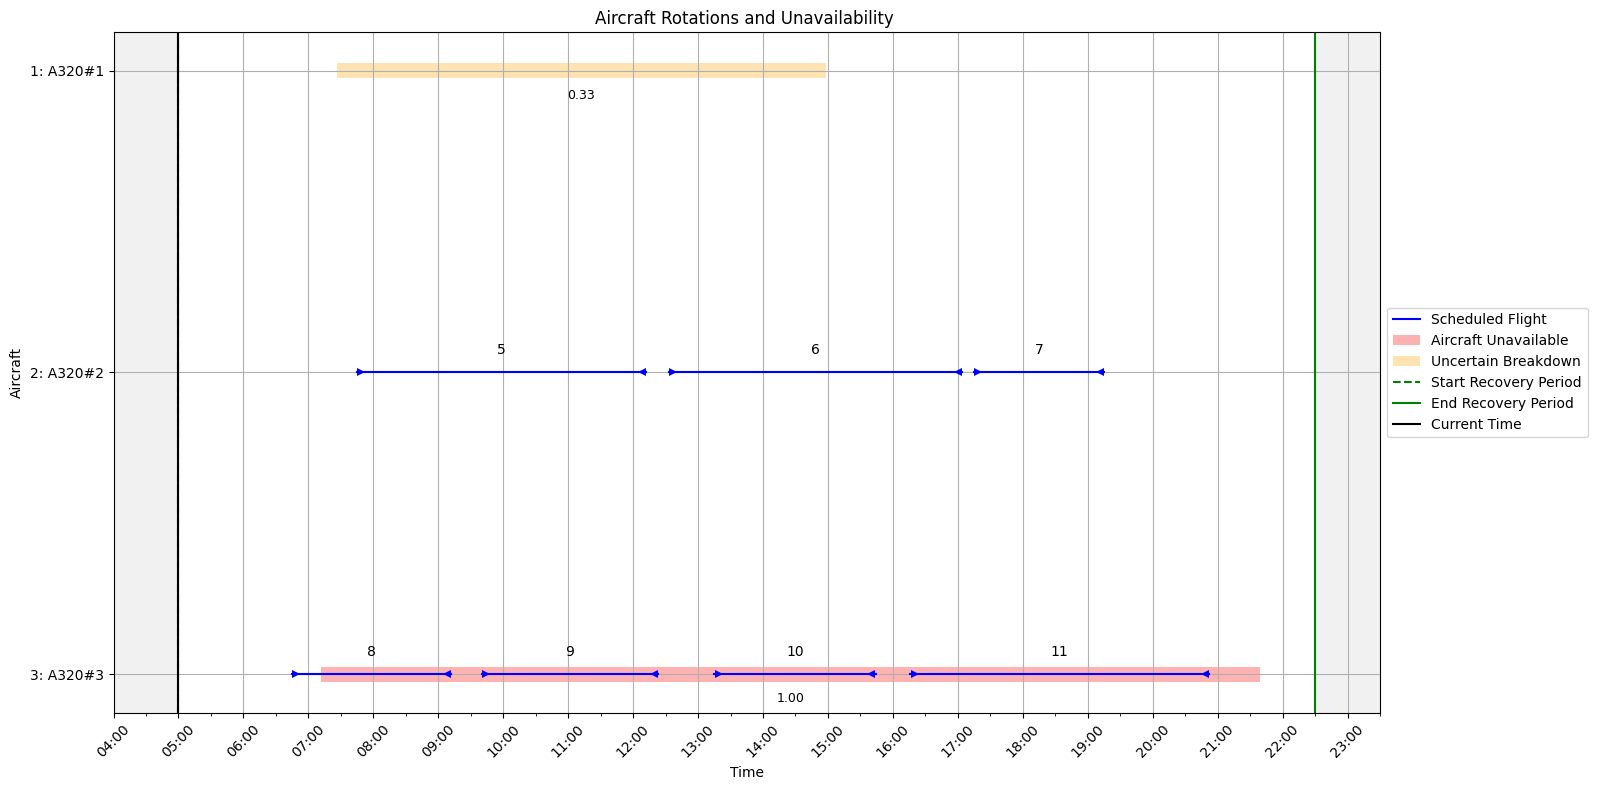

Processing scenario: Scenario_79
{'A320#1': {'StartDate': '03/09/24', 'StartTime': '07:23', 'EndDate': '03/09/24', 'EndTime': '12:12', 'Probability': 1.0}, 'A320#3': {'StartDate': '03/09/24', 'StartTime': '07:22', 'EndDate': '03/09/24', 'EndTime': '13:38', 'Probability': 0.49}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    143   432 |     1   120   419 |     2   450   682 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     - 

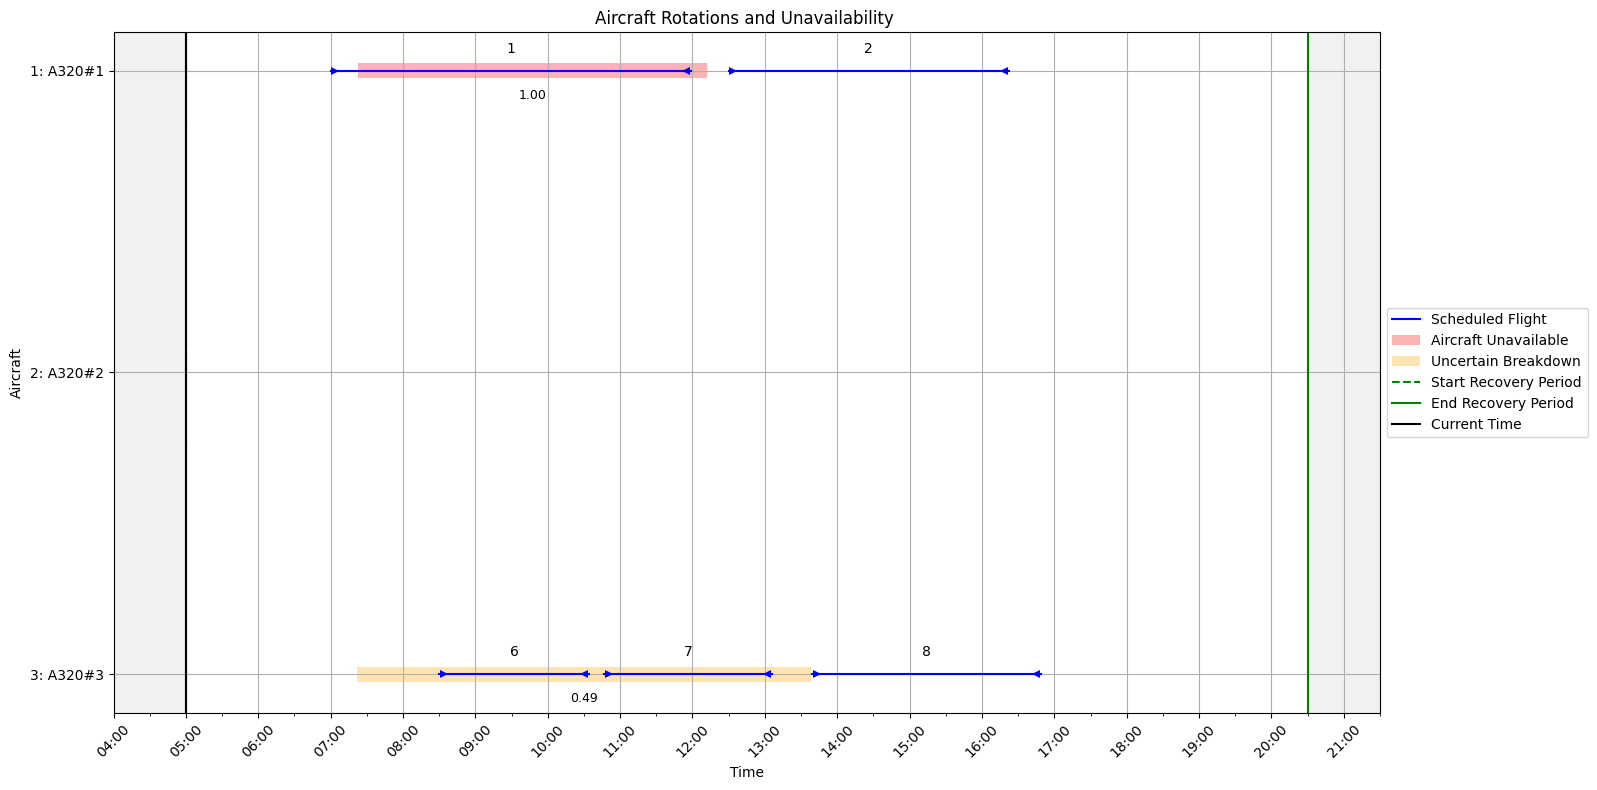

Processing scenario: Scenario_80
{'A320#2': {'StartDate': '26/09/24', 'StartTime': '08:00', 'EndDate': '26/09/24', 'EndTime': '17:11', 'Probability': 1.0}, 'A320#3': {'StartDate': '26/09/24', 'StartTime': '08:09', 'EndDate': '27/09/24', 'EndTime': '00:00', 'Probability': 0.4}}
│ Current Time       │ Time Until End     │   
│          0         │         870        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1    90   351 |     2   353   636 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    120   671 |     3   105   347 |     4   374   667 |     5   725   845 |     -     -  

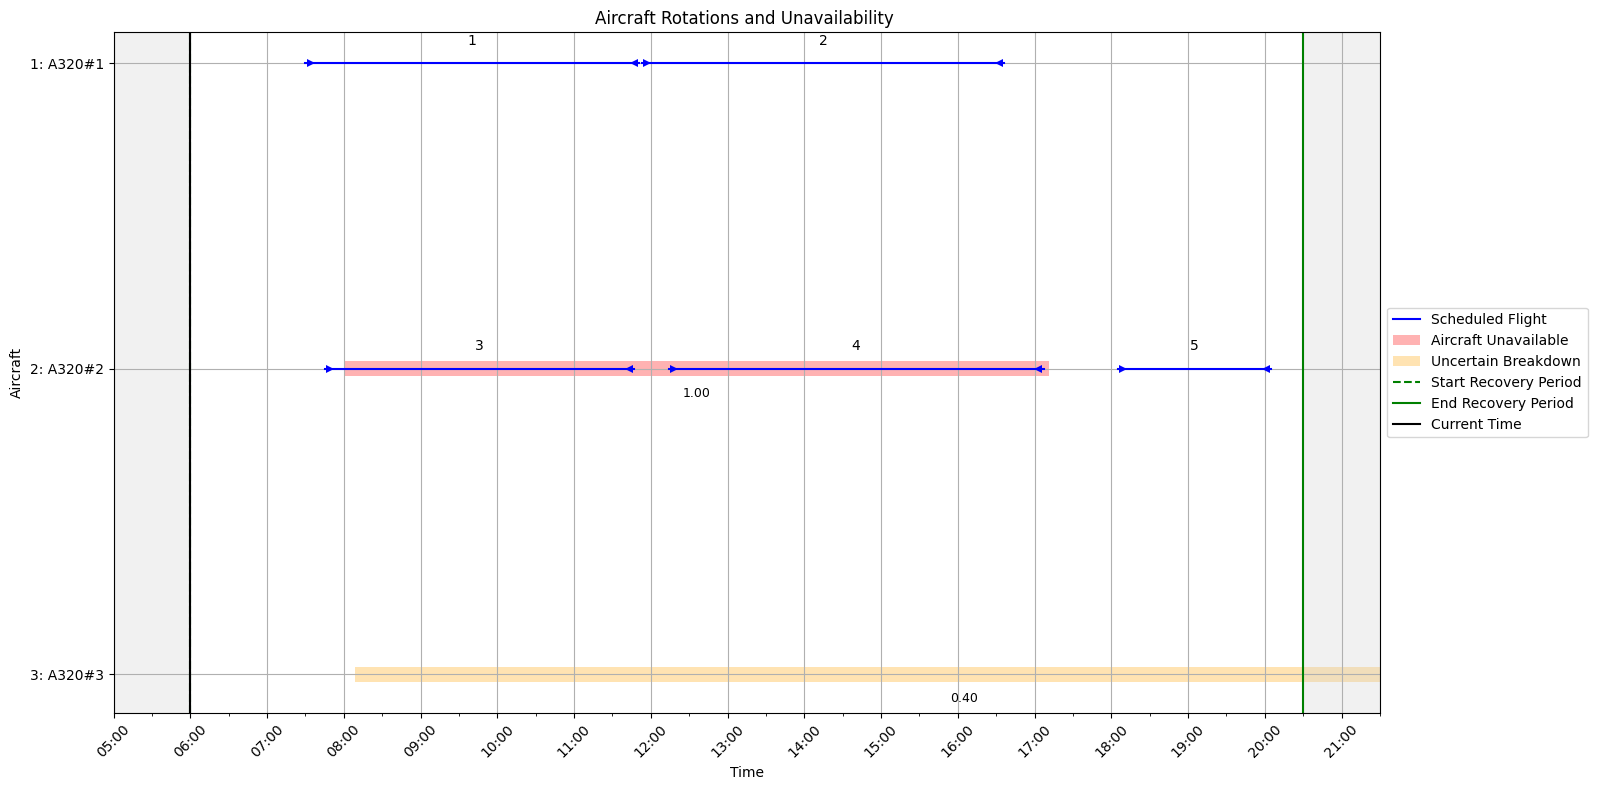

Processing scenario: Scenario_81
{'A320#1': {'StartDate': '23/09/24', 'StartTime': '08:20', 'EndDate': '23/09/24', 'EndTime': '14:04', 'Probability': 1.0}, 'A320#2': {'StartDate': '23/09/24', 'StartTime': '08:06', 'EndDate': '23/09/24', 'EndTime': '12:19', 'Probability': 0.25}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    140   484 |     1   120   303 |     2   306   508 |     3   541   710 |     4   750   911 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.25    126   379 |     5    90   310 |     6   342   508 |     7   517   721 |     -     - 

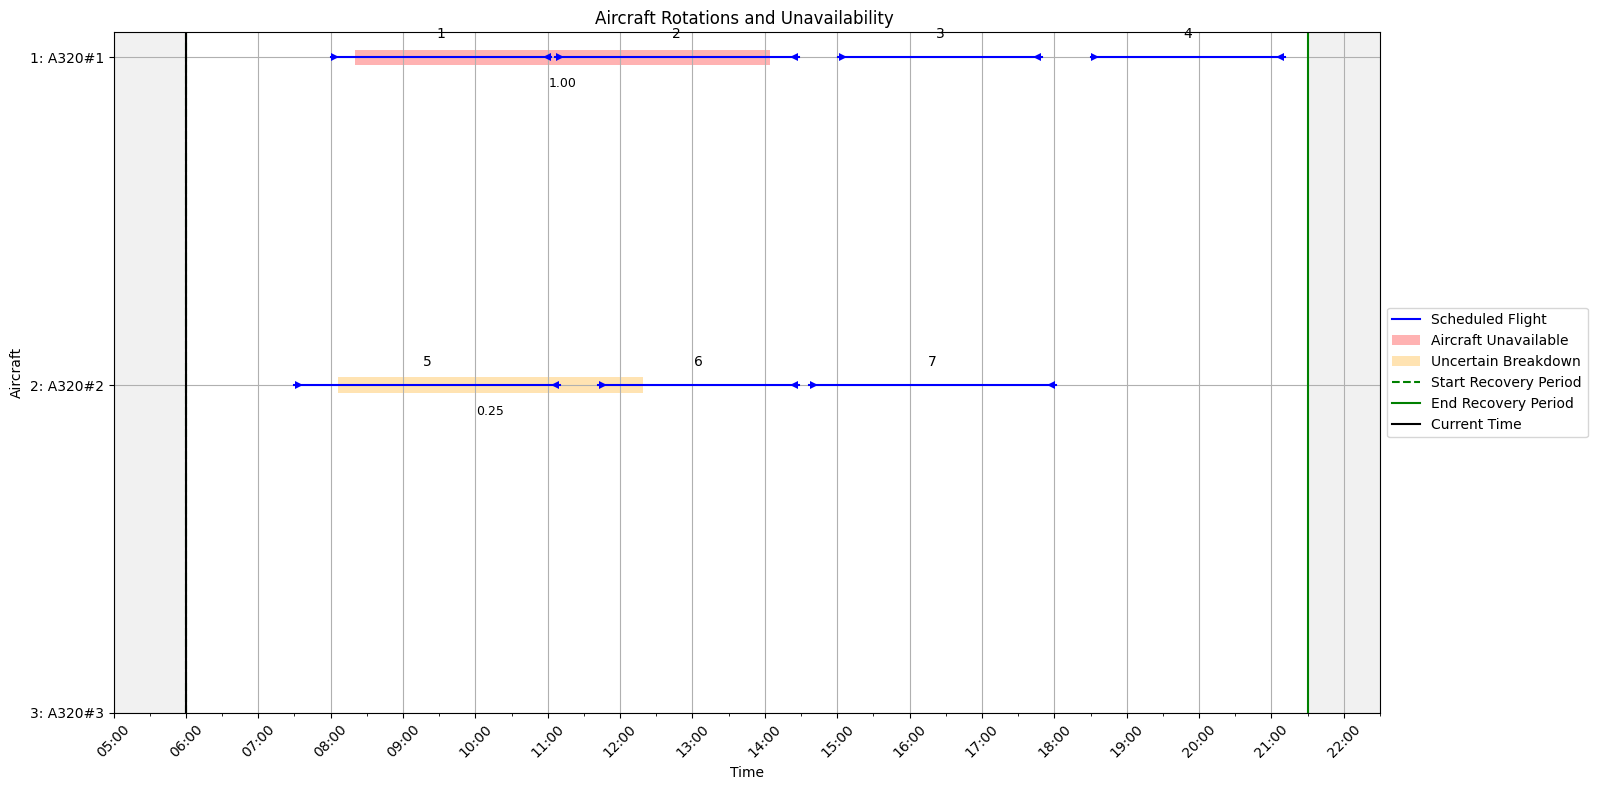

Processing scenario: Scenario_82
{'A320#3': {'StartDate': '08/09/24', 'StartTime': '07:26', 'EndDate': '08/09/24', 'EndTime': '21:04', 'Probability': 1.0}, 'A320#1': {'StartDate': '08/09/24', 'StartTime': '07:11', 'EndDate': '08/09/24', 'EndTime': '19:15', 'Probability': 0.16}}
│ Current Time       │ Time Until End     │   
│          0         │        1080        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.16    131   855 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     5   195   392 |     6   451   672 |     7   693   820 |     8   850 

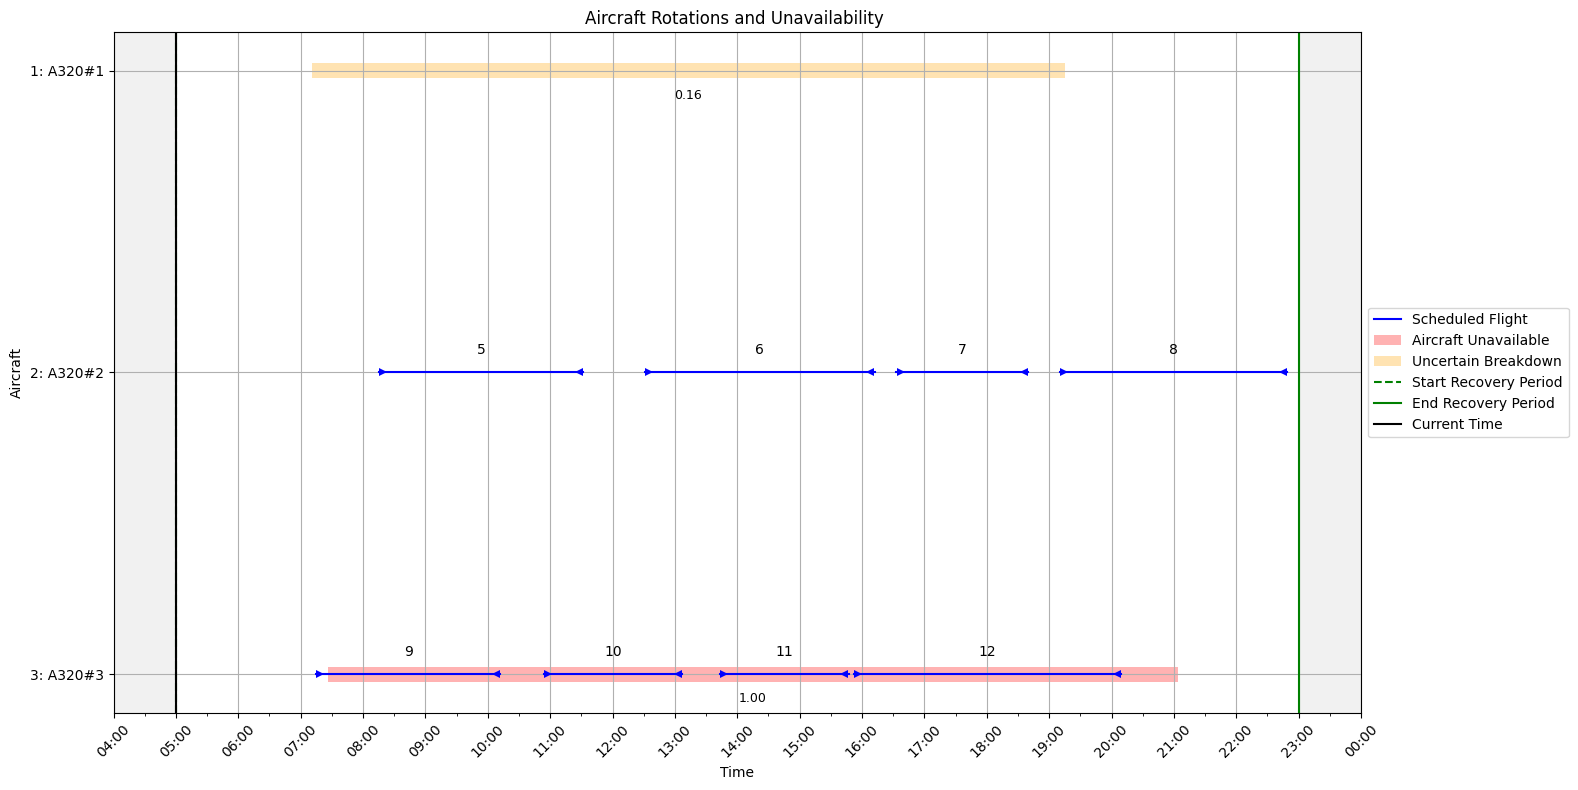

Processing scenario: Scenario_83
{'A320#2': {'StartDate': '06/09/24', 'StartTime': '09:11', 'EndDate': '06/09/24', 'EndTime': '22:29', 'Probability': 1.0}, 'A320#1': {'StartDate': '06/09/24', 'StartTime': '09:19', 'EndDate': '06/09/24', 'EndTime': '18:11', 'Probability': 0.07}}
│ Current Time       │ Time Until End     │   
│          0         │         810        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.07    139   671 |     1    15   249 |     2   266   534 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    131   929 |     3    90   377 |     4   428   596 |     -     -     - |     -     - 

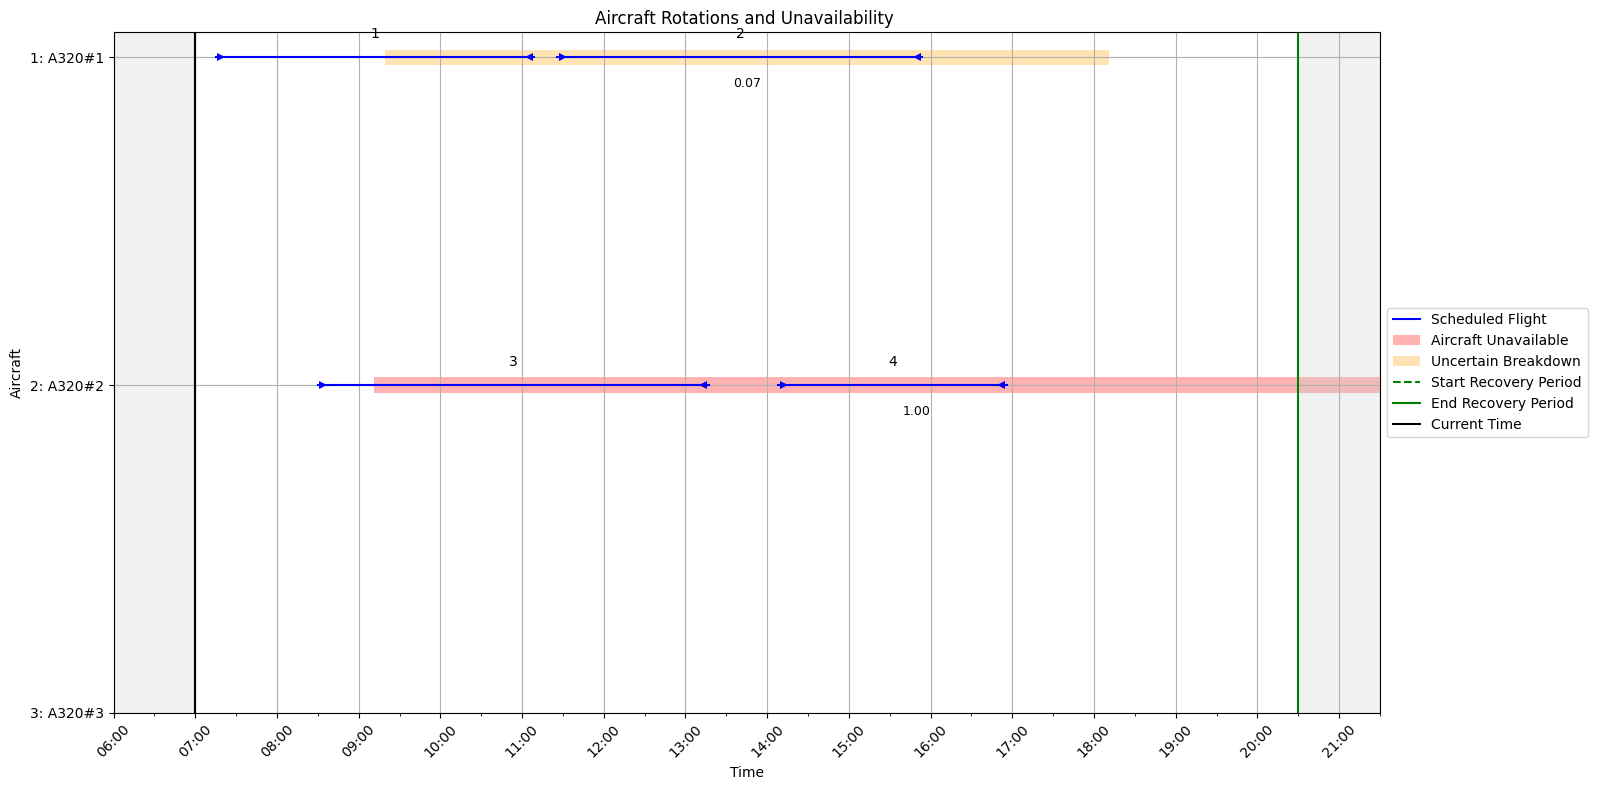

Processing scenario: Scenario_84
{'A320#3': {'StartDate': '27/09/24', 'StartTime': '09:11', 'EndDate': '27/09/24', 'EndTime': '15:21', 'Probability': 1.0}, 'A320#1': {'StartDate': '27/09/24', 'StartTime': '09:15', 'EndDate': '27/09/24', 'EndTime': '14:31', 'Probability': 0.44}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.44    135   451 |     1    15   221 |     2   237   532 |     3   544   724 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     - 

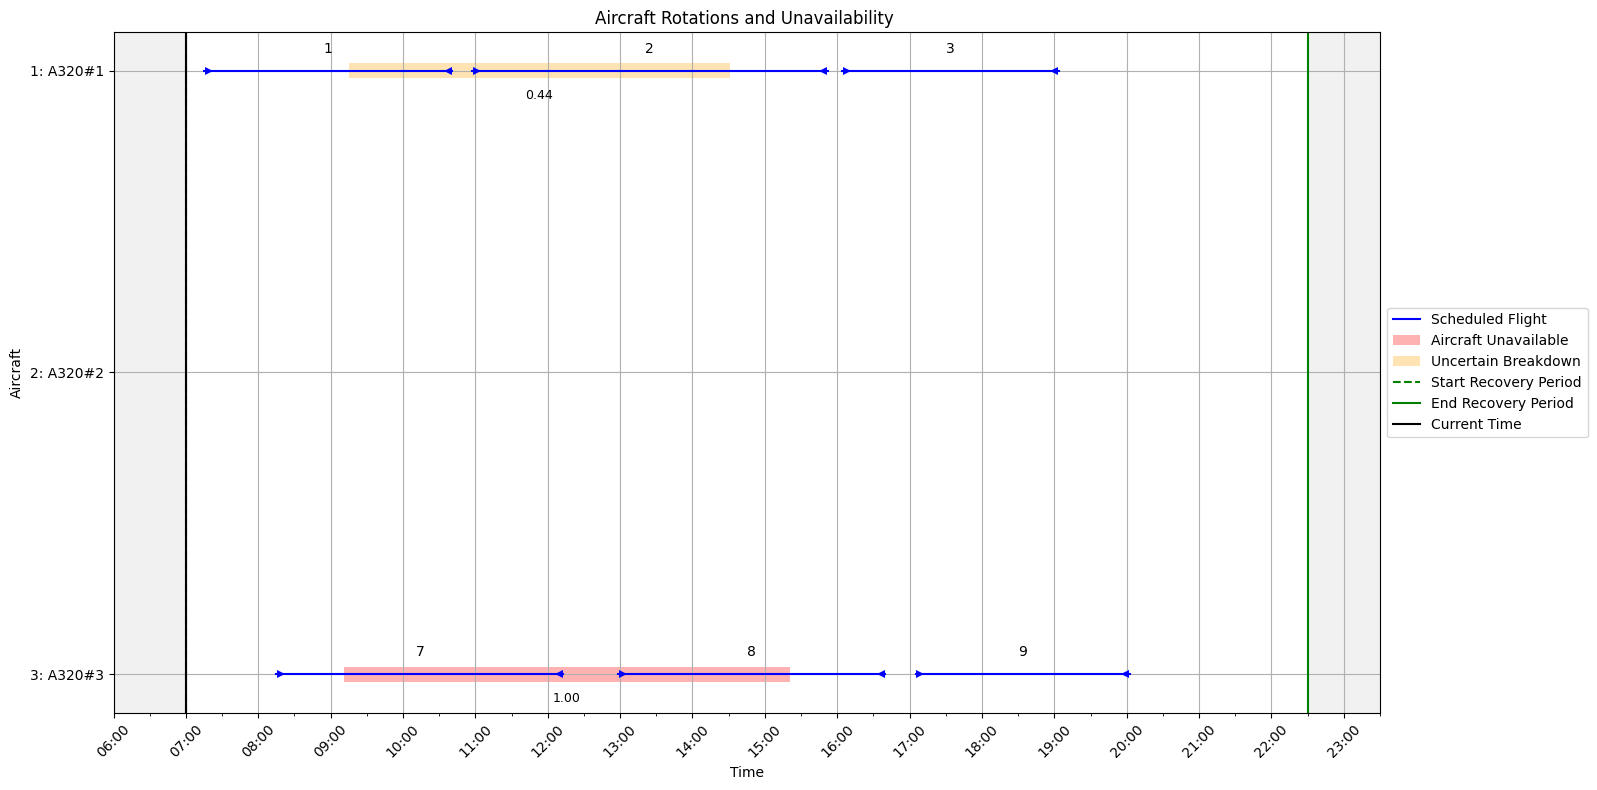

Processing scenario: Scenario_85
{'A320#3': {'StartDate': '20/09/24', 'StartTime': '07:30', 'EndDate': '20/09/24', 'EndTime': '20:46', 'Probability': 1.0}, 'A320#1': {'StartDate': '20/09/24', 'StartTime': '07:04', 'EndDate': '20/09/24', 'EndTime': '16:02', 'Probability': 0.1}}
│ Current Time       │ Time Until End     │   
│          0         │        1050        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.10    124   662 |     1   105   302 |     2   319   542 |     3   567   773 |     4   773   942 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     -  

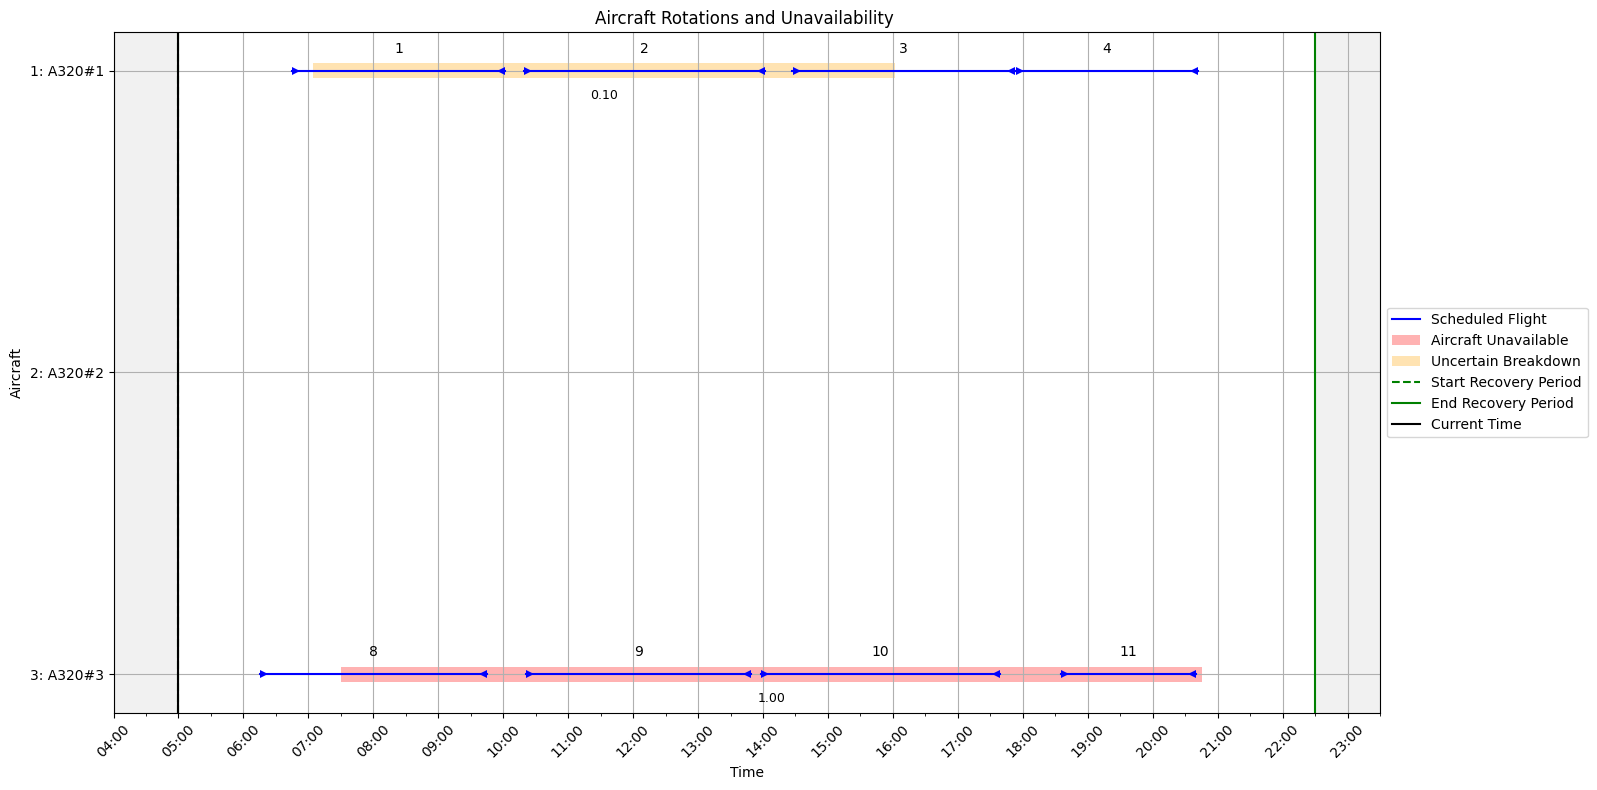

Processing scenario: Scenario_86
{'A320#1': {'StartDate': '18/09/24', 'StartTime': '09:08', 'EndDate': '18/09/24', 'EndTime': '15:00', 'Probability': 1.0}, 'A320#3': {'StartDate': '18/09/24', 'StartTime': '09:25', 'EndDate': '18/09/24', 'EndTime': '19:14', 'Probability': 0.06}}
│ Current Time       │ Time Until End     │   
│          0         │         870        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    128   480 |     1    15   218 |     2   253   548 |     3   563   824 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     - 

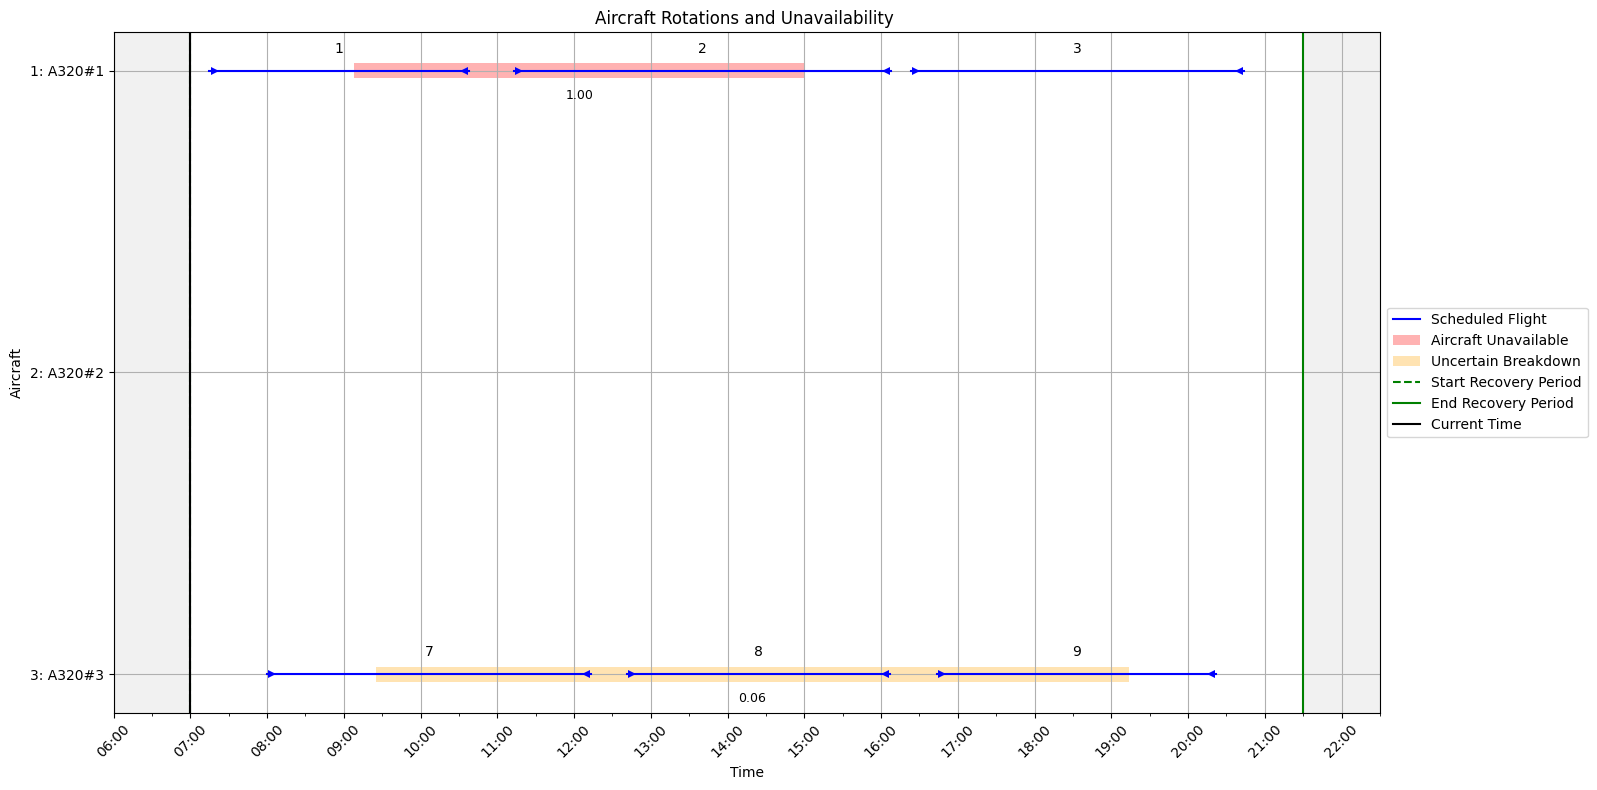

Processing scenario: Scenario_87
{'A320#1': {'StartDate': '18/09/24', 'StartTime': '08:08', 'EndDate': '18/09/24', 'EndTime': '20:56', 'Probability': 1.0}, 'A320#2': {'StartDate': '18/09/24', 'StartTime': '08:18', 'EndDate': '18/09/24', 'EndTime': '14:00', 'Probability': 0.07}}
│ Current Time       │ Time Until End     │   
│          0         │         900        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    128   896 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.07    138   480 |     4    30   165 |     5   177   349 |     6   404   660 |     -     - 

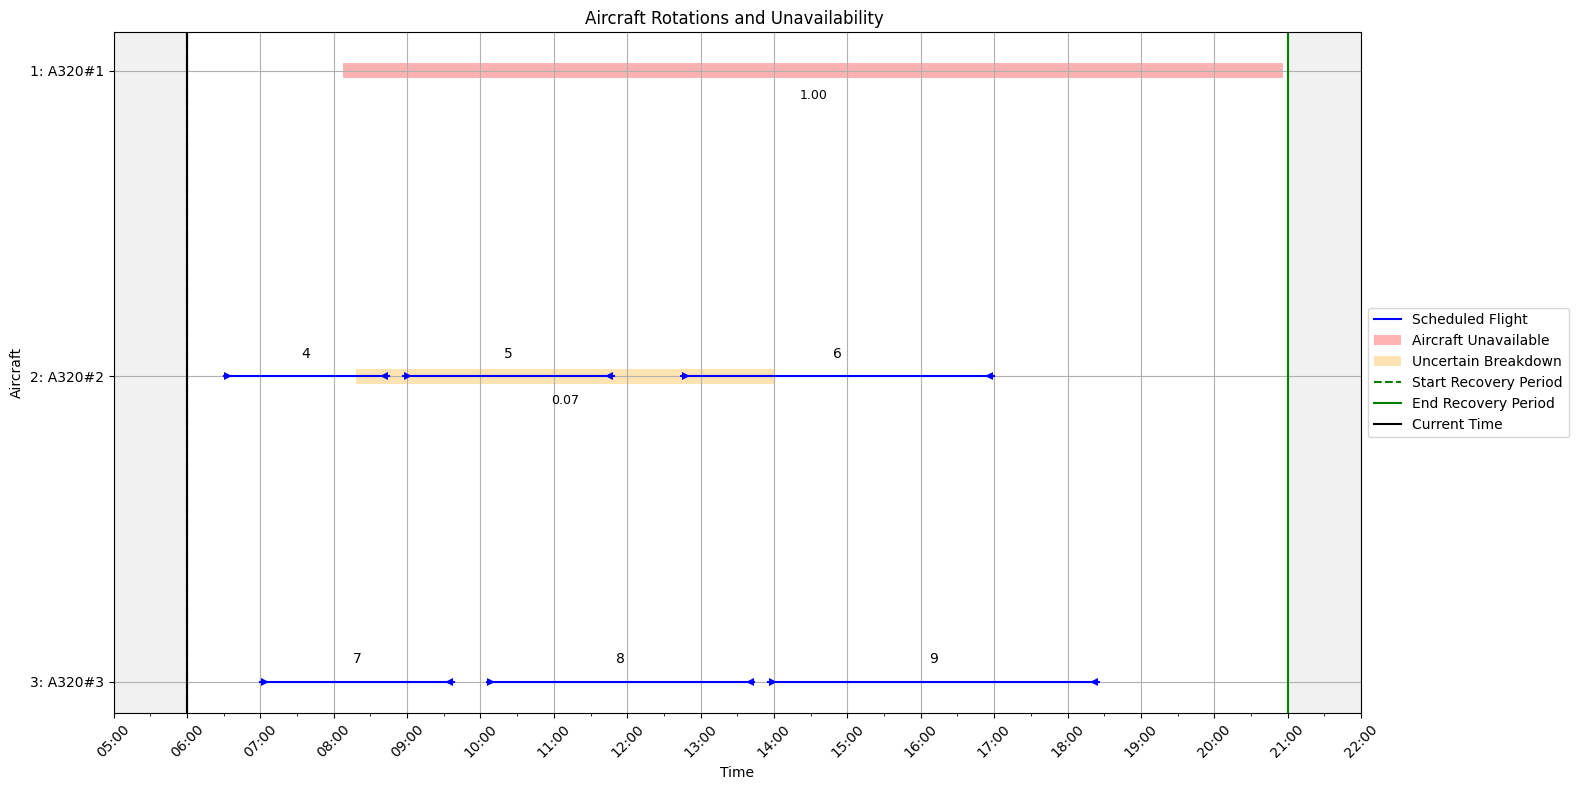

Processing scenario: Scenario_88
{'A320#2': {'StartDate': '27/09/24', 'StartTime': '08:19', 'EndDate': '27/09/24', 'EndTime': '17:25', 'Probability': 1.0}, 'A320#3': {'StartDate': '27/09/24', 'StartTime': '08:13', 'EndDate': '27/09/24', 'EndTime': '15:43', 'Probability': 0.27}}
│ Current Time       │ Time Until End     │   
│          0         │         870        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    139   685 |     3    75   360 |     4   407   701 |     -     -     - |     -     - 

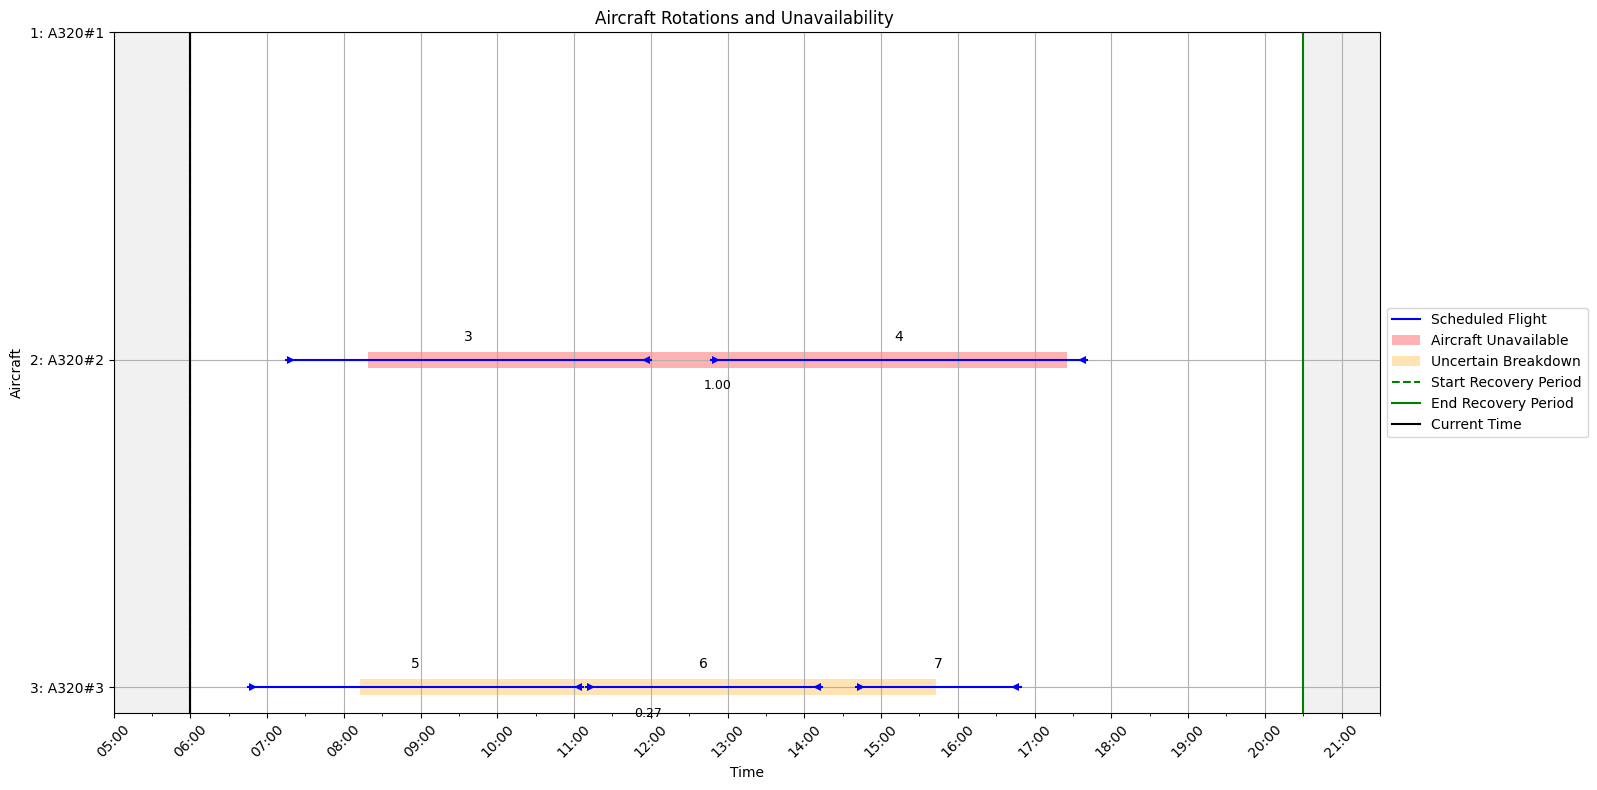

Processing scenario: Scenario_89
{'A320#1': {'StartDate': '07/09/24', 'StartTime': '07:20', 'EndDate': '07/09/24', 'EndTime': '23:59', 'Probability': 1.0}, 'A320#3': {'StartDate': '07/09/24', 'StartTime': '07:24', 'EndDate': '07/09/24', 'EndTime': '18:05', 'Probability': 0.32}}
│ Current Time       │ Time Until End     │   
│          0         │         930        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    140  1139 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     3    60   195 |     4   215   426 |     5   484   705 |     -     - 

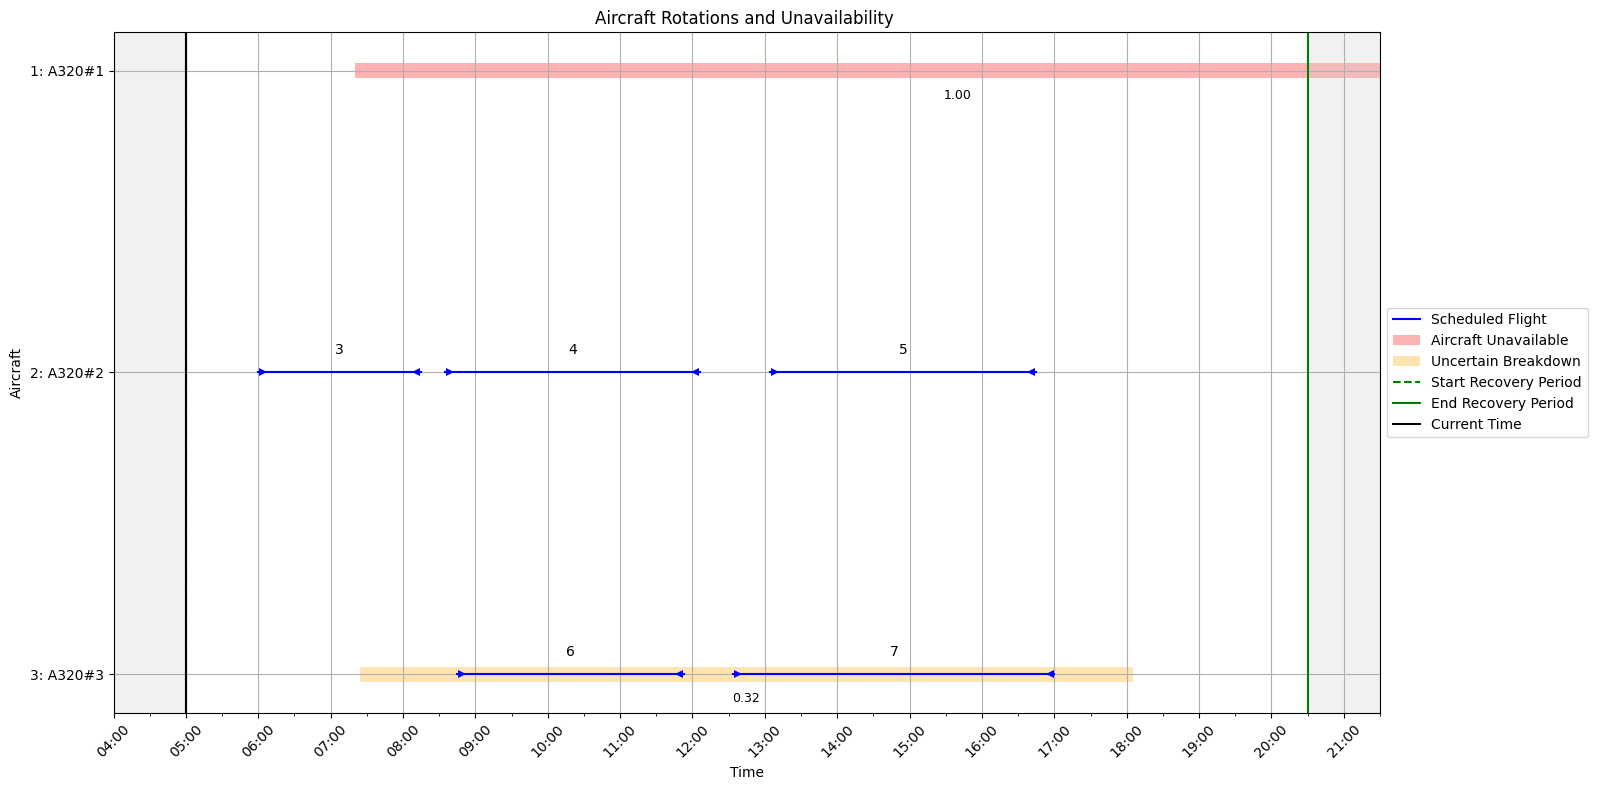

Processing scenario: Scenario_90
{'A320#3': {'StartDate': '02/09/24', 'StartTime': '08:17', 'EndDate': '02/09/24', 'EndTime': '22:42', 'Probability': 1.0}, 'A320#1': {'StartDate': '02/09/24', 'StartTime': '08:12', 'EndDate': '02/09/24', 'EndTime': '21:27', 'Probability': 0.31}}
│ Current Time       │ Time Until End     │   
│          0         │         990        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.31    132   927 |     1    75   301 |     2   359   547 |     3   599   857 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     - 

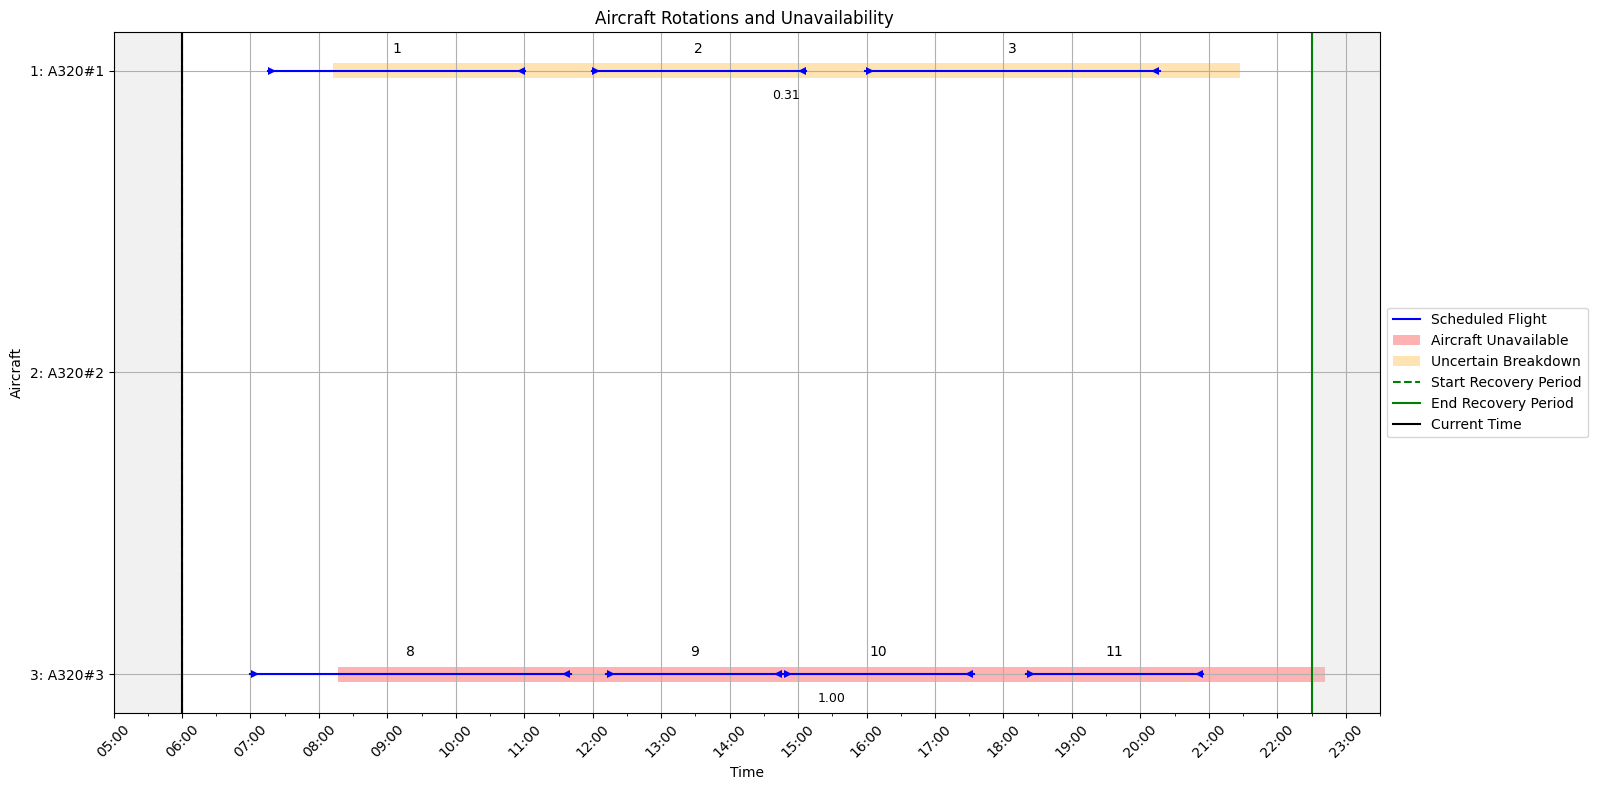

Processing scenario: Scenario_91
{'A320#1': {'StartDate': '28/09/24', 'StartTime': '09:24', 'EndDate': '28/09/24', 'EndTime': '21:49', 'Probability': 1.0}, 'A320#2': {'StartDate': '28/09/24', 'StartTime': '09:10', 'EndDate': '28/09/24', 'EndTime': '22:32', 'Probability': 0.43}}
│ Current Time       │ Time Until End     │   
│          0         │         810        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    144   889 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.43    130   932 |     3    45   294 |     4   296   583 |     -     -     - |     -     - 

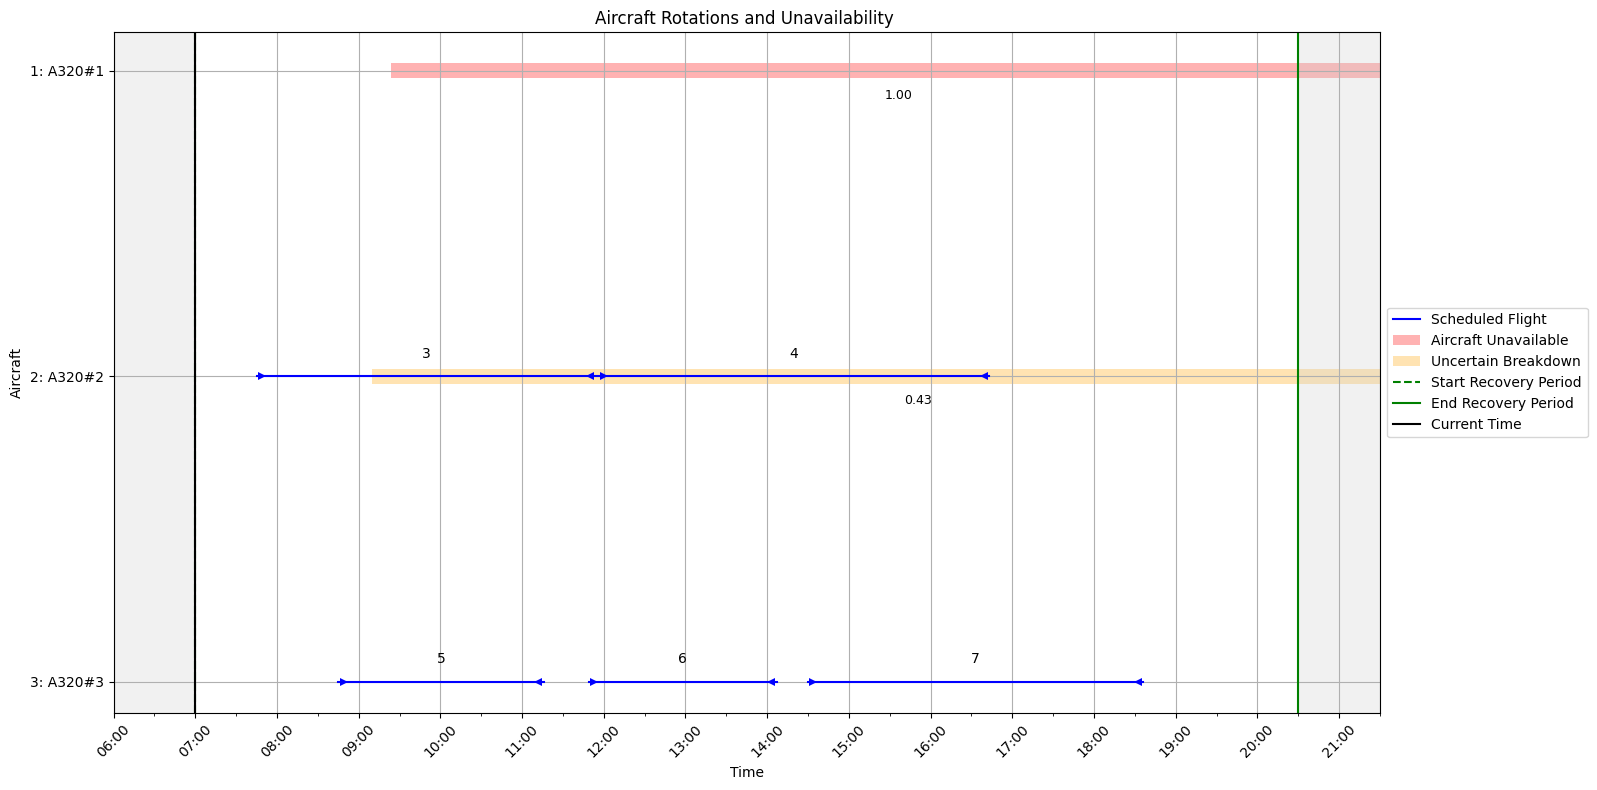

Processing scenario: Scenario_92
{'A320#2': {'StartDate': '19/09/24', 'StartTime': '08:03', 'EndDate': '19/09/24', 'EndTime': '15:15', 'Probability': 1.0}, 'A320#3': {'StartDate': '19/09/24', 'StartTime': '08:03', 'EndDate': '19/09/24', 'EndTime': '12:55', 'Probability': 0.34}}
│ Current Time       │ Time Until End     │   
│          0         │         870        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     1   120   277 |     2   335   545 |     3   558   747 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    123   555 |     4    60   256 |     5   297   459 |     6   491   626 |     -     - 

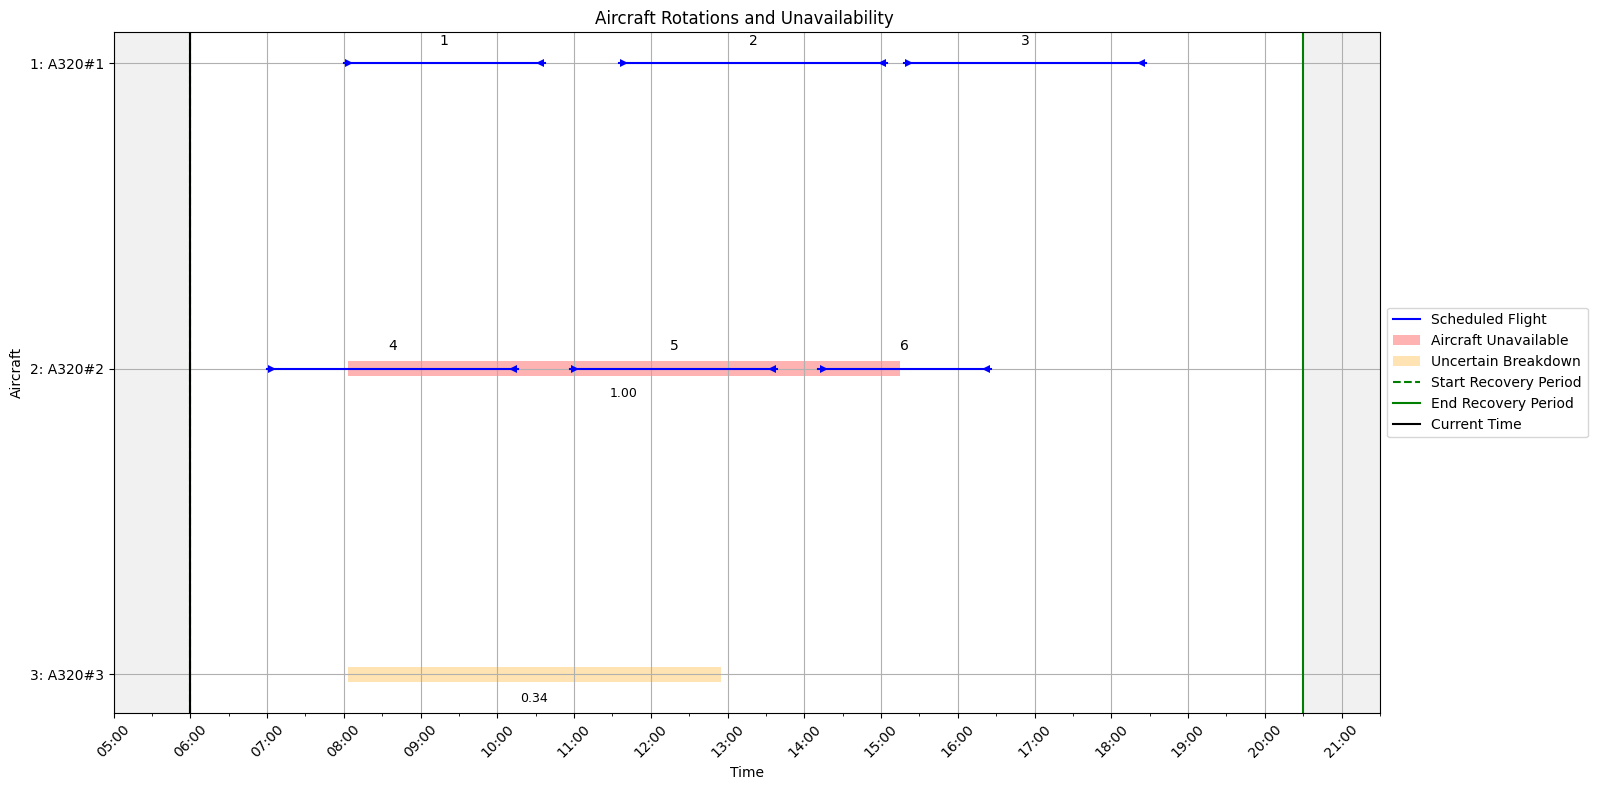

Processing scenario: Scenario_93
{'A320#2': {'StartDate': '24/09/24', 'StartTime': '08:21', 'EndDate': '24/09/24', 'EndTime': '18:43', 'Probability': 1.0}, 'A320#1': {'StartDate': '24/09/24', 'StartTime': '08:16', 'EndDate': '24/09/24', 'EndTime': '13:33', 'Probability': 0.47}}
│ Current Time       │ Time Until End     │   
│          0         │        1050        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.47    136   453 |     1   165   324 |     2   377   595 |     3   628   807 |     4   819   956 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    141   763 |     5   165   318 |     6   342   619 |     7   637   861 |     -     - 

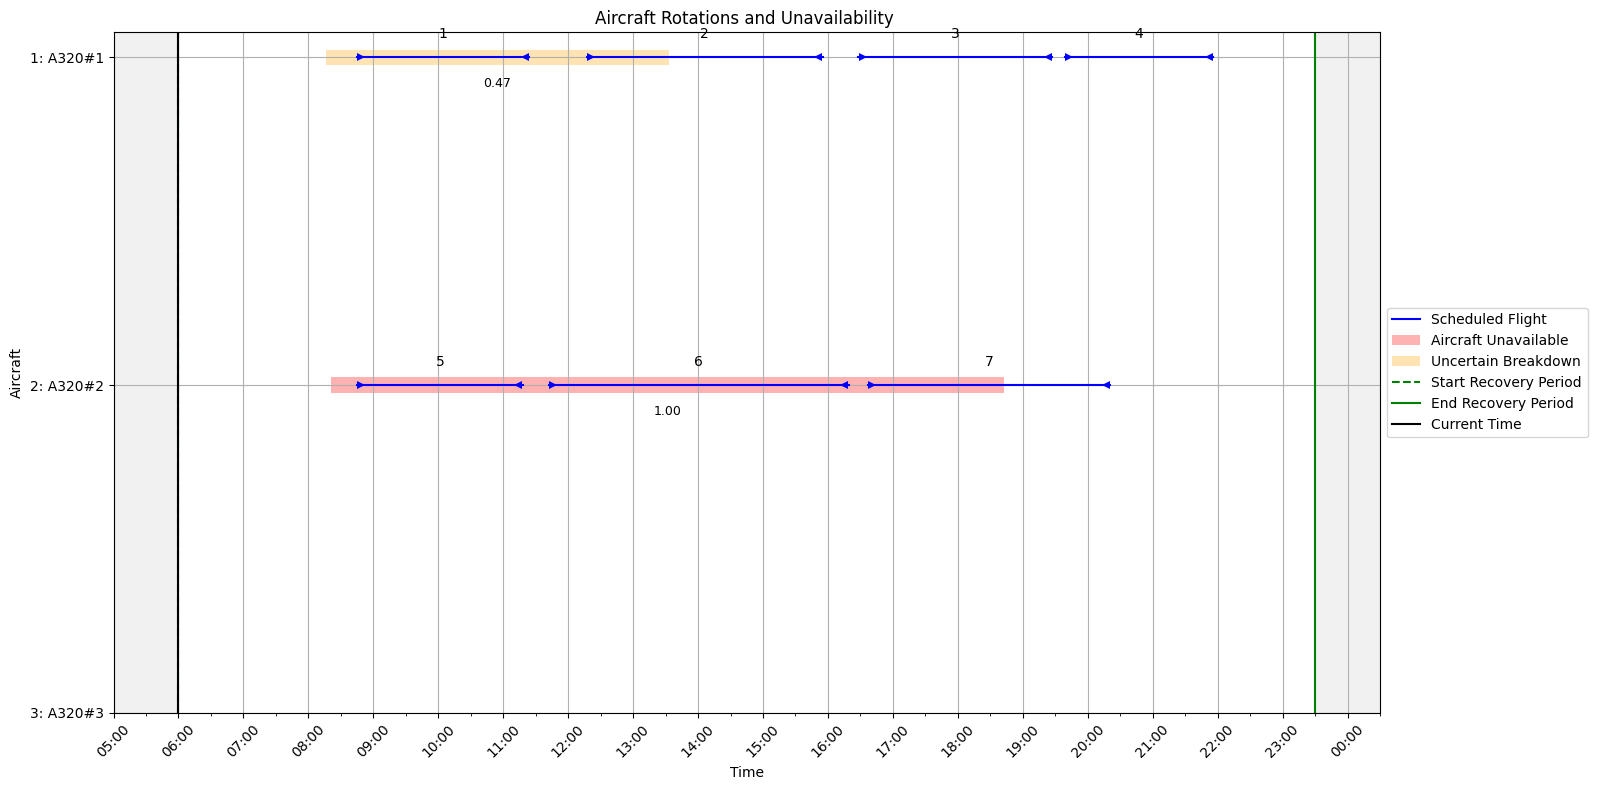

Processing scenario: Scenario_94
{'A320#3': {'StartDate': '07/09/24', 'StartTime': '09:24', 'EndDate': '07/09/24', 'EndTime': '23:35', 'Probability': 1.0}, 'A320#2': {'StartDate': '07/09/24', 'StartTime': '09:14', 'EndDate': '07/09/24', 'EndTime': '20:10', 'Probability': 0.1}}
│ Current Time       │ Time Until End     │   
│          0         │         870        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1      -      -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.10    134   790 |     4    15   241 |     5   281   566 |     -     -     - |     -     -  

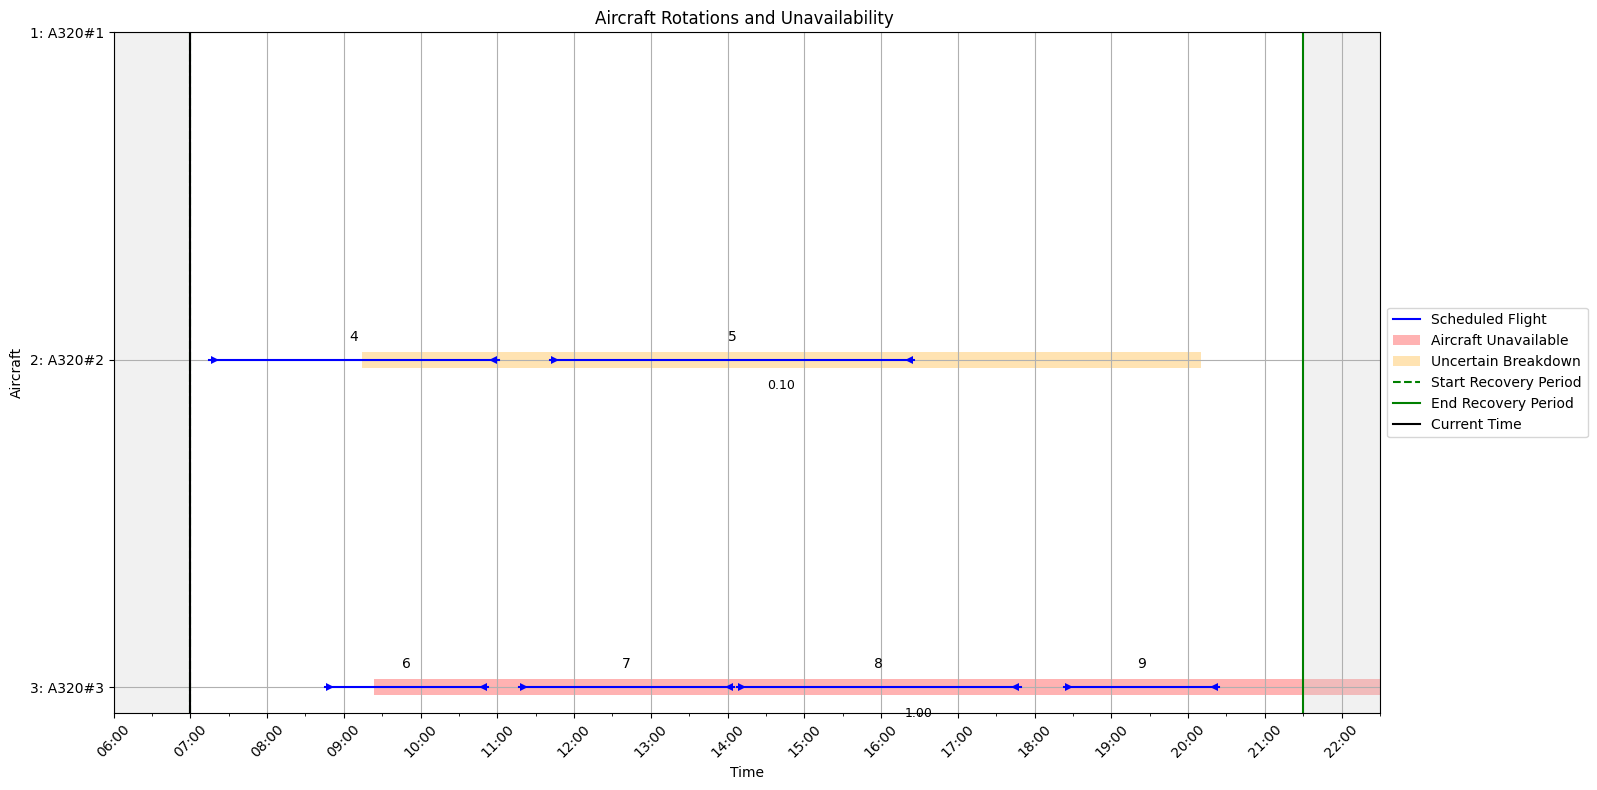

Processing scenario: Scenario_95
{'A320#2': {'StartDate': '12/09/24', 'StartTime': '08:14', 'EndDate': '12/09/24', 'EndTime': '12:43', 'Probability': 1.0}, 'A320#1': {'StartDate': '12/09/24', 'StartTime': '08:16', 'EndDate': '12/09/24', 'EndTime': '14:05', 'Probability': 0.32}}
│ Current Time       │ Time Until End     │   
│          0         │         870        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.32    136   485 |     1     0   174 |     2   218   376 |     3   394   580 |     4   606   799 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    134   403 |     5    45   249 |     6   295   416 |     7   467   742 |     -     - 

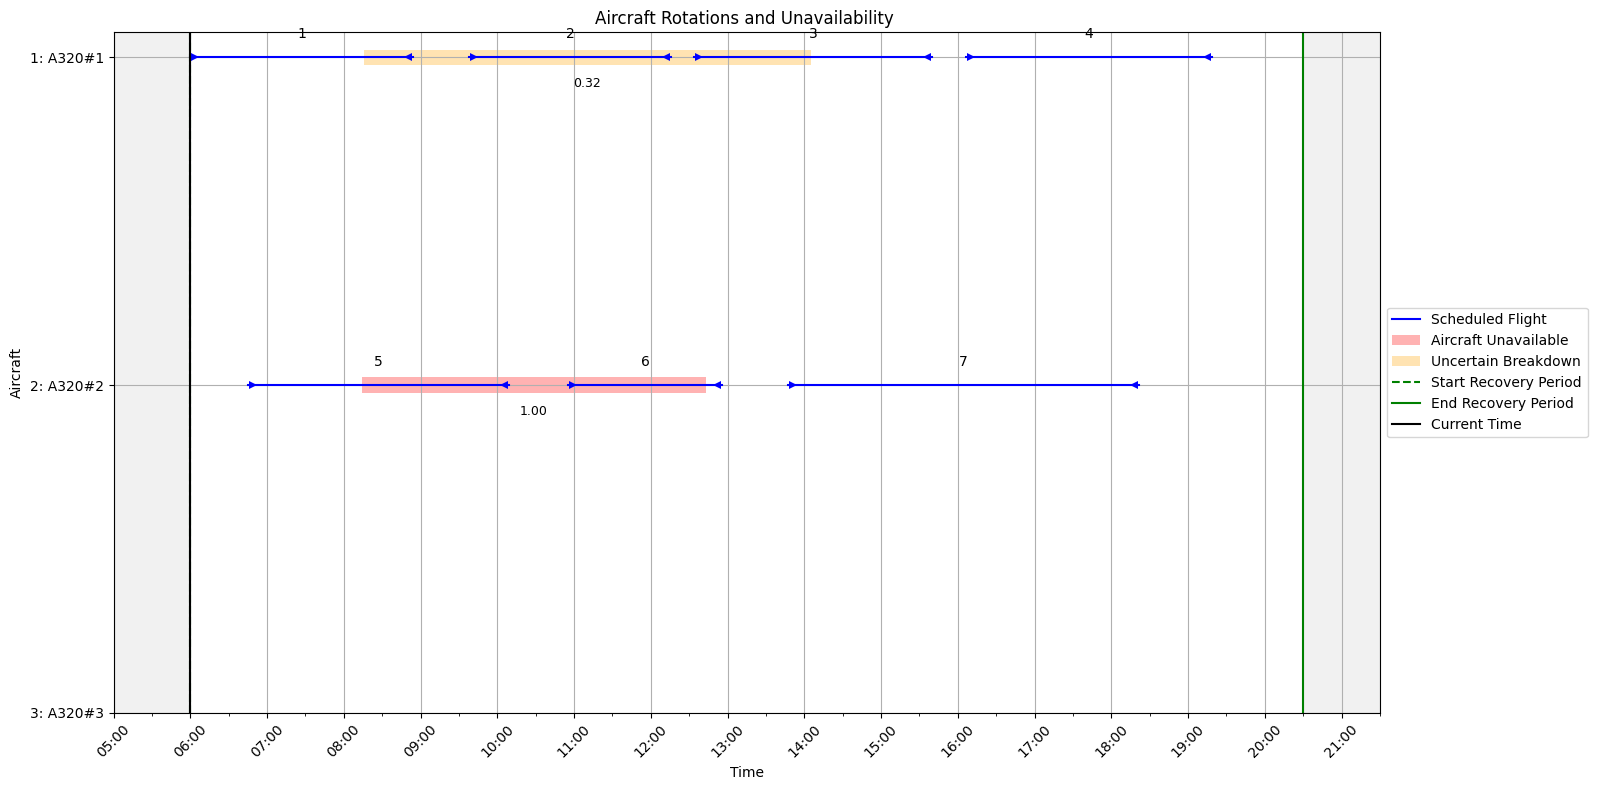

Processing scenario: Scenario_96
{'A320#2': {'StartDate': '14/09/24', 'StartTime': '08:09', 'EndDate': '14/09/24', 'EndTime': '22:07', 'Probability': 1.0}, 'A320#1': {'StartDate': '14/09/24', 'StartTime': '08:19', 'EndDate': '14/09/24', 'EndTime': '22:18', 'Probability': 0.1}}
│ Current Time       │ Time Until End     │   
│          0         │         840        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.10    139   978 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   1.00    129   967 |     5   135   428 |     6   434   718 |     -     -     - |     -     -  

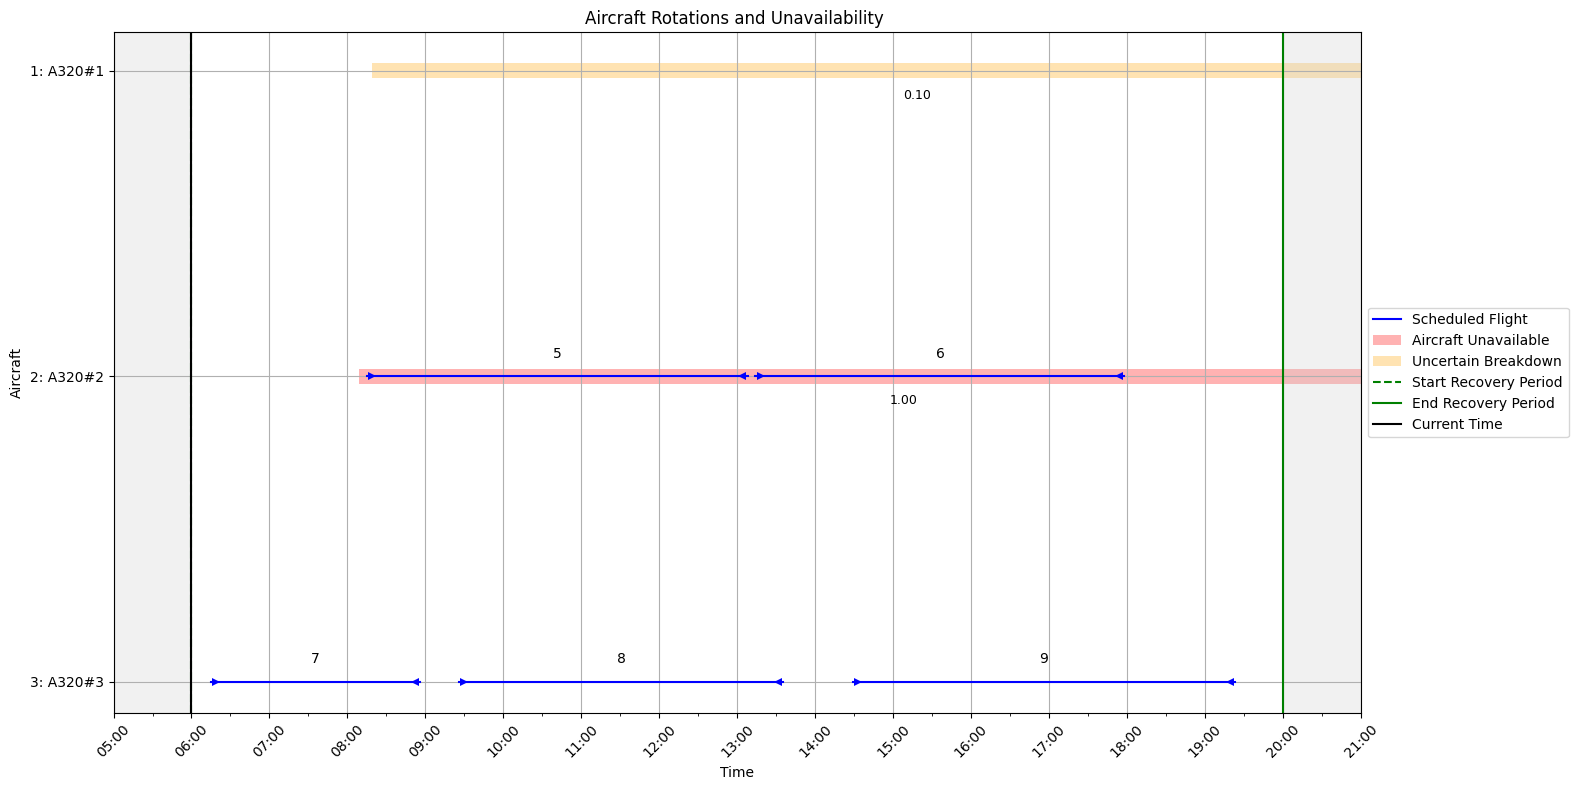

Processing scenario: Scenario_97
{'A320#1': {'StartDate': '25/09/24', 'StartTime': '07:13', 'EndDate': '25/09/24', 'EndTime': '10:45', 'Probability': 1.0}, 'A320#2': {'StartDate': '25/09/24', 'StartTime': '07:00', 'EndDate': '25/09/24', 'EndTime': '14:56', 'Probability': 0.25}}
│ Current Time       │ Time Until End     │   
│          0         │        1080        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    133   345 |     1   180   398 |     2   412   581 |     3   618   911 |     4   919  1070 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.25    120   596 |     5    75   315 |     6   345   621 |     7   631   780 |     8   806 

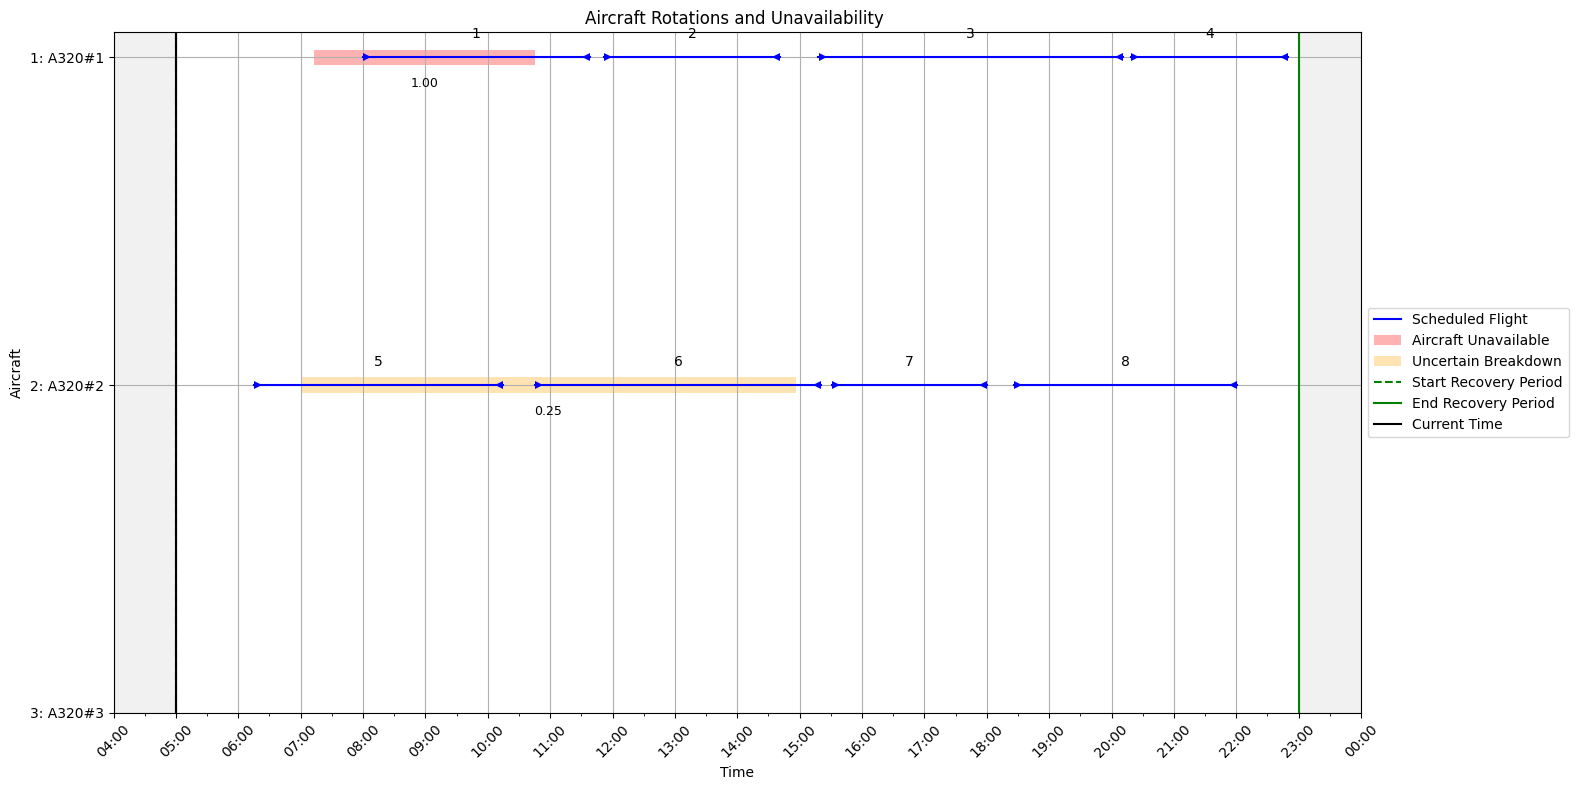

Processing scenario: Scenario_98
{'A320#3': {'StartDate': '29/09/24', 'StartTime': '07:08', 'EndDate': '29/09/24', 'EndTime': '10:46', 'Probability': 1.0}, 'A320#1': {'StartDate': '29/09/24', 'StartTime': '07:08', 'EndDate': '29/09/24', 'EndTime': '12:20', 'Probability': 0.07}}
│ Current Time       │ Time Until End     │   
│          0         │         900        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   0.07    128   440 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2      -      -     - |     4    60   266 |     5   274   405 |     6   429   620 |     -     - 

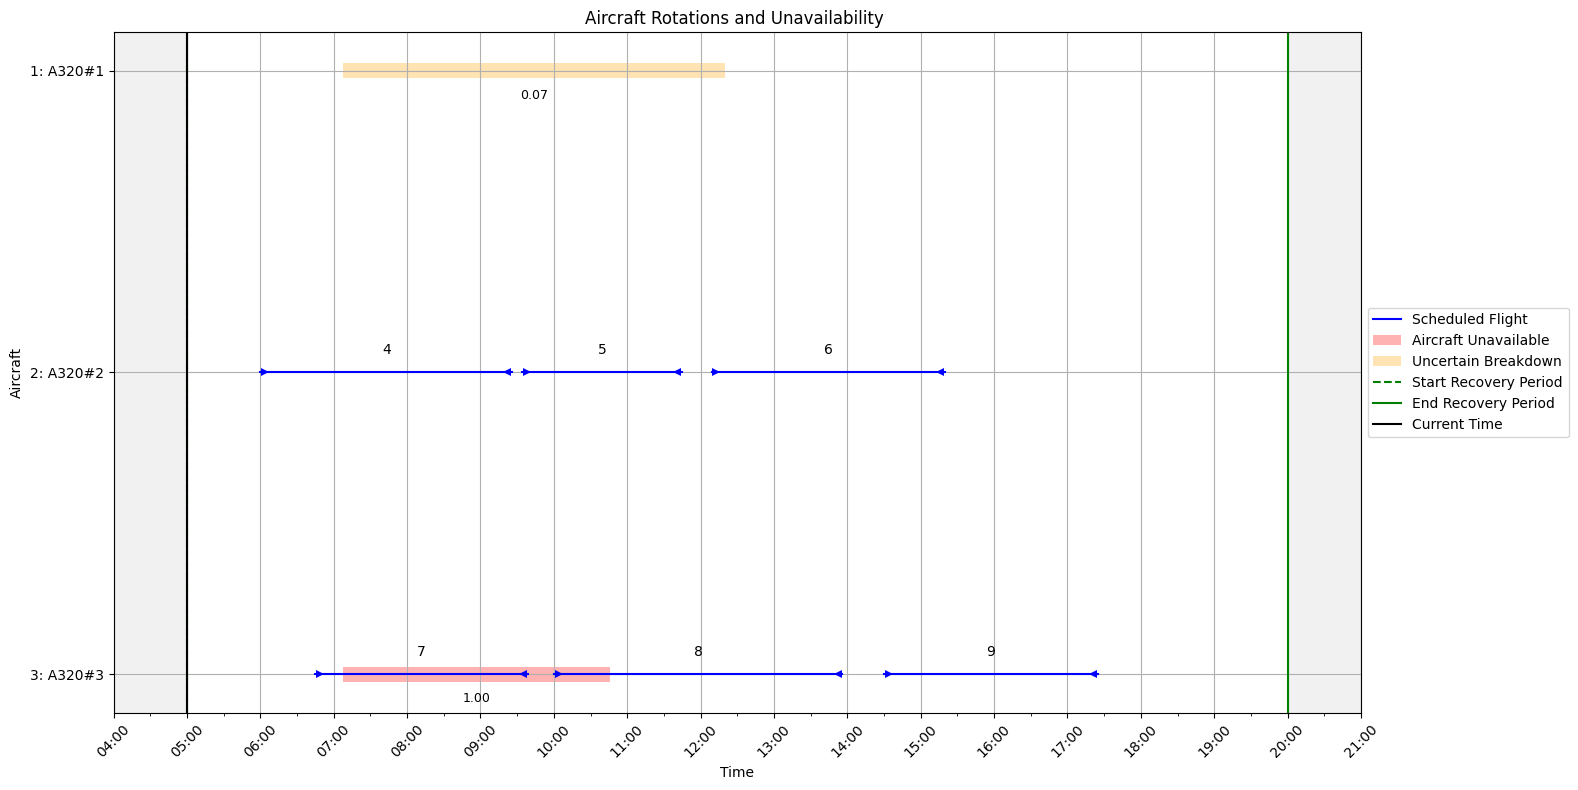

Processing scenario: Scenario_99
{'A320#1': {'StartDate': '07/09/24', 'StartTime': '08:01', 'EndDate': '07/09/24', 'EndTime': '22:40', 'Probability': 1.0}, 'A320#2': {'StartDate': '07/09/24', 'StartTime': '08:18', 'EndDate': '08/09/24', 'EndTime': '01:05', 'Probability': 0.05}}
│ Current Time       │ Time Until End     │   
│          0         │         870        │

  AC   Prob  Start   End |    F1  Dep1  Arr1 |    F2  Dep2  Arr2 |    F3  Dep3  Arr3 |    F4  Dep4  Arr4 |    F5  Dep5  Arr5 |    F6  Dep6  Arr6 |    F7  Dep7  Arr7 |    F8  Dep8  Arr8 |    F9  Dep9  Arr9 |   F10 Dep10 Arr10 |   F11 Dep11 Arr11 |   F12 Dep12 Arr12
   1   1.00    121  1000 |     1    60   350 |     2   389   515 |     3   536   760 |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     - |     -     -     -
   2   0.05    138  1145 |     -     -     - |     -     -     - |     -     -     - |     -     - 

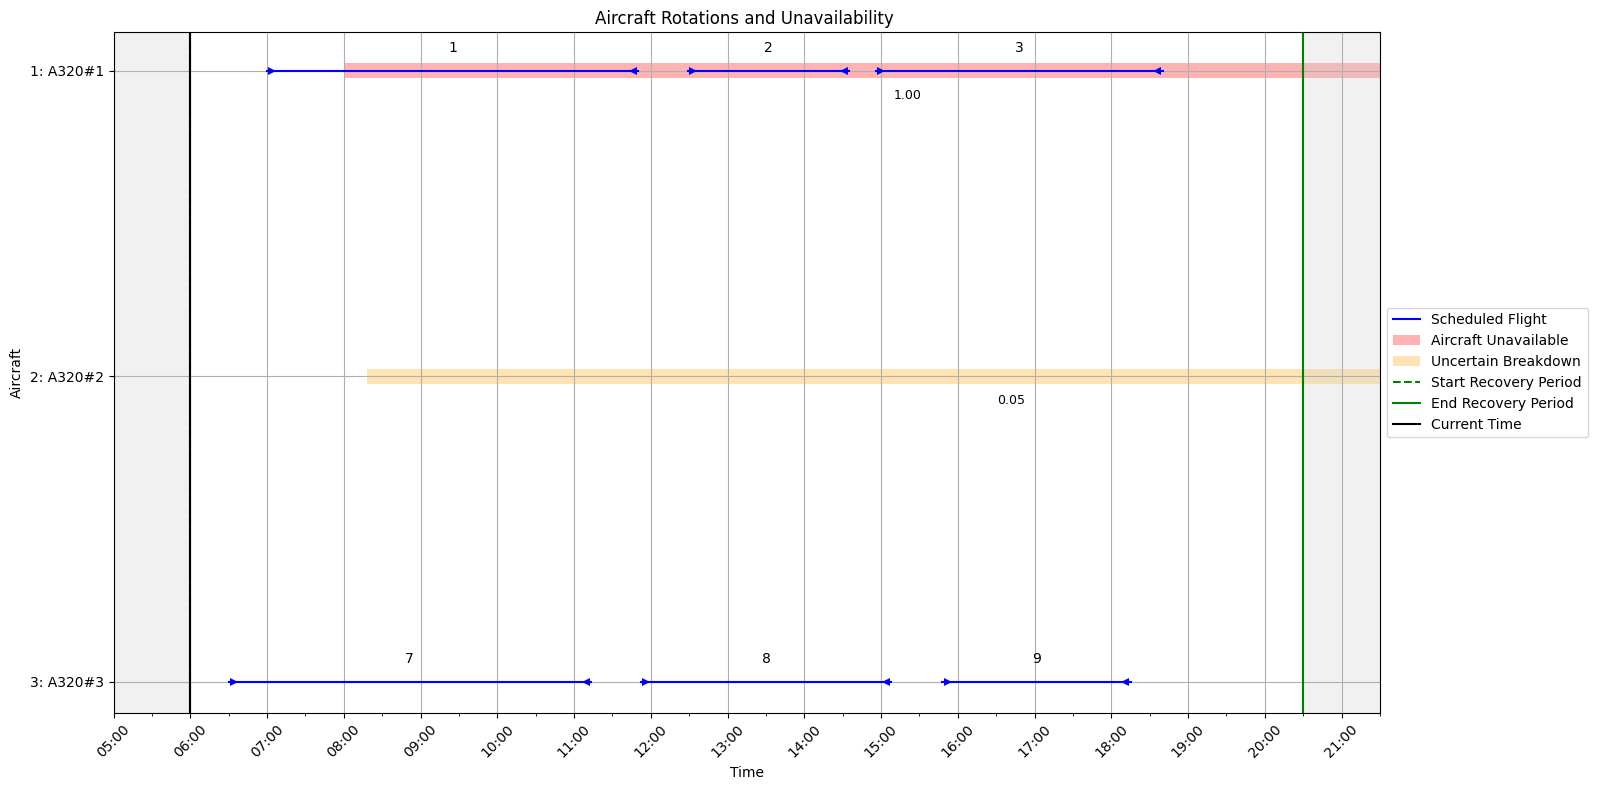

All scenarios processed successfully.


In [2]:
from scripts.visualizations import StatePlotter
from scripts.utils import load_scenario_data
import os
from src.environment import AircraftDisruptionEnv
from datetime import datetime
from scripts.utils import print_state_nicely_proactive

env_type = 'proactive'


# Verify that the root folder exists
if not os.path.exists(data_root_folder):
    raise FileNotFoundError(f"The data root folder does not exist: {data_root_folder}")

# Get the list of scenarios, sorted by name in ascending order
scenarios = sorted(
    [scenario for scenario in os.listdir(data_root_folder) if os.path.isdir(os.path.join(data_root_folder, scenario))]
)

# Process each scenario
for scenario_name in scenarios:
    scenario_path = os.path.join(data_root_folder, scenario_name)
    
    print(f"Processing scenario: {scenario_name}")

    # Verify that the scenario exists
    if not os.path.exists(scenario_path):
        print(f"Scenario {scenario_name} does not exist. Skipping...")
        continue

    # Load scenario data
    data_dict = load_scenario_data(scenario_path)

    # Extract necessary data for the environment
    aircraft_dict = data_dict['aircraft']
    flights_dict = data_dict['flights']
    rotations_dict = data_dict['rotations']
    alt_aircraft_dict = data_dict['alt_aircraft']
    config_dict = data_dict['config']

    # Print configuration details for verification
    # print(config_dict)

    # print alt_aircraft_dict
    print(alt_aircraft_dict)

    # Initialize the environment
    env = AircraftDisruptionEnv(
        aircraft_dict, flights_dict, rotations_dict, alt_aircraft_dict, config_dict, env_type=env_type
    )
    # Print state with print_state_nicely_proactive
    print_state_nicely_proactive(env.state)
    
    # Create StatePlotter object for visualizing the environment state
    state_plotter = StatePlotter(
        aircraft_dict=env.aircraft_dict,
        flights_dict=env.flights_dict,
        rotations_dict=env.rotations_dict,
        alt_aircraft_dict=env.alt_aircraft_dict,
        start_datetime=env.start_datetime,
        end_datetime=env.end_datetime,
        uncertain_breakdowns=env.uncertain_breakdowns,
    )



    # Define the recovery period based on provided configuration
    start_date = config_dict['RecoveryPeriod']['StartDate']
    start_time = config_dict['RecoveryPeriod']['StartTime']
    end_date = config_dict['RecoveryPeriod']['EndDate']
    end_time = config_dict['RecoveryPeriod']['EndTime']
    start_datetime = datetime.strptime(f"{start_date} {start_time}", '%d/%m/%y %H:%M')

    # Plot the state for the current scenario
    print(f"Plotting state for scenario: {scenario_name}")
    state_plotter.plot_state(flights_dict, [], [], set(), env.current_datetime)

print("All scenarios processed successfully.")
